## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import friedman3Dataset
import network
import dataset
import matplotlib.pyplot as plt
import sanityChecks
import performanceMetrics
import torch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import scrapbook as sb
from statistics import mean
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor

## Dataset

In [3]:
#Dataset Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [4]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)

          X1           X2        X3        X4         Y
0  14.665994   251.360034  0.308773  6.991690  1.386496
1  36.134790  1452.348386  0.819972  3.726761  1.579972
2  66.491240  1607.424995  0.144917  9.805299  1.261526
3  37.297350   492.927484  0.961453  8.826480  1.581535
4  46.235816  1674.501987  0.791968  2.252629  1.516590


## Parameters 

In [5]:
n_epochs = 1000
batch_size = 32
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [6]:
generator = network.GeneratorTabnet(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

In [7]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,device)


tensor([[-0.0545],
        [-0.1527],
        [-0.0258],
        [ 0.1125],
        [ 0.2431],
        [-0.1443],
        [-0.2344],
        [-0.1614],
        [ 0.7956],
        [-0.6063],
        [-0.6515],
        [ 0.1674],
        [ 0.1765],
        [-0.3281],
        [ 0.3415],
        [-0.5210],
        [-0.2430],
        [ 0.4208],
        [-0.0382],
        [ 1.1146],
        [-1.3559],
        [-1.2889],
        [-1.0424],
        [-0.1191],
        [ 0.9367],
        [ 0.0730],
        [ 0.8538],
        [-0.1377],
        [ 0.3806],
        [-0.8717],
        [-0.3867],
        [ 0.7378]], grad_fn=<MmBackward>)
tensor([[-0.0110],
        [-0.0089],
        [ 0.0214],
        [ 0.1669],
        [ 0.0977],
        [-0.7910],
        [-0.3761],
        [-0.1105],
        [-0.6108],
        [-0.1202],
        [-0.7798],
        [-0.7199],
        [ 0.2369],
        [-0.2669],
        [ 0.7269],
        [ 0.0710],
        [ 1.1927],
        [ 0.0024],
        [ 0.3242],
        

tensor([[-0.1675],
        [ 1.7140],
        [ 0.1026],
        [-0.9290],
        [-0.3512],
        [-0.4731],
        [ 0.0149],
        [ 0.0198],
        [-0.1697],
        [-0.0412],
        [ 0.6162],
        [ 0.0037],
        [ 0.1858],
        [-0.1927],
        [-1.1869],
        [-0.9801],
        [-0.8207],
        [ 0.0581],
        [-1.1600],
        [-0.8882],
        [-0.1927],
        [ 0.7065],
        [-0.1636],
        [-0.0684],
        [-0.2260],
        [ 0.2949],
        [-0.0335],
        [ 0.2745],
        [ 0.5555],
        [ 0.4341],
        [-0.1762],
        [-0.2825]], grad_fn=<MmBackward>)
tensor([[ 0.2997],
        [ 1.9771],
        [ 0.1326],
        [-0.4204],
        [-0.1720],
        [-1.0568],
        [ 0.0950],
        [ 0.2918],
        [-0.1461],
        [ 0.0970],
        [ 0.3642],
        [-0.1252],
        [-1.0288],
        [-0.0727],
        [-1.3498],
        [-1.1159],
        [-2.9867],
        [-0.0410],
        [-0.9683],
        

tensor([[ 0.5343],
        [ 1.0055],
        [-0.1840],
        [-0.3547],
        [-1.4355],
        [ 0.2302],
        [-0.9107],
        [-0.4925],
        [-0.4085],
        [-0.1603],
        [-1.6750],
        [ 0.0204],
        [-0.6769],
        [ 0.2931],
        [-0.0166],
        [ 0.8492]], grad_fn=<MmBackward>)
tensor([[-1.6488],
        [-0.1098],
        [-0.6692],
        [ 1.6727],
        [-1.2485],
        [-1.3352],
        [ 1.0565],
        [-0.2382],
        [-0.0134],
        [ 0.0533],
        [ 0.0208],
        [ 0.0636],
        [-0.8593],
        [ 0.4726],
        [-0.0986],
        [-2.1090],
        [-0.4866],
        [-0.3694],
        [-0.8735],
        [ 0.0803],
        [-0.3928],
        [-0.1482],
        [-0.6988],
        [-0.3538],
        [-0.4096],
        [-0.3521],
        [ 0.9406],
        [ 0.4107],
        [ 0.1927],
        [-0.8078],
        [-1.8762],
        [ 0.1138]], grad_fn=<MmBackward>)
tensor([[-2.4130],
        [-0.6879],
    

tensor([[ 0.3129],
        [-0.7142],
        [-0.5225],
        [ 0.7371],
        [ 0.1751],
        [-0.8818],
        [ 0.3953],
        [ 0.3102],
        [-0.5890],
        [-0.4116],
        [-0.8602],
        [-2.0591],
        [-0.7895],
        [-0.3703],
        [-0.1256],
        [-0.5218]], grad_fn=<MmBackward>)
tensor([[ 0.2100],
        [-0.3862],
        [-0.4358],
        [ 0.5474],
        [ 0.3613],
        [-1.1816],
        [ 1.0584],
        [ 0.2192],
        [ 0.4354],
        [ 0.2344],
        [-0.7747],
        [-1.2594],
        [-0.7152],
        [-0.5594],
        [-0.1299],
        [-0.1778]], grad_fn=<MmBackward>)
tensor([[-0.2566],
        [ 0.0583],
        [ 0.1169],
        [-1.2893],
        [-0.8461],
        [-0.2420],
        [-0.0073],
        [ 0.3480],
        [-0.0040],
        [-0.7675],
        [-0.2937],
        [-0.1356],
        [-1.0579],
        [-0.8966],
        [-0.4034],
        [ 1.7299],
        [-0.3393],
        [-0.3553],
    

tensor([[-0.7560],
        [-1.0474],
        [ 0.1190],
        [-0.8230],
        [ 0.0394],
        [-0.5888],
        [-0.3003],
        [-0.6956],
        [-1.0259],
        [-0.4177],
        [-0.5750],
        [ 0.1258],
        [ 0.5688],
        [-0.0216],
        [-2.1056],
        [ 0.6708]], grad_fn=<MmBackward>)
tensor([[-0.4053],
        [-0.9861],
        [ 0.6898],
        [-0.8300],
        [-0.1482],
        [-0.9883],
        [-0.3277],
        [ 0.4472],
        [-1.3830],
        [-0.4138],
        [-0.0151],
        [-0.3158],
        [ 0.1128],
        [ 0.0440],
        [-0.4030],
        [-0.6704]], grad_fn=<MmBackward>)
tensor([[-8.8431e-01],
        [-5.9058e-01],
        [ 6.7949e-05],
        [-7.1339e-01],
        [-9.8429e-02],
        [-1.4251e-01],
        [-1.4561e-01],
        [ 4.4849e-01],
        [-1.0041e+00],
        [-1.7064e-01],
        [-8.4740e-01],
        [-1.0445e+00],
        [-3.3637e-02],
        [-5.6277e-02],
        [ 6.3040e-01],
 

tensor([[-0.7546],
        [ 0.0888],
        [-0.8187],
        [ 0.4166],
        [-1.1219],
        [-0.5829],
        [ 0.8029],
        [-0.6883],
        [-0.3127],
        [-0.0883],
        [-0.1253],
        [-0.6546],
        [-0.1916],
        [-0.5953],
        [ 0.1719],
        [ 1.7379]], grad_fn=<MmBackward>)
tensor([[ 0.5030],
        [-0.1913],
        [-0.3845],
        [-0.0243],
        [-1.2992],
        [-0.1039],
        [-0.1975],
        [-0.2427],
        [-1.0458],
        [-0.2768],
        [-0.6318],
        [-0.5118],
        [-0.7497],
        [-0.2137],
        [ 0.4059],
        [ 1.8603]], grad_fn=<MmBackward>)
tensor([[ 1.2830],
        [ 0.4336],
        [ 0.1772],
        [-0.1135],
        [-0.1555],
        [-0.1800],
        [ 0.1549],
        [ 1.1622],
        [-0.1390],
        [-0.2233],
        [-1.1133],
        [-0.2091],
        [-0.2759],
        [ 0.4782],
        [-0.3909],
        [-0.0400],
        [ 0.3819],
        [-0.1124],
    

tensor([[ 0.1939],
        [ 0.1634],
        [-0.2487],
        [ 0.2013],
        [ 1.0055],
        [ 0.1108],
        [-0.0102],
        [ 1.2582],
        [ 0.0718],
        [ 0.3216],
        [ 0.1653],
        [-0.1193],
        [-0.1113],
        [-0.0430],
        [-0.6082],
        [-0.6490],
        [ 1.3968],
        [-0.5011],
        [-1.0696],
        [ 0.0797],
        [ 0.8421],
        [-0.0124],
        [ 0.5046],
        [-0.4237],
        [-1.1411],
        [ 1.6182],
        [ 0.3835],
        [-0.0340],
        [-1.4280],
        [-0.7545],
        [-0.1548],
        [-0.8765]], grad_fn=<MmBackward>)
tensor([[ 0.1260],
        [ 0.1160],
        [-0.0567],
        [-0.4404],
        [-0.5688],
        [-0.8235],
        [-0.3094],
        [ 1.2743],
        [-0.5542],
        [-0.1018],
        [ 0.0441],
        [ 0.2218],
        [ 0.4363],
        [ 0.0244],
        [-0.6284],
        [-0.5387],
        [ 0.8855],
        [ 0.1012],
        [-0.8791],
        

tensor([[-5.7057e-02],
        [ 4.9242e-01],
        [ 1.9379e-01],
        [ 1.0166e+00],
        [-4.5754e-01],
        [ 3.0406e+00],
        [ 1.0887e+00],
        [-2.9505e-01],
        [-1.4155e+00],
        [ 1.3147e-01],
        [-1.6952e-01],
        [ 4.8337e-01],
        [ 2.0994e-01],
        [-9.3179e-03],
        [-1.1316e+00],
        [ 2.1974e-01],
        [-6.8438e-04],
        [-8.3576e-01],
        [-9.9771e-02],
        [ 3.5372e-03],
        [ 1.8214e-01],
        [ 4.6647e-01],
        [-3.1725e-01],
        [ 2.8753e-01],
        [ 3.9960e-01],
        [ 2.1124e-01],
        [ 3.2793e-03],
        [ 3.0123e-01],
        [ 1.4306e+00],
        [ 1.0557e-01],
        [ 1.7656e-03],
        [ 3.1675e-01]], grad_fn=<MmBackward>)
tensor([[-0.0392],
        [ 0.2838],
        [ 0.7844],
        [ 0.7867],
        [-0.1935],
        [ 2.6904],
        [ 0.6085],
        [ 0.1473],
        [-0.5719],
        [ 0.3915],
        [ 0.0986],
        [ 0.7639],
        [ 0.0

tensor([[ 0.7213],
        [ 0.8947],
        [ 0.0707],
        [-0.1710],
        [ 0.1483],
        [ 0.0689],
        [-0.1265],
        [ 0.0208],
        [-0.8697],
        [ 2.0160],
        [-0.4247],
        [-1.4981],
        [ 0.0294],
        [-0.1758],
        [ 0.0688],
        [ 0.6356],
        [ 0.5294],
        [-0.0862],
        [ 0.0722],
        [ 0.5274],
        [-0.9121],
        [ 0.6384],
        [-0.1317],
        [-0.3764],
        [-0.4558],
        [-1.0852],
        [ 0.4459],
        [ 1.3264],
        [ 0.9411],
        [ 0.2327],
        [ 0.5750],
        [ 0.8790]], grad_fn=<MmBackward>)
tensor([[ 0.2264],
        [-0.6992],
        [ 1.4989],
        [ 0.2678],
        [ 0.0397],
        [-2.1611],
        [-0.6117],
        [ 0.9171],
        [-0.2549],
        [ 1.4164],
        [ 0.1212],
        [ 2.0292],
        [-0.6514],
        [-0.0631],
        [-0.0981],
        [ 0.6293]], grad_fn=<MmBackward>)
tensor([[-0.3628],
        [-1.5335],
    

tensor([[ 0.1602],
        [ 1.2245],
        [ 0.7198],
        [ 0.9003],
        [ 0.8205],
        [ 0.1698],
        [-0.5666],
        [ 0.9631],
        [ 0.4040],
        [ 0.3876],
        [ 0.2178],
        [ 0.3692],
        [ 0.2554],
        [ 0.8806],
        [ 0.5799],
        [-1.9603]], grad_fn=<MmBackward>)
tensor([[ 0.4584],
        [ 0.9439],
        [ 1.0614],
        [ 0.5278],
        [ 1.1937],
        [ 0.4734],
        [-0.2176],
        [-0.7407],
        [ 0.3818],
        [-0.2668],
        [ 2.1106],
        [ 0.4965],
        [ 0.2438],
        [ 0.7216],
        [ 0.4428],
        [-1.7412]], grad_fn=<MmBackward>)
tensor([[-0.2256],
        [ 0.7800],
        [ 0.9664],
        [ 0.3151],
        [ 0.1932],
        [ 0.0856],
        [-0.4176],
        [ 1.0331],
        [-0.5657],
        [-0.3560],
        [ 0.4934],
        [-0.0662],
        [ 0.0441],
        [-0.5686],
        [-0.6063],
        [ 0.5726],
        [ 0.9354],
        [ 0.6098],
    

tensor([[-0.1220],
        [-0.8468],
        [ 0.4322],
        [-0.2031],
        [ 1.2318],
        [ 0.3803],
        [-0.0973],
        [ 0.0055],
        [ 0.3206],
        [ 0.2579],
        [ 2.0567],
        [ 0.2105],
        [-0.1890],
        [-0.7439],
        [-0.1780],
        [ 3.8522]], grad_fn=<MmBackward>)
tensor([[-0.8560],
        [ 1.3652],
        [-0.3181],
        [ 0.8877],
        [-2.1340],
        [ 0.5002],
        [-0.1061],
        [ 0.2395],
        [ 0.1189],
        [-0.9820],
        [-0.0343],
        [ 0.0082],
        [ 0.0487],
        [-0.0753],
        [-1.6312],
        [-0.3907],
        [ 1.2189],
        [ 2.8718],
        [ 0.9487],
        [ 0.5555],
        [-0.2069],
        [-1.0575],
        [ 0.7596],
        [-0.6308],
        [-0.4266],
        [ 0.6906],
        [ 0.5318],
        [-1.1958],
        [ 0.1675],
        [ 0.5040],
        [ 0.1777],
        [ 0.1829]], grad_fn=<MmBackward>)
tensor([[-0.9952],
        [ 0.4039],
    

tensor([[-0.3891],
        [-0.1987],
        [-1.1226],
        [ 2.0987],
        [ 0.7245],
        [-2.2043],
        [ 0.8070],
        [-0.3633],
        [ 0.0975],
        [ 0.3430],
        [ 0.5170],
        [ 1.2324],
        [ 0.7998],
        [ 0.4095],
        [ 1.3316],
        [-0.1577]], grad_fn=<MmBackward>)
tensor([[ 3.1186e-01],
        [-9.4245e-02],
        [ 1.2601e+00],
        [ 2.8698e-01],
        [-1.5873e+00],
        [-3.6336e-01],
        [ 3.2672e-01],
        [-3.0791e+00],
        [-5.5756e-01],
        [ 7.3989e-02],
        [ 1.0717e+00],
        [-1.2156e+00],
        [ 1.2457e+00],
        [ 1.7371e+00],
        [ 6.7288e-01],
        [ 2.3485e+00],
        [ 7.2202e-01],
        [ 1.0100e+00],
        [-1.0626e-03],
        [-7.4142e-01],
        [ 7.8567e-01],
        [ 2.7812e-01],
        [ 5.5283e-01],
        [ 5.7411e-01],
        [ 3.4063e-01],
        [ 4.0801e-01],
        [ 1.6575e-01],
        [-6.1324e-01],
        [-2.6323e-01],
      

tensor([[ 0.9757],
        [-0.3771],
        [-2.0365],
        [ 0.5838],
        [ 0.5169],
        [ 0.0106],
        [ 0.5260],
        [ 0.0555],
        [ 0.0155],
        [ 0.5408],
        [-0.8769],
        [ 1.3222],
        [-0.0574],
        [ 0.7925],
        [-0.0244],
        [-1.9131],
        [ 0.3751],
        [ 0.2133],
        [ 0.9946],
        [-0.2733],
        [ 0.6911],
        [-1.5640],
        [-0.4542],
        [ 0.7956],
        [-1.0763],
        [ 0.2129],
        [ 0.2079],
        [-0.4365],
        [-0.8488],
        [-0.2583],
        [-0.0955],
        [-0.0734]], grad_fn=<MmBackward>)
tensor([[ 1.7161],
        [-0.3689],
        [-1.6194],
        [ 0.3151],
        [ 0.5668],
        [ 0.0777],
        [ 0.6248],
        [-0.1380],
        [ 0.0251],
        [ 0.4989],
        [-0.7109],
        [ 0.4884],
        [ 0.0657],
        [ 0.3767],
        [-0.1920],
        [-0.0335],
        [-0.3113],
        [ 0.3788],
        [ 0.8013],
        

tensor([[ 0.1367],
        [ 1.1345],
        [-0.4336],
        [ 0.1730],
        [ 0.0744],
        [ 0.0230],
        [ 0.5622],
        [ 0.7179],
        [ 0.7640],
        [-0.3553],
        [-0.2506],
        [ 0.8390],
        [-0.1027],
        [-0.3658],
        [ 0.2680],
        [-0.1710],
        [-0.7411],
        [ 0.3127],
        [ 1.0051],
        [-0.6055],
        [-0.1865],
        [-0.1174],
        [-0.1413],
        [-0.9687],
        [-2.9815],
        [-2.5279],
        [ 0.2537],
        [-0.4765],
        [ 0.4222],
        [ 0.1309],
        [-0.0560],
        [ 0.3591]], grad_fn=<MmBackward>)
tensor([[ 7.3484e-01],
        [ 8.8276e-01],
        [ 2.3177e+00],
        [-6.9460e-01],
        [-8.4375e-01],
        [ 1.4117e+00],
        [ 2.0244e-01],
        [-4.1464e-01],
        [-3.2086e+00],
        [ 1.0039e-01],
        [-6.8638e-02],
        [ 2.1412e-01],
        [ 5.0072e-01],
        [ 3.4780e-01],
        [-1.6665e-03],
        [-8.2979e-01],
 

tensor([[-0.2478],
        [-0.7267],
        [ 3.2330],
        [-0.1754],
        [ 0.7313],
        [ 0.4089],
        [ 0.4881],
        [ 0.0039],
        [ 0.7482],
        [ 0.5282],
        [ 0.4542],
        [ 0.3420],
        [-0.1398],
        [-0.4213],
        [-0.9513],
        [ 0.0119],
        [ 0.0765],
        [ 2.3981],
        [-0.4968],
        [ 1.1963],
        [ 0.4438],
        [ 0.3795],
        [-0.0261],
        [ 0.2945],
        [-2.4089],
        [-0.4727],
        [-0.6576],
        [-1.5176],
        [ 0.4662],
        [-1.8269],
        [-1.7686],
        [ 0.3648]], grad_fn=<MmBackward>)
tensor([[-1.1686e+00],
        [-1.3922e+00],
        [ 1.9440e+00],
        [-4.9075e-01],
        [ 5.4399e-01],
        [ 5.5406e-01],
        [ 1.5404e-01],
        [ 6.8484e-01],
        [ 6.3535e-01],
        [-3.1713e-02],
        [ 5.0607e-01],
        [ 6.9663e-01],
        [-3.4328e-01],
        [-2.7051e-01],
        [-1.6931e+00],
        [-2.2419e-01],
 

tensor([[ 0.1812],
        [ 0.5193],
        [ 0.1357],
        [-2.3155],
        [ 0.4523],
        [ 0.8745],
        [ 0.9369],
        [ 0.3088],
        [ 0.6765],
        [-1.7147],
        [-1.9107],
        [ 0.8094],
        [-1.7525],
        [-0.7373],
        [ 0.7726],
        [ 0.2462],
        [-2.3444],
        [ 0.9554],
        [ 0.9684],
        [ 1.2923],
        [ 0.5982],
        [ 0.2299],
        [ 1.9136],
        [ 0.7721],
        [ 0.5604],
        [-0.9033],
        [ 0.6560],
        [-0.9113],
        [ 0.4276],
        [ 1.8841],
        [-0.3784],
        [-0.8175]], grad_fn=<MmBackward>)
tensor([[ 1.5193],
        [-0.2067],
        [-0.0648],
        [-1.7138],
        [-0.4605],
        [ 0.0739],
        [ 0.0498],
        [ 0.6133],
        [-1.5002],
        [-1.5987],
        [ 0.8391],
        [ 0.7416],
        [ 2.5764],
        [ 0.2511],
        [-0.0285],
        [-0.0903]], grad_fn=<MmBackward>)
tensor([[ 2.3040],
        [-0.0465],
    

tensor([[ 1.0424],
        [ 1.8108],
        [ 1.2000],
        [ 0.8459],
        [ 0.5427],
        [-1.9266],
        [ 0.7262],
        [-2.4030],
        [ 1.3917],
        [ 0.2243],
        [-0.2206],
        [ 0.6077],
        [-0.0873],
        [-0.0403],
        [-1.2515],
        [-1.9893],
        [-0.0194],
        [ 0.0828],
        [-0.3054],
        [-0.0633],
        [ 0.2803],
        [ 0.2522],
        [-1.6693],
        [ 0.7337],
        [-0.3309],
        [ 0.2697],
        [-0.8179],
        [ 0.5349],
        [ 0.1946],
        [-0.7950],
        [ 1.0560],
        [-0.0386]], grad_fn=<MmBackward>)
tensor([[ 0.5102],
        [ 0.7446],
        [ 0.5799],
        [-0.2650],
        [ 0.1371],
        [-0.9173],
        [ 0.6199],
        [-1.4112],
        [ 0.6043],
        [ 0.6945],
        [-1.7364],
        [ 0.7609],
        [-0.4181],
        [ 0.8368],
        [ 0.3293],
        [-0.9087]], grad_fn=<MmBackward>)
tensor([[ 0.6882],
        [-0.3354],
    

tensor([[-0.1676],
        [ 0.2588],
        [-1.8147],
        [ 0.1503],
        [-0.0704],
        [-0.4095],
        [-0.7808],
        [ 1.3059],
        [ 0.3909],
        [ 0.0569],
        [-0.3041],
        [ 1.3391],
        [-1.5762],
        [ 0.0229],
        [-2.6474],
        [ 0.1346],
        [ 1.6698],
        [ 0.1827],
        [ 0.1710],
        [ 1.3495],
        [ 0.3334],
        [ 2.5346],
        [-0.4943],
        [ 0.8569],
        [ 0.6948],
        [-1.2882],
        [ 1.0626],
        [ 0.4370],
        [ 0.9481],
        [-0.8094],
        [-2.0306],
        [-0.2319]], grad_fn=<MmBackward>)
tensor([[-0.3736],
        [ 0.4577],
        [ 0.4129],
        [ 1.9342],
        [ 0.8263],
        [ 0.4795],
        [-2.0113],
        [ 0.5864],
        [ 0.1206],
        [ 1.0200],
        [-1.1685],
        [-1.4623],
        [ 0.8418],
        [-0.4246],
        [ 0.5644],
        [-0.5933]], grad_fn=<MmBackward>)
tensor([[ 0.1773],
        [ 0.1194],
    

tensor([[-0.7729],
        [ 0.8464],
        [-0.6486],
        [ 0.7570],
        [ 0.8644],
        [ 0.5997],
        [ 0.0864],
        [-3.2913],
        [ 0.0890],
        [ 0.5345],
        [-0.1143],
        [-1.1331],
        [-0.3927],
        [ 1.3226],
        [ 0.4693],
        [ 0.9202]], grad_fn=<MmBackward>)
tensor([[-0.1119],
        [ 1.1330],
        [-1.3824],
        [-0.0879],
        [ 0.6957],
        [-0.0360],
        [ 1.8445],
        [ 0.0084],
        [ 0.0941],
        [ 1.4944],
        [-0.9882],
        [ 1.0909],
        [ 0.6743],
        [-0.8729],
        [ 1.3739],
        [-1.4831],
        [ 0.3992],
        [ 1.3276],
        [-1.4934],
        [-0.6573],
        [-0.2756],
        [ 0.5135],
        [-2.0874],
        [-0.0921],
        [ 0.4330],
        [-1.1618],
        [-0.1943],
        [ 0.7879],
        [-0.3217],
        [ 0.2766],
        [ 0.4281],
        [-0.1505]], grad_fn=<MmBackward>)
tensor([[-0.0070],
        [ 0.1102],
    

tensor([[ 0.6889],
        [ 0.5028],
        [ 0.9058],
        [-0.0533],
        [-0.2870],
        [ 0.3329],
        [-1.2233],
        [-0.5357],
        [ 0.9664],
        [ 1.9597],
        [ 0.1872],
        [ 0.2042],
        [ 0.2737],
        [-2.3507],
        [-1.2089],
        [-1.7465],
        [ 0.3093],
        [-1.5793],
        [ 1.2324],
        [-1.1273],
        [ 0.4849],
        [-0.2046],
        [ 0.4432],
        [-0.0745],
        [-0.4129],
        [-0.0776],
        [-1.1015],
        [ 1.1626],
        [ 0.4795],
        [ 0.1507],
        [ 0.6795],
        [ 0.2440]], grad_fn=<MmBackward>)
tensor([[ 0.3180],
        [ 0.4670],
        [ 0.7731],
        [-0.0464],
        [-0.7942],
        [ 0.3699],
        [-0.1668],
        [-0.4716],
        [ 1.0097],
        [ 2.2336],
        [ 2.1681],
        [-0.0445],
        [ 0.1317],
        [-1.9104],
        [-0.9628],
        [-1.0928],
        [ 0.4102],
        [-1.2630],
        [ 0.9783],
        

tensor([[-0.5328],
        [ 0.1948],
        [ 0.7221],
        [ 0.2301],
        [-0.7863],
        [-0.6644],
        [ 0.3832],
        [ 0.9458],
        [-0.6622],
        [-1.8643],
        [ 0.9754],
        [ 0.2177],
        [ 0.6276],
        [-1.6597],
        [-1.4611],
        [-0.0504],
        [ 0.1063],
        [ 1.4267],
        [-0.0545],
        [-0.0182],
        [ 0.4359],
        [-1.0030],
        [-1.7096],
        [ 0.3434],
        [ 0.6671],
        [ 0.4182],
        [ 0.8982],
        [ 0.2185],
        [ 1.7791],
        [ 0.1552],
        [ 0.1779],
        [-0.1388]], grad_fn=<MmBackward>)
tensor([[-0.0953],
        [-0.9357],
        [ 1.1021],
        [ 0.8407],
        [-1.7118],
        [-1.9364],
        [ 0.8662],
        [ 0.6277],
        [ 0.3421],
        [ 0.5131],
        [ 0.1047],
        [ 1.3045],
        [-0.6832],
        [-0.5165],
        [ 1.2014],
        [-1.1593],
        [ 0.1409],
        [ 0.0372],
        [-0.9339],
        

tensor([[-0.1329],
        [ 0.4644],
        [-0.2198],
        [-0.0954],
        [-1.8597],
        [-1.2792],
        [ 0.7225],
        [-0.1289],
        [ 0.0259],
        [-2.6356],
        [-1.1739],
        [ 0.9195],
        [ 0.3863],
        [ 1.0545],
        [ 0.7592],
        [ 0.4826],
        [-0.0368],
        [ 0.7581],
        [ 0.1187],
        [ 0.4074],
        [-1.5033],
        [-0.3218],
        [ 0.1339],
        [ 1.9032],
        [ 0.1040],
        [ 0.1199],
        [-2.0901],
        [-0.6674],
        [ 0.1334],
        [ 0.6122],
        [-0.0331],
        [ 0.6735]], grad_fn=<MmBackward>)
tensor([[-0.2534],
        [ 0.3676],
        [-0.5327],
        [-0.2155],
        [-2.0978],
        [-1.6880],
        [ 0.3486],
        [-1.0230],
        [ 0.0475],
        [-1.9980],
        [-1.0631],
        [ 0.4883],
        [ 0.3680],
        [ 0.7002],
        [ 1.7838],
        [ 0.7398],
        [ 0.4711],
        [ 0.2276],
        [ 1.6464],
        

tensor([[-1.5703],
        [-2.5039],
        [ 1.3161],
        [-1.9331],
        [ 0.4784],
        [ 0.3175],
        [ 0.3792],
        [ 2.0128],
        [-0.1109],
        [ 0.8865],
        [-0.4601],
        [ 0.6295],
        [ 0.3463],
        [ 0.4928],
        [-1.1467],
        [-0.3381],
        [ 0.9808],
        [-0.7012],
        [ 0.2991],
        [-1.2855],
        [-0.6964],
        [ 0.1653],
        [ 0.2877],
        [-1.0623],
        [ 0.8033],
        [ 1.2976],
        [-0.9542],
        [-1.3846],
        [ 0.7363],
        [-0.2756],
        [ 0.9928],
        [ 0.0190]], grad_fn=<MmBackward>)
tensor([[-2.1816],
        [ 1.0721],
        [ 0.3767],
        [-0.2750],
        [-0.9198],
        [ 0.8993],
        [-1.0332],
        [ 0.6574],
        [ 0.2932],
        [ 0.8138],
        [-0.4260],
        [ 0.8072],
        [ 0.1269],
        [ 0.0844],
        [ 0.8691],
        [-0.5843]], grad_fn=<MmBackward>)
tensor([[-1.7200],
        [ 0.4626],
    

tensor([[-1.0149],
        [ 0.9643],
        [-0.0051],
        [-1.7653],
        [ 1.0700],
        [ 1.0421],
        [-0.9336],
        [-0.2006],
        [ 0.2837],
        [-1.5627],
        [ 0.2676],
        [ 0.3798],
        [-0.0510],
        [ 0.4488],
        [ 0.2002],
        [ 0.0367]], grad_fn=<MmBackward>)
tensor([[-1.5127],
        [ 0.9652],
        [ 0.4404],
        [-1.5096],
        [ 1.4409],
        [ 0.7001],
        [-1.0246],
        [ 0.0230],
        [ 0.4113],
        [-1.1108],
        [ 0.9367],
        [ 0.2348],
        [ 0.6924],
        [ 0.1814],
        [ 0.2034],
        [-0.0583]], grad_fn=<MmBackward>)
tensor([[ 0.0137],
        [-0.5827],
        [-0.1290],
        [ 0.0946],
        [-0.6448],
        [ 0.1729],
        [ 0.2090],
        [ 0.7279],
        [ 0.3306],
        [ 0.6614],
        [ 1.2058],
        [-1.9844],
        [ 0.6799],
        [ 0.8390],
        [ 0.6536],
        [-0.3925],
        [-0.0500],
        [ 0.4202],
    

tensor([[ 0.1354],
        [ 1.1738],
        [-2.0535],
        [ 0.6493],
        [ 0.4217],
        [ 0.9978],
        [ 1.0420],
        [ 0.2778],
        [ 0.0661],
        [-2.2176],
        [ 0.2710],
        [ 0.2837],
        [ 0.3091],
        [ 0.6629],
        [ 0.1554],
        [ 1.0609]], grad_fn=<MmBackward>)
tensor([[ 0.1183],
        [ 0.2433],
        [ 0.9257],
        [ 0.2479],
        [ 1.8995],
        [ 0.1744],
        [-1.5209],
        [-0.7789],
        [ 0.3192],
        [ 0.8224],
        [ 0.5961],
        [-0.1606],
        [-1.8713],
        [ 1.2318],
        [ 0.2301],
        [ 0.8399],
        [-0.4254],
        [ 0.6173],
        [-1.4786],
        [ 0.9355],
        [-0.3460],
        [-0.5610],
        [-0.5336],
        [-0.0354],
        [ 0.8060],
        [-0.0200],
        [-1.7374],
        [ 0.3404],
        [ 0.0137],
        [-0.0031],
        [ 1.0558],
        [ 0.6236]], grad_fn=<MmBackward>)
tensor([[-0.0603],
        [ 0.8700],
    

tensor([[ 0.8889],
        [-0.2386],
        [ 1.2850],
        [ 1.1730],
        [ 0.2043],
        [ 0.7553],
        [-0.2229],
        [ 1.6685],
        [ 0.4790],
        [-1.1686],
        [-1.5076],
        [-0.5090],
        [ 0.4470],
        [ 1.0755],
        [ 1.4000],
        [-2.2043]], grad_fn=<MmBackward>)
tensor([[-2.2992],
        [ 0.0430],
        [ 0.7835],
        [ 0.1691],
        [ 0.5102],
        [ 0.4028],
        [-0.1549],
        [ 1.8457],
        [ 0.5536],
        [-0.3413],
        [-0.3270],
        [ 0.4061],
        [ 0.6878],
        [-2.2256],
        [-0.5652],
        [-0.9785],
        [ 0.1016],
        [ 0.2998],
        [ 0.7713],
        [ 1.1897],
        [ 1.0452],
        [ 1.4030],
        [ 0.0263],
        [ 0.4622],
        [ 0.7423],
        [ 1.5480],
        [ 0.6647],
        [-1.7298],
        [-1.9263],
        [-0.0190],
        [-0.3193],
        [-0.3510]], grad_fn=<MmBackward>)
tensor([[-2.8118],
        [ 0.2327],
    

tensor([[ 0.6965],
        [ 0.4868],
        [ 0.7454],
        [ 0.6366],
        [ 0.1393],
        [ 0.4808],
        [ 0.2007],
        [ 2.7112],
        [ 1.1991],
        [ 0.7384],
        [-0.3412],
        [ 0.0573],
        [-1.8541],
        [-1.4020],
        [ 1.2859],
        [ 0.1976],
        [ 0.8830],
        [-0.5948],
        [ 0.5524],
        [ 0.5954],
        [-1.3534],
        [-0.5541],
        [ 0.4685],
        [ 0.4299],
        [ 0.6645],
        [ 1.1509],
        [-2.4665],
        [ 0.1641],
        [ 0.8022],
        [ 0.0879],
        [ 0.3768],
        [-2.1062]], grad_fn=<MmBackward>)
tensor([[ 0.8691],
        [-0.0289],
        [ 0.3580],
        [ 0.8691],
        [ 0.9135],
        [ 0.5916],
        [ 0.1969],
        [ 2.2229],
        [ 0.2710],
        [ 0.4485],
        [-0.6874],
        [ 0.5449],
        [-1.9165],
        [-1.4927],
        [ 0.9839],
        [ 0.0729],
        [ 1.0332],
        [-0.7926],
        [ 0.4362],
        

tensor([[ 0.6702],
        [ 0.2497],
        [ 1.7998],
        [-0.0362],
        [ 0.4838],
        [ 0.5971],
        [ 0.2059],
        [-1.0563],
        [ 1.4872],
        [ 0.3131],
        [-0.8156],
        [ 0.5299],
        [ 0.5413],
        [-1.3403],
        [ 0.1296],
        [-0.4192],
        [-1.6321],
        [ 0.3132],
        [-0.5603],
        [ 1.2033],
        [-0.3793],
        [ 0.1933],
        [-1.3819],
        [ 0.0180],
        [-0.2101],
        [ 2.5375],
        [ 0.9083],
        [ 0.5126],
        [-0.6050],
        [ 0.2718],
        [-1.9702],
        [ 0.1793]], grad_fn=<MmBackward>)
tensor([[ 0.8280],
        [-0.4460],
        [ 1.1649],
        [ 0.7516],
        [-0.3979],
        [-1.3721],
        [ 0.5536],
        [-1.4010],
        [-2.4621],
        [-0.2930],
        [ 0.3113],
        [ 0.7539],
        [ 0.1621],
        [-0.4699],
        [-0.6145],
        [ 0.5661],
        [ 0.5031],
        [ 0.8836],
        [ 0.7616],
        

tensor([[ 0.3221],
        [ 0.6791],
        [-1.1245],
        [ 1.0766],
        [ 0.3259],
        [-0.8104],
        [ 1.0346],
        [ 0.7192],
        [ 0.5454],
        [-0.7559],
        [-1.8716],
        [ 0.5183],
        [ 1.1044],
        [ 0.6537],
        [-1.1136],
        [-1.0830],
        [-0.3635],
        [-0.5574],
        [-0.5827],
        [-0.6064],
        [ 0.3876],
        [ 0.7276],
        [-0.4355],
        [-1.9771],
        [-0.5519],
        [ 0.7773],
        [ 0.2795],
        [ 0.3916],
        [ 0.4581],
        [ 0.1506],
        [ 0.7348],
        [ 1.3565]], grad_fn=<MmBackward>)
tensor([[ 1.2287],
        [ 0.9249],
        [-0.9154],
        [ 0.4580],
        [-0.0424],
        [-1.8481],
        [ 0.0369],
        [-2.0147],
        [ 0.1001],
        [-0.3112],
        [-1.7711],
        [-0.2290],
        [ 0.9457],
        [ 1.0763],
        [-0.5472],
        [-0.3253],
        [ 0.6029],
        [ 0.5576],
        [-0.1856],
        

tensor([[-2.4763],
        [ 0.4869],
        [ 0.1836],
        [ 0.7540],
        [ 0.6358],
        [-1.2702],
        [-0.2804],
        [-0.6815],
        [ 0.0189],
        [-0.6372],
        [ 0.5088],
        [ 0.2249],
        [ 0.6308],
        [ 0.2974],
        [ 0.6194],
        [ 0.4209],
        [ 0.0157],
        [ 0.5606],
        [-1.4003],
        [ 0.6319],
        [ 0.6015],
        [-1.9240],
        [ 0.5546],
        [-1.7509],
        [-0.2877],
        [ 0.6593],
        [-1.0404],
        [ 0.9730],
        [ 0.4208],
        [ 0.7567],
        [ 0.1641],
        [ 0.4576]], grad_fn=<MmBackward>)
tensor([[-0.0166],
        [ 0.0990],
        [ 0.9613],
        [-0.9027],
        [ 0.2428],
        [ 0.6254],
        [-0.8778],
        [-0.2125],
        [ 0.7052],
        [-2.0251],
        [ 0.2672],
        [ 0.8498],
        [ 0.8808],
        [ 0.6322],
        [ 0.0089],
        [ 0.2047]], grad_fn=<MmBackward>)
tensor([[ 0.4124],
        [ 0.6119],
    

tensor([[ 0.8479],
        [ 0.1021],
        [-0.4765],
        [ 0.8492],
        [-0.5249],
        [ 0.4832],
        [-1.1255],
        [-0.0689],
        [-1.6728],
        [-2.3821],
        [-0.2829],
        [-0.4252],
        [ 0.2321],
        [ 0.4161],
        [ 0.4297],
        [ 0.9509],
        [-1.4352],
        [ 1.1629],
        [ 0.2607],
        [-2.5832],
        [ 0.9328],
        [ 0.5406],
        [ 0.9564],
        [ 0.0963],
        [ 0.0441],
        [-0.3995],
        [ 0.2196],
        [-0.3374],
        [-0.3993],
        [ 0.6384],
        [ 0.6677],
        [ 1.4225]], grad_fn=<MmBackward>)
tensor([[ 0.5400],
        [ 0.9550],
        [-0.3323],
        [ 0.6239],
        [-0.4754],
        [-0.6484],
        [ 0.2664],
        [ 1.9649],
        [-0.2696],
        [-0.6993],
        [ 0.5802],
        [-0.3090],
        [ 0.7639],
        [ 0.1832],
        [-1.7127],
        [ 0.4987]], grad_fn=<MmBackward>)
tensor([[-0.1549],
        [ 1.5388],
    

tensor([[ 2.8532e-01],
        [ 1.7429e-01],
        [-1.6024e+00],
        [ 1.3726e+00],
        [ 6.9866e-01],
        [ 1.6320e-04],
        [-3.3504e-01],
        [-1.0113e+00],
        [-3.7666e-01],
        [ 3.0195e-01],
        [ 9.5662e-01],
        [ 1.4116e-01],
        [ 1.2936e+00],
        [ 1.5179e+00],
        [-2.3261e-01],
        [-9.5599e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2742],
        [ 0.2208],
        [-1.4601],
        [ 1.1319],
        [ 0.3218],
        [-0.6077],
        [ 0.0816],
        [-0.1753],
        [-0.3509],
        [-0.1756],
        [ 0.5548],
        [ 0.3035],
        [ 1.8334],
        [ 1.5683],
        [-0.0591],
        [-1.0663]], grad_fn=<MmBackward>)
tensor([[ 0.7547],
        [-0.6043],
        [ 0.6763],
        [-2.5728],
        [ 0.3057],
        [-3.1270],
        [ 0.5651],
        [-0.7264],
        [ 1.6411],
        [ 0.6189],
        [ 1.3348],
        [ 0.1080],
        [ 0.2072],
        [ 1.0379],
        [-0.4396

tensor([[ 0.8714],
        [-0.6595],
        [ 0.4518],
        [-0.1018],
        [ 0.5509],
        [-1.1827],
        [ 0.9745],
        [ 0.9570],
        [-2.7305],
        [-0.5086],
        [ 0.6283],
        [ 0.7204],
        [ 0.2775],
        [ 0.3898],
        [ 1.1094],
        [ 0.0833]], grad_fn=<MmBackward>)
tensor([[ 1.1324],
        [ 0.2494],
        [ 0.1557],
        [-1.3409],
        [ 0.2809],
        [-1.9689],
        [-0.0484],
        [ 0.1403],
        [-0.0383],
        [-0.4188],
        [-0.1830],
        [ 0.8752],
        [-1.0478],
        [-0.7453],
        [ 1.4784],
        [-2.1640],
        [ 0.6002],
        [ 0.3749],
        [ 0.4464],
        [ 0.3200],
        [-0.3265],
        [-0.1734],
        [ 0.2244],
        [ 0.8220],
        [ 0.3814],
        [ 0.5503],
        [-0.1503],
        [ 0.1821],
        [ 0.2808],
        [ 0.0789],
        [ 0.5719],
        [ 0.4856]], grad_fn=<MmBackward>)
tensor([[ 0.8776],
        [-0.2672],
    

tensor([[ 0.6925],
        [ 0.6255],
        [-1.2877],
        [ 0.1929],
        [ 0.1709],
        [-1.0825],
        [ 0.0863],
        [-1.1307],
        [ 0.3343],
        [ 0.6333],
        [-0.1758],
        [ 0.6152],
        [-0.7008],
        [-0.0563],
        [ 0.8810],
        [-0.1057],
        [ 0.3902],
        [-2.1875],
        [-1.0421],
        [ 0.4250],
        [ 0.3559],
        [-0.7015],
        [ 0.6840],
        [-1.9423],
        [ 1.6619],
        [-0.5768],
        [-0.1158],
        [ 0.3664],
        [ 1.0532],
        [ 0.3417],
        [-0.4983],
        [ 0.7053]], grad_fn=<MmBackward>)
tensor([[ 0.5425],
        [ 0.8487],
        [-0.9631],
        [-0.3002],
        [ 1.1964],
        [-1.3174],
        [ 0.0940],
        [-0.8058],
        [ 0.0460],
        [ 1.0099],
        [-1.4618],
        [ 0.6519],
        [-0.2961],
        [-0.1046],
        [ 0.9465],
        [ 0.0858],
        [ 0.1080],
        [-1.9887],
        [-0.5018],
        

tensor([[ 0.4778],
        [ 0.4494],
        [-2.7549],
        [ 0.6976],
        [-0.6854],
        [ 0.4716],
        [-1.3950],
        [-0.4492],
        [-0.5946],
        [ 0.7015],
        [-0.3268],
        [ 0.5141],
        [ 0.7208],
        [-0.9925],
        [ 0.8481],
        [-0.2473],
        [ 0.3913],
        [ 0.4766],
        [ 0.8065],
        [ 0.7954],
        [-2.1269],
        [ 0.2689],
        [ 0.4592],
        [ 0.1039],
        [-1.6244],
        [ 0.6460],
        [-0.4080],
        [ 0.1048],
        [-0.1304],
        [ 0.9707],
        [ 0.7255],
        [-0.6728]], grad_fn=<MmBackward>)
tensor([[ 0.7472],
        [-0.4568],
        [ 0.3818],
        [-2.3949],
        [ 0.6009],
        [ 0.4302],
        [-1.4407],
        [ 0.3429],
        [-1.8468],
        [-0.6387],
        [ 0.3493],
        [ 0.3954],
        [ 0.4269],
        [ 0.4423],
        [ 0.5962],
        [-0.2929],
        [ 0.1832],
        [ 0.4277],
        [-1.8183],
        

tensor([[ 0.0819],
        [ 0.4206],
        [-1.2975],
        [ 0.3114],
        [ 0.4717],
        [ 0.6957],
        [ 0.4767],
        [ 0.6340],
        [-0.6620],
        [-0.1325],
        [ 0.4964],
        [-0.0243],
        [-0.5689],
        [-3.2032],
        [-0.4462],
        [ 0.6454],
        [-0.8965],
        [ 0.1392],
        [ 0.4478],
        [ 1.3020],
        [ 0.6181],
        [-2.0874],
        [ 1.0196],
        [ 0.0379],
        [ 0.6497],
        [ 0.6043],
        [-0.5579],
        [ 0.8081],
        [-0.7919],
        [ 0.9221],
        [ 1.5778],
        [-0.2743]], grad_fn=<MmBackward>)
tensor([[ 0.6735],
        [ 0.2393],
        [ 0.0096],
        [ 0.5528],
        [-0.9446],
        [-0.5337],
        [ 1.1282],
        [-1.3537],
        [ 0.4576],
        [-0.6484],
        [ 0.7915],
        [-0.9482],
        [ 0.6245],
        [ 0.4417],
        [ 0.7518],
        [ 0.4374],
        [ 0.3903],
        [-0.2265],
        [-1.3135],
        

tensor([[-0.5704],
        [ 0.6402],
        [-0.6526],
        [ 0.4095],
        [ 0.2011],
        [-1.7282],
        [-0.3131],
        [-0.0363],
        [-0.1085],
        [-0.4332],
        [-0.5736],
        [ 0.2924],
        [ 0.3499],
        [ 0.7253],
        [-1.0686],
        [-1.6412],
        [-1.4608],
        [-0.2897],
        [ 0.4347],
        [ 1.2249],
        [-0.9674],
        [ 0.4574],
        [ 0.4365],
        [ 0.1232],
        [ 1.1819],
        [ 1.0428],
        [ 0.6348],
        [-0.2003],
        [ 2.1313],
        [ 0.2406],
        [ 0.8152],
        [ 0.8934]], grad_fn=<MmBackward>)
tensor([[-0.2395],
        [ 0.2587],
        [-0.7276],
        [ 0.1484],
        [ 0.0798],
        [ 0.3116],
        [-0.3118],
        [-0.6870],
        [ 0.1980],
        [ 0.2364],
        [-1.4835],
        [ 0.9955],
        [ 0.3255],
        [ 0.5250],
        [-2.1049],
        [-2.0702],
        [-0.0950],
        [ 0.6674],
        [ 0.5405],
        

tensor([[ 0.6807],
        [ 0.5746],
        [ 0.2135],
        [ 0.3229],
        [ 0.3454],
        [ 0.9054],
        [ 0.4586],
        [ 1.1306],
        [ 0.5372],
        [-1.3307],
        [ 1.0172],
        [ 0.8450],
        [ 0.4692],
        [-1.6340],
        [ 0.7337],
        [-2.2171],
        [-0.5001],
        [ 0.7159],
        [ 0.3194],
        [ 0.9731],
        [ 1.5647],
        [ 0.2436],
        [-2.7539],
        [ 0.9867],
        [-2.9721],
        [-1.4856],
        [ 0.7072],
        [ 0.2428],
        [-0.5515],
        [ 0.5473],
        [ 0.2045],
        [ 0.0223]], grad_fn=<MmBackward>)
tensor([[ 0.6960],
        [ 0.5212],
        [ 0.5475],
        [-1.6463],
        [ 0.1289],
        [ 0.2720],
        [-2.0182],
        [ 0.2904],
        [ 0.1349],
        [ 0.1406],
        [ 0.4822],
        [ 0.0848],
        [ 0.4729],
        [ 0.9420],
        [-0.4552],
        [ 0.5718]], grad_fn=<MmBackward>)
tensor([[ 0.3295],
        [ 0.2631],
    

tensor([[ 0.7717],
        [ 0.0710],
        [-0.0026],
        [ 0.2639],
        [-1.4367],
        [ 0.0613],
        [ 0.2272],
        [ 0.3236],
        [-0.7505],
        [-0.3701],
        [ 0.9656],
        [-0.0475],
        [-0.7685],
        [ 1.6227],
        [-0.8091],
        [ 1.5384]], grad_fn=<MmBackward>)
tensor([[ 0.6884],
        [ 0.0335],
        [-0.1920],
        [-0.1749],
        [-0.9543],
        [ 0.3495],
        [ 0.0511],
        [ 0.3526],
        [-1.1191],
        [ 0.1183],
        [ 1.2602],
        [-0.4385],
        [-1.2352],
        [ 2.0734],
        [-0.5835],
        [ 0.9460]], grad_fn=<MmBackward>)
tensor([[-0.0830],
        [ 0.2478],
        [ 1.0660],
        [-0.3859],
        [ 0.2765],
        [-0.7840],
        [ 0.6449],
        [ 0.4759],
        [ 0.3153],
        [ 0.1335],
        [-2.0224],
        [ 0.3363],
        [ 0.6185],
        [-0.6573],
        [ 0.1202],
        [-0.3973],
        [-2.1657],
        [ 0.8957],
    

tensor([[ 0.2242],
        [-1.8179],
        [ 1.1433],
        [-0.7794],
        [ 0.1293],
        [ 0.4367],
        [ 0.2188],
        [ 0.4263],
        [ 0.5199],
        [ 0.3948],
        [ 0.9404],
        [-0.9542],
        [ 0.4625],
        [ 0.9062],
        [ 0.9189],
        [ 0.2501],
        [ 0.1417],
        [-0.6327],
        [ 0.3915],
        [-2.4237],
        [ 0.4655],
        [-0.0956],
        [-2.4649],
        [-0.3290],
        [ 0.5918],
        [ 0.6817],
        [-2.5245],
        [-0.0866],
        [ 0.7846],
        [ 0.6152],
        [ 0.5327],
        [-0.3097]], grad_fn=<MmBackward>)
tensor([[ 0.7114],
        [ 1.2186],
        [ 0.7618],
        [-1.4036],
        [ 0.6604],
        [ 0.3666],
        [ 0.1356],
        [ 0.3344],
        [-0.5632],
        [ 0.6752],
        [ 0.1022],
        [-0.7670],
        [ 0.8277],
        [ 0.3958],
        [-0.8847],
        [-2.5096]], grad_fn=<MmBackward>)
tensor([[ 0.4587],
        [ 0.5744],
    

tensor([[ 0.6516],
        [ 0.3745],
        [-0.0453],
        [-0.0818],
        [ 0.9724],
        [-0.1631],
        [ 0.2051],
        [ 0.4004],
        [-0.2445],
        [ 0.4403],
        [ 0.7982],
        [ 1.3020],
        [-1.9310],
        [ 0.2383],
        [-2.7604],
        [-0.4404]], grad_fn=<MmBackward>)
tensor([[ 0.3629],
        [ 0.2738],
        [-0.5317],
        [ 0.1268],
        [ 0.8073],
        [-0.1126],
        [ 1.5924],
        [ 0.7808],
        [ 0.3852],
        [-0.0160],
        [ 0.9770],
        [ 0.5346],
        [-2.0097],
        [ 0.2092],
        [-3.2231],
        [-0.4724]], grad_fn=<MmBackward>)
tensor([[ 0.6131],
        [ 1.0849],
        [-0.4068],
        [ 0.6037],
        [ 0.5689],
        [ 0.8721],
        [ 0.6838],
        [-0.6644],
        [ 0.4196],
        [ 0.0835],
        [ 0.6896],
        [-2.6200],
        [ 0.2133],
        [ 1.4386],
        [ 0.3876],
        [-0.1222],
        [-2.1076],
        [ 1.1695],
    

tensor([[ 0.1582],
        [-1.0174],
        [ 0.6109],
        [ 0.3583],
        [ 0.0306],
        [-1.1682],
        [ 0.6716],
        [ 0.5339],
        [-0.5513],
        [ 0.6318],
        [ 0.6444],
        [-0.0543],
        [-2.3241],
        [ 0.8077],
        [-0.1372],
        [ 0.3664]], grad_fn=<MmBackward>)
tensor([[-0.0893],
        [-0.9961],
        [ 0.2705],
        [ 0.4335],
        [-0.3456],
        [-1.5750],
        [ 0.3579],
        [ 1.0207],
        [ 1.3545],
        [ 0.5268],
        [ 0.4832],
        [-0.4112],
        [-2.4418],
        [ 0.6652],
        [-0.5548],
        [ 0.3687]], grad_fn=<MmBackward>)
tensor([[ 0.5692],
        [ 0.4556],
        [-0.5523],
        [ 0.2247],
        [ 0.4894],
        [ 0.3252],
        [ 0.6053],
        [ 0.7296],
        [ 1.0584],
        [-0.5999],
        [ 0.3035],
        [ 0.4350],
        [ 0.6636],
        [-0.3037],
        [ 0.1427],
        [-0.1032],
        [ 1.0161],
        [-1.8794],
    

tensor([[ 1.1583],
        [ 1.2006],
        [-0.1517],
        [ 0.5954],
        [ 0.6120],
        [ 0.3913],
        [ 0.3407],
        [-2.3248],
        [-0.6673],
        [ 0.5373],
        [ 0.9183],
        [ 0.8995],
        [-2.5286],
        [-0.5711],
        [ 0.3583],
        [ 0.4518]], grad_fn=<MmBackward>)
tensor([[ 0.0246],
        [ 0.5004],
        [ 1.0706],
        [ 1.2860],
        [-1.1413],
        [ 0.9599],
        [-0.2456],
        [ 0.3421],
        [ 0.6078],
        [-0.7848],
        [ 0.0241],
        [ 0.5562],
        [ 0.3353],
        [ 0.8661],
        [ 0.9835],
        [ 0.0588],
        [-0.0727],
        [-0.5852],
        [ 0.2049],
        [ 0.3878],
        [ 0.4605],
        [ 0.6708],
        [ 1.9051],
        [-0.0612],
        [ 0.2960],
        [-2.5158],
        [ 0.1211],
        [-0.3766],
        [-0.7796],
        [ 0.7110],
        [-2.6025],
        [ 0.0744]], grad_fn=<MmBackward>)
tensor([[ 0.5330],
        [ 0.6442],
    

tensor([[ 0.2733],
        [ 0.6651],
        [-1.1053],
        [-3.3007],
        [ 0.5582],
        [ 0.2048],
        [ 0.5602],
        [ 0.5532],
        [-0.3472],
        [-0.3348],
        [ 0.2964],
        [ 0.7699],
        [ 0.8835],
        [ 0.4423],
        [ 0.0388],
        [ 0.8955]], grad_fn=<MmBackward>)
tensor([[ 0.9707],
        [ 0.4876],
        [-0.4042],
        [-0.5730],
        [ 0.3437],
        [-2.6136],
        [-0.7027],
        [ 0.6609],
        [-0.3997],
        [-1.1497],
        [ 0.3287],
        [ 0.7784],
        [ 0.7805],
        [ 0.0333],
        [ 0.2487],
        [ 0.9828]], grad_fn=<MmBackward>)
tensor([[-0.5112],
        [ 1.1227],
        [-0.9681],
        [ 0.6783],
        [-0.5522],
        [-2.1611],
        [ 1.0000],
        [-1.6859],
        [ 0.3722],
        [ 0.3575],
        [ 0.3464],
        [-0.9391],
        [ 0.5609],
        [ 0.5589],
        [ 0.3512],
        [-0.1654],
        [-1.5649],
        [ 0.2609],
    

tensor([[ 5.3326e-02],
        [-2.6375e+00],
        [ 2.5349e-01],
        [-4.8827e-01],
        [ 1.4600e+00],
        [-3.3687e-01],
        [-1.3996e+00],
        [-2.8317e-01],
        [ 5.0716e-01],
        [-2.0205e+00],
        [-4.6174e-01],
        [ 5.8933e-01],
        [ 5.6599e-01],
        [-1.9892e+00],
        [ 3.6483e-04],
        [ 4.7167e-01],
        [ 9.2247e-02],
        [-1.0620e-01],
        [-5.1950e-02],
        [ 3.9654e-01],
        [ 8.4992e-01],
        [-1.6627e-01],
        [ 6.2690e-02],
        [-1.7982e+00],
        [ 8.9899e-01],
        [-2.6943e-01],
        [ 1.9876e-01],
        [ 4.0319e-01],
        [ 6.8169e-01],
        [ 4.0339e-01],
        [ 8.6154e-01],
        [ 6.2565e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2960],
        [-2.7701],
        [ 0.1480],
        [-0.0268],
        [ 1.3625],
        [-0.3893],
        [-1.3450],
        [ 0.9313],
        [ 0.6725],
        [-2.3541],
        [-0.4956],
        [ 0.5083],
        [ 0.5

tensor([[ 0.5844],
        [ 0.6833],
        [ 0.5201],
        [ 0.9209],
        [ 0.7895],
        [-0.4727],
        [ 0.3078],
        [-0.0396],
        [-1.3298],
        [ 0.8330],
        [ 0.4850],
        [ 0.5000],
        [ 0.1966],
        [-0.5728],
        [ 0.7183],
        [-0.5392],
        [ 0.5985],
        [-2.9379],
        [-0.1401],
        [-1.0796],
        [ 0.3836],
        [ 0.4633],
        [ 0.2122],
        [-1.8766],
        [ 0.0032],
        [-0.2009],
        [-0.3737],
        [ 0.3325],
        [ 0.7078],
        [-0.5507],
        [-1.4657],
        [ 0.5032]], grad_fn=<MmBackward>)
tensor([[ 0.6040],
        [ 0.1545],
        [ 0.2963],
        [ 0.2702],
        [-1.7699],
        [-1.6088],
        [ 0.9330],
        [ 0.5761],
        [ 1.2386],
        [ 0.6630],
        [ 0.5339],
        [ 1.5020],
        [-1.4396],
        [ 0.1390],
        [ 0.0418],
        [ 0.6966],
        [-0.1259],
        [ 0.8583],
        [-2.6039],
        

tensor([[ 0.3446],
        [ 0.2583],
        [-1.3175],
        [-0.0838],
        [-0.1654],
        [ 0.8282],
        [ 0.7973],
        [ 0.7842],
        [ 0.8072],
        [-1.3448],
        [-0.3549],
        [ 0.4083],
        [ 0.1699],
        [ 1.0016],
        [ 0.6313],
        [ 0.4500],
        [ 0.3132],
        [ 1.0428],
        [-1.2388],
        [-2.4727],
        [-1.3894],
        [ 0.4641],
        [ 0.7557],
        [ 0.2137],
        [-0.5206],
        [ 0.3853],
        [ 0.0791],
        [-0.6478],
        [-0.0994],
        [-0.1875],
        [-0.1871],
        [-0.2070]], grad_fn=<MmBackward>)
tensor([[ 0.1415],
        [ 0.0203],
        [-1.5382],
        [ 0.5832],
        [-1.5739],
        [ 0.1720],
        [ 1.2108],
        [ 0.8465],
        [ 0.5639],
        [-1.8350],
        [ 0.5936],
        [ 0.4936],
        [-0.5908],
        [ 1.0447],
        [ 0.5652],
        [ 0.3618],
        [ 0.5203],
        [ 1.1967],
        [ 0.2720],
        

tensor([[ 0.1846],
        [ 0.7402],
        [ 0.7748],
        [ 0.6450],
        [ 1.0047],
        [ 0.4679],
        [ 0.3817],
        [-1.0018],
        [ 0.5549],
        [ 0.8638],
        [-0.2293],
        [ 0.0317],
        [ 0.1035],
        [ 0.7898],
        [ 0.4621],
        [ 0.5483],
        [ 0.1050],
        [-1.2803],
        [ 0.7424],
        [-2.0644],
        [-3.0319],
        [ 0.4305],
        [ 0.0997],
        [ 0.3072],
        [ 1.1084],
        [-0.3320],
        [ 0.1648],
        [-0.5697],
        [-0.0299],
        [-1.5090],
        [ 0.6227],
        [-0.0631]], grad_fn=<MmBackward>)
tensor([[ 0.4789],
        [ 0.4344],
        [ 0.8976],
        [ 0.2287],
        [ 0.5792],
        [ 0.6618],
        [-0.2370],
        [-0.0244],
        [ 0.6142],
        [ 0.4853],
        [-0.2084],
        [-0.1928],
        [-0.0810],
        [ 0.1351],
        [ 0.6730],
        [ 0.2919],
        [ 0.0245],
        [-0.9298],
        [ 0.7294],
        

tensor([[-0.1002],
        [ 0.8882],
        [-0.1619],
        [ 0.0858],
        [ 0.9023],
        [ 0.9201],
        [ 0.4272],
        [-1.5149],
        [ 0.9267],
        [-2.9071],
        [ 0.3556],
        [-0.6522],
        [ 0.7118],
        [ 0.8706],
        [ 0.8268],
        [ 0.5757],
        [ 0.6608],
        [ 0.1019],
        [ 0.2434],
        [ 0.4916],
        [ 0.4546],
        [-2.7100],
        [-0.2092],
        [ 0.7236],
        [ 0.3944],
        [ 0.6609],
        [-0.0768],
        [-0.1060],
        [-0.3886],
        [-0.7126],
        [ 0.6430],
        [ 0.3690]], grad_fn=<MmBackward>)
tensor([[ 0.3598],
        [-0.2534],
        [ 0.1528],
        [ 0.2224],
        [ 0.3758],
        [-1.7182],
        [ 0.5705],
        [ 0.9728],
        [-1.4033],
        [ 0.5571],
        [ 0.5882],
        [-0.0759],
        [ 0.1075],
        [-2.7511],
        [ 0.7006],
        [-1.8012],
        [ 0.3454],
        [ 0.1346],
        [-0.0046],
        

tensor([[ 0.0756],
        [ 0.7715],
        [-0.8176],
        [-0.8888],
        [ 0.4973],
        [ 0.5869],
        [ 0.4440],
        [ 0.1452],
        [-2.0209],
        [ 0.7496],
        [ 0.7901],
        [ 0.9704],
        [-1.4312],
        [-0.0037],
        [ 0.8576],
        [ 0.0748],
        [ 0.7193],
        [-2.7824],
        [-0.3817],
        [-0.4065],
        [ 0.0514],
        [ 0.7843],
        [ 0.8093],
        [ 0.5690],
        [ 0.3188],
        [-0.2769],
        [ 0.2932],
        [ 0.6552],
        [ 0.2229],
        [ 0.0474],
        [ 0.8505],
        [-0.4647]], grad_fn=<MmBackward>)
tensor([[ 0.0575],
        [-0.1944],
        [-0.8561],
        [-1.1651],
        [ 0.6287],
        [ 0.5721],
        [ 0.6948],
        [ 0.2982],
        [-0.0256],
        [ 0.7644],
        [ 0.9432],
        [ 0.5503],
        [-1.1811],
        [ 0.1558],
        [ 0.6593],
        [ 0.3686],
        [ 0.9064],
        [-3.0182],
        [-2.2810],
        

tensor([[ 0.6532],
        [-0.8860],
        [-2.3393],
        [ 0.5287],
        [ 0.3334],
        [-0.0470],
        [-0.1573],
        [-0.4189],
        [ 1.1232],
        [ 0.4013],
        [ 0.3713],
        [-0.3668],
        [-0.6413],
        [ 0.0770],
        [ 0.2378],
        [ 1.2011]], grad_fn=<MmBackward>)
tensor([[-0.5692],
        [ 0.3135],
        [-0.1928],
        [ 0.5917],
        [-0.0841],
        [ 1.0274],
        [ 0.8064],
        [ 0.3843],
        [ 0.2700],
        [ 0.2272],
        [ 0.1535],
        [-0.9832],
        [-3.7013],
        [ 1.1917],
        [ 0.9330],
        [ 0.6710],
        [ 0.8842],
        [-0.2574],
        [-0.3019],
        [ 0.3529],
        [ 0.6503],
        [-1.4776],
        [ 0.1630],
        [ 1.0904],
        [ 0.8006],
        [-1.1698],
        [ 0.1997],
        [-0.0316],
        [-1.8395],
        [-0.1736],
        [ 0.3646],
        [ 0.4985]], grad_fn=<MmBackward>)
tensor([[-0.2903],
        [ 0.2857],
    

tensor([[ 0.3946],
        [-0.4978],
        [ 0.8589],
        [-2.2749],
        [ 0.8582],
        [ 0.7204],
        [ 0.9352],
        [ 0.7439],
        [-0.8956],
        [ 0.5703],
        [ 0.1387],
        [ 0.0575],
        [-0.2862],
        [-0.1190],
        [-0.4249],
        [ 0.6677],
        [ 0.9182],
        [-3.0974],
        [ 0.4829],
        [ 0.0801],
        [-0.0690],
        [ 0.7248],
        [ 1.3527],
        [ 0.4885],
        [ 0.3543],
        [ 0.6549],
        [ 0.2819],
        [ 0.9043],
        [-1.4551],
        [-0.7276],
        [-2.8640],
        [ 0.2696]], grad_fn=<MmBackward>)
tensor([[-2.1780],
        [ 0.4464],
        [-0.8302],
        [ 1.0916],
        [-1.2280],
        [ 0.1459],
        [ 0.3747],
        [ 0.5682],
        [ 0.8565],
        [-0.1936],
        [ 0.5391],
        [ 0.0339],
        [ 0.5241],
        [ 0.5503],
        [ 0.3237],
        [ 0.9531],
        [ 0.9362],
        [-1.1749],
        [ 0.6084],
        

tensor([[-1.2860],
        [ 0.5315],
        [-2.2092],
        [-0.8334],
        [ 0.6668],
        [ 0.5562],
        [-0.2669],
        [ 0.4284],
        [-0.7182],
        [-0.7572],
        [-0.6336],
        [ 0.4338],
        [-1.9902],
        [ 0.8855],
        [ 0.6184],
        [-0.4944],
        [ 0.1415],
        [ 0.8016],
        [ 0.5518],
        [ 0.3759],
        [ 0.1440],
        [ 0.6926],
        [ 0.4841],
        [ 0.2761],
        [-0.0245],
        [ 0.4238],
        [ 0.4114],
        [-0.1786],
        [ 0.9505],
        [ 0.8295],
        [ 0.5214],
        [ 0.6972]], grad_fn=<MmBackward>)
tensor([[ 0.2132],
        [ 0.8877],
        [-0.5199],
        [-0.5706],
        [ 0.7227],
        [ 0.3846],
        [ 0.2563],
        [ 0.7107],
        [ 0.5821],
        [-2.3008],
        [-0.4060],
        [-0.0159],
        [ 0.2768],
        [-1.1399],
        [-1.5714],
        [-0.6542],
        [ 0.4435],
        [ 0.2727],
        [ 0.2163],
        

tensor([[-1.6587],
        [-1.7759],
        [ 0.3379],
        [ 0.8541],
        [ 0.8411],
        [-2.8707],
        [-0.1220],
        [-0.0608],
        [ 0.5021],
        [ 0.9552],
        [ 0.4985],
        [ 0.1066],
        [ 0.7606],
        [ 0.5735],
        [ 0.9491],
        [ 0.2317],
        [-1.5575],
        [ 0.9241],
        [ 0.4493],
        [-1.2343],
        [ 0.6621],
        [-0.6368],
        [ 0.6273],
        [ 0.6362],
        [ 0.5545],
        [-1.9345],
        [-0.3187],
        [ 0.4331],
        [-0.2236],
        [-1.2499],
        [ 0.6564],
        [ 0.2464]], grad_fn=<MmBackward>)
tensor([[ 0.5309],
        [ 1.0230],
        [ 0.4453],
        [-0.3715],
        [ 0.9976],
        [-3.0280],
        [ 0.4755],
        [ 0.9024],
        [ 0.4132],
        [-0.7336],
        [ 0.0526],
        [ 0.3142],
        [-1.3290],
        [ 0.5600],
        [-0.3491],
        [ 0.5784]], grad_fn=<MmBackward>)
tensor([[ 0.5256],
        [ 0.5170],
    

tensor([[-0.0384],
        [-0.4291],
        [-0.2317],
        [-0.8860],
        [-1.6585],
        [ 0.0888],
        [ 0.9278],
        [-0.8091],
        [-2.0012],
        [-0.0031],
        [ 1.2566],
        [ 0.3204],
        [ 0.8836],
        [ 0.1857],
        [-0.1447],
        [ 0.5001],
        [ 0.1199],
        [-2.2092],
        [ 0.8804],
        [ 0.4401],
        [ 0.4703],
        [-0.0572],
        [ 0.6760],
        [ 0.8036],
        [ 0.6926],
        [ 0.5351],
        [ 0.3085],
        [ 0.4984],
        [-0.4316],
        [-0.5489],
        [-1.9106],
        [ 0.2618]], grad_fn=<MmBackward>)
tensor([[-0.2329],
        [ 0.3939],
        [ 0.6575],
        [-0.8064],
        [-1.0383],
        [ 0.6885],
        [-0.8099],
        [-0.7660],
        [ 0.0701],
        [ 0.4409],
        [ 0.5090],
        [ 0.7407],
        [ 0.6844],
        [ 0.4018],
        [ 0.5560],
        [-0.3751],
        [ 0.7454],
        [ 0.6981],
        [ 0.8252],
        

tensor([[ 0.5770],
        [ 0.6066],
        [-0.0510],
        [ 0.6275],
        [ 1.0087],
        [-0.6097],
        [-0.1762],
        [ 0.3710],
        [-0.0890],
        [-1.3351],
        [-2.3621],
        [-0.7582],
        [ 0.4248],
        [ 0.2588],
        [ 0.6311],
        [ 0.6872]], grad_fn=<MmBackward>)
tensor([[ 0.1649],
        [-0.3062],
        [ 0.0112],
        [ 0.1704],
        [ 1.0137],
        [ 0.5212],
        [ 0.3733],
        [ 0.5097],
        [ 0.6114],
        [ 0.8496],
        [ 0.6309],
        [ 0.9366],
        [ 0.6109],
        [-0.4333],
        [ 0.2983],
        [ 0.5884],
        [ 0.1156],
        [ 0.4060],
        [ 0.4093],
        [ 0.3733],
        [-1.7649],
        [-0.2406],
        [ 0.8597],
        [ 0.8122],
        [-1.5663],
        [ 0.1873],
        [-3.6449],
        [-0.7623],
        [-1.8360],
        [-0.2801],
        [ 0.8311],
        [ 0.5811]], grad_fn=<MmBackward>)
tensor([[-0.1454],
        [ 0.0882],
    

tensor([[-1.5312],
        [-2.9406],
        [ 0.0926],
        [ 0.3566],
        [ 0.5816],
        [ 0.1677],
        [ 0.1262],
        [ 0.5139],
        [ 0.2156],
        [ 0.1685],
        [ 0.7997],
        [ 0.6811],
        [ 0.6868],
        [ 0.7945],
        [ 0.3857],
        [ 0.4891]], grad_fn=<MmBackward>)
tensor([[ 0.4162],
        [ 0.4775],
        [ 0.0395],
        [ 0.4952],
        [ 0.6930],
        [-1.3376],
        [ 0.0467],
        [ 0.2447],
        [ 0.8267],
        [ 0.2506],
        [-1.9526],
        [ 0.2671],
        [ 1.1761],
        [ 0.0791],
        [ 0.5372],
        [ 0.2343],
        [ 0.5580],
        [ 0.5766],
        [-0.9991],
        [-0.8719],
        [-0.4036],
        [ 1.0917],
        [ 0.6807],
        [-1.1505],
        [-1.2752],
        [ 0.2982],
        [ 0.4714],
        [ 0.5329],
        [-0.4221],
        [-0.8815],
        [ 0.1180],
        [-2.8482]], grad_fn=<MmBackward>)
tensor([[ 0.5747],
        [ 0.4204],
    

tensor([[-3.0488],
        [-0.9303],
        [-0.2084],
        [ 0.2633],
        [ 1.2160],
        [ 0.3353],
        [-0.0839],
        [ 0.3165],
        [-0.4662],
        [ 0.6496],
        [ 0.5560],
        [ 0.3969],
        [-0.5290],
        [ 0.4156],
        [ 0.9757],
        [ 0.6064],
        [ 0.1578],
        [-0.4958],
        [ 0.5987],
        [-0.8727],
        [-0.3040],
        [-1.1665],
        [ 0.3367],
        [-1.3011],
        [-0.2770],
        [ 1.3487],
        [ 0.4494],
        [ 0.5831],
        [-0.0858],
        [ 0.0316],
        [ 0.0619],
        [-0.9327]], grad_fn=<MmBackward>)
tensor([[-1.6465],
        [-1.2631],
        [ 0.1154],
        [ 0.3009],
        [ 0.4933],
        [ 0.8933],
        [-0.3754],
        [ 0.3651],
        [-0.6399],
        [ 0.7201],
        [ 0.0368],
        [ 0.0959],
        [-0.2915],
        [ 0.4358],
        [ 0.1956],
        [ 0.9891],
        [ 0.9184],
        [ 1.0708],
        [ 0.8927],
        

tensor([[ 0.2005],
        [ 1.1548],
        [-1.0021],
        [ 0.9016],
        [ 0.0586],
        [-0.5057],
        [ 0.6180],
        [ 1.0654],
        [-3.2021],
        [ 0.6331],
        [ 0.8191],
        [-0.2285],
        [ 0.7026],
        [ 0.6192],
        [-1.3033],
        [ 0.9727],
        [ 0.9204],
        [-0.5051],
        [ 0.6245],
        [ 1.0140],
        [-0.1009],
        [ 0.1024],
        [ 0.2063],
        [ 0.1806],
        [ 0.6555],
        [-2.8139],
        [-0.2404],
        [-0.4356],
        [-0.2437],
        [ 0.9588],
        [ 0.8559],
        [ 0.2857]], grad_fn=<MmBackward>)
tensor([[ 0.3350],
        [ 0.4372],
        [-0.6728],
        [ 0.3415],
        [ 0.9857],
        [ 0.4895],
        [ 0.5563],
        [ 0.1589],
        [ 0.8155],
        [ 0.5294],
        [-0.1828],
        [ 0.5168],
        [ 1.1142],
        [-1.6006],
        [ 0.4964],
        [ 0.1038],
        [-0.3856],
        [ 0.2969],
        [ 0.1744],
        

tensor([[-2.8344],
        [ 0.5661],
        [ 0.4736],
        [ 1.2966],
        [ 0.5776],
        [ 0.2819],
        [ 1.1625],
        [ 0.5833],
        [ 0.6270],
        [-1.4850],
        [ 0.8729],
        [-0.7842],
        [-0.3173],
        [-0.3243],
        [ 0.4997],
        [ 0.3518],
        [-2.6245],
        [ 0.3994],
        [-1.8021],
        [ 0.1279],
        [ 0.4352],
        [-1.2423],
        [ 0.2096],
        [ 0.7412],
        [ 0.4307],
        [ 0.3857],
        [-0.2821],
        [ 1.4043],
        [ 1.2167],
        [ 0.4677],
        [ 0.3652],
        [ 1.2236]], grad_fn=<MmBackward>)
tensor([[-0.2860],
        [ 0.1808],
        [ 0.6547],
        [ 0.4110],
        [ 0.2969],
        [-2.1559],
        [ 0.5981],
        [ 0.5366],
        [-1.1700],
        [ 0.5865],
        [ 0.8399],
        [ 0.7447],
        [-1.9662],
        [ 0.3388],
        [ 0.3464],
        [ 1.0415]], grad_fn=<MmBackward>)
tensor([[-0.4550],
        [ 0.3385],
    

tensor([[ 0.7723],
        [ 0.8083],
        [-0.2177],
        [-1.2023],
        [ 0.1327],
        [ 0.3367],
        [-0.1063],
        [ 0.6345],
        [ 0.5849],
        [-2.1437],
        [ 0.0504],
        [ 0.3006],
        [ 0.5699],
        [ 0.8519],
        [-2.1313],
        [-1.4107],
        [ 0.0305],
        [ 0.3073],
        [ 0.5954],
        [ 0.2253],
        [-0.0775],
        [-1.0602],
        [ 0.4248],
        [-0.4198],
        [ 0.4499],
        [ 0.1221],
        [ 0.2494],
        [ 0.4786],
        [ 0.7918],
        [ 1.1048],
        [ 0.5751],
        [-0.7681]], grad_fn=<MmBackward>)
tensor([[ 6.9651e-01],
        [-2.5917e-03],
        [-8.8957e-01],
        [ 3.7189e-01],
        [ 1.9801e-01],
        [ 3.2924e-01],
        [-1.5866e-01],
        [ 2.9535e-01],
        [ 2.7465e-01],
        [ 5.8129e-01],
        [ 3.1208e-01],
        [ 9.9236e-01],
        [-2.7790e-01],
        [-2.4898e+00],
        [ 5.5288e-01],
        [ 4.0244e-01],
 

tensor([[ 0.1847],
        [ 0.3768],
        [ 0.1635],
        [-0.4704],
        [ 0.1514],
        [ 0.6443],
        [ 1.0345],
        [ 0.7114],
        [-1.1932],
        [-0.0701],
        [ 0.4975],
        [ 0.3655],
        [ 0.2626],
        [ 0.5182],
        [-0.0578],
        [-0.4112],
        [-0.7224],
        [ 0.8595],
        [ 0.0678],
        [ 0.0494],
        [ 0.6527],
        [ 0.4684],
        [ 0.2086],
        [ 0.3168],
        [-0.4072],
        [ 0.5619],
        [ 0.0366],
        [ 0.2211],
        [-3.3774],
        [ 0.2351],
        [-0.0686],
        [-2.9901]], grad_fn=<MmBackward>)
tensor([[ 0.0441],
        [ 0.2488],
        [ 0.2144],
        [-0.6837],
        [-1.1677],
        [ 0.8449],
        [ 0.6216],
        [ 0.7712],
        [ 0.0467],
        [-0.0938],
        [ 0.4806],
        [ 0.3157],
        [ 0.3103],
        [ 0.4658],
        [ 0.3677],
        [-1.4572],
        [ 0.5709],
        [ 0.4156],
        [ 0.4520],
        

tensor([[ 0.4030],
        [-0.8644],
        [ 0.5263],
        [ 0.7929],
        [-0.1096],
        [ 0.6609],
        [ 0.1584],
        [-1.3867],
        [-0.0937],
        [ 0.4636],
        [-3.0717],
        [ 0.0376],
        [ 1.2369],
        [ 0.4941],
        [ 0.7098],
        [ 0.3659]], grad_fn=<MmBackward>)
tensor([[ 0.3036],
        [-3.2854],
        [-0.1326],
        [-1.0938],
        [ 0.4797],
        [ 0.5839],
        [ 0.6027],
        [-0.6082],
        [ 1.0141],
        [-1.1044],
        [ 0.7112],
        [ 0.3004],
        [-0.1545],
        [-1.2167],
        [ 0.2036],
        [ 0.7077],
        [ 1.2907],
        [ 0.8119],
        [ 0.4813],
        [-2.5519],
        [ 1.0242],
        [-0.1284],
        [-1.0340],
        [ 0.3154],
        [ 0.4349],
        [-0.4882],
        [ 0.7486],
        [ 0.1795],
        [ 0.0518],
        [ 0.8899],
        [-0.4804],
        [ 0.5874]], grad_fn=<MmBackward>)
tensor([[ 0.6099],
        [-2.7659],
    

tensor([[ 1.3727],
        [ 1.1535],
        [ 0.2882],
        [-0.4502],
        [ 0.7004],
        [ 0.7750],
        [-1.8549],
        [-2.2773],
        [ 0.4292],
        [ 0.4552],
        [-0.2552],
        [ 0.3131],
        [ 1.0673],
        [-0.9730],
        [-1.5702],
        [ 0.6807]], grad_fn=<MmBackward>)
tensor([[ 0.4495],
        [-0.5174],
        [ 0.6681],
        [ 0.5362],
        [ 0.0337],
        [ 0.7207],
        [-2.6506],
        [ 0.8288],
        [ 0.6336],
        [ 0.7307],
        [ 0.6300],
        [-0.6101],
        [ 0.3421],
        [-2.8126],
        [-0.7373],
        [ 0.9426],
        [ 0.5119],
        [ 0.6920],
        [ 0.8942],
        [ 0.4225],
        [-0.6069],
        [-0.8264],
        [ 1.1695],
        [-3.1892],
        [-1.4753],
        [ 0.8111],
        [ 0.8922],
        [ 0.1753],
        [ 0.6345],
        [ 0.8360],
        [-0.1765],
        [ 0.2193]], grad_fn=<MmBackward>)
tensor([[ 0.3188],
        [ 0.5893],
    

tensor([[ 0.6342],
        [ 1.1374],
        [-1.9029],
        [ 0.4451],
        [ 1.0497],
        [-1.1867],
        [-0.9928],
        [-0.3679],
        [ 1.1777],
        [-1.6584],
        [ 0.4748],
        [ 0.5824],
        [ 0.4519],
        [ 0.6698],
        [ 0.4548],
        [ 0.4470]], grad_fn=<MmBackward>)
tensor([[-0.2218],
        [ 1.0813],
        [ 0.3562],
        [ 0.1420],
        [ 0.0201],
        [ 0.4855],
        [ 0.2256],
        [ 0.4633],
        [ 0.5596],
        [ 0.4618],
        [ 0.5595],
        [-1.9348],
        [ 1.2185],
        [-1.5720],
        [ 0.6618],
        [ 0.6762],
        [ 0.3376],
        [-1.0916],
        [ 0.9210],
        [-1.4209],
        [ 0.7568],
        [ 0.6412],
        [ 0.0691],
        [-0.8634],
        [ 0.2018],
        [-1.1306],
        [-2.0147],
        [ 0.5993],
        [ 0.1057],
        [-0.7966],
        [-0.2101],
        [ 0.0814]], grad_fn=<MmBackward>)
tensor([[-0.2931],
        [ 1.1376],
    

tensor([[ 0.4684],
        [ 0.6541],
        [ 0.8289],
        [ 0.9033],
        [-2.7262],
        [ 0.6588],
        [ 0.0364],
        [ 0.5126],
        [ 0.7196],
        [ 0.0080],
        [ 0.0924],
        [ 0.6596],
        [-1.3848],
        [ 0.5830],
        [ 0.8432],
        [ 0.1059],
        [ 0.5137],
        [ 0.6187],
        [-1.2191],
        [ 0.1599],
        [-0.9496],
        [-1.2546],
        [-0.0414],
        [-0.7856],
        [ 0.6125],
        [ 0.5694],
        [ 0.8061],
        [ 0.6084],
        [-1.9377],
        [-0.0657],
        [-2.5865],
        [ 0.3086]], grad_fn=<MmBackward>)
tensor([[ 0.4293],
        [-0.3703],
        [-0.2303],
        [ 0.6069],
        [-1.9906],
        [ 0.4378],
        [ 0.5085],
        [ 0.1920],
        [ 0.0639],
        [-2.5829],
        [-1.9071],
        [-0.6153],
        [ 0.9246],
        [ 0.2559],
        [ 0.1052],
        [ 0.6641],
        [ 0.5591],
        [ 0.2834],
        [ 0.7440],
        

tensor([[ 1.0430],
        [ 0.4985],
        [ 0.3195],
        [ 0.4376],
        [ 0.4500],
        [-1.0476],
        [ 0.4514],
        [ 0.1059],
        [ 0.0061],
        [-0.6027],
        [ 0.5235],
        [-0.5521],
        [-0.2476],
        [ 0.5182],
        [-1.4816],
        [ 0.5719],
        [ 1.1000],
        [ 0.5368],
        [ 0.6893],
        [ 0.6583],
        [-1.5612],
        [ 0.6509],
        [-0.0498],
        [-1.1117],
        [ 0.5834],
        [ 0.1900],
        [-1.8232],
        [ 0.6964],
        [-0.1908],
        [ 0.3590],
        [-1.0628],
        [ 0.6183]], grad_fn=<MmBackward>)
tensor([[ 0.7857],
        [ 0.4472],
        [ 0.1938],
        [ 0.4449],
        [ 0.6346],
        [-0.4192],
        [ 0.1897],
        [-0.0275],
        [ 0.2305],
        [-0.7250],
        [ 0.0399],
        [-1.0277],
        [-0.0403],
        [ 0.5866],
        [-1.5303],
        [ 0.5499],
        [ 0.8644],
        [ 0.3938],
        [ 0.6096],
        

tensor([[-0.4102],
        [-0.2077],
        [-0.9814],
        [-1.6270],
        [-0.8391],
        [ 1.1449],
        [ 0.3402],
        [ 0.6132],
        [ 0.3134],
        [ 0.6365],
        [ 0.6901],
        [ 0.1246],
        [-0.2545],
        [ 0.5698],
        [ 0.4079],
        [ 0.8568],
        [ 0.8261],
        [-3.2246],
        [-1.0066],
        [-0.6949],
        [-1.2658],
        [ 0.1835],
        [ 0.9564],
        [ 0.8504],
        [ 0.2048],
        [ 0.0678],
        [ 0.2666],
        [-0.1498],
        [ 1.1569],
        [ 0.6078],
        [ 0.8968],
        [ 0.1516]], grad_fn=<MmBackward>)
tensor([[ 0.3879],
        [-0.3554],
        [-1.6728],
        [-1.5107],
        [-0.5882],
        [ 0.8117],
        [ 0.5247],
        [ 0.5785],
        [ 0.2865],
        [ 0.7412],
        [ 0.8471],
        [ 0.1338],
        [-0.1470],
        [ 0.3524],
        [ 0.0057],
        [ 0.2142],
        [ 1.2332],
        [-3.2157],
        [-0.8428],
        

tensor([[ 0.0262],
        [ 0.6096],
        [-2.0346],
        [-2.1415],
        [-1.0225],
        [ 0.2764],
        [ 0.4259],
        [ 0.6445],
        [ 0.2161],
        [ 0.8043],
        [ 0.7963],
        [ 0.2413],
        [ 0.7534],
        [ 1.1679],
        [-0.0083],
        [-0.1121],
        [ 0.2115],
        [ 0.2856],
        [-1.2201],
        [-1.4235],
        [-0.2139],
        [ 0.3010],
        [ 0.3329],
        [-0.2336],
        [ 0.5211],
        [ 0.9059],
        [-0.0093],
        [ 0.3145],
        [ 0.6139],
        [ 0.1319],
        [ 0.3222],
        [ 0.9825]], grad_fn=<MmBackward>)
tensor([[ 0.3898],
        [ 0.8312],
        [-2.2214],
        [-2.2421],
        [-1.2256],
        [ 0.0836],
        [ 0.3169],
        [ 0.4312],
        [ 0.3764],
        [ 0.8915],
        [ 1.1211],
        [ 0.3028],
        [ 0.8109],
        [ 1.1180],
        [-0.6834],
        [-0.2118],
        [ 0.1545],
        [ 0.2571],
        [-1.4768],
        

tensor([[ 0.7462],
        [-1.8583],
        [ 0.3102],
        [-0.9616],
        [ 0.8436],
        [ 0.6933],
        [-0.4462],
        [ 0.0512],
        [ 0.1171],
        [ 0.1429],
        [-2.5501],
        [ 0.7782],
        [ 0.5825],
        [ 0.2772],
        [-1.1101],
        [-1.7465],
        [ 1.2276],
        [ 0.6358],
        [-0.8193],
        [ 0.1916],
        [ 0.2798],
        [ 0.0293],
        [ 0.0756],
        [-1.1946],
        [ 0.5264],
        [ 0.5017],
        [ 0.4964],
        [ 0.7629],
        [ 0.0983],
        [ 0.8165],
        [ 0.4623],
        [ 0.6671]], grad_fn=<MmBackward>)
tensor([[ 8.0024e-01],
        [ 6.7381e-02],
        [-1.3424e+00],
        [-8.7442e-01],
        [ 5.7934e-01],
        [ 8.2198e-01],
        [ 3.9594e-01],
        [-2.8391e-01],
        [-5.1458e-02],
        [ 1.9546e-01],
        [-2.3861e+00],
        [ 5.9965e-01],
        [ 4.7910e-01],
        [ 2.7892e-01],
        [-9.5775e-01],
        [-1.6145e+00],
 

tensor([[ 1.0450],
        [ 0.4977],
        [ 0.5921],
        [-2.4301],
        [-1.5317],
        [ 0.1427],
        [-1.0578],
        [-0.4225],
        [ 0.2161],
        [ 0.6716],
        [ 1.0683],
        [ 0.0558],
        [-0.9813],
        [ 0.3653],
        [ 0.5204],
        [ 0.8552],
        [ 0.5353],
        [-1.7429],
        [ 0.4962],
        [ 0.2038],
        [-0.3374],
        [-0.4910],
        [-2.1078],
        [ 0.7129],
        [-0.0578],
        [ 0.7870],
        [ 0.1638],
        [ 0.9625],
        [-1.0385],
        [ 0.4001],
        [ 0.0365],
        [ 0.8841]], grad_fn=<MmBackward>)
tensor([[ 0.9199],
        [ 0.6981],
        [ 0.1997],
        [-2.7860],
        [-1.7723],
        [ 0.7907],
        [-0.9749],
        [ 0.7231],
        [ 0.4603],
        [ 0.5493],
        [ 0.8754],
        [-0.0172],
        [-0.8681],
        [ 0.4287],
        [ 0.5358],
        [ 0.7624],
        [ 0.4627],
        [-1.9284],
        [ 0.3215],
        

tensor([[ 0.3280],
        [-0.1386],
        [ 0.3912],
        [-2.1642],
        [-0.5592],
        [ 0.3930],
        [ 0.4648],
        [ 0.0692],
        [ 0.2410],
        [ 0.2485],
        [ 0.5711],
        [ 0.4477],
        [ 0.5876],
        [ 0.1588],
        [ 0.4984],
        [-0.8175]], grad_fn=<MmBackward>)
tensor([[ 0.6254],
        [-1.3642],
        [ 0.1050],
        [-0.2614],
        [ 0.5609],
        [ 0.3492],
        [ 0.6253],
        [-1.5260],
        [-0.0259],
        [-0.5005],
        [ 0.3177],
        [ 0.6527],
        [-2.2804],
        [ 0.8785],
        [ 0.0274],
        [-1.5735],
        [ 0.6298],
        [ 0.2506],
        [ 0.8131],
        [ 0.6428],
        [ 0.5041],
        [ 0.0482],
        [-0.5776],
        [-1.1687],
        [-0.5662],
        [-1.7001],
        [ 0.3191],
        [ 0.7223],
        [ 0.6350],
        [ 0.3906],
        [ 0.0706],
        [ 0.1427]], grad_fn=<MmBackward>)
tensor([[ 0.4628],
        [-1.4829],
    

tensor([[-0.8595],
        [-1.2073],
        [ 0.2630],
        [ 0.6085],
        [ 0.9944],
        [-0.7129],
        [ 0.0916],
        [-0.6872],
        [ 0.8950],
        [ 0.4982],
        [ 0.3882],
        [ 0.5600],
        [ 0.6199],
        [-3.0405],
        [-1.3209],
        [ 0.2921],
        [ 0.9198],
        [-0.1962],
        [ 0.7585],
        [ 0.0860],
        [ 0.9365],
        [-1.8356],
        [-2.5455],
        [ 0.8751],
        [ 0.5858],
        [ 0.7860],
        [ 0.7111],
        [-0.3419],
        [ 0.1984],
        [ 0.5112],
        [-0.7262],
        [ 0.8475]], grad_fn=<MmBackward>)
tensor([[-0.8511],
        [-1.3579],
        [ 0.4240],
        [ 0.4572],
        [ 0.8349],
        [ 0.4946],
        [ 0.1859],
        [-0.7047],
        [ 0.5466],
        [ 0.7636],
        [ 0.3096],
        [ 0.8012],
        [ 0.5514],
        [-2.9451],
        [-1.3649],
        [ 0.3070],
        [ 0.8882],
        [ 0.1297],
        [ 0.2686],
        

tensor([[ 0.0050],
        [-0.3298],
        [-0.9931],
        [ 0.4828],
        [-1.8078],
        [ 0.5966],
        [ 0.5117],
        [ 0.2734],
        [ 0.3073],
        [-3.0247],
        [ 0.0527],
        [ 0.2071],
        [ 0.6978],
        [ 0.2634],
        [ 0.5260],
        [-0.9569],
        [-1.1389],
        [ 1.0584],
        [ 0.5437],
        [ 0.8046],
        [ 0.6831],
        [ 0.2581],
        [ 0.2231],
        [ 0.5758],
        [ 0.7752],
        [ 0.7763],
        [-1.6831],
        [-0.0327],
        [ 0.4518],
        [-1.3191],
        [ 0.3466],
        [-0.1752]], grad_fn=<MmBackward>)
tensor([[-2.2743],
        [ 1.3607],
        [ 0.6846],
        [ 0.5470],
        [ 0.5543],
        [-0.7029],
        [ 0.4535],
        [ 0.1525],
        [ 0.9397],
        [-0.5444],
        [ 0.2172],
        [ 0.7869],
        [ 0.8467],
        [ 0.8255],
        [ 0.6081],
        [ 0.5029],
        [-1.8569],
        [-1.3421],
        [-0.9282],
        

tensor([[-0.9080],
        [-1.5803],
        [ 0.8123],
        [ 0.7447],
        [ 0.4059],
        [-1.1769],
        [-0.2546],
        [ 0.6762],
        [ 0.5718],
        [-2.2576],
        [-0.5291],
        [ 1.0286],
        [ 0.2857],
        [ 0.5160],
        [ 1.1752],
        [ 0.7891],
        [ 0.9921],
        [ 0.5866],
        [ 0.5259],
        [-0.0353],
        [ 0.9696],
        [ 0.2347],
        [ 0.3621],
        [-2.4264],
        [ 0.2384],
        [-1.4703],
        [ 0.4010],
        [ 1.0456],
        [ 0.2436],
        [ 0.7593],
        [-0.8878],
        [-1.0866]], grad_fn=<MmBackward>)
tensor([[-0.6432],
        [-1.5824],
        [ 0.2997],
        [ 0.6742],
        [ 0.3644],
        [-0.5299],
        [ 0.6908],
        [ 0.6979],
        [ 0.1526],
        [-2.6803],
        [-0.3679],
        [ 0.3034],
        [ 0.2150],
        [ 0.6454],
        [ 0.8376],
        [ 0.9670],
        [ 0.4180],
        [ 0.4057],
        [ 0.4584],
        

tensor([[ 0.8127],
        [-0.3191],
        [-2.4839],
        [ 0.5968],
        [ 0.4070],
        [-3.5434],
        [-0.9023],
        [ 0.5683],
        [-1.1412],
        [ 0.4701],
        [ 0.8452],
        [ 0.5103],
        [-0.0968],
        [ 0.2483],
        [ 0.5282],
        [-0.2580],
        [ 0.1437],
        [-0.8268],
        [ 0.4397],
        [ 1.0512],
        [ 0.7784],
        [-0.2953],
        [-0.3394],
        [ 0.4043],
        [ 0.6527],
        [ 0.3501],
        [ 0.1809],
        [ 0.0569],
        [-0.4992],
        [ 0.4625],
        [-0.3863],
        [ 0.0996]], grad_fn=<MmBackward>)
tensor([[-0.0504],
        [-0.3282],
        [ 0.5904],
        [ 0.8189],
        [-0.6213],
        [ 0.5536],
        [-1.9597],
        [ 1.0257],
        [ 0.6805],
        [ 0.9031],
        [-2.9722],
        [-0.0110],
        [ 0.8219],
        [ 0.4016],
        [-0.4631],
        [ 0.8402]], grad_fn=<MmBackward>)
tensor([[ 0.0532],
        [-0.4888],
    

tensor([[-1.7695],
        [-0.5201],
        [ 0.8010],
        [ 0.4378],
        [ 0.2056],
        [-0.6717],
        [ 1.3514],
        [ 0.6286],
        [ 0.2673],
        [ 1.2588],
        [ 0.5696],
        [-0.9140],
        [ 0.5876],
        [ 0.6066],
        [ 0.4081],
        [-0.3249]], grad_fn=<MmBackward>)
tensor([[ 1.5919e-01],
        [ 5.7108e-01],
        [ 7.6901e-01],
        [ 5.4647e-01],
        [-3.1155e-01],
        [ 6.5900e-01],
        [-5.9684e-01],
        [ 4.4616e-01],
        [ 6.4858e-01],
        [-1.2099e+00],
        [ 2.5979e-02],
        [ 9.7994e-01],
        [ 7.2968e-01],
        [ 1.9319e-01],
        [-7.3511e-01],
        [-1.5763e+00],
        [-1.4956e+00],
        [ 6.3474e-02],
        [-1.6237e-01],
        [-2.2701e+00],
        [ 1.8521e-01],
        [-1.0813e+00],
        [ 7.1041e-01],
        [ 6.5556e-01],
        [ 8.0765e-01],
        [-8.3839e-01],
        [-5.9973e-02],
        [-2.7001e-01],
        [ 1.9980e-01],
      

tensor([[ 0.2138],
        [-1.6946],
        [-1.6831],
        [-0.5621],
        [ 0.5950],
        [-0.7612],
        [ 0.3310],
        [ 0.6034],
        [ 0.3300],
        [ 0.2951],
        [ 0.5415],
        [ 0.5050],
        [-0.9087],
        [ 0.8674],
        [ 0.6599],
        [ 0.7674]], grad_fn=<MmBackward>)
tensor([[ 0.4805],
        [-0.1671],
        [ 0.1868],
        [ 0.7324],
        [ 1.0545],
        [-3.2891],
        [ 0.0442],
        [-1.8067],
        [ 0.6848],
        [ 0.3856],
        [ 0.5597],
        [ 0.8634],
        [-2.9621],
        [ 0.3514],
        [-0.0702],
        [-0.3822],
        [ 0.3528],
        [ 0.7103],
        [ 1.3569],
        [-0.7079],
        [ 0.6469],
        [ 0.1562],
        [ 0.8720],
        [-0.5360],
        [ 0.4652],
        [ 0.6520],
        [ 0.6335],
        [ 0.8198],
        [ 0.4165],
        [ 0.6788],
        [-0.7894],
        [ 0.4257]], grad_fn=<MmBackward>)
tensor([[ 0.3890],
        [-0.1719],
    

tensor([[ 4.9411e-01],
        [-1.6616e+00],
        [-4.1126e-01],
        [ 1.4910e-03],
        [-3.9509e-01],
        [ 1.1787e+00],
        [-1.8655e-01],
        [ 3.2918e-01],
        [ 4.5868e-02],
        [ 6.3284e-01],
        [ 6.7303e-01],
        [ 2.6023e-01],
        [ 5.8790e-01],
        [-2.7578e-01],
        [-1.9222e-01],
        [-1.2536e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5710],
        [-1.0854],
        [ 0.4849],
        [ 0.3686],
        [-2.0201],
        [ 0.5272],
        [ 0.2421],
        [-0.0773],
        [ 0.1415],
        [-0.0159],
        [-1.0802],
        [-0.7901],
        [ 0.6824],
        [ 0.7618],
        [-0.0676],
        [ 0.3566],
        [ 0.7473],
        [ 0.8107],
        [ 0.4065],
        [ 0.1160],
        [ 0.5773],
        [ 0.3327],
        [-0.4613],
        [-0.7926],
        [ 0.3692],
        [-2.2354],
        [ 0.4657],
        [ 0.2022],
        [-2.0277],
        [ 0.2887],
        [ 0.6164],
        [ 0.7626]], 

tensor([[ 0.9026],
        [ 0.2801],
        [ 0.4584],
        [ 0.2959],
        [-2.3658],
        [-1.3817],
        [-0.5720],
        [-0.8630],
        [ 0.1350],
        [ 0.3744],
        [ 0.4129],
        [ 0.9065],
        [ 0.6907],
        [ 0.4628],
        [-0.1074],
        [-1.3786],
        [ 0.3867],
        [-0.9557],
        [ 0.5269],
        [-0.5188],
        [ 0.7442],
        [-3.4093],
        [ 0.6844],
        [ 0.5017],
        [-0.9483],
        [ 0.5097],
        [ 0.6159],
        [-0.2208],
        [ 0.3195],
        [ 0.8043],
        [ 0.6962],
        [ 0.4233]], grad_fn=<MmBackward>)
tensor([[ 0.4131],
        [ 0.1031],
        [-0.1901],
        [-0.0489],
        [ 0.5135],
        [ 0.1904],
        [ 0.6073],
        [ 0.4534],
        [ 1.1596],
        [ 0.7238],
        [-0.7382],
        [ 0.4282],
        [ 0.6532],
        [ 0.2891],
        [ 0.3801],
        [-2.8992],
        [-2.9068],
        [-0.0944],
        [ 0.5123],
        

tensor([[ 0.5132],
        [ 0.4264],
        [-0.8802],
        [-0.5730],
        [ 0.5997],
        [ 0.3021],
        [ 0.3200],
        [-1.6367],
        [-1.7726],
        [ 0.6962],
        [-0.2462],
        [ 0.2586],
        [ 0.6531],
        [ 0.6409],
        [ 0.7778],
        [-0.7729],
        [ 0.5940],
        [ 0.4459],
        [-1.5111],
        [-0.7291],
        [ 0.3653],
        [ 0.6564],
        [ 0.8601],
        [ 0.1655],
        [-1.7816],
        [ 0.2383],
        [ 0.1380],
        [ 0.3720],
        [ 0.4539],
        [-2.8295],
        [ 0.5729],
        [ 0.9825]], grad_fn=<MmBackward>)
tensor([[ 0.9196],
        [ 0.4147],
        [-0.9881],
        [-0.6133],
        [ 0.4017],
        [ 0.4293],
        [ 0.3329],
        [-2.1248],
        [-1.8391],
        [ 1.0074],
        [ 0.7835],
        [ 0.1563],
        [ 0.6196],
        [ 0.7397],
        [ 0.8012],
        [-0.6354],
        [ 0.1525],
        [ 0.5346],
        [-0.0650],
        

tensor([[ 0.7483],
        [ 0.5763],
        [-0.5074],
        [ 0.5373],
        [-0.1394],
        [ 0.1534],
        [ 0.9385],
        [-0.4250],
        [ 0.7341],
        [ 0.4971],
        [ 0.5050],
        [-1.0239],
        [-0.2989],
        [ 0.6765],
        [ 0.1587],
        [ 0.6931],
        [-1.3083],
        [-1.7275],
        [ 0.8164],
        [-1.3118],
        [ 0.6282],
        [-2.1319],
        [ 0.0393],
        [-1.0258],
        [ 0.5803],
        [ 0.1750],
        [-2.6090],
        [ 0.7398],
        [ 0.5712],
        [ 0.0406],
        [ 0.9449],
        [ 0.2222]], grad_fn=<MmBackward>)
tensor([[ 0.4636],
        [-1.4958],
        [-1.5003],
        [ 1.0006],
        [ 0.4786],
        [ 0.5193],
        [ 0.0455],
        [-1.0170],
        [ 0.5399],
        [ 0.4602],
        [ 0.5858],
        [ 0.6407],
        [ 0.2969],
        [ 0.5925],
        [-0.6292],
        [-0.9590]], grad_fn=<MmBackward>)
tensor([[ 0.9564],
        [-1.1153],
    

tensor([[-0.9521],
        [ 0.8018],
        [-0.2867],
        [ 1.0990],
        [ 0.3200],
        [ 0.7952],
        [-1.7805],
        [-0.3242],
        [-1.2792],
        [ 0.3699],
        [ 0.4347],
        [ 0.4716],
        [ 0.1985],
        [ 0.7328],
        [ 0.5704],
        [ 0.0975]], grad_fn=<MmBackward>)
tensor([[-0.2684],
        [ 0.7499],
        [-1.0407],
        [ 0.5889],
        [ 1.1830],
        [ 0.4561],
        [-1.8646],
        [-0.1537],
        [-2.4333],
        [ 0.3289],
        [ 0.4595],
        [ 1.0670],
        [ 0.3551],
        [ 0.3406],
        [ 0.4596],
        [-0.5251]], grad_fn=<MmBackward>)
tensor([[ 0.4490],
        [-1.0111],
        [ 0.3314],
        [-0.5510],
        [ 0.8018],
        [ 0.2579],
        [ 1.3441],
        [ 0.4411],
        [ 0.4522],
        [ 0.4757],
        [ 0.1846],
        [ 0.2858],
        [ 0.4618],
        [-0.8084],
        [ 0.5857],
        [ 0.2057],
        [ 1.1891],
        [ 0.6541],
    

tensor([[ 0.5421],
        [ 0.5542],
        [-0.3028],
        [ 0.5975],
        [-0.5829],
        [-0.7650],
        [ 0.8763],
        [-0.8292],
        [-2.0539],
        [ 0.6485],
        [ 0.2901],
        [ 0.8415],
        [-0.3608],
        [ 0.5502],
        [ 0.6923],
        [ 0.9548]], grad_fn=<MmBackward>)
tensor([[ 0.6063],
        [ 0.7845],
        [-0.9067],
        [ 0.4362],
        [-0.1435],
        [-0.7598],
        [ 0.7402],
        [-0.9429],
        [-1.6544],
        [ 0.4103],
        [ 0.6153],
        [ 0.6486],
        [-0.1052],
        [ 0.7270],
        [ 0.4461],
        [ 0.7468]], grad_fn=<MmBackward>)
tensor([[ 0.7079],
        [-0.0195],
        [ 0.9498],
        [ 0.0940],
        [-1.9293],
        [ 0.0205],
        [ 0.0501],
        [ 0.2697],
        [ 0.6477],
        [ 0.7144],
        [ 0.4781],
        [ 0.7643],
        [ 0.8382],
        [ 0.6001],
        [ 0.9227],
        [-0.1265],
        [-1.8035],
        [ 0.5709],
    

tensor([[-0.3098],
        [ 0.3428],
        [ 0.3437],
        [ 0.3051],
        [ 0.2074],
        [-3.0598],
        [ 0.5189],
        [ 0.6991],
        [ 0.8628],
        [-1.1716],
        [ 0.5447],
        [ 0.4859],
        [ 0.6026],
        [ 0.5565],
        [-2.2140],
        [ 0.5199]], grad_fn=<MmBackward>)
tensor([[-0.2675],
        [ 0.3993],
        [ 0.3496],
        [ 0.7361],
        [-0.0099],
        [-3.3206],
        [ 0.7013],
        [-0.0196],
        [ 0.6934],
        [-1.2172],
        [ 1.0729],
        [ 0.6890],
        [ 0.6567],
        [ 0.6375],
        [-1.1027],
        [ 0.6099]], grad_fn=<MmBackward>)
tensor([[-1.1158],
        [-0.4932],
        [-1.5722],
        [ 0.7534],
        [ 0.0993],
        [ 0.9839],
        [ 0.0637],
        [ 0.3605],
        [ 0.4410],
        [ 0.1216],
        [ 0.7091],
        [ 0.4045],
        [ 0.6177],
        [ 0.2523],
        [-2.1446],
        [-0.8365],
        [ 0.6558],
        [-2.0940],
    

tensor([[ 0.4134],
        [ 0.7546],
        [ 0.8340],
        [ 0.6479],
        [ 0.7428],
        [-3.4775],
        [ 1.0091],
        [ 0.4246],
        [-1.5636],
        [ 0.0894],
        [ 0.5435],
        [ 1.0316],
        [-1.2028],
        [ 0.7869],
        [ 0.0778],
        [ 0.6527],
        [-0.0114],
        [-1.8707],
        [ 0.4406],
        [-1.4350],
        [ 0.2451],
        [ 0.6890],
        [-0.3285],
        [ 0.3650],
        [ 0.7201],
        [ 0.7479],
        [ 0.2206],
        [ 0.5293],
        [ 0.4438],
        [ 0.0135],
        [-1.2495],
        [ 0.3285]], grad_fn=<MmBackward>)
tensor([[ 0.5856],
        [ 0.5587],
        [ 0.9453],
        [ 0.7238],
        [ 0.6228],
        [-3.0033],
        [ 0.2878],
        [ 0.2442],
        [-0.5302],
        [-0.2705],
        [ 0.5098],
        [ 0.7979],
        [-2.0338],
        [ 0.7575],
        [-1.0096],
        [ 0.5638],
        [ 0.0348],
        [-1.5483],
        [ 0.2893],
        

tensor([[-0.3726],
        [ 1.0429],
        [-0.7132],
        [ 0.0431],
        [-3.1012],
        [ 0.6451],
        [ 0.7375],
        [ 0.3401],
        [ 0.3129],
        [ 0.0962],
        [-0.4772],
        [ 1.0479],
        [ 0.0398],
        [ 0.7508],
        [-0.8085],
        [ 0.5191],
        [ 0.5437],
        [-0.9816],
        [-1.8736],
        [-0.3263],
        [ 0.8135],
        [-0.0844],
        [-0.2709],
        [-2.1993],
        [ 0.8057],
        [ 0.1915],
        [ 0.9752],
        [ 0.6401],
        [-0.0494],
        [ 0.2115],
        [ 0.5358],
        [-0.3920]], grad_fn=<MmBackward>)
tensor([[-0.0709],
        [ 0.6561],
        [ 0.7588],
        [ 0.2776],
        [-0.7719],
        [ 0.9023],
        [ 0.6324],
        [ 0.5430],
        [-1.2682],
        [ 0.7943],
        [-1.2839],
        [ 0.5017],
        [-2.7280],
        [ 0.6132],
        [ 0.0883],
        [ 1.0539],
        [-2.3791],
        [ 0.4770],
        [ 0.9487],
        

tensor([[ 0.4079],
        [ 0.5846],
        [ 0.2134],
        [ 0.2740],
        [-1.9472],
        [ 0.3216],
        [-2.6761],
        [ 0.4911],
        [-0.0075],
        [-1.3629],
        [ 0.7570],
        [-0.5317],
        [ 0.5253],
        [ 0.4583],
        [ 0.4506],
        [ 0.7151],
        [ 0.5312],
        [ 0.6359],
        [ 0.5198],
        [ 0.4616],
        [-0.0194],
        [-0.5954],
        [ 0.8736],
        [ 0.6678],
        [ 0.6194],
        [ 0.5634],
        [ 0.6210],
        [ 0.4935],
        [-0.8794],
        [-1.0535],
        [-0.9688],
        [ 0.2850]], grad_fn=<MmBackward>)
tensor([[ 1.0984],
        [ 0.7267],
        [ 0.0136],
        [ 0.0891],
        [-1.3533],
        [ 0.1784],
        [-3.2450],
        [ 0.4470],
        [-0.4262],
        [-1.8377],
        [ 0.8154],
        [-0.7073],
        [ 0.5151],
        [ 0.5310],
        [ 0.4498],
        [ 0.7589],
        [ 0.5479],
        [ 0.5228],
        [ 0.7607],
        

tensor([[-0.8260],
        [-0.2674],
        [ 0.0884],
        [ 0.5145],
        [ 0.7155],
        [ 0.4075],
        [ 0.4273],
        [ 0.6479],
        [ 0.3326],
        [-0.2125],
        [-1.7144],
        [ 0.7928],
        [-1.3382],
        [ 0.5000],
        [ 0.5454],
        [-1.9348],
        [-1.8005],
        [ 1.0678],
        [ 0.5709],
        [ 1.1561],
        [ 0.7769],
        [ 0.7576],
        [ 0.4897],
        [-0.4566],
        [ 0.9150],
        [ 0.4770],
        [-0.7120],
        [-1.3336],
        [ 1.4431],
        [-1.2816],
        [ 0.2664],
        [ 0.4872]], grad_fn=<MmBackward>)
tensor([[-0.2837],
        [ 0.8042],
        [-0.1935],
        [ 0.7747],
        [ 0.2059],
        [-2.4474],
        [ 0.1028],
        [ 0.5458],
        [ 0.1920],
        [ 0.0628],
        [-0.3550],
        [ 0.3012],
        [ 0.8402],
        [ 0.7989],
        [-1.9959],
        [ 0.9684]], grad_fn=<MmBackward>)
tensor([[-0.1877],
        [ 0.6403],
    

tensor([[-0.8573],
        [-1.2605],
        [-2.0808],
        [-0.0851],
        [-0.1991],
        [ 0.5915],
        [ 0.5889],
        [ 0.1332],
        [ 0.4036],
        [ 0.5344],
        [ 0.2520],
        [-0.5272],
        [ 0.9476],
        [ 0.8260],
        [ 0.4985],
        [ 0.4252]], grad_fn=<MmBackward>)
tensor([[-0.2806],
        [-1.7582],
        [-2.5729],
        [-0.1110],
        [-0.1476],
        [ 0.5721],
        [ 0.5423],
        [ 0.3877],
        [ 0.3314],
        [ 0.5112],
        [ 0.4600],
        [-0.4768],
        [ 0.8197],
        [ 0.4737],
        [ 0.4979],
        [-0.0731]], grad_fn=<MmBackward>)
tensor([[ 0.6876],
        [-0.6877],
        [ 0.7728],
        [ 0.6198],
        [-0.3633],
        [ 0.3911],
        [ 0.6140],
        [ 0.8390],
        [ 1.3021],
        [ 0.8083],
        [ 0.1203],
        [ 0.4919],
        [ 0.4480],
        [ 0.5262],
        [ 0.4909],
        [ 0.6265],
        [ 0.8429],
        [-1.5507],
    

tensor([[ 0.4975],
        [-1.9084],
        [-0.7136],
        [-1.1215],
        [ 0.3468],
        [ 0.7636],
        [ 0.5724],
        [ 0.4802],
        [ 0.5303],
        [ 0.5254],
        [ 0.7364],
        [-2.8868],
        [ 0.7886],
        [ 0.7782],
        [-0.1096],
        [ 0.8388]], grad_fn=<MmBackward>)
tensor([[-0.0541],
        [-0.9685],
        [ 0.0029],
        [ 0.5431],
        [-2.4825],
        [-0.1579],
        [ 0.5580],
        [-0.4374],
        [ 1.0438],
        [-0.9625],
        [-0.4962],
        [-1.3747],
        [-0.2726],
        [-1.7656],
        [ 0.2130],
        [-0.0586],
        [ 0.4809],
        [ 1.0912],
        [ 0.3430],
        [ 0.6590],
        [ 0.4362],
        [-0.0511],
        [ 0.9385],
        [ 0.4217],
        [ 0.4811],
        [ 0.6797],
        [-1.1006],
        [ 1.0582],
        [ 0.3908],
        [ 0.6564],
        [ 0.5984],
        [-0.8658]], grad_fn=<MmBackward>)
tensor([[-0.0628],
        [-1.0676],
    

tensor([[ 0.3364],
        [ 0.6324],
        [-0.8244],
        [-1.0131],
        [ 1.0343],
        [ 0.6993],
        [ 0.9132],
        [ 0.3349],
        [ 0.1961],
        [ 0.0723],
        [ 0.0107],
        [-1.7144],
        [ 0.4099],
        [ 0.7427],
        [ 0.5505],
        [-1.7704],
        [ 1.2324],
        [ 0.1423],
        [ 0.4873],
        [ 0.1410],
        [ 0.0093],
        [-0.4761],
        [ 0.2350],
        [-2.0930],
        [ 0.5081],
        [ 1.0733],
        [ 0.1142],
        [-0.1211],
        [ 0.0311],
        [-0.2897],
        [-1.9076],
        [ 0.1038]], grad_fn=<MmBackward>)
tensor([[ 0.2117],
        [ 0.2801],
        [-0.9946],
        [-1.7890],
        [ 0.6800],
        [ 0.4272],
        [ 0.9494],
        [ 0.4092],
        [ 0.1498],
        [ 0.2542],
        [-0.0723],
        [-1.6829],
        [ 0.5103],
        [ 0.7063],
        [ 0.6047],
        [-1.1079],
        [ 1.2758],
        [-0.2839],
        [ 0.2843],
        

tensor([[-0.8749],
        [-0.3192],
        [-0.7835],
        [-0.8536],
        [ 0.2286],
        [-2.0510],
        [ 0.5291],
        [ 0.4775],
        [-0.3170],
        [ 0.7068],
        [ 0.4993],
        [ 0.4946],
        [ 0.6598],
        [-0.1574],
        [-3.0615],
        [ 0.3255],
        [ 0.7000],
        [ 0.2923],
        [ 0.8298],
        [ 0.3871],
        [ 0.3917],
        [-1.7637],
        [-0.7397],
        [-1.5243],
        [-0.5318],
        [ 0.1153],
        [ 0.7161],
        [ 0.3690],
        [ 0.2321],
        [ 0.4355],
        [ 1.1725],
        [ 0.4136]], grad_fn=<MmBackward>)
tensor([[-1.0492],
        [-0.3685],
        [-0.8530],
        [-0.9382],
        [ 0.2915],
        [-2.2796],
        [ 0.7541],
        [ 0.6786],
        [-1.0829],
        [ 0.3569],
        [ 0.6409],
        [ 0.5120],
        [ 0.4093],
        [-0.1051],
        [-3.2474],
        [ 0.7126],
        [ 0.4997],
        [ 0.1933],
        [ 0.9809],
        

tensor([[-1.1018],
        [-0.8844],
        [-0.2254],
        [-1.2702],
        [ 0.2823],
        [ 0.8696],
        [ 0.8914],
        [ 0.0423],
        [ 0.7836],
        [ 1.0465],
        [ 0.3574],
        [-0.1567],
        [-0.6353],
        [ 0.7791],
        [-0.1743],
        [ 0.7970],
        [ 0.7812],
        [ 0.4422],
        [ 0.8969],
        [ 0.3824],
        [ 0.0252],
        [ 0.3000],
        [-2.9529],
        [-1.4205],
        [ 0.5194],
        [-1.2828],
        [ 0.5008],
        [ 0.2010],
        [ 0.6074],
        [ 0.5832],
        [ 0.7069],
        [-1.4605]], grad_fn=<MmBackward>)
tensor([[ 0.0654],
        [-3.3512],
        [-0.9262],
        [ 0.7678],
        [ 0.2714],
        [ 0.8913],
        [-0.3456],
        [-0.9822],
        [ 0.6145],
        [ 0.5989],
        [ 0.6173],
        [ 0.3641],
        [-0.5393],
        [ 0.0731],
        [ 0.6365],
        [ 0.7647],
        [ 0.5829],
        [ 0.8299],
        [ 0.7786],
        

tensor([[ 0.4700],
        [ 0.4122],
        [ 0.4503],
        [ 0.5793],
        [ 0.3946],
        [ 0.5723],
        [ 0.0491],
        [-0.2355],
        [ 0.3377],
        [ 0.5603],
        [ 0.4267],
        [-0.7619],
        [ 0.0848],
        [-2.5116],
        [ 0.1474],
        [ 0.4134],
        [ 0.3887],
        [ 0.9449],
        [ 0.4195],
        [ 0.3929],
        [ 0.5657],
        [-3.3111],
        [ 0.4161],
        [-2.0663],
        [-0.8456],
        [-0.8167],
        [ 0.3718],
        [ 0.8688],
        [ 0.1898],
        [ 0.0273],
        [ 0.3039],
        [ 0.6357]], grad_fn=<MmBackward>)
tensor([[ 0.7453],
        [ 0.4582],
        [ 0.5911],
        [ 0.6617],
        [ 0.1236],
        [ 0.5981],
        [ 0.1553],
        [-0.3426],
        [ 0.3553],
        [ 0.2593],
        [ 0.5528],
        [-1.0132],
        [-0.0483],
        [-2.6323],
        [ 0.2831],
        [ 0.4132],
        [ 0.4279],
        [ 1.0989],
        [ 0.2188],
        

tensor([[ 0.7972],
        [ 0.8305],
        [ 0.5811],
        [ 0.7715],
        [ 0.3707],
        [ 0.3488],
        [ 0.7503],
        [ 0.8183],
        [ 0.3181],
        [-1.2860],
        [ 0.8244],
        [-0.9264],
        [-0.7537],
        [-0.0912],
        [ 0.5997],
        [-1.0134],
        [ 0.4739],
        [ 0.4958],
        [-2.3139],
        [ 0.3426],
        [ 0.2007],
        [ 0.3951],
        [-0.8794],
        [ 0.5192],
        [ 0.3385],
        [-0.9791],
        [ 0.0956],
        [ 0.8547],
        [ 0.6641],
        [-3.3528],
        [ 0.5471],
        [ 0.5386]], grad_fn=<MmBackward>)
tensor([[ 0.7119],
        [-2.0889],
        [ 0.8329],
        [-0.2805],
        [ 0.8285],
        [ 1.4653],
        [-0.1182],
        [ 0.4050],
        [-0.1755],
        [-2.8749],
        [ 0.3833],
        [ 0.0341],
        [ 0.4278],
        [ 0.3375],
        [ 0.7598],
        [-0.5160]], grad_fn=<MmBackward>)
tensor([[ 0.7000],
        [-1.9069],
    

tensor([[-0.2158],
        [-0.8414],
        [ 0.8098],
        [-1.0279],
        [ 0.7775],
        [-0.1856],
        [ 0.6510],
        [-2.2859],
        [ 0.8126],
        [ 0.3279],
        [-2.3888],
        [ 0.7546],
        [-0.4695],
        [ 0.9479],
        [-1.0065],
        [ 0.0266],
        [ 0.0978],
        [ 0.5974],
        [ 0.3242],
        [ 0.4588],
        [-0.1758],
        [-2.4474],
        [ 0.5535],
        [ 0.3380],
        [ 0.4181],
        [ 0.0327],
        [ 0.6386],
        [ 0.6403],
        [ 0.7633],
        [ 0.6465],
        [ 0.9579],
        [ 0.1267]], grad_fn=<MmBackward>)
tensor([[ 0.7737],
        [ 0.4965],
        [ 0.2542],
        [-0.9128],
        [ 0.0094],
        [ 0.4314],
        [-1.6493],
        [ 0.2741],
        [-1.2260],
        [ 0.2873],
        [ 1.1653],
        [ 0.7063],
        [-1.0767],
        [-0.7180],
        [ 0.9463],
        [-0.3280]], grad_fn=<MmBackward>)
tensor([[ 0.7763],
        [ 0.7169],
    

tensor([[ 0.6990],
        [ 0.3797],
        [-2.5013],
        [-0.4664],
        [ 0.4707],
        [-0.5653],
        [ 0.6247],
        [ 0.4328],
        [ 0.3662],
        [ 0.6348],
        [ 0.7337],
        [ 0.3107],
        [-0.2108],
        [ 0.8935],
        [ 0.7115],
        [ 1.4066],
        [-1.8875],
        [-0.0955],
        [-0.9619],
        [ 0.5045],
        [ 0.1158],
        [-0.2009],
        [-1.8851],
        [ 0.3753],
        [ 0.7041],
        [ 0.1688],
        [ 0.7185],
        [ 0.0689],
        [-2.1527],
        [ 0.3980],
        [-0.9990],
        [ 0.4559]], grad_fn=<MmBackward>)
tensor([[ 0.5011],
        [ 0.5207],
        [ 0.1903],
        [ 0.6937],
        [ 0.6009],
        [ 0.3946],
        [ 0.8059],
        [-1.9062],
        [ 0.6719],
        [-2.8665],
        [ 0.4611],
        [-1.7076],
        [ 0.4261],
        [ 0.3048],
        [-0.1230],
        [ 0.5776]], grad_fn=<MmBackward>)
tensor([[ 0.3636],
        [ 0.4392],
    

tensor([[-1.2075],
        [-0.2454],
        [ 0.8033],
        [ 0.6063],
        [-2.6589],
        [-1.2075],
        [ 0.0681],
        [ 0.4194],
        [ 0.7681],
        [ 0.8662],
        [ 0.7877],
        [ 0.7426],
        [ 0.9335],
        [ 0.5822],
        [-1.2238],
        [ 0.5904]], grad_fn=<MmBackward>)
tensor([[-0.6416],
        [-0.8939],
        [ 0.9606],
        [ 0.4420],
        [-2.5344],
        [-0.3273],
        [-0.8509],
        [-0.8364],
        [ 0.7974],
        [ 0.7090],
        [ 0.7824],
        [ 0.2303],
        [ 0.6991],
        [ 0.6360],
        [-0.8106],
        [ 0.3490]], grad_fn=<MmBackward>)
tensor([[-0.7266],
        [ 0.7276],
        [ 0.8684],
        [ 1.0160],
        [-0.8349],
        [-1.2214],
        [ 0.3753],
        [-0.5651],
        [ 0.5787],
        [ 0.4658],
        [-1.9480],
        [-2.8807],
        [ 0.4069],
        [-0.0385],
        [ 1.2036],
        [-0.2889],
        [ 0.6955],
        [-0.8671],
    

tensor([[ 0.5566],
        [-0.1160],
        [ 0.2111],
        [ 0.7083],
        [ 0.6080],
        [ 0.5343],
        [-1.0599],
        [ 0.2624],
        [-2.1179],
        [ 0.0436],
        [ 0.1759],
        [ 0.8366],
        [-2.2020],
        [ 0.6149],
        [ 0.6562],
        [ 1.3806]], grad_fn=<MmBackward>)
tensor([[ 0.5259],
        [ 0.2975],
        [ 0.5872],
        [-0.7526],
        [-0.0259],
        [ 0.9745],
        [ 0.6461],
        [ 0.7446],
        [ 0.8115],
        [ 0.9949],
        [ 0.2712],
        [ 0.7594],
        [ 0.8653],
        [-1.7824],
        [-1.5695],
        [-0.2001],
        [ 0.9957],
        [ 0.9450],
        [ 0.7734],
        [-0.7632],
        [-0.4629],
        [ 0.9842],
        [ 0.3762],
        [-3.2150],
        [ 0.6653],
        [-1.7471],
        [ 0.1933],
        [ 0.3083],
        [-0.6838],
        [ 0.8803],
        [ 0.2355],
        [-0.5131]], grad_fn=<MmBackward>)
tensor([[ 0.7129],
        [ 0.8903],
    

tensor([[-1.2814],
        [ 0.8780],
        [ 0.6386],
        [-2.3630],
        [ 0.5479],
        [ 0.5785],
        [ 0.9456],
        [ 0.5687],
        [ 0.0896],
        [ 0.5900],
        [-2.3369],
        [ 0.4926],
        [ 0.5298],
        [ 0.1155],
        [ 0.7109],
        [-2.6671],
        [ 0.4814],
        [-0.8455],
        [ 0.4121],
        [ 0.5296],
        [ 0.5406],
        [ 0.5840],
        [ 0.3340],
        [-0.4570],
        [ 0.7100],
        [ 0.4744],
        [-0.6419],
        [-0.0804],
        [ 0.7757],
        [ 0.9365],
        [-0.3338],
        [-0.9714]], grad_fn=<MmBackward>)
tensor([[-0.7478],
        [ 0.6198],
        [ 0.6695],
        [-2.1435],
        [ 0.4006],
        [ 0.7023],
        [ 0.4927],
        [ 0.5172],
        [-1.0471],
        [ 0.1360],
        [-2.3630],
        [ 0.4406],
        [ 0.2935],
        [-0.2039],
        [ 0.7674],
        [-2.7249],
        [ 0.5472],
        [ 0.3977],
        [ 0.3946],
        

tensor([[-1.0684],
        [-0.9009],
        [ 0.4000],
        [-0.0447],
        [-1.7814],
        [ 0.4758],
        [ 0.0523],
        [ 0.5770],
        [-0.3724],
        [ 0.9528],
        [-0.9138],
        [ 0.0499],
        [ 0.8044],
        [ 0.3760],
        [ 0.8745],
        [ 0.5229],
        [ 0.2360],
        [ 0.4723],
        [ 0.1848],
        [ 0.5629],
        [ 0.8495],
        [-1.8570],
        [ 0.7774],
        [ 0.7692],
        [ 0.9653],
        [ 0.0377],
        [ 0.6961],
        [-0.3742],
        [-2.0663],
        [-1.0149],
        [ 0.1993],
        [-2.0945]], grad_fn=<MmBackward>)
tensor([[ 0.5381],
        [ 0.6401],
        [ 0.5513],
        [-0.4831],
        [-2.6002],
        [-0.8796],
        [-1.4603],
        [ 0.6946],
        [ 0.4244],
        [ 0.1590],
        [ 0.9492],
        [ 0.1463],
        [-0.9274],
        [ 0.4180],
        [ 0.2729],
        [ 0.4652],
        [ 0.9314],
        [-2.1591],
        [-1.1018],
        

tensor([[-1.4163],
        [ 0.3706],
        [ 0.4217],
        [-0.4770],
        [ 0.9443],
        [ 0.3975],
        [-0.1839],
        [-1.5672],
        [-0.3042],
        [ 0.9126],
        [ 1.3016],
        [-0.0100],
        [ 0.2496],
        [ 0.5414],
        [ 0.0757],
        [ 0.3992],
        [ 0.7709],
        [-1.3640],
        [ 0.0916],
        [ 0.8236],
        [ 0.7177],
        [-2.7060],
        [ 0.8949],
        [-1.0339],
        [ 0.1516],
        [-1.0346],
        [ 0.0863],
        [ 0.4515],
        [-0.3011],
        [ 0.4326],
        [ 0.6354],
        [ 0.6517]], grad_fn=<MmBackward>)
tensor([[-1.2819],
        [ 0.2582],
        [ 0.5771],
        [-0.9441],
        [ 0.5951],
        [ 0.5466],
        [-0.0371],
        [-1.1598],
        [-0.2698],
        [ 0.6301],
        [ 0.8646],
        [ 0.4186],
        [ 0.1883],
        [ 0.4549],
        [-1.6353],
        [ 0.7748],
        [-0.0233],
        [-2.2036],
        [ 0.1560],
        

tensor([[ 0.4160],
        [-0.9455],
        [-1.3929],
        [ 0.7630],
        [-1.2646],
        [-1.5011],
        [ 0.0495],
        [ 0.1535],
        [ 0.2803],
        [ 0.3078],
        [ 0.1317],
        [ 0.2694],
        [-0.0949],
        [ 0.4780],
        [-0.0957],
        [ 0.5848],
        [-0.2026],
        [-0.9945],
        [ 0.2484],
        [-0.0823],
        [ 0.1355],
        [ 0.9222],
        [ 0.7158],
        [ 1.7678],
        [-0.8131],
        [-0.5448],
        [-1.6978],
        [ 0.7527],
        [ 0.2375],
        [ 0.0951],
        [ 0.5184],
        [ 0.8434]], grad_fn=<MmBackward>)
tensor([[ 0.3509],
        [ 0.5471],
        [ 0.1455],
        [ 0.7642],
        [-2.0827],
        [ 0.2558],
        [ 0.9970],
        [ 0.1776],
        [ 0.8497],
        [ 0.5512],
        [-1.5374],
        [-0.0697],
        [ 0.0453],
        [ 0.4878],
        [-0.9220],
        [ 0.1493]], grad_fn=<MmBackward>)
tensor([[ 0.4981],
        [ 0.5316],
    

tensor([[ 0.6800],
        [ 0.3854],
        [ 0.9055],
        [-1.4434],
        [ 0.3733],
        [ 0.1555],
        [ 0.6147],
        [ 0.2673],
        [-0.4010],
        [-0.2127],
        [ 0.0470],
        [ 0.1565],
        [-0.0056],
        [-0.0054],
        [ 0.6951],
        [-1.9143]], grad_fn=<MmBackward>)
tensor([[ 0.9934],
        [ 0.4906],
        [ 0.5813],
        [-2.1352],
        [ 0.4250],
        [-0.6981],
        [ 0.5200],
        [ 0.7322],
        [ 0.2270],
        [-1.9694],
        [ 0.0744],
        [ 0.2352],
        [-0.1807],
        [ 0.6778],
        [ 1.2628],
        [-1.1925]], grad_fn=<MmBackward>)
tensor([[ 0.3308],
        [ 0.3905],
        [ 0.3887],
        [ 0.3853],
        [ 0.9085],
        [ 0.6834],
        [ 0.9865],
        [ 0.4962],
        [ 0.3363],
        [ 0.5575],
        [-0.0708],
        [ 0.0795],
        [ 0.5418],
        [ 0.1163],
        [-0.6392],
        [-1.0298],
        [-2.2394],
        [-1.0706],
    

tensor([[-0.1977],
        [ 0.5044],
        [-0.5030],
        [ 0.1061],
        [-2.0467],
        [-0.6846],
        [ 0.3550],
        [ 0.5348],
        [ 0.7014],
        [ 0.7352],
        [-0.3157],
        [ 0.5071],
        [ 0.8090],
        [-0.9483],
        [ 1.0685],
        [ 0.5762]], grad_fn=<MmBackward>)
tensor([[-1.3824],
        [ 0.8545],
        [ 0.4664],
        [ 0.7524],
        [ 0.5815],
        [-1.1725],
        [-0.8142],
        [ 0.3893],
        [-2.3172],
        [ 0.5674],
        [ 1.0363],
        [ 0.9343],
        [-2.9189],
        [ 0.7245],
        [ 1.0785],
        [ 0.2494],
        [-0.0300],
        [ 0.7001],
        [-1.5749],
        [ 0.7126],
        [ 0.9099],
        [ 0.5937],
        [ 0.5996],
        [ 0.2708],
        [ 0.1210],
        [ 0.6098],
        [-0.2485],
        [ 0.5571],
        [ 0.5139],
        [ 0.5317],
        [-1.1486],
        [ 0.5763]], grad_fn=<MmBackward>)
tensor([[-1.2557],
        [ 0.9136],
    

tensor([[-5.7380e-02],
        [-3.1220e-01],
        [ 2.2163e-01],
        [-4.7061e-01],
        [ 2.6965e-01],
        [ 5.4732e-01],
        [ 4.9755e-01],
        [ 8.9410e-01],
        [-1.0453e+00],
        [-1.3420e-03],
        [ 5.5464e-01],
        [ 9.3928e-01],
        [-4.4206e-01],
        [ 8.0809e-01],
        [ 1.5231e-01],
        [ 6.5707e-01],
        [-1.0372e+00],
        [ 6.2906e-01],
        [ 6.6573e-01],
        [-3.3744e-01],
        [-7.1260e-01],
        [-8.7436e-01],
        [-1.7634e+00],
        [ 5.8487e-01],
        [ 2.2572e-01],
        [ 1.1816e+00],
        [ 4.5239e-01],
        [ 5.5736e-01],
        [ 8.8118e-01],
        [ 2.4212e-02],
        [-1.3237e+00],
        [ 5.1474e-01]], grad_fn=<MmBackward>)
tensor([[-0.0344],
        [ 0.3005],
        [ 0.1803],
        [-0.4689],
        [-0.2330],
        [ 0.5337],
        [ 0.4852],
        [ 0.6151],
        [-0.1503],
        [ 0.0545],
        [-0.2309],
        [ 0.6704],
        [-1.0

tensor([[ 0.6667],
        [ 0.5053],
        [ 0.2761],
        [ 0.8425],
        [ 0.3037],
        [ 0.6078],
        [ 0.4280],
        [ 0.5900],
        [-1.8036],
        [ 0.0406],
        [ 0.0392],
        [-0.0146],
        [ 0.2964],
        [-1.1444],
        [ 0.5496],
        [-0.7984],
        [ 0.9502],
        [ 0.0762],
        [ 0.7142],
        [-1.7214],
        [ 0.4915],
        [ 0.0952],
        [-0.2899],
        [-0.4328],
        [ 0.9019],
        [-0.9086],
        [ 0.4458],
        [-2.2064],
        [ 0.1821],
        [-0.3245],
        [ 0.5503],
        [ 0.4897]], grad_fn=<MmBackward>)
tensor([[ 0.7093],
        [ 1.2296],
        [ 0.4304],
        [ 0.3099],
        [ 0.6542],
        [ 0.7952],
        [ 0.8326],
        [-1.6612],
        [ 0.2829],
        [-1.0546],
        [-1.5825],
        [-0.2243],
        [ 0.0454],
        [-1.2485],
        [ 0.3366],
        [ 1.0460],
        [ 0.2753],
        [-1.5845],
        [ 0.8710],
        

tensor([[ 1.7663e-01],
        [-1.9596e+00],
        [-7.8564e-01],
        [-8.2810e-01],
        [-7.7849e-01],
        [ 1.3248e-01],
        [-8.9489e-01],
        [ 5.9272e-01],
        [ 5.1046e-01],
        [-9.3918e-02],
        [-1.7017e-01],
        [ 5.2815e-01],
        [-4.3980e-01],
        [ 9.2550e-01],
        [ 2.1770e-01],
        [ 1.2312e+00],
        [ 7.1161e-01],
        [-6.6171e-01],
        [ 5.7561e-01],
        [-2.0859e-02],
        [ 1.5207e-01],
        [-1.0759e+00],
        [ 9.1177e-01],
        [ 1.4945e-03],
        [ 5.3106e-01],
        [ 1.8367e+00],
        [ 5.9662e-01],
        [-1.7482e+00],
        [ 5.8494e-01],
        [ 5.6376e-01],
        [ 3.7100e-01],
        [ 3.8209e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1691],
        [-1.8374],
        [-0.4600],
        [-0.6857],
        [-0.5678],
        [ 0.2896],
        [-0.7575],
        [ 0.8602],
        [ 0.5527],
        [ 0.2516],
        [ 0.0144],
        [ 0.3550],
        [-0.2

tensor([[ 0.3810],
        [ 0.7159],
        [ 0.5647],
        [ 0.5737],
        [ 0.2086],
        [ 0.6151],
        [ 0.7470],
        [ 0.7656],
        [ 1.0192],
        [-0.0126],
        [ 0.5070],
        [-1.6769],
        [-2.9554],
        [ 0.4870],
        [ 0.9468],
        [ 0.1552],
        [ 0.5353],
        [-0.4497],
        [ 0.2111],
        [ 0.5768],
        [ 0.4358],
        [ 0.2621],
        [ 0.6864],
        [-1.1107],
        [-0.7517],
        [ 0.6000],
        [-0.4218],
        [ 0.3075],
        [-1.3092],
        [ 0.3163],
        [-1.3579],
        [-1.5457]], grad_fn=<MmBackward>)
tensor([[ 0.0338],
        [ 0.6331],
        [ 0.9435],
        [-0.7031],
        [ 0.4583],
        [ 0.2094],
        [ 0.4817],
        [ 0.8114],
        [ 0.8656],
        [-1.7774],
        [-0.7691],
        [ 0.4388],
        [ 0.3652],
        [-0.0819],
        [-1.5209],
        [ 0.6088]], grad_fn=<MmBackward>)
tensor([[-0.4351],
        [ 0.6424],
    

tensor([[-1.1507],
        [ 1.3944],
        [ 0.0795],
        [-1.1276],
        [ 0.5989],
        [ 0.5335],
        [-2.4866],
        [-0.2631],
        [ 0.1102],
        [ 0.3523],
        [ 0.4254],
        [ 0.3492],
        [ 0.5945],
        [ 0.4917],
        [ 0.3670],
        [ 0.6760]], grad_fn=<MmBackward>)
tensor([[-0.8390],
        [ 1.7722],
        [ 0.1945],
        [-1.8598],
        [ 0.3212],
        [ 0.6814],
        [-2.0237],
        [-0.2039],
        [ 0.5820],
        [-0.0654],
        [-0.1015],
        [ 0.3684],
        [ 0.5530],
        [ 0.4253],
        [ 0.6211],
        [ 0.5860]], grad_fn=<MmBackward>)
tensor([[ 0.2769],
        [ 0.2184],
        [ 0.8028],
        [ 0.4717],
        [-1.5628],
        [-0.0538],
        [-1.1575],
        [ 0.7714],
        [-2.7522],
        [-1.1148],
        [ 1.1457],
        [-1.1529],
        [ 0.0609],
        [ 0.4955],
        [-2.0497],
        [ 0.6061],
        [ 0.7069],
        [ 0.5856],
    

tensor([[ 0.4620],
        [-1.4346],
        [ 0.6864],
        [ 0.7223],
        [ 1.0655],
        [ 0.3882],
        [ 0.3039],
        [-1.2784],
        [ 0.6908],
        [-2.8427],
        [ 0.4709],
        [-0.2525],
        [ 0.4015],
        [-0.6750],
        [ 0.6226],
        [ 0.6835]], grad_fn=<MmBackward>)
tensor([[ 0.6516],
        [-0.4517],
        [ 0.9164],
        [ 0.6707],
        [ 0.4787],
        [-0.0648],
        [ 0.4629],
        [-1.1037],
        [ 0.9051],
        [-2.1350],
        [ 0.2898],
        [-0.3779],
        [ 0.2500],
        [-0.8733],
        [ 0.5656],
        [ 0.6740]], grad_fn=<MmBackward>)
tensor([[ 0.2594],
        [-1.6924],
        [-2.7805],
        [ 0.6602],
        [ 0.7126],
        [ 0.4109],
        [-0.3815],
        [ 0.8711],
        [ 0.4627],
        [ 0.0299],
        [-0.0603],
        [ 0.1012],
        [ 0.6566],
        [ 0.5482],
        [-1.4164],
        [-2.2033],
        [ 0.8801],
        [ 0.2882],
    

tensor([[ 1.1069],
        [ 0.1411],
        [ 0.6966],
        [-1.1514],
        [ 0.8897],
        [ 0.4274],
        [-0.4247],
        [ 0.5179],
        [ 0.5310],
        [-1.3323],
        [ 0.5402],
        [-2.6451],
        [-1.8022],
        [ 1.1821],
        [ 0.6872],
        [ 0.6413]], grad_fn=<MmBackward>)
tensor([[-0.1422],
        [ 0.4733],
        [-0.4143],
        [ 0.8608],
        [ 0.3753],
        [ 0.7370],
        [ 0.6958],
        [ 0.4874],
        [ 0.4292],
        [ 0.6237],
        [ 0.7760],
        [ 1.2010],
        [ 0.3009],
        [-1.2736],
        [ 0.4624],
        [-0.4814],
        [-1.3522],
        [-0.2377],
        [-2.4268],
        [-0.8122],
        [ 0.8044],
        [ 0.5242],
        [ 0.6627],
        [ 0.7526],
        [ 0.2340],
        [-0.5855],
        [ 0.3087],
        [ 0.5376],
        [-0.8316],
        [ 0.0721],
        [-3.2387],
        [-0.0250]], grad_fn=<MmBackward>)
tensor([[-0.1769],
        [ 0.6670],
    

tensor([[ 0.5177],
        [-0.4137],
        [-1.0872],
        [-0.9771],
        [ 0.4161],
        [ 0.5230],
        [ 0.5313],
        [ 0.5154],
        [ 0.6987],
        [-1.9865],
        [ 0.1480],
        [ 0.3370],
        [ 0.4209],
        [ 0.3971],
        [ 0.1150],
        [ 0.4930]], grad_fn=<MmBackward>)
tensor([[ 0.1760],
        [ 0.1281],
        [-1.7624],
        [ 0.6083],
        [-1.1872],
        [-2.3778],
        [ 0.4243],
        [ 0.6221],
        [-0.8090],
        [ 0.5515],
        [ 0.0872],
        [ 0.4719],
        [-1.1007],
        [ 0.5080],
        [-1.0599],
        [-0.8496],
        [-0.7432],
        [ 0.5481],
        [-1.1083],
        [ 0.1896],
        [ 0.1609],
        [ 0.8021],
        [ 0.6431],
        [-0.5728],
        [ 0.6174],
        [ 0.5166],
        [ 0.9671],
        [ 0.5850],
        [-1.0559],
        [ 0.3963],
        [ 0.7333],
        [ 1.1465]], grad_fn=<MmBackward>)
tensor([[ 0.2439],
        [ 0.3222],
    

tensor([[ 0.6494],
        [-2.0181],
        [ 0.5809],
        [ 0.4225],
        [ 0.4117],
        [-0.6129],
        [ 0.9922],
        [ 0.3423],
        [ 0.5260],
        [ 0.4930],
        [-1.4438],
        [ 0.8310],
        [ 0.5802],
        [ 0.3135],
        [ 0.1067],
        [-1.7093],
        [ 0.6530],
        [ 0.6395],
        [-0.8692],
        [ 0.6252],
        [ 1.0455],
        [ 0.4766],
        [ 0.3377],
        [ 0.1801],
        [-0.3580],
        [ 0.1717],
        [-0.4962],
        [-0.7832],
        [ 0.8580],
        [-2.6968],
        [ 0.9672],
        [-1.6752]], grad_fn=<MmBackward>)
tensor([[ 0.6140],
        [-1.9916],
        [ 0.6393],
        [ 0.7495],
        [ 0.3393],
        [-1.1241],
        [ 0.8357],
        [ 0.5124],
        [ 0.6783],
        [ 0.7767],
        [-0.2770],
        [ 0.8365],
        [ 0.6073],
        [ 0.4909],
        [ 0.0587],
        [-1.4903],
        [ 0.6119],
        [ 0.5302],
        [-0.7049],
        

tensor([[ 0.4683],
        [-0.0394],
        [ 0.9277],
        [ 0.7436],
        [-2.3321],
        [ 1.0737],
        [-0.0454],
        [ 0.6051],
        [ 0.1840],
        [ 0.5625],
        [ 0.7396],
        [ 0.7385],
        [-1.8463],
        [ 0.6605],
        [ 0.2204],
        [-0.8050],
        [-1.4927],
        [ 0.7870],
        [ 1.0028],
        [-0.0813],
        [-1.5962],
        [ 0.3934],
        [ 0.6074],
        [ 0.1707],
        [-0.9335],
        [ 0.9025],
        [ 0.3712],
        [-0.7422],
        [-1.0482],
        [ 0.8946],
        [-0.5658],
        [ 0.6454]], grad_fn=<MmBackward>)
tensor([[ 0.3424],
        [ 0.4227],
        [ 0.7990],
        [ 0.7181],
        [-0.0072],
        [-0.7861],
        [ 0.5236],
        [ 0.9286],
        [ 0.0119],
        [-1.2736],
        [ 0.3676],
        [ 0.9634],
        [ 0.7034],
        [ 0.2363],
        [ 0.3778],
        [ 0.5370],
        [-1.9128],
        [-0.8562],
        [-0.3369],
        

tensor([[ 3.0747e-01],
        [-1.3132e+00],
        [-9.1901e-01],
        [ 3.2701e-01],
        [ 1.0293e+00],
        [-4.0357e-01],
        [ 7.0795e-01],
        [ 6.4272e-01],
        [ 3.6968e-01],
        [ 5.1840e-01],
        [ 4.6046e-04],
        [ 5.9407e-01],
        [ 7.2320e-01],
        [-1.1834e+00],
        [ 4.2032e-01],
        [-1.8653e+00],
        [ 6.6719e-01],
        [-6.0244e-02],
        [ 6.5043e-01],
        [-3.1880e-01],
        [-5.1638e-01],
        [ 2.0956e-01],
        [-2.2048e+00],
        [ 4.5719e-01],
        [ 8.5525e-01],
        [ 5.6213e-01],
        [ 5.2704e-01],
        [ 4.0236e-01],
        [ 2.2962e-01],
        [ 4.7997e-01],
        [-1.8369e-01],
        [-1.5130e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5221],
        [-2.0614],
        [-0.9657],
        [ 0.7689],
        [ 0.3169],
        [ 0.4094],
        [ 0.4279],
        [ 0.4122],
        [ 0.9794],
        [-2.7363],
        [ 0.4442],
        [ 0.1599],
        [ 0.7

tensor([[-0.4320],
        [ 0.8048],
        [-2.7282],
        [ 0.6395],
        [ 0.4664],
        [-1.5611],
        [ 0.5192],
        [ 0.2663],
        [ 0.4798],
        [ 0.0710],
        [ 0.6094],
        [-0.8929],
        [-0.0790],
        [ 0.0048],
        [ 0.6595],
        [ 0.3478],
        [ 0.5414],
        [-0.7699],
        [ 0.4856],
        [ 0.3503],
        [ 0.6261],
        [ 0.3905],
        [ 0.6220],
        [ 0.6589],
        [ 0.1045],
        [-0.7579],
        [ 0.1964],
        [-0.9102],
        [ 0.6496],
        [ 0.4190],
        [-1.0631],
        [-0.5534]], grad_fn=<MmBackward>)
tensor([[ 0.6718],
        [-2.2950],
        [ 0.3257],
        [ 0.6385],
        [ 0.6118],
        [ 0.5390],
        [ 0.3460],
        [ 1.1424],
        [-2.3319],
        [ 0.6816],
        [-1.1522],
        [ 0.0551],
        [-0.5267],
        [ 0.2186],
        [ 0.8211],
        [ 0.6685],
        [ 0.0821],
        [ 0.5739],
        [-2.1324],
        

tensor([[ 0.6686],
        [-0.0692],
        [ 0.7967],
        [ 0.1666],
        [-0.0365],
        [ 0.0819],
        [ 0.8154],
        [-0.5620],
        [-0.1040],
        [-2.1686],
        [ 0.6923],
        [ 0.4485],
        [-0.7128],
        [-2.9155],
        [-0.8334],
        [ 0.6873],
        [-1.5954],
        [ 0.6486],
        [ 0.7890],
        [ 0.7349],
        [ 0.2295],
        [ 0.5222],
        [-0.7493],
        [-0.7992],
        [-0.5195],
        [ 0.6376],
        [ 0.7418],
        [ 0.4668],
        [ 0.5829],
        [ 0.8019],
        [ 0.5606],
        [ 0.7497]], grad_fn=<MmBackward>)
tensor([[ 0.5758],
        [ 0.0088],
        [ 0.7101],
        [ 0.0415],
        [ 0.1640],
        [ 0.1732],
        [ 0.8578],
        [-0.4499],
        [-0.0751],
        [-1.9563],
        [ 0.4783],
        [ 0.4872],
        [-0.7409],
        [-2.6950],
        [-0.5277],
        [ 0.7376],
        [-1.4137],
        [ 0.6234],
        [ 0.7699],
        

tensor([[-0.6016],
        [ 0.7587],
        [-2.6358],
        [-1.1119],
        [ 0.2008],
        [ 0.3440],
        [ 0.5286],
        [ 0.6503],
        [ 1.0709],
        [-0.8418],
        [-0.0666],
        [-0.9447],
        [ 0.3331],
        [ 0.7068],
        [ 0.4828],
        [ 0.6419],
        [ 0.4342],
        [ 0.2943],
        [-1.4876],
        [ 0.2681],
        [ 0.6607],
        [-0.4548],
        [ 0.3318],
        [-0.6018],
        [ 0.5195],
        [ 0.2022],
        [ 0.9195],
        [-0.9607],
        [ 0.5556],
        [ 0.6496],
        [ 0.3324],
        [ 0.3535]], grad_fn=<MmBackward>)
tensor([[ 0.4794],
        [ 0.3656],
        [ 0.8208],
        [ 0.2556],
        [ 0.3075],
        [ 0.8549],
        [-0.0297],
        [-1.0071],
        [ 0.0512],
        [ 0.1895],
        [-1.8219],
        [ 0.3008],
        [ 0.0518],
        [ 0.5542],
        [-1.8389],
        [ 0.5811]], grad_fn=<MmBackward>)
tensor([[ 0.4235],
        [ 0.9329],
    

tensor([[-0.6013],
        [-0.7545],
        [ 0.6311],
        [ 0.4891],
        [-0.1878],
        [ 0.5051],
        [ 0.5335],
        [ 0.8326],
        [ 0.3434],
        [ 0.0767],
        [-1.6888],
        [ 0.5576],
        [ 0.3680],
        [ 0.6484],
        [-1.7477],
        [ 0.4755]], grad_fn=<MmBackward>)
tensor([[ 0.0115],
        [-0.8316],
        [ 0.3089],
        [ 0.3691],
        [-0.3456],
        [ 0.9619],
        [ 0.6059],
        [ 0.6869],
        [-0.0609],
        [ 0.1009],
        [-1.1541],
        [ 0.8047],
        [ 0.3393],
        [ 0.0793],
        [-0.8755],
        [ 0.5045]], grad_fn=<MmBackward>)
tensor([[-0.0162],
        [-0.8555],
        [ 0.6205],
        [ 0.2443],
        [-0.1814],
        [ 0.0143],
        [ 0.5308],
        [-1.1042],
        [ 0.0166],
        [ 1.0374],
        [-1.9465],
        [ 0.6682],
        [-1.5310],
        [ 0.4677],
        [ 0.7590],
        [ 0.4768],
        [ 0.3297],
        [ 0.6219],
    

tensor([[ 0.3597],
        [ 0.4707],
        [-2.4062],
        [-0.6284],
        [ 0.7358],
        [ 0.4608],
        [ 0.5376],
        [ 0.7841],
        [ 0.6255],
        [ 0.0378],
        [ 0.7857],
        [ 0.6747],
        [ 0.6797],
        [-2.2195],
        [-0.6416],
        [ 0.1033]], grad_fn=<MmBackward>)
tensor([[ 0.3608],
        [ 0.4650],
        [-2.2442],
        [-0.3772],
        [ 0.8272],
        [ 0.6198],
        [ 0.6557],
        [ 0.8116],
        [ 0.3941],
        [-0.0053],
        [ 0.7900],
        [ 0.6254],
        [ 0.7154],
        [-1.9778],
        [-0.8310],
        [ 0.4028]], grad_fn=<MmBackward>)
tensor([[ 0.3574],
        [-0.0731],
        [ 0.6476],
        [-2.8618],
        [-1.7080],
        [ 0.6093],
        [-2.3118],
        [ 0.7344],
        [ 0.6323],
        [ 0.7130],
        [-0.0518],
        [ 0.0220],
        [ 0.8928],
        [ 0.3383],
        [ 0.5603],
        [ 0.4759],
        [ 0.3350],
        [-0.7896],
    

tensor([[ 0.7081],
        [-0.1773],
        [ 0.7246],
        [ 0.5990],
        [-2.7723],
        [ 0.3376],
        [ 0.5719],
        [-0.6217],
        [ 0.2472],
        [ 0.8636],
        [-2.0156],
        [-0.0727],
        [ 0.6635],
        [-0.1582],
        [-0.4462],
        [-0.0763]], grad_fn=<MmBackward>)
tensor([[ 0.7743],
        [ 0.2994],
        [ 0.4076],
        [-0.8381],
        [ 0.8145],
        [-0.0586],
        [-0.9865],
        [ 0.8371],
        [ 0.6396],
        [-0.0083],
        [-1.7440],
        [ 0.9862],
        [ 0.6123],
        [ 1.0932],
        [ 0.0857],
        [-2.2458],
        [ 0.9715],
        [ 0.6571],
        [ 0.0153],
        [ 0.5450],
        [ 0.6523],
        [ 0.5163],
        [ 0.4331],
        [ 0.8064],
        [ 0.5687],
        [-0.6932],
        [ 0.5923],
        [ 0.5626],
        [-2.4406],
        [ 0.0048],
        [ 0.3447],
        [-1.2168]], grad_fn=<MmBackward>)
tensor([[ 0.4344],
        [ 0.4761],
    

tensor([[-0.3130],
        [ 0.4443],
        [ 0.5928],
        [-0.0630],
        [ 0.5030],
        [-1.2649],
        [-1.7842],
        [-0.8037],
        [ 0.6626],
        [ 0.3274],
        [-0.1354],
        [ 0.5197],
        [ 0.4675],
        [ 0.3141],
        [ 0.5664],
        [-0.8680],
        [ 0.9485],
        [ 0.7596],
        [ 0.9125],
        [-0.8974],
        [ 0.2113],
        [ 0.8021],
        [ 0.4729],
        [-1.5860],
        [ 0.0640],
        [ 0.5983],
        [-0.4549],
        [ 0.7743],
        [-2.2575],
        [-0.6632],
        [ 0.6693],
        [ 0.6607]], grad_fn=<MmBackward>)
tensor([[ 0.1981],
        [ 0.5600],
        [ 0.6493],
        [-0.0678],
        [ 0.6514],
        [-1.1592],
        [-2.0042],
        [-0.9234],
        [ 0.7862],
        [ 0.4903],
        [ 0.0790],
        [ 0.4524],
        [ 0.5618],
        [ 0.5152],
        [ 0.4980],
        [-0.8580],
        [ 1.0905],
        [ 0.6190],
        [ 0.8398],
        

tensor([[-0.0041],
        [-0.0795],
        [ 0.6670],
        [ 0.8250],
        [-0.7226],
        [ 0.4405],
        [ 0.3018],
        [ 0.6887],
        [ 0.2490],
        [ 0.9467],
        [ 0.6850],
        [ 0.4826],
        [ 0.6398],
        [-0.3689],
        [ 0.3602],
        [ 0.7497],
        [-0.4583],
        [ 0.7876],
        [-2.0010],
        [-2.5789],
        [ 0.6214],
        [-0.8319],
        [ 0.6453],
        [ 1.0009],
        [ 0.5760],
        [ 0.5763],
        [ 0.6550],
        [-1.7934],
        [-0.0601],
        [ 0.4882],
        [-1.1920],
        [-0.7766]], grad_fn=<MmBackward>)
tensor([[ 0.6006],
        [ 0.5375],
        [ 0.7115],
        [ 0.5696],
        [ 0.8318],
        [ 0.7630],
        [ 0.7271],
        [-0.1199],
        [ 0.6262],
        [-0.0248],
        [-2.7100],
        [-1.1851],
        [-1.5363],
        [ 0.4075],
        [ 0.5206],
        [ 0.4424],
        [ 0.5418],
        [ 0.7599],
        [-0.0375],
        

tensor([[ 0.6860],
        [ 0.5103],
        [ 0.6627],
        [ 0.5980],
        [ 0.0889],
        [-1.1761],
        [ 0.6525],
        [ 0.6881],
        [ 0.6704],
        [-0.7036],
        [ 0.1078],
        [ 0.0065],
        [ 0.5518],
        [-1.0746],
        [ 0.2055],
        [ 0.0808],
        [-2.4537],
        [-0.2531],
        [ 0.3493],
        [ 0.1830],
        [ 0.7702],
        [-1.6163],
        [ 0.5154],
        [ 0.6484],
        [ 0.4701],
        [ 0.4095],
        [-2.3904],
        [ 0.3546],
        [ 0.5518],
        [ 0.1406],
        [ 0.4930],
        [ 0.6300]], grad_fn=<MmBackward>)
tensor([[ 0.2053],
        [ 0.7559],
        [ 0.7704],
        [ 0.0151],
        [-1.2278],
        [ 0.2966],
        [ 0.7610],
        [ 0.1269],
        [ 0.6005],
        [-1.8460],
        [ 0.4214],
        [-0.8139],
        [ 0.6549],
        [ 0.5327],
        [ 0.5181],
        [-0.3448],
        [-0.6289],
        [ 0.7598],
        [ 0.7534],
        

tensor([[ 0.5596],
        [ 0.1225],
        [ 0.5255],
        [ 0.4139],
        [ 0.3670],
        [ 0.1027],
        [-1.0793],
        [-0.1623],
        [-0.0310],
        [ 0.2700],
        [ 0.4737],
        [ 0.4250],
        [ 0.4356],
        [ 0.5683],
        [ 0.1796],
        [-1.8326],
        [-0.7344],
        [ 1.0361],
        [ 0.6318],
        [ 1.0327],
        [-2.7209],
        [ 0.3274],
        [ 0.3508],
        [ 0.7713],
        [ 0.6151],
        [ 0.6277],
        [-0.4612],
        [ 0.7713],
        [ 0.3180],
        [-1.0365],
        [-1.6049],
        [-0.8148]], grad_fn=<MmBackward>)
tensor([[ 0.6184],
        [ 0.1145],
        [ 0.4485],
        [ 0.6706],
        [ 0.4570],
        [-1.2424],
        [-0.4787],
        [-0.2122],
        [-0.0733],
        [ 0.7611],
        [ 0.5515],
        [ 0.7023],
        [ 0.3583],
        [ 0.7167],
        [ 0.1293],
        [-1.7447],
        [-0.5275],
        [ 0.6340],
        [ 0.5987],
        

tensor([[ 0.5809],
        [ 0.6711],
        [ 0.6329],
        [ 0.5190],
        [ 0.2453],
        [ 0.4865],
        [ 0.4655],
        [ 0.5709],
        [-0.8561],
        [-1.7153],
        [-0.3213],
        [-0.2764],
        [ 0.6135],
        [-2.7028],
        [ 0.3923],
        [ 0.0210],
        [ 0.4028],
        [ 0.6588],
        [ 0.2502],
        [ 0.3803],
        [ 0.6521],
        [ 0.3138],
        [-0.2046],
        [ 0.0375],
        [-1.3824],
        [ 0.6162],
        [ 0.0390],
        [ 0.1858],
        [ 0.6241],
        [-1.6219],
        [-1.0471],
        [ 0.4260]], grad_fn=<MmBackward>)
tensor([[ 0.7382],
        [-0.1124],
        [ 0.4811],
        [ 0.6109],
        [ 0.0989],
        [ 0.0115],
        [ 0.4575],
        [ 0.2115],
        [ 1.0470],
        [-0.0454],
        [-3.2547],
        [ 0.3244],
        [ 0.4599],
        [ 0.5206],
        [ 0.4826],
        [-2.2316]], grad_fn=<MmBackward>)
tensor([[ 0.5532],
        [-0.4093],
    

tensor([[ 0.3560],
        [ 0.7598],
        [-1.5438],
        [ 0.6019],
        [ 0.4004],
        [ 0.6440],
        [-0.1629],
        [-2.0453],
        [ 0.6499],
        [-0.2546],
        [ 0.6689],
        [ 0.5648],
        [ 0.4365],
        [ 0.7748],
        [-0.1579],
        [ 0.7110]], grad_fn=<MmBackward>)
tensor([[ 0.3782],
        [ 0.7090],
        [-1.3580],
        [ 0.4403],
        [ 0.2947],
        [ 0.6617],
        [-0.2315],
        [-2.0475],
        [ 0.6508],
        [-0.4502],
        [ 0.5271],
        [ 0.7606],
        [ 0.3793],
        [ 0.6244],
        [-0.3554],
        [ 0.4394]], grad_fn=<MmBackward>)
tensor([[ 0.7636],
        [ 0.4850],
        [-1.4580],
        [ 0.5088],
        [ 0.7038],
        [ 0.4988],
        [ 0.6928],
        [ 1.1163],
        [ 0.8521],
        [-0.9050],
        [-0.7705],
        [ 0.7655],
        [ 0.2769],
        [ 0.7208],
        [-1.4017],
        [ 0.7948],
        [ 0.7092],
        [-0.9030],
    

tensor([[ 0.3121],
        [ 0.4439],
        [ 0.1890],
        [ 0.3232],
        [-0.6764],
        [-1.3851],
        [ 0.5151],
        [ 0.8246],
        [-1.1209],
        [-0.4117],
        [ 0.1975],
        [ 0.3492],
        [ 0.5115],
        [-0.8127],
        [-0.1943],
        [ 0.4794]], grad_fn=<MmBackward>)
tensor([[ 0.4511],
        [-0.8271],
        [-0.7849],
        [ 0.3537],
        [ 0.7226],
        [-1.0104],
        [ 0.7716],
        [ 0.6201],
        [ 0.5333],
        [-1.5226],
        [-0.3806],
        [ 0.2059],
        [ 0.1985],
        [ 0.6619],
        [ 0.8335],
        [ 0.0296],
        [ 0.5837],
        [ 0.6487],
        [ 0.3736],
        [ 0.8703],
        [ 0.4593],
        [ 0.6543],
        [ 0.3728],
        [ 0.2305],
        [ 0.3599],
        [-1.2594],
        [ 0.5722],
        [-1.1882],
        [ 0.4897],
        [ 0.4968],
        [-1.2539],
        [-2.7889]], grad_fn=<MmBackward>)
tensor([[ 0.3239],
        [-0.8635],
    

tensor([[-0.5593],
        [ 0.9302],
        [-1.7425],
        [ 0.4875],
        [ 0.6650],
        [ 1.6709],
        [ 0.5595],
        [ 0.6083],
        [-1.0339],
        [-0.5927],
        [-0.0604],
        [ 0.3224],
        [-0.0811],
        [ 0.2948],
        [ 0.6903],
        [ 0.1584]], grad_fn=<MmBackward>)
tensor([[ 0.2456],
        [ 0.4923],
        [-0.1071],
        [ 0.5786],
        [ 0.4725],
        [ 0.6193],
        [-0.3005],
        [-0.3356],
        [ 0.4217],
        [ 0.4305],
        [ 1.3447],
        [ 0.7268],
        [ 0.5249],
        [ 0.4913],
        [ 0.1132],
        [ 0.3877],
        [ 0.4434],
        [ 0.5208],
        [ 0.3834],
        [ 0.5290],
        [-1.0002],
        [ 0.3679],
        [-1.0727],
        [ 0.5508],
        [ 0.1795],
        [ 0.6424],
        [ 0.5439],
        [ 0.3421],
        [-0.8391],
        [-3.2047],
        [-2.3739],
        [ 0.7608]], grad_fn=<MmBackward>)
tensor([[ 0.2243],
        [ 0.2949],
    

tensor([[ 0.6282],
        [ 0.6871],
        [ 0.5478],
        [ 0.3903],
        [ 0.7134],
        [ 0.4836],
        [-1.8737],
        [-0.4269],
        [ 0.5535],
        [ 0.6905],
        [-0.6599],
        [-1.1140],
        [ 0.7082],
        [-0.6010],
        [ 0.5688],
        [-1.7275],
        [ 0.0967],
        [ 0.0340],
        [ 0.2766],
        [ 0.4812],
        [-2.1959],
        [-1.9448],
        [-0.2861],
        [ 0.3897],
        [ 0.0178],
        [ 0.3766],
        [ 0.4057],
        [ 0.5990],
        [ 0.5405],
        [ 0.2120],
        [ 0.3080],
        [ 0.5515]], grad_fn=<MmBackward>)
tensor([[ 0.6968],
        [ 0.4844],
        [ 0.5210],
        [ 0.4470],
        [ 0.8071],
        [ 0.6050],
        [-1.9820],
        [-1.1293],
        [ 0.5007],
        [ 0.6165],
        [-1.0098],
        [-1.1187],
        [ 0.8541],
        [-0.5055],
        [ 0.7384],
        [-1.5964],
        [ 0.1632],
        [ 0.2424],
        [ 0.3419],
        

tensor([[ 0.7411],
        [ 0.1655],
        [-1.2579],
        [ 0.4018],
        [ 0.2227],
        [ 0.6501],
        [ 0.6808],
        [ 0.0871],
        [-0.8103],
        [ 0.3283],
        [ 0.7737],
        [-1.5272],
        [ 0.9761],
        [ 1.3307],
        [-1.2664],
        [-2.4453],
        [ 0.1542],
        [-0.3499],
        [ 0.3898],
        [-0.9947],
        [ 0.6706],
        [-0.8896],
        [ 0.3567],
        [ 0.5275],
        [ 0.7014],
        [ 0.9700],
        [ 0.5647],
        [-1.1221],
        [ 0.8504],
        [ 0.4774],
        [-0.7114],
        [ 0.7614]], grad_fn=<MmBackward>)
tensor([[ 0.4823],
        [-0.5946],
        [-0.1923],
        [-0.0604],
        [ 0.4951],
        [-2.6307],
        [ 0.7081],
        [ 0.8283],
        [-0.1453],
        [ 0.5001],
        [-0.7412],
        [ 0.6967],
        [-0.1858],
        [ 0.2280],
        [ 0.9055],
        [-0.4626],
        [-0.8477],
        [ 0.7382],
        [ 0.2712],
        

tensor([[ 0.1707],
        [ 0.6064],
        [ 1.0862],
        [-1.3751],
        [-2.8113],
        [-0.0359],
        [-0.9199],
        [ 0.6641],
        [ 0.9262],
        [ 0.4566],
        [ 0.1815],
        [-2.2452],
        [ 0.4728],
        [ 0.3217],
        [ 0.4746],
        [ 0.5068],
        [-1.0094],
        [-0.1402],
        [-1.8985],
        [ 0.1786],
        [ 0.2690],
        [ 0.3347],
        [ 1.1857],
        [ 0.7611],
        [-0.8664],
        [ 0.5892],
        [ 0.2271],
        [ 0.7861],
        [-0.2580],
        [ 0.3028],
        [ 0.1086],
        [ 0.4907]], grad_fn=<MmBackward>)
tensor([[ 0.1355],
        [ 0.6778],
        [ 0.6965],
        [-1.5830],
        [-2.6535],
        [-0.0192],
        [-1.0599],
        [ 0.6794],
        [ 0.8381],
        [ 0.6269],
        [ 0.1028],
        [-2.1743],
        [ 0.3269],
        [ 0.3677],
        [ 0.4010],
        [ 0.4718],
        [-1.0538],
        [-0.3592],
        [-1.9871],
        

tensor([[ 0.6791],
        [-0.9921],
        [ 0.5986],
        [ 0.4474],
        [-2.1575],
        [ 0.4699],
        [ 0.4825],
        [ 0.5718],
        [ 0.7229],
        [-2.0092],
        [ 0.7203],
        [-1.8352],
        [ 0.2715],
        [ 0.4413],
        [-1.8384],
        [ 0.5082],
        [-0.1144],
        [ 0.5518],
        [ 0.5564],
        [ 0.5106],
        [ 0.9126],
        [ 0.8121],
        [ 0.6588],
        [-1.0962],
        [ 0.7459],
        [ 0.6171],
        [ 0.4853],
        [-0.2484],
        [ 0.5127],
        [ 0.5853],
        [ 0.0031],
        [-2.3591]], grad_fn=<MmBackward>)
tensor([[ 0.6562],
        [ 0.1674],
        [ 0.7949],
        [-0.4296],
        [-0.2042],
        [-0.6634],
        [ 0.9439],
        [-1.1956],
        [ 0.5648],
        [-0.7181],
        [-0.2552],
        [-1.5399],
        [ 0.1379],
        [ 0.3876],
        [ 0.3976],
        [ 1.4727]], grad_fn=<MmBackward>)
tensor([[ 0.3743],
        [ 0.5119],
    

tensor([[ 0.5249],
        [ 0.7192],
        [ 0.2469],
        [ 0.7036],
        [ 0.7229],
        [-2.0912],
        [ 0.5580],
        [-1.3152],
        [ 0.6730],
        [ 0.1321],
        [ 0.8332],
        [ 0.5535],
        [-1.8688],
        [ 0.7947],
        [ 0.2518],
        [ 0.1478],
        [ 0.6794],
        [ 0.7094],
        [ 0.1214],
        [ 0.1873],
        [ 0.0386],
        [-1.0720],
        [-0.8216],
        [ 0.4368],
        [-0.1521],
        [-0.9619],
        [ 0.6866],
        [ 0.4841],
        [ 0.5359],
        [-0.3858],
        [-1.1059],
        [ 0.4529]], grad_fn=<MmBackward>)
tensor([[ 0.9125],
        [-1.6101],
        [ 0.6355],
        [-1.3959],
        [ 0.3150],
        [ 0.6692],
        [ 0.5578],
        [-1.5519],
        [-0.7964],
        [-0.1822],
        [ 0.0038],
        [ 0.7508],
        [ 0.5062],
        [-0.0369],
        [ 0.1796],
        [ 0.2392]], grad_fn=<MmBackward>)
tensor([[ 0.4454],
        [-1.3308],
    

tensor([[ 0.7020],
        [-0.7822],
        [ 0.0530],
        [-0.8836],
        [ 0.8764],
        [-0.1767],
        [ 0.8282],
        [ 0.8424],
        [ 0.8345],
        [-0.6785],
        [ 0.1662],
        [ 0.3926],
        [-2.0761],
        [ 0.2326],
        [ 0.9935],
        [ 0.0953]], grad_fn=<MmBackward>)
tensor([[ 0.8202],
        [-0.7782],
        [-0.0771],
        [-0.9424],
        [ 1.1662],
        [-0.2804],
        [ 0.8012],
        [ 1.0184],
        [ 0.8676],
        [-0.6834],
        [ 0.1940],
        [ 0.0861],
        [-1.7591],
        [ 0.2769],
        [ 0.8574],
        [ 0.0279]], grad_fn=<MmBackward>)
tensor([[ 0.3306],
        [ 0.8107],
        [-0.0583],
        [ 0.5108],
        [ 0.3176],
        [-1.0072],
        [ 0.7690],
        [ 0.5539],
        [ 0.5172],
        [ 0.2949],
        [ 0.8237],
        [-0.7936],
        [ 0.5058],
        [ 0.8382],
        [-0.1369],
        [-1.5128],
        [ 0.7354],
        [ 0.4009],
    

tensor([[ 0.7401],
        [ 0.0250],
        [ 0.7937],
        [ 0.0528],
        [-0.1476],
        [-1.8161],
        [ 0.6290],
        [ 0.0072],
        [ 0.6753],
        [ 0.5517],
        [ 0.2548],
        [-1.6400],
        [ 0.4806],
        [ 0.4676],
        [-1.7278],
        [ 0.7557]], grad_fn=<MmBackward>)
tensor([[ 0.1247],
        [ 0.4839],
        [ 0.7435],
        [-0.6028],
        [ 0.6389],
        [ 0.5661],
        [-0.6770],
        [ 0.8194],
        [ 0.3884],
        [ 0.5121],
        [ 0.6404],
        [ 1.0986],
        [-0.3970],
        [ 0.3059],
        [ 0.7140],
        [ 0.8444],
        [ 0.7491],
        [-0.8350],
        [ 0.2125],
        [-0.2606],
        [-0.9176],
        [ 0.3528],
        [ 0.5278],
        [-1.2938],
        [-1.2682],
        [ 0.2328],
        [-2.5509],
        [-1.6233],
        [ 0.5039],
        [ 0.6171],
        [-2.2015],
        [ 0.6272]], grad_fn=<MmBackward>)
tensor([[ 0.2957],
        [ 0.4739],
    

tensor([[ 0.4143],
        [-0.0537],
        [ 0.0687],
        [-1.7159],
        [ 0.7693],
        [ 1.2816],
        [ 0.2143],
        [ 0.4371],
        [ 0.7147],
        [ 0.0904],
        [-0.7951],
        [ 0.5696],
        [ 0.7268],
        [-1.3876],
        [ 0.4469],
        [ 0.4924],
        [ 0.6198],
        [ 0.4684],
        [-1.1572],
        [-1.3116],
        [ 0.6317],
        [ 0.6629],
        [ 0.0218],
        [-1.1845],
        [ 0.2939],
        [ 0.4483],
        [ 0.5574],
        [-2.3089],
        [-1.1708],
        [-0.1036],
        [ 0.5394],
        [ 0.4060]], grad_fn=<MmBackward>)
tensor([[ 0.4001],
        [-0.0619],
        [ 0.4644],
        [-1.7483],
        [ 0.8454],
        [ 0.7425],
        [ 0.2486],
        [ 0.3533],
        [ 0.5278],
        [ 0.2822],
        [-0.8255],
        [ 0.5903],
        [ 0.6289],
        [-1.2856],
        [ 0.7164],
        [ 0.4031],
        [ 0.5031],
        [ 0.3856],
        [-1.0840],
        

tensor([[ 0.9449],
        [ 0.6788],
        [ 0.3915],
        [ 0.3654],
        [ 0.4210],
        [ 0.9777],
        [-2.3850],
        [-0.9521],
        [ 0.0352],
        [ 0.4364],
        [ 0.6467],
        [-1.2216],
        [-1.6318],
        [ 0.4999],
        [ 0.7271],
        [-0.9397],
        [ 0.6293],
        [-0.1169],
        [ 0.6626],
        [ 0.1915],
        [ 0.5550],
        [ 0.5547],
        [ 0.4568],
        [ 0.4739],
        [-2.1856],
        [ 0.4176],
        [-1.5152],
        [-1.2224],
        [-0.2386],
        [ 1.1434],
        [ 0.6979],
        [ 0.5934]], grad_fn=<MmBackward>)
tensor([[ 0.8658],
        [ 0.5885],
        [ 0.6149],
        [ 0.5593],
        [ 0.4894],
        [ 0.6810],
        [-2.5224],
        [-1.2609],
        [ 0.0889],
        [ 0.6802],
        [ 0.6744],
        [-1.4277],
        [-1.3202],
        [ 0.5883],
        [ 0.8319],
        [-1.0367],
        [ 0.4843],
        [-0.0888],
        [ 0.6883],
        

tensor([[ 0.5286],
        [ 0.6639],
        [-2.6533],
        [ 0.6363],
        [ 0.8349],
        [ 0.7076],
        [ 0.6732],
        [ 0.8448],
        [ 0.2741],
        [ 0.1376],
        [-1.2529],
        [ 0.3924],
        [-0.6661],
        [ 0.4965],
        [ 1.0385],
        [ 0.4786],
        [ 0.9242],
        [ 0.7583],
        [ 0.8782],
        [-1.7889],
        [ 0.4705],
        [-0.7022],
        [ 0.4903],
        [ 0.4242],
        [-1.9941],
        [ 0.2850],
        [-0.2791],
        [-0.5336],
        [ 0.2822],
        [-0.3909],
        [ 0.0379],
        [ 0.3174]], grad_fn=<MmBackward>)
tensor([[-1.0186],
        [ 0.6258],
        [ 0.6692],
        [-0.4037],
        [ 0.8155],
        [ 0.6384],
        [ 0.2742],
        [ 0.4929],
        [ 0.6146],
        [ 0.8055],
        [-0.4038],
        [-0.5126],
        [-0.6424],
        [-1.8695],
        [-0.5134],
        [ 0.7439],
        [ 0.6612],
        [ 0.5916],
        [-0.8866],
        

tensor([[-1.1613],
        [ 0.0665],
        [-0.9816],
        [-1.4235],
        [-1.2484],
        [-0.4761],
        [-0.7584],
        [ 0.5594],
        [ 0.2317],
        [ 0.5643],
        [-0.3665],
        [-1.5969],
        [ 0.4106],
        [-0.7486],
        [ 0.6589],
        [ 0.6991],
        [-0.8899],
        [ 0.6458],
        [ 0.2415],
        [ 0.7689],
        [ 0.5634],
        [-0.7538],
        [ 0.6615],
        [ 0.5162],
        [-0.2900],
        [ 0.5415],
        [ 0.6320],
        [ 0.3833],
        [ 0.6370],
        [ 0.6235],
        [ 0.9321],
        [ 0.6657]], grad_fn=<MmBackward>)
tensor([[-1.3796],
        [ 0.6349],
        [-1.1145],
        [-1.5465],
        [-1.1977],
        [-0.5068],
        [-0.8062],
        [ 0.5740],
        [ 0.2162],
        [ 0.7180],
        [-0.7382],
        [-2.0566],
        [ 0.4406],
        [-0.7208],
        [ 0.3679],
        [ 0.6061],
        [-0.7247],
        [ 0.3881],
        [ 0.5597],
        

tensor([[ 0.6979],
        [ 0.6336],
        [ 0.8870],
        [-1.6290],
        [ 0.6534],
        [ 0.1236],
        [ 0.7000],
        [ 0.4873],
        [ 0.1524],
        [-0.0692],
        [-0.0549],
        [ 0.6745],
        [-2.4337],
        [-0.7915],
        [ 0.6046],
        [ 0.8047],
        [-0.6181],
        [-0.7179],
        [ 0.6081],
        [-1.7739],
        [ 0.4535],
        [-1.0572],
        [ 0.7273],
        [ 0.9308],
        [-1.1080],
        [-1.0080],
        [-0.1358],
        [ 0.5981],
        [ 0.7714],
        [ 0.8399],
        [ 0.5879],
        [ 0.5223]], grad_fn=<MmBackward>)
tensor([[ 0.3751],
        [-2.1512],
        [ 0.3116],
        [ 0.5870],
        [ 0.1318],
        [ 0.1695],
        [ 0.6512],
        [ 0.8519],
        [-0.2724],
        [-0.9488],
        [ 0.6790],
        [ 0.4616],
        [ 0.3722],
        [ 0.6877],
        [-0.9214],
        [-1.6704]], grad_fn=<MmBackward>)
tensor([[ 0.6189],
        [-2.5863],
    

tensor([[ 0.8239],
        [-0.1291],
        [-0.2216],
        [-0.0930],
        [ 1.2732],
        [-1.1440],
        [-1.0633],
        [ 0.9434],
        [ 1.0322],
        [ 1.1253],
        [-1.5225],
        [ 0.6556],
        [ 0.6435],
        [ 0.3378],
        [ 0.0167],
        [-0.3390]], grad_fn=<MmBackward>)
tensor([[ 0.6916],
        [-0.3968],
        [-1.5077],
        [ 0.0175],
        [ 0.4097],
        [ 0.2986],
        [-0.6442],
        [ 0.8455],
        [ 1.0165],
        [ 1.0281],
        [-1.7138],
        [ 1.2922],
        [ 0.7299],
        [ 0.2074],
        [ 0.0822],
        [-0.3906]], grad_fn=<MmBackward>)
tensor([[ 0.2625],
        [ 0.2756],
        [ 0.5750],
        [ 0.2978],
        [-2.6534],
        [ 0.3803],
        [-1.9026],
        [-1.2129],
        [-0.8182],
        [ 0.7314],
        [-0.7534],
        [ 0.6287],
        [ 0.8547],
        [ 0.2684],
        [-1.0463],
        [ 0.1541],
        [ 0.6057],
        [ 0.0343],
    

tensor([[-0.1095],
        [ 0.1638],
        [ 0.5286],
        [ 0.5689],
        [ 0.5205],
        [ 0.0969],
        [ 0.7617],
        [-0.8294],
        [ 0.5535],
        [ 0.5832],
        [ 0.3709],
        [-0.9800],
        [ 1.0149],
        [ 0.7026],
        [-0.7213],
        [ 0.5980],
        [-1.4581],
        [-1.4267],
        [ 0.6663],
        [-0.4209],
        [ 0.7173],
        [ 0.8928],
        [ 0.3191],
        [ 0.0351],
        [-1.7003],
        [ 0.4773],
        [ 0.7541],
        [ 0.6770],
        [ 0.6999],
        [-0.0608],
        [-3.3372],
        [ 0.7347]], grad_fn=<MmBackward>)
tensor([[-2.7211e-01],
        [-2.8734e+00],
        [-5.6675e-02],
        [ 1.8148e-02],
        [ 2.2504e-01],
        [ 5.5616e-01],
        [ 9.9604e-01],
        [ 3.5898e-01],
        [ 7.0743e-01],
        [ 6.3983e-01],
        [-1.8092e-03],
        [ 4.1591e-01],
        [ 3.7889e-01],
        [ 1.1714e+00],
        [-1.7764e+00],
        [ 6.1788e-01]], 

tensor([[ 0.7181],
        [ 0.3443],
        [ 0.5393],
        [ 0.3427],
        [-0.0094],
        [ 1.0080],
        [-0.0342],
        [ 0.9433],
        [-3.2767],
        [ 0.3935],
        [ 0.7335],
        [ 0.8246],
        [ 0.5155],
        [ 0.6222],
        [-0.5205],
        [-0.0205],
        [ 0.4658],
        [ 0.3730],
        [ 0.6505],
        [ 0.6121],
        [-2.4645],
        [-1.0941],
        [ 0.2305],
        [ 0.4156],
        [ 0.4233],
        [-0.9614],
        [-1.0729],
        [ 0.6394],
        [-0.2795],
        [ 0.5954],
        [-0.0441],
        [ 0.7717]], grad_fn=<MmBackward>)
tensor([[ 0.4389],
        [ 0.3236],
        [ 0.0166],
        [ 0.3700],
        [-0.2901],
        [ 0.9531],
        [ 0.1351],
        [ 0.8628],
        [-3.3017],
        [ 0.6195],
        [ 0.5859],
        [ 0.8357],
        [ 0.7368],
        [ 0.6487],
        [-0.5277],
        [ 0.0998],
        [ 0.6315],
        [ 0.4127],
        [ 0.4525],
        

tensor([[ 0.6419],
        [ 0.4029],
        [-0.5982],
        [ 0.4349],
        [-0.6234],
        [-0.2099],
        [ 0.2262],
        [ 0.8083],
        [-1.2886],
        [ 0.7906],
        [-0.8593],
        [-0.9979],
        [-0.2641],
        [-2.0705],
        [ 0.3800],
        [ 0.4776],
        [-0.0719],
        [ 0.6863],
        [ 0.4881],
        [ 0.6474],
        [ 0.5676],
        [-0.0335],
        [ 0.4166],
        [ 0.6797],
        [ 0.7732],
        [ 0.6477],
        [ 0.0265],
        [ 0.6856],
        [-1.1443],
        [-0.3434],
        [-2.1413],
        [ 0.2185]], grad_fn=<MmBackward>)
tensor([[ 0.6037],
        [ 0.5788],
        [-0.0997],
        [ 0.3407],
        [-0.6547],
        [-0.0242],
        [ 0.0796],
        [ 0.2985],
        [-1.0090],
        [ 0.6674],
        [-0.6699],
        [-0.6676],
        [-0.0498],
        [-1.7111],
        [ 0.5198],
        [ 0.3533],
        [ 0.2796],
        [ 0.8012],
        [ 0.2081],
        

tensor([[-0.0154],
        [ 0.2775],
        [-0.8332],
        [ 1.1723],
        [-0.6771],
        [ 0.6101],
        [-0.7574],
        [ 0.3256],
        [-0.0998],
        [ 0.3130],
        [-0.2059],
        [ 0.3525],
        [ 0.3098],
        [ 0.5932],
        [-1.4585],
        [-0.7562],
        [-0.3055],
        [ 0.5723],
        [ 0.5548],
        [-1.7406],
        [ 0.6739],
        [ 0.4783],
        [ 0.1732],
        [ 0.1635],
        [ 0.2719],
        [ 0.4298],
        [-1.0202],
        [ 0.5048],
        [ 0.6461],
        [ 0.2277],
        [ 0.4364],
        [-2.6515]], grad_fn=<MmBackward>)
tensor([[-2.7541],
        [-0.2165],
        [ 0.1543],
        [ 0.2961],
        [-0.0540],
        [ 0.5948],
        [ 0.0701],
        [ 0.3393],
        [-1.1088],
        [ 0.7091],
        [ 0.8870],
        [ 0.2377],
        [-0.7502],
        [ 0.6835],
        [-0.0977],
        [ 0.6319]], grad_fn=<MmBackward>)
tensor([[-3.0137],
        [-0.1834],
    

tensor([[ 0.4870],
        [ 0.1929],
        [ 0.4143],
        [ 0.6062],
        [ 0.5572],
        [ 0.4355],
        [ 0.4369],
        [-0.8078],
        [ 0.9216],
        [-0.6133],
        [-0.9706],
        [ 0.0562],
        [ 0.2457],
        [ 0.7490],
        [-2.8116],
        [-0.4372]], grad_fn=<MmBackward>)
tensor([[ 0.4780],
        [ 0.4930],
        [ 0.2789],
        [ 0.5564],
        [ 0.6456],
        [-0.1354],
        [ 0.5995],
        [-1.1348],
        [ 0.8738],
        [-0.5689],
        [-0.9656],
        [ 0.4454],
        [ 0.8316],
        [ 0.7133],
        [-2.4884],
        [-0.7152]], grad_fn=<MmBackward>)
tensor([[ 0.6025],
        [-0.8699],
        [ 0.5409],
        [-0.8127],
        [ 0.5508],
        [ 0.8862],
        [ 0.9151],
        [-1.1690],
        [ 0.3418],
        [-1.5540],
        [ 0.6064],
        [ 0.8442],
        [ 0.5770],
        [ 0.7236],
        [ 0.4891],
        [ 0.5086],
        [-0.3172],
        [-0.3607],
    

tensor([[-0.1893],
        [-0.4015],
        [ 0.9249],
        [ 0.5427],
        [-0.8199],
        [-0.8070],
        [ 0.4256],
        [-1.0086],
        [ 0.4886],
        [ 0.2617],
        [ 0.7235],
        [ 0.4460],
        [-0.3578],
        [ 0.6009],
        [ 0.6293],
        [-0.2846]], grad_fn=<MmBackward>)
tensor([[-0.2164],
        [-0.2924],
        [ 1.0154],
        [ 0.4853],
        [-0.6665],
        [-0.2249],
        [ 0.7390],
        [-1.1297],
        [ 0.7153],
        [ 0.1487],
        [ 0.7212],
        [ 0.6995],
        [-0.2883],
        [ 0.8077],
        [ 0.5361],
        [-0.7487]], grad_fn=<MmBackward>)
tensor([[-2.5018],
        [ 0.7095],
        [-1.0548],
        [ 0.1196],
        [-1.8038],
        [ 1.0066],
        [ 0.1457],
        [ 0.4139],
        [ 0.6442],
        [-0.1502],
        [ 0.3399],
        [ 0.5622],
        [ 0.5649],
        [ 0.7216],
        [-0.1172],
        [ 0.0607],
        [ 0.3200],
        [ 0.7340],
    

tensor([[-0.7019],
        [-0.0649],
        [ 0.4110],
        [ 0.4820],
        [ 0.9159],
        [ 1.0586],
        [ 0.1590],
        [ 0.6573],
        [-2.3599],
        [ 0.4607],
        [ 0.1128],
        [-0.2103],
        [-0.3951],
        [ 0.8400],
        [ 0.5410],
        [-2.4922]], grad_fn=<MmBackward>)
tensor([[ 0.7031],
        [ 0.4554],
        [-1.2144],
        [ 0.7276],
        [-0.1372],
        [-0.1692],
        [ 0.4486],
        [-0.7442],
        [ 0.5668],
        [ 0.8057],
        [ 0.5819],
        [ 0.4827],
        [ 0.3386],
        [ 0.4603],
        [-2.6770],
        [ 0.5748],
        [ 0.6162],
        [-0.4601],
        [ 0.8762],
        [ 0.2412],
        [-1.7908],
        [ 0.6772],
        [ 0.3304],
        [-1.2435],
        [-0.6832],
        [ 0.8038],
        [ 0.5506],
        [-1.7100],
        [ 0.4442],
        [ 0.4897],
        [ 0.6031],
        [ 0.7928]], grad_fn=<MmBackward>)
tensor([[ 0.1936],
        [ 0.5337],
    

tensor([[ 0.7180],
        [ 0.5635],
        [ 0.1178],
        [-1.2165],
        [-1.3795],
        [ 0.8671],
        [-1.0236],
        [ 0.7950],
        [-0.1015],
        [ 1.1274],
        [-0.5113],
        [-1.4890],
        [-0.8831],
        [-1.2538],
        [ 0.6713],
        [ 0.4882],
        [ 0.4328],
        [ 0.0566],
        [ 0.9409],
        [-1.1168],
        [ 0.6607],
        [ 0.0475],
        [ 0.6539],
        [-0.0756],
        [ 0.2230],
        [-0.5004],
        [ 0.8832],
        [ 0.3332],
        [-1.2508],
        [ 0.6253],
        [ 0.9963],
        [ 0.6426]], grad_fn=<MmBackward>)
tensor([[ 0.3655],
        [ 0.6838],
        [ 0.0885],
        [-2.1089],
        [-1.2783],
        [ 0.7462],
        [-0.8151],
        [ 0.7577],
        [-0.2320],
        [ 0.3559],
        [-0.2919],
        [-1.3145],
        [-0.8841],
        [-1.6144],
        [ 0.5626],
        [ 0.4323],
        [ 0.4846],
        [ 0.2084],
        [ 0.8169],
        

tensor([[-1.2405],
        [ 0.2798],
        [-1.1094],
        [ 0.4473],
        [ 0.6643],
        [-2.1555],
        [ 0.6642],
        [ 0.7912],
        [-0.1746],
        [ 0.0285],
        [ 0.6619],
        [ 0.1044],
        [-0.9998],
        [ 0.5986],
        [-0.2107],
        [ 0.4559],
        [ 0.7325],
        [ 0.4893],
        [-1.1948],
        [ 0.7518],
        [ 0.7261],
        [ 0.8013],
        [ 0.3552],
        [-0.1102],
        [-1.8052],
        [ 0.6982],
        [ 0.7874],
        [-0.8017],
        [-0.3932],
        [-0.6033],
        [ 0.3327],
        [-0.2500]], grad_fn=<MmBackward>)
tensor([[ 0.2562],
        [ 0.4352],
        [-1.0442],
        [ 0.1672],
        [ 0.4685],
        [ 0.7470],
        [-0.5327],
        [-2.9269],
        [-0.9441],
        [ 0.6660],
        [-2.0613],
        [ 0.1682],
        [ 0.8121],
        [ 0.4082],
        [ 0.6830],
        [ 0.5893],
        [ 0.4195],
        [-1.1626],
        [ 0.7102],
        

tensor([[-8.9461e-02],
        [ 6.5488e-01],
        [ 8.8580e-01],
        [ 6.2268e-01],
        [-6.3670e-02],
        [-1.6899e+00],
        [-1.3464e+00],
        [ 7.5808e-01],
        [ 4.5861e-01],
        [ 8.7464e-04],
        [ 1.0654e-01],
        [ 6.7183e-01],
        [ 2.2004e-01],
        [ 7.6250e-01],
        [-2.4799e+00],
        [-1.1093e+00],
        [ 9.6685e-01],
        [ 4.9774e-01],
        [ 1.5017e-01],
        [ 2.7830e-01],
        [ 6.1311e-01],
        [ 4.8880e-01],
        [-1.2828e+00],
        [-5.0067e-01],
        [ 3.9794e-01],
        [ 6.9189e-01],
        [ 4.9148e-01],
        [-1.6633e+00],
        [-8.8560e-01],
        [ 3.3020e-01],
        [ 2.6429e-01],
        [ 5.8638e-01]], grad_fn=<MmBackward>)
tensor([[-0.1306],
        [ 0.6397],
        [ 1.3702],
        [ 0.7764],
        [-0.0057],
        [-1.4257],
        [-1.2581],
        [ 0.8075],
        [ 0.4359],
        [-0.2413],
        [ 0.3711],
        [ 0.6238],
        [ 0.1

tensor([[ 0.5670],
        [ 0.4095],
        [ 0.5627],
        [ 0.6790],
        [-0.9393],
        [ 0.0577],
        [ 0.3469],
        [ 0.4614],
        [ 0.3467],
        [ 0.2036],
        [-0.0754],
        [-1.0028],
        [ 0.5478],
        [-1.7986],
        [-0.9767],
        [ 0.3022],
        [ 0.6041],
        [ 0.1868],
        [-0.0508],
        [-3.3259],
        [-0.7986],
        [ 0.3873],
        [ 0.6801],
        [ 0.6114],
        [ 0.5352],
        [-0.5998],
        [ 0.6089],
        [ 0.6930],
        [-0.2144],
        [ 0.5346],
        [ 0.1840],
        [ 0.4949]], grad_fn=<MmBackward>)
tensor([[ 0.2535],
        [ 0.6870],
        [ 0.1240],
        [-2.5112],
        [ 0.9204],
        [ 0.7874],
        [ 0.3878],
        [ 0.0394],
        [ 0.7028],
        [-2.3216],
        [-0.3287],
        [ 0.2363],
        [-0.1230],
        [ 0.8011],
        [-0.0988],
        [ 0.3316]], grad_fn=<MmBackward>)
tensor([[ 0.0815],
        [ 0.6670],
    

tensor([[ 5.7054e-01],
        [ 6.0878e-01],
        [ 4.9127e-01],
        [ 5.0598e-01],
        [-6.1522e-01],
        [ 6.9056e-01],
        [ 2.5655e-01],
        [-1.6224e-01],
        [-1.9251e+00],
        [ 3.6280e-01],
        [-1.1062e-03],
        [-5.4502e-01],
        [ 2.7032e-01],
        [ 5.8014e-01],
        [-9.1683e-01],
        [-1.1555e+00],
        [-1.4775e+00],
        [ 4.4390e-01],
        [ 5.2017e-01],
        [ 5.7701e-01],
        [-1.0861e+00],
        [-2.0067e+00],
        [ 1.0351e+00],
        [ 7.0081e-01],
        [-4.9169e-01],
        [ 5.0059e-01],
        [ 6.1683e-01],
        [ 5.4806e-01],
        [ 7.3112e-01],
        [-1.4442e-02],
        [-1.6911e+00],
        [ 1.5396e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5654],
        [ 1.1199],
        [-1.4181],
        [ 0.8134],
        [-1.5337],
        [ 0.3109],
        [-0.6357],
        [-0.1022],
        [ 0.6163],
        [-0.8012],
        [ 0.0408],
        [-0.9699],
        [ 0.5

tensor([[ 0.2749],
        [-1.8813],
        [-0.2683],
        [ 0.7736],
        [ 1.0102],
        [ 0.7978],
        [ 0.0824],
        [-0.0177],
        [ 0.7618],
        [ 0.2251],
        [ 0.8267],
        [ 0.0148],
        [-0.9137],
        [ 0.5977],
        [ 0.5632],
        [-1.1102]], grad_fn=<MmBackward>)
tensor([[-0.2090],
        [-0.2969],
        [-0.5796],
        [ 0.4477],
        [ 0.7287],
        [ 0.7325],
        [ 0.0589],
        [ 0.1873],
        [ 0.9141],
        [-0.2590],
        [ 0.8028],
        [ 0.1280],
        [-1.2777],
        [ 0.7210],
        [ 0.7091],
        [-1.5106]], grad_fn=<MmBackward>)
tensor([[ 0.4069],
        [ 0.6042],
        [ 0.6206],
        [ 0.7850],
        [ 0.9760],
        [ 0.8276],
        [ 0.8359],
        [ 0.5667],
        [-4.1909],
        [-0.3956],
        [-0.8593],
        [ 0.4521],
        [-0.4843],
        [ 0.6053],
        [ 0.2195],
        [ 0.6323],
        [-0.0334],
        [-1.3175],
    

tensor([[ 0.6085],
        [ 0.8764],
        [-2.5784],
        [ 0.2995],
        [-0.7145],
        [-0.6412],
        [ 0.8619],
        [ 0.6399],
        [ 0.6695],
        [-1.2689],
        [ 0.2086],
        [-1.0291],
        [ 0.0931],
        [ 0.4982],
        [ 1.0637],
        [ 0.4637]], grad_fn=<MmBackward>)
tensor([[ 0.7176],
        [ 0.8692],
        [ 0.7536],
        [ 0.7162],
        [-0.0904],
        [-0.9219],
        [ 0.3646],
        [ 0.5232],
        [ 0.2296],
        [ 0.3339],
        [ 0.2484],
        [ 0.5821],
        [-1.3213],
        [ 0.5935],
        [ 0.7357],
        [ 0.9690],
        [ 0.6611],
        [-1.2912],
        [ 0.4794],
        [-0.6998],
        [ 0.6146],
        [-1.6572],
        [-0.1763],
        [-2.6666],
        [-0.1301],
        [ 0.1335],
        [ 0.5782],
        [-1.4816],
        [-0.0102],
        [ 0.6777],
        [ 0.3022],
        [ 0.0562]], grad_fn=<MmBackward>)
tensor([[ 1.0206e+00],
        [ 8.6241e-0

tensor([[-1.5777],
        [ 0.8973],
        [ 0.4510],
        [-2.3315],
        [ 0.0643],
        [-0.2042],
        [ 0.2890],
        [-0.1283],
        [ 0.4431],
        [-0.3613],
        [ 1.1123],
        [ 0.0510],
        [ 0.6553],
        [ 0.5666],
        [ 0.1997],
        [ 0.6505]], grad_fn=<MmBackward>)
tensor([[-2.6859],
        [ 0.6419],
        [ 0.7321],
        [ 0.1551],
        [ 0.1123],
        [ 0.4276],
        [-0.9550],
        [ 0.4280],
        [ 0.7414],
        [ 0.0928],
        [ 0.6478],
        [ 0.5917],
        [ 0.5648],
        [ 0.5726],
        [-0.1213],
        [ 0.6734],
        [ 0.8285],
        [ 0.2753],
        [ 0.0526],
        [-1.3299],
        [-0.7031],
        [-2.1096],
        [ 0.5504],
        [ 0.4211],
        [ 0.6820],
        [ 0.3460],
        [ 0.5139],
        [ 0.2067],
        [ 0.5837],
        [-1.2686],
        [-1.4115],
        [ 0.5129]], grad_fn=<MmBackward>)
tensor([[-2.7126],
        [ 0.6645],
    

tensor([[ 0.2135],
        [ 0.4235],
        [ 0.5761],
        [ 0.1368],
        [ 0.5692],
        [ 0.5697],
        [-0.0257],
        [ 0.4479],
        [ 0.5938],
        [-1.1458],
        [ 0.5507],
        [ 0.6593],
        [ 0.5864],
        [-0.9582],
        [ 0.5445],
        [ 0.4208],
        [-0.9699],
        [-0.7887],
        [ 0.5914],
        [ 0.4564],
        [-2.3774],
        [ 0.5691],
        [ 0.0952],
        [-0.9313],
        [-0.0253],
        [-0.6386],
        [ 0.5605],
        [ 0.6717],
        [ 1.3500],
        [ 0.6352],
        [-1.3822],
        [ 0.1465]], grad_fn=<MmBackward>)
tensor([[ 0.2667],
        [ 0.7508],
        [ 0.5252],
        [ 0.0413],
        [ 0.6126],
        [ 0.5633],
        [ 0.5955],
        [ 0.3872],
        [ 0.5256],
        [-1.1578],
        [ 0.6035],
        [ 0.3900],
        [ 0.3643],
        [-0.7023],
        [ 0.6853],
        [-0.0314],
        [-0.7039],
        [-0.8661],
        [ 0.5000],
        

tensor([[ 0.5010],
        [ 0.7817],
        [-0.9462],
        [ 1.1690],
        [-1.1516],
        [ 0.4289],
        [ 0.5661],
        [ 0.6951],
        [ 0.6427],
        [ 0.2907],
        [-0.7474],
        [ 0.4486],
        [ 0.0827],
        [-1.8428],
        [ 0.5418],
        [-0.7477],
        [ 0.4209],
        [-1.2505],
        [ 0.1981],
        [ 0.4717],
        [ 0.4306],
        [ 0.0952],
        [-2.3373],
        [ 0.5465],
        [ 0.3665],
        [-2.0036],
        [-0.5188],
        [ 0.5888],
        [ 0.4790],
        [ 0.4679],
        [-0.1126],
        [-0.0137]], grad_fn=<MmBackward>)
tensor([[-0.3053],
        [ 0.6429],
        [-1.0322],
        [ 0.8834],
        [-0.8933],
        [ 0.3779],
        [ 0.0088],
        [ 0.5755],
        [ 0.6284],
        [ 0.7358],
        [-1.3135],
        [ 0.5699],
        [ 0.1167],
        [-1.2823],
        [ 0.6316],
        [-0.9957],
        [ 0.5543],
        [-0.3252],
        [ 0.3230],
        

tensor([[ 0.6133],
        [-0.3254],
        [ 0.5563],
        [-0.6703],
        [ 0.5760],
        [-0.9780],
        [ 0.1633],
        [-0.9719],
        [-1.0283],
        [ 0.3939],
        [-2.0857],
        [ 0.3800],
        [ 0.3347],
        [ 0.3733],
        [ 0.4662],
        [ 0.3233],
        [ 0.3664],
        [ 0.1700],
        [ 0.3082],
        [ 0.5504],
        [ 0.8912],
        [ 0.7680],
        [ 0.5066],
        [-0.7284],
        [ 0.5790],
        [-0.1852],
        [ 0.6362],
        [ 0.4776],
        [-1.9077],
        [-1.9824],
        [ 1.4062],
        [ 0.5000]], grad_fn=<MmBackward>)
tensor([[ 0.6248],
        [ 0.4646],
        [-0.9277],
        [ 0.0087],
        [ 0.7185],
        [-3.1816],
        [ 0.2587],
        [ 0.0166],
        [ 0.9229],
        [ 0.6288],
        [ 0.6311],
        [ 0.7563],
        [ 0.8025],
        [ 0.6383],
        [ 0.6407],
        [-1.0633],
        [ 0.6553],
        [ 0.1666],
        [ 0.9520],
        

tensor([[ 0.7773],
        [ 0.3999],
        [-0.1937],
        [ 0.7594],
        [-1.1111],
        [-0.3328],
        [ 0.6205],
        [-1.1781],
        [ 0.7935],
        [ 0.3164],
        [-0.8317],
        [-0.9400],
        [-0.0357],
        [ 0.5730],
        [-1.0020],
        [-0.4654],
        [ 0.5787],
        [-1.5090],
        [ 0.3786],
        [-1.7678],
        [ 0.7236],
        [ 0.4724],
        [ 1.1726],
        [ 0.5878],
        [-0.0465],
        [ 0.7193],
        [ 0.5389],
        [ 0.5517],
        [ 0.8050],
        [ 0.3450],
        [ 0.5475],
        [ 0.9722]], grad_fn=<MmBackward>)
tensor([[ 0.6711],
        [ 0.5062],
        [-0.2084],
        [ 0.7366],
        [-0.9894],
        [-0.3635],
        [ 0.8710],
        [-1.0906],
        [ 0.9194],
        [ 0.6222],
        [-0.7425],
        [-0.8282],
        [-0.1025],
        [ 0.3999],
        [-0.7399],
        [-0.7247],
        [ 0.6409],
        [-1.6614],
        [ 0.3431],
        

tensor([[ 0.4847],
        [-0.1979],
        [ 0.3596],
        [ 0.4865],
        [ 0.4516],
        [ 0.1834],
        [ 0.1961],
        [ 0.4879],
        [ 0.7032],
        [ 0.7322],
        [-1.8494],
        [-0.8423],
        [ 0.4032],
        [-2.0430],
        [ 0.7501],
        [ 0.5090],
        [-0.9074],
        [ 0.4597],
        [ 0.2748],
        [ 0.7106],
        [ 0.3242],
        [ 0.6544],
        [-0.0148],
        [ 0.7916],
        [ 0.1624],
        [-0.6162],
        [ 0.5354],
        [-1.8975],
        [ 0.6399],
        [ 0.5003],
        [-0.6644],
        [-0.5463]], grad_fn=<MmBackward>)
tensor([[ 0.7740],
        [-0.0717],
        [ 0.3808],
        [ 0.5570],
        [ 0.6118],
        [-0.6271],
        [ 0.3988],
        [ 0.6673],
        [ 0.5467],
        [ 1.2043],
        [-1.6708],
        [-0.8631],
        [ 0.8419],
        [-2.2017],
        [ 1.1332],
        [ 0.7233],
        [-0.9306],
        [ 0.4803],
        [ 0.5404],
        

tensor([[ 0.2960],
        [-1.2057],
        [ 0.5092],
        [-0.6232],
        [ 0.4018],
        [ 0.3061],
        [ 0.2971],
        [-1.1228],
        [ 0.5114],
        [-1.6797],
        [-1.3145],
        [ 0.4260],
        [ 1.0238],
        [ 0.2187],
        [ 0.6860],
        [ 0.4897],
        [ 0.6941],
        [-0.7169],
        [ 0.3431],
        [ 0.3747],
        [ 0.6676],
        [ 0.0079],
        [ 0.5639],
        [ 0.5008],
        [-2.0554],
        [-2.1125],
        [ 0.7653],
        [ 0.6270],
        [-0.0518],
        [ 0.7688],
        [ 1.0147],
        [ 0.6519]], grad_fn=<MmBackward>)
tensor([[ 0.6031],
        [-0.7014],
        [ 0.6078],
        [-0.5917],
        [ 0.6529],
        [ 0.9782],
        [ 0.9016],
        [-1.9143],
        [ 0.6364],
        [-0.7619],
        [-1.5082],
        [ 0.0407],
        [ 0.6206],
        [ 0.5488],
        [ 1.3757],
        [-1.0621]], grad_fn=<MmBackward>)
tensor([[ 0.6966],
        [-0.6848],
    

tensor([[ 2.9843e-01],
        [ 3.3828e-01],
        [ 3.4923e-02],
        [ 3.5950e-01],
        [ 3.9554e-01],
        [ 1.4086e-01],
        [ 7.4863e-01],
        [-7.1966e-01],
        [ 3.6770e-02],
        [-1.5794e+00],
        [-9.7580e-01],
        [ 1.8493e-01],
        [ 4.9764e-02],
        [ 7.6548e-01],
        [ 5.4969e-01],
        [ 5.9740e-01],
        [ 7.0742e-01],
        [ 5.2739e-01],
        [ 8.9931e-01],
        [ 3.2571e-02],
        [ 4.3070e-01],
        [-8.8942e-04],
        [-1.0437e+00],
        [-2.5223e+00],
        [ 6.7572e-01],
        [-1.2631e-02],
        [-1.5464e+00],
        [ 5.4872e-01],
        [ 4.6461e-01],
        [-8.2696e-01],
        [ 6.2102e-01],
        [-2.2446e+00]], grad_fn=<MmBackward>)
tensor([[ 0.1624],
        [ 0.4913],
        [-0.1482],
        [ 0.7497],
        [ 0.5580],
        [ 0.2002],
        [ 0.7720],
        [-0.8149],
        [-0.1149],
        [-1.5092],
        [-1.0231],
        [ 0.2864],
        [-0.3

tensor([[ 0.1455],
        [ 0.6218],
        [-0.1054],
        [ 0.4002],
        [ 0.4249],
        [ 0.7580],
        [-0.6971],
        [ 0.3985],
        [-1.1597],
        [ 0.3882],
        [ 0.6081],
        [-1.9225],
        [-2.2837],
        [ 0.4380],
        [ 0.6133],
        [-1.2056],
        [ 0.3115],
        [ 0.2371],
        [-1.3978],
        [ 0.2144],
        [-0.7055],
        [ 1.5760],
        [ 0.7187],
        [ 0.6740],
        [ 0.2700],
        [ 0.6041],
        [ 0.5973],
        [ 0.5254],
        [ 0.1323],
        [ 0.3217],
        [ 0.5488],
        [-0.9275]], grad_fn=<MmBackward>)
tensor([[ 0.5332],
        [ 1.4124],
        [ 0.2541],
        [-0.5682],
        [ 0.5001],
        [-0.5162],
        [-0.3507],
        [ 0.7265],
        [ 0.4922],
        [-0.4140],
        [ 0.6513],
        [ 0.7555],
        [-0.2087],
        [-1.5102],
        [ 0.6026],
        [-0.2956]], grad_fn=<MmBackward>)
tensor([[ 0.7023],
        [ 1.2954],
    

tensor([[ 0.4200],
        [-0.9243],
        [ 0.6309],
        [-0.8122],
        [-0.9252],
        [-1.9545],
        [-0.1212],
        [-1.4175],
        [ 0.5687],
        [ 0.6962],
        [-0.1926],
        [-1.0229],
        [-1.9975],
        [ 0.5651],
        [ 0.0922],
        [-0.2003],
        [-0.0924],
        [ 0.8237],
        [ 0.4232],
        [-0.8748],
        [ 0.5182],
        [ 0.4230],
        [ 0.6988],
        [ 0.6752],
        [ 0.8235],
        [ 0.4234],
        [ 0.2320],
        [ 0.3961],
        [ 0.7273],
        [ 0.5330],
        [ 0.9282],
        [ 0.7896]], grad_fn=<MmBackward>)
tensor([[-1.5528],
        [ 0.1481],
        [-1.1630],
        [-0.4183],
        [-1.4325],
        [-0.2584],
        [-0.0984],
        [ 0.5861],
        [-0.0533],
        [ 0.7728],
        [-1.8601],
        [ 0.5266],
        [ 0.4901],
        [ 0.6793],
        [ 1.3679],
        [ 0.9266]], grad_fn=<MmBackward>)
tensor([[-1.6734],
        [ 0.0100],
    

tensor([[-1.3338],
        [ 0.4955],
        [ 0.9342],
        [ 0.3427],
        [ 0.4668],
        [ 1.1157],
        [ 0.6514],
        [ 0.5083],
        [ 0.3514],
        [-0.2059],
        [ 0.5486],
        [-0.6242],
        [-0.9496],
        [-0.9589],
        [ 0.1988],
        [ 0.6604]], grad_fn=<MmBackward>)
tensor([[-1.2188],
        [ 0.5844],
        [ 0.5807],
        [ 0.3524],
        [-1.7642],
        [ 0.9009],
        [ 0.6998],
        [-0.3063],
        [ 0.5658],
        [ 0.4740],
        [-1.0854],
        [ 0.6118],
        [ 0.3048],
        [ 0.9872],
        [ 0.6555],
        [ 0.1713],
        [ 0.4620],
        [-0.1001],
        [-0.8644],
        [ 0.8306],
        [ 0.3880],
        [ 1.1310],
        [ 0.5520],
        [ 0.5919],
        [ 0.7580],
        [-0.7821],
        [-2.4916],
        [ 0.7090],
        [-1.4346],
        [ 0.4052],
        [-1.5007],
        [ 0.1085]], grad_fn=<MmBackward>)
tensor([[-0.5940],
        [ 0.4070],
    

tensor([[ 0.0035],
        [-1.9306],
        [-0.2707],
        [ 0.1735],
        [-0.5543],
        [-0.5156],
        [ 0.9920],
        [ 0.5282],
        [ 0.6706],
        [ 0.6162],
        [ 0.6165],
        [ 0.1314],
        [ 1.0014],
        [-0.6990],
        [-0.4251],
        [ 0.6782],
        [-0.4259],
        [ 0.5663],
        [ 0.4622],
        [-0.0109],
        [ 0.8760],
        [-1.2017],
        [-1.6557],
        [ 0.0675],
        [ 1.1628],
        [ 0.1011],
        [ 1.1788],
        [ 0.7102],
        [ 1.2603],
        [-0.3768],
        [ 0.5320],
        [-0.7623]], grad_fn=<MmBackward>)
tensor([[-0.0590],
        [-2.2222],
        [-0.1423],
        [ 0.0116],
        [-0.6481],
        [-0.6986],
        [ 0.7388],
        [ 0.6573],
        [ 0.6223],
        [ 0.4218],
        [ 0.8564],
        [ 0.1757],
        [ 0.9855],
        [-0.7944],
        [-0.6258],
        [ 0.5377],
        [-0.3676],
        [ 0.7261],
        [ 0.2492],
        

tensor([[ 0.6891],
        [-0.1413],
        [ 0.7782],
        [ 0.6046],
        [-0.3132],
        [-1.3517],
        [ 0.4002],
        [ 0.7167],
        [-1.2337],
        [ 0.5299],
        [ 0.5798],
        [-0.6392],
        [ 0.1517],
        [ 0.4576],
        [ 0.7399],
        [-0.6018],
        [-0.2447],
        [ 0.5411],
        [ 0.1683],
        [ 0.6490],
        [-0.7054],
        [ 0.5236],
        [ 0.7134],
        [ 0.6611],
        [ 0.5662],
        [-3.3141],
        [ 1.0157],
        [ 0.3159],
        [ 0.4789],
        [ 0.7073],
        [-0.9826],
        [ 0.5119]], grad_fn=<MmBackward>)
tensor([[ 0.4764],
        [-0.0963],
        [ 0.7175],
        [ 0.0202],
        [ 1.0965],
        [ 0.4008],
        [ 0.0392],
        [-0.4104],
        [ 0.5623],
        [-1.8960],
        [ 0.5978],
        [ 0.5157],
        [ 0.2715],
        [-1.6110],
        [ 0.2271],
        [ 0.7757],
        [ 0.3525],
        [ 0.5706],
        [-0.6605],
        

tensor([[ 5.4624e-01],
        [ 2.3282e-02],
        [ 4.4281e-01],
        [ 5.8473e-01],
        [-6.5539e-01],
        [ 4.1417e-01],
        [-7.5769e-02],
        [-2.5191e+00],
        [ 1.8048e-01],
        [ 6.0391e-01],
        [ 4.4311e-01],
        [ 4.2716e-01],
        [ 5.0848e-01],
        [-7.3766e-01],
        [-9.7101e-01],
        [ 4.6764e-01],
        [-1.5805e-03],
        [ 5.6577e-01],
        [ 6.4174e-01],
        [ 4.1101e-01],
        [ 7.3607e-01],
        [ 3.6490e-03],
        [ 4.5151e-01],
        [ 3.4086e-01],
        [-1.8439e+00],
        [-5.4504e-01],
        [ 1.2445e-01],
        [-1.8035e+00],
        [ 3.9683e-01],
        [-1.0192e+00],
        [ 6.3593e-01],
        [ 4.4691e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5832],
        [-0.1971],
        [ 0.4904],
        [ 0.6302],
        [-0.6689],
        [ 0.4492],
        [-0.1152],
        [-2.7455],
        [ 0.1188],
        [ 0.8719],
        [ 0.6572],
        [ 0.4681],
        [ 0.6

tensor([[ 0.5533],
        [ 0.0998],
        [-1.6279],
        [-0.7933],
        [ 0.6182],
        [-0.9327],
        [-0.8157],
        [-1.7360],
        [ 0.4360],
        [-2.2134],
        [-0.0225],
        [-0.6942],
        [ 0.5541],
        [ 0.3886],
        [ 0.5954],
        [ 0.5393],
        [ 0.4267],
        [ 0.2974],
        [ 0.3190],
        [ 0.6060],
        [-0.1309],
        [ 0.6062],
        [ 0.4589],
        [ 0.6365],
        [ 0.9732],
        [ 0.4465],
        [ 0.8748],
        [ 0.6488],
        [-1.7011],
        [ 1.2670],
        [ 0.7232],
        [ 0.0895]], grad_fn=<MmBackward>)
tensor([[ 0.6586],
        [-0.0322],
        [-1.6588],
        [-1.0317],
        [ 0.5526],
        [-0.8101],
        [-0.8910],
        [-1.8119],
        [ 0.7444],
        [-2.5370],
        [-0.0374],
        [-0.6717],
        [ 0.4504],
        [ 0.5316],
        [ 0.6017],
        [ 0.5274],
        [ 0.4187],
        [ 0.7811],
        [ 0.7795],
        

tensor([[ 0.5112],
        [ 0.1709],
        [ 0.5443],
        [-1.2857],
        [-2.3818],
        [ 0.4237],
        [ 0.6166],
        [ 0.2103],
        [-1.3343],
        [ 0.1253],
        [ 0.6361],
        [-2.0248],
        [ 0.6047],
        [ 0.2696],
        [ 0.5500],
        [ 0.3814],
        [ 0.5423],
        [-0.5248],
        [ 0.1394],
        [-0.9265],
        [ 1.0542],
        [ 0.3574],
        [ 0.3779],
        [ 0.4992],
        [ 0.0722],
        [ 0.4541],
        [-0.9106],
        [ 0.5305],
        [ 0.5273],
        [ 0.2224],
        [ 0.5600],
        [ 0.2121]], grad_fn=<MmBackward>)
tensor([[ 0.4119],
        [ 0.1924],
        [ 0.5575],
        [-1.3568],
        [-2.4887],
        [ 0.4526],
        [ 0.4970],
        [ 0.6265],
        [-1.6552],
        [ 0.0633],
        [ 0.4931],
        [-2.6051],
        [ 0.5540],
        [ 0.1561],
        [ 0.3929],
        [ 0.0048],
        [ 0.8068],
        [-0.6301],
        [ 0.0153],
        

tensor([[ 0.5847],
        [ 0.5138],
        [ 0.4913],
        [-0.8777],
        [ 0.6456],
        [ 0.4432],
        [ 0.8502],
        [ 0.7303],
        [ 0.7030],
        [ 0.8361],
        [-1.5475],
        [ 0.8874],
        [-0.5287],
        [ 0.7661],
        [ 0.4682],
        [ 0.5790],
        [ 0.5361],
        [ 0.6899],
        [-0.3569],
        [ 0.5092],
        [-2.6557],
        [-0.3470],
        [-1.1796],
        [-3.1721],
        [ 0.5911],
        [ 0.4536],
        [ 0.2539],
        [ 0.7577],
        [ 0.2245],
        [-1.3966],
        [ 0.5832],
        [ 0.6251]], grad_fn=<MmBackward>)
tensor([[-0.5506],
        [ 0.2941],
        [-1.2619],
        [-0.6708],
        [ 0.4041],
        [ 0.5561],
        [ 0.7627],
        [ 0.3753],
        [ 0.8240],
        [-0.3623],
        [ 0.7100],
        [-1.4343],
        [-0.0955],
        [ 0.6263],
        [ 0.4715],
        [-0.4796]], grad_fn=<MmBackward>)
tensor([[-0.9572],
        [ 0.2445],
    

tensor([[-0.4899],
        [ 0.9462],
        [-0.7819],
        [ 0.1291],
        [ 0.7371],
        [ 0.7587],
        [ 0.4775],
        [ 0.1688],
        [ 0.6145],
        [-1.5270],
        [ 0.6172],
        [ 0.1956],
        [ 0.0463],
        [ 0.8919],
        [-3.3053],
        [ 0.5523]], grad_fn=<MmBackward>)
tensor([[ 0.4099],
        [ 1.0017],
        [ 0.5832],
        [ 0.0681],
        [ 0.4296],
        [ 0.8772],
        [ 0.2959],
        [-0.0656],
        [ 0.5109],
        [-1.7450],
        [ 0.7193],
        [-0.2576],
        [-0.0798],
        [ 0.8046],
        [-2.7328],
        [-0.0326]], grad_fn=<MmBackward>)
tensor([[ 0.9058],
        [ 0.3293],
        [ 0.6535],
        [ 0.1782],
        [-1.2169],
        [ 0.5648],
        [ 0.5294],
        [ 0.6304],
        [-0.6079],
        [ 0.0330],
        [ 0.6563],
        [-1.1845],
        [ 0.6384],
        [-0.3611],
        [-0.8910],
        [-0.4202],
        [ 0.2526],
        [ 0.5926],
    

tensor([[ 0.5915],
        [-1.0695],
        [-0.7233],
        [ 0.5457],
        [ 0.6900],
        [ 0.6453],
        [-0.0940],
        [ 0.5694],
        [-0.3654],
        [-0.1496],
        [-2.5943],
        [ 0.5182],
        [ 0.5343],
        [ 0.5164],
        [ 0.5967],
        [ 0.5641]], grad_fn=<MmBackward>)
tensor([[-0.6892],
        [ 0.7422],
        [-0.1448],
        [ 0.5979],
        [-0.9331],
        [-0.9666],
        [-0.9976],
        [ 0.7518],
        [ 0.8395],
        [ 0.0916],
        [ 0.9468],
        [ 0.6885],
        [-2.2815],
        [ 0.6209],
        [ 0.4511],
        [-0.5067],
        [ 0.4876],
        [-0.6709],
        [ 0.6380],
        [ 0.3985],
        [-0.0366],
        [ 0.6963],
        [-1.5056],
        [-0.2119],
        [ 0.6431],
        [-0.2379],
        [ 0.7466],
        [ 0.5714],
        [ 0.3584],
        [ 0.1960],
        [-1.1292],
        [ 0.8133]], grad_fn=<MmBackward>)
tensor([[-0.7090],
        [ 0.6279],
    

tensor([[ 0.0109],
        [ 0.0075],
        [-0.4693],
        [ 0.5529],
        [ 0.7803],
        [ 0.2465],
        [ 0.7374],
        [ 0.1680],
        [-3.1694],
        [-1.0473],
        [ 0.5231],
        [ 0.2813],
        [ 0.9315],
        [ 0.4242],
        [ 0.5331],
        [ 0.6999]], grad_fn=<MmBackward>)
tensor([[ 0.7701],
        [ 0.4533],
        [ 0.4931],
        [ 0.4785],
        [ 0.5948],
        [-0.2225],
        [-1.3818],
        [ 0.5643],
        [ 0.8743],
        [ 0.2556],
        [-1.5402],
        [-1.4217],
        [ 0.4538],
        [ 0.6031],
        [ 0.5793],
        [ 0.5831],
        [-1.9963],
        [ 0.2615],
        [ 0.6788],
        [ 0.3866],
        [-0.5687],
        [-0.4254],
        [ 0.6323],
        [ 0.9662],
        [-0.5344],
        [-0.3029],
        [ 0.8102],
        [ 0.6786],
        [-1.7686],
        [ 0.4133],
        [-1.6015],
        [ 0.8671]], grad_fn=<MmBackward>)
tensor([[ 0.7433],
        [ 0.5081],
    

tensor([[ 0.6768],
        [ 0.4557],
        [ 0.4955],
        [-0.7717],
        [-0.2622],
        [-1.6037],
        [ 0.7060],
        [ 0.7318],
        [ 0.4979],
        [ 0.3984],
        [-2.4199],
        [-0.1965],
        [ 0.2184],
        [ 0.3919],
        [ 0.2982],
        [ 0.5534],
        [ 0.8033],
        [ 0.9166],
        [ 0.3973],
        [ 0.7179],
        [-1.2886],
        [ 0.1382],
        [ 0.5862],
        [ 0.4714],
        [ 0.8599],
        [-2.0408],
        [ 0.5471],
        [ 0.4297],
        [-1.0690],
        [ 0.2329],
        [-0.0116],
        [-0.6905]], grad_fn=<MmBackward>)
tensor([[ 0.7458],
        [ 0.2787],
        [ 0.8943],
        [-1.0105],
        [-0.3971],
        [-2.0546],
        [ 0.7145],
        [ 0.5674],
        [ 0.6289],
        [ 0.2898],
        [-2.7764],
        [-0.3543],
        [ 0.5262],
        [ 0.2803],
        [ 0.3954],
        [ 0.6171],
        [ 0.6577],
        [ 0.7347],
        [ 0.4541],
        

tensor([[-0.1764],
        [-0.5805],
        [-2.5623],
        [-0.5906],
        [ 0.4955],
        [ 0.5283],
        [-0.5348],
        [-1.1829],
        [ 0.5563],
        [ 0.2721],
        [ 0.0154],
        [ 0.7069],
        [ 0.4170],
        [ 0.2371],
        [ 0.7680],
        [ 0.5786],
        [ 0.6482],
        [ 0.2338],
        [ 0.4269],
        [ 0.4298],
        [ 0.4714],
        [-0.0610],
        [ 0.2520],
        [ 0.1897],
        [-1.8797],
        [ 0.5535],
        [-0.2436],
        [ 0.0062],
        [ 0.6172],
        [ 0.7567],
        [-1.0945],
        [-0.4170]], grad_fn=<MmBackward>)
tensor([[ 0.3406],
        [ 0.5353],
        [-1.8321],
        [ 0.1688],
        [-0.2733],
        [ 0.8737],
        [ 0.7116],
        [ 0.6430],
        [ 0.8467],
        [ 0.6715],
        [ 0.5816],
        [ 1.1791],
        [-1.4839],
        [ 0.6592],
        [-0.4436],
        [-0.1737],
        [-0.0416],
        [ 0.1016],
        [ 0.6526],
        

tensor([[-0.4527],
        [ 0.0323],
        [ 0.8202],
        [ 0.7088],
        [-0.1479],
        [-0.5048],
        [ 0.5415],
        [ 0.8872],
        [ 0.4816],
        [-0.8237],
        [-1.7749],
        [ 0.4315],
        [ 0.7322],
        [-1.8424],
        [ 0.6597],
        [ 0.5001],
        [ 0.8075],
        [ 0.5255],
        [-1.2420],
        [ 1.0005],
        [ 0.1394],
        [ 0.6996],
        [ 0.3299],
        [ 0.1609],
        [ 0.3053],
        [ 0.4095],
        [-0.8943],
        [-0.8631],
        [ 0.5577],
        [ 0.6895],
        [ 0.6698],
        [ 0.2544]], grad_fn=<MmBackward>)
tensor([[-5.9359e-01],
        [-2.3494e-01],
        [ 7.5227e-01],
        [ 7.9151e-01],
        [ 8.6655e-04],
        [-5.0264e-01],
        [ 2.7334e-01],
        [ 7.6112e-01],
        [ 4.9408e-01],
        [-1.0429e+00],
        [-1.9224e+00],
        [ 6.7675e-01],
        [ 6.5731e-01],
        [-2.3078e+00],
        [ 6.9918e-01],
        [ 2.9307e-01],
 

tensor([[ 0.6157],
        [ 0.3550],
        [ 0.5494],
        [ 0.5317],
        [ 0.6645],
        [-1.0417],
        [ 0.3846],
        [-1.2222],
        [ 0.0901],
        [ 0.3419],
        [ 0.5783],
        [ 0.7807],
        [-2.1973],
        [-0.2521],
        [ 0.6504],
        [ 0.2254],
        [-0.2388],
        [ 0.6722],
        [-0.7844],
        [ 0.8633],
        [-1.8026],
        [ 0.7528],
        [ 0.1566],
        [ 0.1458],
        [ 0.6826],
        [-0.1715],
        [-1.9019],
        [ 0.5611],
        [-0.7154],
        [ 0.3990],
        [ 0.1273],
        [ 0.5705]], grad_fn=<MmBackward>)
tensor([[ 1.0685],
        [ 0.1845],
        [-0.0835],
        [ 0.0056],
        [-1.1315],
        [ 0.4389],
        [-1.4990],
        [-0.0063],
        [ 0.4963],
        [-1.3597],
        [ 0.3685],
        [ 0.2989],
        [ 0.5864],
        [ 0.5216],
        [ 0.4723],
        [ 0.0906]], grad_fn=<MmBackward>)
tensor([[ 0.9540],
        [ 0.3433],
    

tensor([[ 0.5713],
        [ 0.6249],
        [ 0.7299],
        [-0.5617],
        [ 0.7965],
        [ 0.9639],
        [-0.8983],
        [-1.6902],
        [ 0.4379],
        [-0.3640],
        [ 0.6907],
        [ 0.6005],
        [-1.0183],
        [ 0.6466],
        [ 0.3597],
        [-0.1994]], grad_fn=<MmBackward>)
tensor([[ 0.4428],
        [ 0.5394],
        [ 1.0169],
        [-0.4027],
        [ 0.8129],
        [ 0.9670],
        [-1.0001],
        [-1.6328],
        [ 0.4444],
        [-0.3551],
        [ 0.8554],
        [ 0.5074],
        [-0.5590],
        [ 0.6840],
        [ 0.4220],
        [-0.3778]], grad_fn=<MmBackward>)
tensor([[ 0.6478],
        [ 1.1526],
        [-2.8034],
        [-0.7766],
        [ 0.7400],
        [ 0.4989],
        [ 0.6953],
        [ 0.3503],
        [ 0.9570],
        [-1.0522],
        [ 0.5644],
        [ 0.6211],
        [ 0.5825],
        [ 0.6013],
        [ 0.5789],
        [-0.2548],
        [-0.1907],
        [-0.0908],
    

tensor([[-0.6030],
        [-2.4972],
        [ 0.5567],
        [ 0.3367],
        [-0.6051],
        [ 0.7214],
        [-1.0518],
        [ 0.7797],
        [ 0.4708],
        [ 0.8452],
        [ 0.7532],
        [ 0.2940],
        [-0.6849],
        [ 0.5217],
        [ 0.8110],
        [ 0.8145]], grad_fn=<MmBackward>)
tensor([[-0.5852],
        [ 0.1156],
        [ 0.5600],
        [ 0.3745],
        [ 0.5150],
        [-0.0617],
        [-2.1335],
        [ 0.4044],
        [ 0.7360],
        [ 0.1028],
        [ 0.5913],
        [-1.2793],
        [ 0.7567],
        [ 1.0763],
        [-1.2804],
        [ 0.0838],
        [ 0.1550],
        [-0.3237],
        [-0.4949],
        [ 1.3757],
        [-0.4391],
        [-0.0034],
        [-0.6775],
        [ 0.2239],
        [ 0.8032],
        [ 0.3514],
        [-0.4593],
        [-0.4212],
        [ 0.6167],
        [-0.4840],
        [ 0.4161],
        [ 0.7900]], grad_fn=<MmBackward>)
tensor([[-0.6435],
        [ 0.1234],
    

tensor([[ 0.3204],
        [ 0.5498],
        [-0.1513],
        [ 0.1979],
        [ 0.6837],
        [ 0.2245],
        [ 0.7190],
        [-0.3557],
        [-0.3806],
        [-1.8099],
        [-2.5112],
        [ 0.4913],
        [ 0.5566],
        [ 0.7876],
        [-0.4609],
        [-1.7753],
        [ 0.4430],
        [ 0.6049],
        [ 0.5786],
        [ 0.5937],
        [ 0.4290],
        [ 0.4000],
        [ 0.6215],
        [ 0.7663],
        [ 0.6917],
        [-0.2118],
        [ 0.1895],
        [ 0.5877],
        [ 0.4228],
        [-1.7683],
        [ 0.6101],
        [ 0.1944]], grad_fn=<MmBackward>)
tensor([[ 0.1639],
        [ 0.6717],
        [ 0.0495],
        [ 0.1524],
        [ 0.5273],
        [ 0.1071],
        [ 0.6812],
        [-0.1732],
        [-0.4869],
        [-1.8321],
        [-2.3465],
        [ 0.5403],
        [ 0.6195],
        [ 0.8341],
        [-0.4354],
        [-1.7697],
        [ 0.5423],
        [ 0.5253],
        [ 0.6036],
        

tensor([[ 0.8349],
        [ 0.4806],
        [ 0.4742],
        [ 0.7722],
        [ 0.6613],
        [ 0.4793],
        [-1.4180],
        [ 0.1942],
        [ 0.7563],
        [-0.4560],
        [ 0.0501],
        [ 0.4078],
        [ 0.6692],
        [ 0.6061],
        [ 0.1959],
        [ 0.4740],
        [-0.3826],
        [-0.6667],
        [-0.1355],
        [ 0.2210],
        [ 0.6910],
        [-2.6070],
        [ 0.2255],
        [-0.6727],
        [ 0.5694],
        [ 0.0050],
        [-0.8804],
        [-0.5872],
        [ 0.6671],
        [ 0.5494],
        [-0.9133],
        [-0.3783]], grad_fn=<MmBackward>)
tensor([[ 1.1164],
        [ 0.2393],
        [ 0.5482],
        [ 0.5248],
        [-0.0208],
        [ 0.6869],
        [ 0.4206],
        [-0.3477],
        [ 0.7941],
        [ 1.0118],
        [-1.8879],
        [-0.1512],
        [ 0.0569],
        [ 0.5015],
        [ 0.6184],
        [ 0.8191],
        [ 0.8350],
        [ 0.1118],
        [ 0.5758],
        

tensor([[ 0.1160],
        [ 0.0516],
        [-1.6803],
        [ 0.4959],
        [ 0.1813],
        [ 0.5678],
        [ 0.6429],
        [-0.0860],
        [ 0.4557],
        [ 0.0835],
        [ 0.5440],
        [ 0.5437],
        [-0.0445],
        [ 0.6728],
        [ 0.2238],
        [ 0.6076],
        [ 0.6744],
        [-0.0816],
        [ 0.7425],
        [ 0.5358],
        [ 0.3328],
        [ 0.3938],
        [-2.9630],
        [ 0.3668],
        [ 0.6967],
        [-2.0361],
        [-0.0582],
        [ 0.6929],
        [-1.5875],
        [-1.2744],
        [-2.1759],
        [ 0.4894]], grad_fn=<MmBackward>)
tensor([[ 0.0772],
        [ 0.1091],
        [-1.7378],
        [ 0.3778],
        [ 0.1126],
        [ 0.6130],
        [ 0.6116],
        [-0.0568],
        [ 0.6791],
        [ 0.2449],
        [ 0.4543],
        [ 0.3892],
        [ 0.3418],
        [ 0.7232],
        [ 0.1912],
        [ 0.3774],
        [ 0.5948],
        [ 0.0956],
        [ 0.5203],
        

tensor([[-0.0106],
        [ 0.3841],
        [-2.3761],
        [ 0.7312],
        [ 0.7114],
        [ 0.8812],
        [ 0.4822],
        [-1.5212],
        [ 0.2046],
        [ 0.6638],
        [-1.3835],
        [ 0.4062],
        [ 0.7428],
        [-1.1998],
        [ 0.4633],
        [ 0.7734],
        [ 0.0924],
        [ 0.1237],
        [ 0.7322],
        [ 0.7969],
        [ 0.3351],
        [ 0.5523],
        [ 0.5848],
        [-1.8581],
        [ 0.8283],
        [ 0.5850],
        [ 0.0887],
        [ 0.3664],
        [-1.0607],
        [ 0.3060],
        [ 0.0184],
        [-1.6034]], grad_fn=<MmBackward>)
tensor([[-0.3108],
        [ 0.3828],
        [-2.3750],
        [ 0.6850],
        [ 0.6282],
        [ 0.8045],
        [ 0.7267],
        [-1.5234],
        [ 0.3284],
        [ 0.6062],
        [-1.3075],
        [ 0.3411],
        [ 0.7310],
        [-1.0868],
        [ 0.7490],
        [ 0.5090],
        [ 0.1148],
        [-0.0674],
        [ 0.7389],
        

tensor([[ 0.6326],
        [ 0.4055],
        [ 0.6297],
        [-1.7956],
        [ 0.8818],
        [ 0.7180],
        [ 0.5300],
        [-0.0934],
        [ 0.7367],
        [ 0.9155],
        [ 0.6716],
        [-0.5939],
        [ 0.5387],
        [ 0.6605],
        [-0.2621],
        [ 0.1069],
        [-0.5128],
        [ 0.4817],
        [-1.0587],
        [-0.5573],
        [ 0.7064],
        [ 0.7102],
        [-0.2196],
        [ 0.5120],
        [ 0.4904],
        [-3.2466],
        [ 0.1461],
        [-1.3557],
        [ 0.0704],
        [-1.4460],
        [-0.0043],
        [ 0.7526]], grad_fn=<MmBackward>)
tensor([[ 0.7659],
        [ 0.7016],
        [-0.4369],
        [-0.9503],
        [ 0.7361],
        [-0.1757],
        [ 0.5243],
        [ 0.5352],
        [ 0.4955],
        [ 0.7233],
        [ 0.8551],
        [ 0.7984],
        [ 0.7968],
        [ 0.0102],
        [-3.4195],
        [ 0.5741]], grad_fn=<MmBackward>)
tensor([[ 0.9169],
        [ 0.5739],
    

tensor([[ 1.1042],
        [ 0.5864],
        [ 0.2209],
        [-1.5241],
        [ 0.5608],
        [ 0.2911],
        [ 0.4452],
        [ 0.0417],
        [-1.9250],
        [ 0.5604],
        [-0.0354],
        [ 0.6919],
        [ 0.3011],
        [ 0.7083],
        [-1.1217],
        [-0.1298]], grad_fn=<MmBackward>)
tensor([[ 1.3097],
        [ 0.4657],
        [ 0.3629],
        [-0.4628],
        [ 0.6967],
        [ 0.1925],
        [ 0.5292],
        [ 0.0117],
        [-2.1171],
        [ 0.5728],
        [-0.0103],
        [ 0.9265],
        [ 0.4597],
        [ 0.7967],
        [-0.9945],
        [-0.3891]], grad_fn=<MmBackward>)
tensor([[ 0.3679],
        [-1.2888],
        [-0.1294],
        [ 0.7783],
        [-0.0441],
        [ 0.3776],
        [-0.1504],
        [-0.7640],
        [ 0.5197],
        [ 0.7598],
        [ 0.8009],
        [ 0.1959],
        [ 0.7726],
        [ 0.3714],
        [ 0.6057],
        [ 0.7161],
        [ 1.2171],
        [ 0.6210],
    

tensor([[-0.6790],
        [ 0.5280],
        [-0.6848],
        [-1.7169],
        [ 0.2467],
        [ 0.4324],
        [ 0.4016],
        [-0.0838],
        [ 0.7053],
        [-1.5794],
        [ 0.6900],
        [ 0.3870],
        [ 0.4742],
        [ 0.3241],
        [ 0.9805],
        [ 0.0922]], grad_fn=<MmBackward>)
tensor([[-0.9948],
        [-0.4113],
        [ 0.4574],
        [-1.4236],
        [ 0.0600],
        [-0.9130],
        [ 0.6226],
        [-1.5153],
        [ 0.6814],
        [-0.3066],
        [ 0.4319],
        [ 0.0190],
        [ 0.6657],
        [-0.1828],
        [ 0.9454],
        [-1.8749],
        [ 0.4207],
        [ 0.5865],
        [ 1.1414],
        [ 0.1247],
        [ 0.4932],
        [ 0.4939],
        [ 0.7027],
        [ 0.5654],
        [-1.1769],
        [ 0.3438],
        [ 0.2240],
        [ 0.6802],
        [ 0.7667],
        [-0.1699],
        [ 0.3999],
        [ 0.3434]], grad_fn=<MmBackward>)
tensor([[-1.0680],
        [-0.4441],
    

tensor([[ 0.2200],
        [-0.5739],
        [ 0.3052],
        [ 0.8688],
        [-1.4866],
        [-1.0058],
        [-1.1647],
        [-0.0953],
        [-1.1023],
        [ 0.6634],
        [ 0.4247],
        [ 0.6925],
        [ 0.3660],
        [ 0.8079],
        [ 0.1129],
        [ 0.5246],
        [ 0.4650],
        [-0.0403],
        [ 0.5779],
        [ 0.7623],
        [-1.1643],
        [ 0.7089],
        [-1.8933],
        [-0.0405],
        [-0.6584],
        [ 0.6705],
        [ 0.5732],
        [-1.6407],
        [ 0.0510],
        [ 0.7362],
        [ 0.6090],
        [ 0.4732]], grad_fn=<MmBackward>)
tensor([[ 0.2925],
        [-0.6503],
        [ 0.0556],
        [ 0.9130],
        [-1.9048],
        [ 0.1931],
        [-1.1365],
        [ 0.2107],
        [-1.3869],
        [ 0.6308],
        [ 0.2547],
        [ 0.6293],
        [ 0.1141],
        [ 0.4824],
        [ 0.0996],
        [ 0.3220],
        [ 0.5681],
        [ 0.2094],
        [ 0.4269],
        

tensor([[-1.6109],
        [ 0.6346],
        [-0.1546],
        [ 0.3480],
        [ 0.5239],
        [ 0.1411],
        [ 0.1198],
        [ 0.7374],
        [ 0.2173],
        [ 0.6174],
        [ 0.5108],
        [ 0.6103],
        [ 0.6332],
        [ 0.1010],
        [ 0.3006],
        [ 0.7065],
        [ 0.3456],
        [-1.0296],
        [-1.2023],
        [-0.8846],
        [ 0.4589],
        [-0.2887],
        [-2.4433],
        [ 0.7153],
        [ 0.6957],
        [ 0.6169],
        [ 0.6310],
        [ 0.7091],
        [-0.5645],
        [ 0.9700],
        [-0.5229],
        [-0.8634]], grad_fn=<MmBackward>)
tensor([[-0.7217],
        [ 0.4755],
        [ 0.6490],
        [ 0.7089],
        [ 0.9474],
        [ 0.8139],
        [-0.2207],
        [-0.5457],
        [ 0.6415],
        [ 0.9446],
        [ 0.4591],
        [ 0.5068],
        [ 0.0090],
        [-2.4775],
        [-0.8947],
        [ 0.6790],
        [ 0.6559],
        [ 0.7244],
        [ 0.6324],
        

tensor([[ 0.5449],
        [ 0.6934],
        [-0.6137],
        [-2.9336],
        [-1.4611],
        [ 0.6345],
        [-1.9009],
        [ 0.5832],
        [ 0.1186],
        [ 0.8569],
        [ 0.5430],
        [ 0.6491],
        [ 0.5162],
        [ 0.5905],
        [ 0.6194],
        [ 0.0320],
        [-0.4577],
        [-0.8594],
        [ 1.1716],
        [ 0.5108],
        [ 0.7991],
        [ 0.8482],
        [ 0.6162],
        [ 0.2392],
        [ 0.0367],
        [ 0.0254],
        [-1.1342],
        [-0.2933],
        [ 0.6054],
        [ 0.5101],
        [ 0.5456],
        [ 0.4138]], grad_fn=<MmBackward>)
tensor([[ 0.5519],
        [ 0.6084],
        [-1.0551],
        [-2.8696],
        [-1.2586],
        [ 0.6591],
        [-1.8328],
        [ 0.7342],
        [-0.5126],
        [ 0.5747],
        [ 0.2743],
        [ 0.6038],
        [ 0.5212],
        [ 0.5878],
        [ 0.8283],
        [-0.0149],
        [-0.4094],
        [-0.7564],
        [ 1.0050],
        

tensor([[ 0.6810],
        [ 0.6651],
        [-0.2983],
        [ 0.5493],
        [ 0.5930],
        [ 0.0041],
        [ 0.4961],
        [ 0.7053],
        [ 0.4959],
        [ 0.8825],
        [ 0.6580],
        [-0.0498],
        [ 0.5798],
        [ 0.4463],
        [ 0.6237],
        [ 0.4750],
        [ 0.6331],
        [ 0.7893],
        [-1.8889],
        [ 0.6647],
        [ 0.5728],
        [ 0.6194],
        [-2.3646],
        [ 0.6442],
        [-0.0355],
        [-0.4256],
        [ 0.6900],
        [-3.2179],
        [-1.1994],
        [-1.5709],
        [ 0.3958],
        [-1.7986]], grad_fn=<MmBackward>)
tensor([[ 0.6287],
        [ 0.3313],
        [ 0.6614],
        [ 0.5714],
        [-0.5777],
        [ 0.5930],
        [ 0.3507],
        [ 0.6387],
        [ 0.7818],
        [ 0.1990],
        [-1.5722],
        [-1.6562],
        [-1.3508],
        [-0.6457],
        [ 0.2088],
        [ 0.1966]], grad_fn=<MmBackward>)
tensor([[ 0.7394],
        [ 0.4763],
    

tensor([[ 0.1052],
        [ 0.2998],
        [ 0.3420],
        [ 0.7530],
        [ 0.6448],
        [ 0.7078],
        [-0.2700],
        [-1.3444],
        [-0.9783],
        [-1.8870],
        [ 0.7352],
        [-0.5004],
        [ 0.7461],
        [ 0.8249],
        [ 0.4653],
        [-0.1466]], grad_fn=<MmBackward>)
tensor([[-0.0683],
        [ 0.4084],
        [ 0.3310],
        [ 0.5270],
        [ 0.7567],
        [ 0.5858],
        [-0.2299],
        [-1.9933],
        [-0.4010],
        [-2.9265],
        [ 0.6133],
        [-0.0042],
        [ 0.7425],
        [ 0.8631],
        [ 0.5975],
        [-0.2034]], grad_fn=<MmBackward>)
tensor([[ 0.5442],
        [ 0.1398],
        [ 0.9899],
        [-0.8185],
        [-0.9368],
        [ 0.7228],
        [ 0.9954],
        [-2.4990],
        [ 0.6006],
        [ 0.7813],
        [ 0.5500],
        [-1.4987],
        [ 0.6429],
        [-1.0659],
        [ 0.9026],
        [ 0.5478],
        [ 0.4271],
        [ 0.4264],
    

tensor([[-1.9492],
        [ 0.6691],
        [-0.2699],
        [ 0.6555],
        [-1.5877],
        [ 0.4706],
        [ 0.6293],
        [ 0.6654],
        [ 0.2486],
        [ 0.6430],
        [ 0.3864],
        [ 0.3621],
        [ 0.9768],
        [-0.1362],
        [-1.0649],
        [-0.5205]], grad_fn=<MmBackward>)
tensor([[-1.4937],
        [ 0.3345],
        [-0.8451],
        [ 0.4519],
        [-0.5235],
        [ 0.4870],
        [ 0.5074],
        [ 0.6018],
        [ 0.6942],
        [ 0.7182],
        [ 0.3981],
        [ 0.3957],
        [ 0.9043],
        [ 0.0640],
        [-1.0951],
        [-0.2178]], grad_fn=<MmBackward>)
tensor([[ 0.5564],
        [ 0.6039],
        [ 0.3624],
        [ 0.5267],
        [ 0.6234],
        [ 0.0650],
        [-0.9721],
        [ 0.5614],
        [ 0.6663],
        [ 0.4508],
        [ 0.3206],
        [ 0.5920],
        [ 0.5814],
        [ 0.6760],
        [ 1.0388],
        [ 0.8387],
        [-0.1111],
        [ 0.0764],
    

tensor([[-0.0172],
        [ 0.1925],
        [-0.7692],
        [-1.4194],
        [-0.9758],
        [ 0.9101],
        [ 0.4468],
        [ 0.9558],
        [-0.6346],
        [-0.7957],
        [ 0.3184],
        [ 1.0145],
        [ 0.1769],
        [ 0.5743],
        [ 0.4437],
        [ 0.5707]], grad_fn=<MmBackward>)
tensor([[ 0.8840],
        [ 0.6057],
        [ 0.3815],
        [ 0.8147],
        [ 0.8254],
        [-1.1814],
        [ 0.5641],
        [ 0.3900],
        [ 0.6132],
        [ 0.7613],
        [ 0.5797],
        [ 0.2719],
        [ 0.4283],
        [-0.8971],
        [ 0.7041],
        [ 0.2682],
        [-1.8795],
        [ 0.2108],
        [ 0.0774],
        [ 0.3901],
        [ 0.5636],
        [-2.4826],
        [ 0.7653],
        [-1.9270],
        [ 0.6810],
        [ 0.6383],
        [-0.5454],
        [ 0.0616],
        [ 0.4741],
        [ 0.1900],
        [-0.7609],
        [ 0.6384]], grad_fn=<MmBackward>)
tensor([[ 0.8250],
        [ 0.6445],
    

tensor([[-0.7350],
        [ 0.2075],
        [ 0.6189],
        [ 0.8680],
        [ 0.5356],
        [-1.6309],
        [ 0.3238],
        [ 0.7252],
        [ 0.1946],
        [ 0.3978],
        [-0.3497],
        [ 0.5927],
        [ 0.6035],
        [ 0.0253],
        [ 0.1843],
        [ 0.2722],
        [ 0.4820],
        [ 0.5963],
        [ 0.3781],
        [-0.5828],
        [ 0.5009],
        [ 0.5278],
        [-1.4667],
        [ 0.6011],
        [-1.5000],
        [ 0.3861],
        [-1.8685],
        [-1.3331],
        [ 0.0746],
        [-0.9985],
        [ 0.8756],
        [ 0.4272]], grad_fn=<MmBackward>)
tensor([[-0.6666],
        [ 0.1218],
        [ 0.6119],
        [ 0.7689],
        [ 0.4262],
        [-1.8575],
        [ 0.4465],
        [ 0.7910],
        [ 0.2857],
        [ 0.4348],
        [-0.5460],
        [ 0.5945],
        [ 0.6284],
        [ 0.0168],
        [ 0.1723],
        [ 0.5967],
        [ 0.7653],
        [ 0.5355],
        [ 0.4840],
        

tensor([[ 0.7342],
        [-1.0490],
        [ 0.2198],
        [-0.4751],
        [ 0.6467],
        [ 0.2716],
        [ 0.6750],
        [ 0.5052],
        [ 0.6429],
        [ 0.6027],
        [-0.8376],
        [-0.4061],
        [ 0.6391],
        [ 0.5132],
        [-2.0368],
        [ 0.3262],
        [-0.4355],
        [ 0.3991],
        [ 0.6432],
        [-1.5811],
        [ 0.2996],
        [ 0.3980],
        [ 0.1526],
        [-0.9371],
        [ 0.0655],
        [-0.7113],
        [ 0.6085],
        [ 0.0833],
        [ 0.5033],
        [ 0.7204],
        [ 0.6493],
        [ 0.6566]], grad_fn=<MmBackward>)
tensor([[-2.3083],
        [ 0.0273],
        [-0.9715],
        [-0.5534],
        [-1.6205],
        [-1.0461],
        [ 0.4810],
        [-0.1140],
        [ 0.7077],
        [ 0.4388],
        [-0.9344],
        [ 0.5837],
        [ 0.4469],
        [ 0.8495],
        [ 0.6974],
        [ 0.3912],
        [-0.2410],
        [-0.4110],
        [-0.2649],
        

tensor([[-1.1200],
        [-0.0743],
        [-0.5611],
        [-0.4567],
        [ 0.1403],
        [ 0.6133],
        [ 0.4900],
        [ 0.6233],
        [-1.3426],
        [ 0.6782],
        [ 0.6961],
        [ 1.0443],
        [ 0.5682],
        [-1.4276],
        [ 0.2269],
        [ 0.3270],
        [ 0.5335],
        [-1.9060],
        [-0.7154],
        [ 0.3043],
        [ 0.4834],
        [ 0.6553],
        [ 0.6489],
        [ 0.3955],
        [ 0.8298],
        [ 0.3587],
        [ 0.4612],
        [ 0.6402],
        [ 0.4470],
        [ 0.3940],
        [-1.2030],
        [-0.1365]], grad_fn=<MmBackward>)
tensor([[-1.1064],
        [ 0.1102],
        [-0.5188],
        [-0.3213],
        [-1.1615],
        [ 0.4075],
        [ 0.5837],
        [ 0.6038],
        [-1.3978],
        [ 0.7174],
        [ 0.6524],
        [ 0.7479],
        [ 0.5198],
        [-1.4092],
        [-0.1420],
        [ 0.3053],
        [ 0.5154],
        [-1.5760],
        [-0.5431],
        

tensor([[-0.0094],
        [ 0.0633],
        [-0.0823],
        [-1.0609],
        [-0.8565],
        [ 0.4880],
        [-0.0042],
        [ 0.6769],
        [ 0.6912],
        [-0.9380],
        [ 1.0815],
        [ 0.8754],
        [ 0.5764],
        [-0.4292],
        [ 0.6518],
        [-1.9363]], grad_fn=<MmBackward>)
tensor([[ 0.1450],
        [ 0.0537],
        [ 0.0901],
        [-1.0826],
        [-0.9554],
        [ 0.7300],
        [ 0.1539],
        [ 0.9417],
        [ 0.6214],
        [-1.5198],
        [ 0.8974],
        [ 0.9572],
        [ 0.7745],
        [-0.3335],
        [ 0.6940],
        [-2.1064]], grad_fn=<MmBackward>)
tensor([[ 0.9431],
        [-1.9909],
        [ 0.7216],
        [ 0.2653],
        [ 0.2034],
        [-0.2484],
        [-2.1173],
        [ 0.1057],
        [ 0.7238],
        [ 0.5545],
        [-0.5088],
        [-0.1710],
        [ 0.2634],
        [-1.5947],
        [ 0.7645],
        [ 0.0712],
        [ 0.6676],
        [ 0.8397],
    

tensor([[ 0.6209],
        [-0.9712],
        [-1.3705],
        [ 0.7040],
        [ 0.8990],
        [ 0.6117],
        [ 0.2441],
        [ 0.9096],
        [ 0.5303],
        [-2.4139],
        [-0.6700],
        [ 0.7104],
        [ 0.3996],
        [-1.4877],
        [ 0.1703],
        [ 0.1306],
        [ 0.9657],
        [-0.3551],
        [ 0.2129],
        [ 0.4259],
        [ 0.3105],
        [ 1.1183],
        [-0.5488],
        [ 0.8194],
        [ 0.6231],
        [-0.0498],
        [ 0.7282],
        [ 0.4199],
        [ 0.2359],
        [ 0.5957],
        [ 0.5136],
        [-1.4851]], grad_fn=<MmBackward>)
tensor([[-1.0670],
        [ 0.4092],
        [-1.8181],
        [ 0.8743],
        [ 0.2967],
        [ 0.5537],
        [-0.0208],
        [-0.2124],
        [-0.4441],
        [ 0.8649],
        [ 0.7459],
        [-1.8796],
        [ 0.8887],
        [ 0.6246],
        [ 0.1114],
        [ 0.5648]], grad_fn=<MmBackward>)
tensor([[-0.7497],
        [ 0.7341],
    

tensor([[ 0.3915],
        [-0.1704],
        [ 0.6324],
        [-2.0655],
        [-0.2195],
        [-0.5315],
        [ 1.1107],
        [ 0.8728],
        [ 0.9811],
        [ 0.3486],
        [ 0.2103],
        [ 0.5787],
        [ 0.3761],
        [ 0.7363],
        [ 0.0841],
        [-1.4490]], grad_fn=<MmBackward>)
tensor([[ 0.3463],
        [-0.3783],
        [ 0.6059],
        [-1.7046],
        [-1.0733],
        [ 0.0355],
        [ 0.8127],
        [ 0.5127],
        [ 0.4832],
        [ 0.4021],
        [ 0.3285],
        [ 0.4890],
        [ 0.5582],
        [ 0.9103],
        [ 0.4053],
        [-2.4691]], grad_fn=<MmBackward>)
tensor([[ 0.7031],
        [-1.6968],
        [-0.0478],
        [ 0.8495],
        [ 0.0827],
        [ 0.4789],
        [-2.2047],
        [ 1.1814],
        [-0.3878],
        [-0.3486],
        [ 0.8864],
        [ 0.5299],
        [-2.6602],
        [ 0.2891],
        [ 0.4291],
        [ 0.8726],
        [ 0.1502],
        [ 0.7206],
    

tensor([[ 0.7524],
        [-1.6778],
        [-0.3961],
        [ 0.6862],
        [-1.1557],
        [ 0.0908],
        [ 0.9361],
        [ 0.8062],
        [ 0.5265],
        [ 0.4832],
        [ 0.1470],
        [ 0.7540],
        [ 0.2819],
        [-1.1745],
        [ 0.0674],
        [-1.8657]], grad_fn=<MmBackward>)
tensor([[ 0.0654],
        [ 0.3621],
        [ 0.9758],
        [ 1.0320],
        [ 0.5267],
        [-0.7787],
        [-2.3029],
        [ 0.5440],
        [ 0.6334],
        [ 0.5583],
        [ 0.8153],
        [ 0.3691],
        [-1.0172],
        [ 0.0310],
        [-1.2749],
        [-1.2425],
        [-0.6077],
        [ 0.6927],
        [ 0.4002],
        [-0.6035],
        [ 0.4848],
        [ 0.2793],
        [ 0.1266],
        [ 0.2930],
        [-1.0528],
        [ 0.3406],
        [ 0.5495],
        [ 0.6097],
        [-1.7743],
        [ 0.5855],
        [-0.6591],
        [ 0.2025]], grad_fn=<MmBackward>)
tensor([[-0.0266],
        [ 0.6310],
    

tensor([[-0.1889],
        [ 0.6232],
        [ 0.6283],
        [ 0.2252],
        [-0.5904],
        [ 0.0254],
        [ 0.6392],
        [-1.0738],
        [-0.7211],
        [ 0.8487],
        [ 0.6984],
        [ 0.4394],
        [-1.5073],
        [-0.1531],
        [ 1.0424],
        [ 0.3788],
        [ 0.9631],
        [-2.2065],
        [ 0.6341],
        [ 0.0910],
        [ 0.3632],
        [ 0.6975],
        [-0.0388],
        [-1.5814],
        [ 0.2848],
        [-1.0603],
        [-0.8192],
        [ 0.5824],
        [ 0.5960],
        [-1.3799],
        [ 1.0165],
        [ 0.6407]], grad_fn=<MmBackward>)
tensor([[-0.0761],
        [ 0.6296],
        [ 0.7356],
        [ 0.4780],
        [-0.8226],
        [-0.0124],
        [ 0.6686],
        [-1.0742],
        [-0.7783],
        [ 0.6303],
        [ 0.5541],
        [ 0.4009],
        [-1.2668],
        [ 0.0067],
        [ 1.0106],
        [ 0.6435],
        [ 0.9352],
        [-1.7588],
        [ 0.6564],
        

tensor([[ 0.5587],
        [ 0.6223],
        [-3.1939],
        [-1.1119],
        [ 0.9623],
        [ 0.1327],
        [-1.5345],
        [ 0.4307],
        [ 0.6565],
        [-1.1857],
        [ 0.5015],
        [ 0.5770],
        [ 0.4641],
        [ 0.1287],
        [ 0.3160],
        [ 0.5200],
        [ 0.5019],
        [ 0.0637],
        [ 0.4491],
        [ 0.5544],
        [ 0.7245],
        [ 0.3852],
        [ 0.5491],
        [ 0.3939],
        [-0.7974],
        [ 0.7841],
        [-2.0131],
        [ 0.5362],
        [-1.6493],
        [ 0.0586],
        [ 0.7629],
        [ 0.3196]], grad_fn=<MmBackward>)
tensor([[ 0.4639],
        [ 0.6467],
        [-2.9754],
        [-1.1833],
        [ 0.7976],
        [ 0.1718],
        [-1.3199],
        [ 0.4310],
        [ 0.8444],
        [-1.0487],
        [ 0.6510],
        [ 0.5485],
        [ 0.4714],
        [ 0.0542],
        [ 0.0380],
        [ 0.5911],
        [ 0.4301],
        [ 0.0995],
        [ 0.4994],
        

tensor([[ 0.1433],
        [ 0.7605],
        [-1.9320],
        [ 0.4710],
        [ 0.9098],
        [-2.9828],
        [ 0.2031],
        [-0.0853],
        [ 0.4861],
        [-0.7022],
        [ 0.8458],
        [ 0.8087],
        [-0.8912],
        [ 0.5968],
        [ 0.7719],
        [ 0.8547]], grad_fn=<MmBackward>)
tensor([[-2.4563],
        [-0.0772],
        [ 1.0163],
        [ 0.6516],
        [ 0.6158],
        [ 0.6454],
        [-0.0736],
        [ 0.7111],
        [ 0.5226],
        [ 0.5872],
        [ 0.6731],
        [ 0.8015],
        [ 0.2066],
        [-1.9291],
        [ 0.4367],
        [ 0.5629],
        [ 0.8281],
        [-0.3703],
        [-1.0035],
        [ 0.6204],
        [-0.6911],
        [-0.0084],
        [ 0.5777],
        [ 0.5620],
        [ 0.5487],
        [ 0.5280],
        [ 0.4407],
        [ 0.2745],
        [ 0.6467],
        [-2.5001],
        [ 0.1674],
        [-2.0777]], grad_fn=<MmBackward>)
tensor([[-2.4252],
        [-0.2472],
    

tensor([[ 0.2176],
        [-1.4421],
        [ 0.5004],
        [ 0.3157],
        [-1.0932],
        [ 0.5575],
        [ 0.5338],
        [-1.5672],
        [ 0.1463],
        [ 0.3512],
        [ 0.7435],
        [ 0.6083],
        [ 0.2877],
        [ 0.5701],
        [ 0.7273],
        [-0.0026],
        [ 0.4684],
        [-1.2275],
        [-0.4108],
        [ 0.5548],
        [ 0.1175],
        [ 0.8842],
        [-0.6013],
        [-1.6145],
        [ 0.6819],
        [ 0.8646],
        [ 0.3865],
        [-0.0444],
        [ 0.2870],
        [-0.0660],
        [ 0.7743],
        [-1.0531]], grad_fn=<MmBackward>)
tensor([[-1.4677],
        [ 0.4846],
        [ 0.5275],
        [ 0.5801],
        [-0.0981],
        [-0.5622],
        [-1.2524],
        [ 0.7858],
        [-1.5112],
        [ 0.6089],
        [ 0.4041],
        [-0.0184],
        [ 0.7798],
        [ 0.3227],
        [ 0.6378],
        [ 0.4621]], grad_fn=<MmBackward>)
tensor([[-2.0675],
        [ 0.6509],
    

tensor([[ 0.2953],
        [ 0.1822],
        [ 0.6307],
        [ 0.4585],
        [-1.6120],
        [-1.0281],
        [-0.7751],
        [ 0.6915],
        [ 0.7817],
        [-0.8394],
        [ 0.6678],
        [-0.0469],
        [ 0.7098],
        [-1.0730],
        [ 0.7010],
        [-0.8558],
        [ 0.5479],
        [-1.4649],
        [ 0.5653],
        [ 0.6874],
        [ 0.4538],
        [ 0.8068],
        [ 0.6013],
        [-0.8590],
        [ 0.5714],
        [ 0.7023],
        [-1.1731],
        [ 0.6730],
        [-1.4647],
        [ 0.8015],
        [ 0.4572],
        [ 0.3774]], grad_fn=<MmBackward>)
tensor([[ 0.2629],
        [ 0.1051],
        [ 0.6345],
        [ 0.5149],
        [-1.7317],
        [-1.0177],
        [-0.8034],
        [ 0.4875],
        [ 0.6533],
        [-0.7497],
        [ 0.6478],
        [-0.0465],
        [ 0.4996],
        [-0.9472],
        [ 0.5392],
        [-0.6486],
        [ 0.5038],
        [-1.4491],
        [ 0.4908],
        

tensor([[ 0.6141],
        [ 0.1695],
        [ 0.2325],
        [ 0.4594],
        [-0.9601],
        [-0.8287],
        [ 0.4321],
        [-0.7573],
        [ 0.4190],
        [-2.0647],
        [-0.2051],
        [ 0.5977],
        [ 1.3205],
        [ 0.4570],
        [-0.1331],
        [-0.8214]], grad_fn=<MmBackward>)
tensor([[-1.3252],
        [ 0.4247],
        [-2.3888],
        [ 0.4748],
        [ 0.6112],
        [-0.8425],
        [-0.4260],
        [-0.9482],
        [ 0.8524],
        [ 0.5934],
        [ 0.7057],
        [ 0.5533],
        [ 0.8870],
        [ 0.8124],
        [-0.1569],
        [ 0.5015],
        [ 0.5010],
        [ 0.5581],
        [ 0.4208],
        [ 0.6649],
        [ 0.5724],
        [ 0.2101],
        [ 0.4297],
        [ 0.2800],
        [ 0.3768],
        [ 0.6826],
        [-0.1342],
        [-0.1635],
        [-0.8207],
        [-0.8772],
        [-1.1014],
        [-0.1694]], grad_fn=<MmBackward>)
tensor([[-1.6860],
        [ 0.5615],
    

tensor([[ 0.6841],
        [ 0.8027],
        [ 0.4572],
        [-1.8750],
        [ 0.0350],
        [-0.1967],
        [ 0.6197],
        [-1.4033],
        [ 0.5011],
        [ 0.2496],
        [-0.1491],
        [ 0.5743],
        [ 0.6526],
        [-0.2742],
        [-0.8935],
        [ 0.4269]], grad_fn=<MmBackward>)
tensor([[ 0.8541],
        [-0.9705],
        [-0.2070],
        [ 0.7064],
        [ 0.9440],
        [ 0.4331],
        [ 0.5650],
        [-3.0810],
        [ 0.3863],
        [ 0.7071],
        [ 1.0546],
        [ 0.2283],
        [ 0.5970],
        [ 0.5122],
        [ 0.7043],
        [ 0.3939],
        [ 0.5298],
        [ 0.7027],
        [-0.9079],
        [ 0.6539],
        [-0.6369],
        [ 0.0213],
        [ 0.6292],
        [ 0.3358],
        [-0.8405],
        [ 0.6876],
        [-0.5948],
        [-1.2170],
        [-1.6085],
        [-0.1523],
        [ 0.1278],
        [ 0.7150]], grad_fn=<MmBackward>)


tensor([[ 0.6517],
        [-1.0485],
        [-0.1936],
        [ 0.7929],
        [ 1.0072],
        [ 0.3713],
        [ 0.5958],
        [-3.1706],
        [ 0.3142],
        [ 0.6934],
        [ 0.8404],
        [ 0.2661],
        [ 0.6593],
        [ 0.6400],
        [ 0.6521],
        [ 0.6486],
        [ 0.4433],
        [ 0.7610],
        [-0.8532],
        [ 0.6962],
        [-0.6887],
        [ 0.0806],
        [ 0.5408],
        [ 0.3196],
        [-0.8246],
        [ 0.7207],
        [-0.7085],
        [-0.9897],
        [-1.6686],
        [-0.0790],
        [ 0.1832],
        [ 0.7971]], grad_fn=<MmBackward>)
tensor([[ 1.1243],
        [ 0.1276],
        [-0.8234],
        [ 0.6486],
        [-2.9558],
        [-1.9553],
        [-0.1005],
        [ 0.6177],
        [ 0.5417],
        [ 0.6854],
        [ 0.5469],
        [ 0.4045],
        [ 0.8529],
        [ 0.6442],
        [ 0.5242],
        [ 0.5592],
        [-1.2572],
        [-0.2018],
        [-0.3224],
        

tensor([[ 0.5123],
        [ 0.6542],
        [-1.4285],
        [-2.3548],
        [ 0.5179],
        [ 0.9425],
        [-0.2633],
        [ 0.7389],
        [-0.0420],
        [ 0.4135],
        [ 0.0183],
        [ 0.6069],
        [ 0.5551],
        [-0.5005],
        [ 0.6740],
        [ 0.7008],
        [ 0.4186],
        [ 0.7990],
        [ 0.4284],
        [-0.9248],
        [ 0.2358],
        [ 0.2218],
        [-0.1375],
        [-3.0181],
        [-0.2485],
        [ 0.3436],
        [ 0.6702],
        [-2.4033],
        [ 0.2324],
        [ 0.4143],
        [ 0.6510],
        [ 0.4046]], grad_fn=<MmBackward>)
tensor([[ 0.4658],
        [ 0.7205],
        [-1.3139],
        [-2.6960],
        [ 0.6851],
        [ 0.7765],
        [-0.2395],
        [ 0.9159],
        [ 0.1127],
        [ 0.3632],
        [ 0.0460],
        [ 0.7419],
        [ 0.6788],
        [-0.4572],
        [ 0.6627],
        [ 0.7347],
        [ 0.5839],
        [ 0.7962],
        [ 0.5040],
        

tensor([[ 0.6692],
        [ 0.5347],
        [ 0.5475],
        [ 0.6549],
        [ 0.5161],
        [-1.6379],
        [ 0.2591],
        [ 0.8767],
        [ 1.0765],
        [ 0.1399],
        [ 0.7198],
        [ 0.6812],
        [ 0.0452],
        [-0.1558],
        [ 0.6661],
        [ 0.3025],
        [ 0.6158],
        [-1.4304],
        [ 0.7438],
        [ 0.6585],
        [-0.6871],
        [-0.5493],
        [ 0.4671],
        [-1.8618],
        [ 0.7452],
        [-0.9505],
        [ 0.4814],
        [ 0.6003],
        [-0.8865],
        [ 0.0645],
        [-2.1577],
        [ 0.5635]], grad_fn=<MmBackward>)
tensor([[ 0.6193],
        [ 0.5840],
        [ 0.4048],
        [ 0.6007],
        [ 0.5465],
        [-1.0481],
        [ 0.2580],
        [ 0.9878],
        [ 1.0433],
        [ 0.1703],
        [ 0.7081],
        [ 0.6478],
        [ 0.0616],
        [-0.1214],
        [ 0.4395],
        [ 0.2918],
        [ 0.4926],
        [-1.3907],
        [ 0.5435],
        

tensor([[ 0.7401],
        [ 0.2793],
        [ 0.5169],
        [-0.3579],
        [ 0.5707],
        [ 0.9330],
        [-1.6836],
        [-1.9730],
        [ 0.4511],
        [ 0.4777],
        [-0.7301],
        [ 0.9696],
        [ 0.5932],
        [ 0.7288],
        [ 0.6738],
        [-3.0713],
        [ 0.1868],
        [ 0.4459],
        [ 0.2022],
        [-2.1233],
        [ 0.1965],
        [ 0.6900],
        [ 0.0447],
        [ 0.3833],
        [ 0.8594],
        [ 0.7999],
        [ 0.6245],
        [ 0.7183],
        [-0.6622],
        [-0.4497],
        [ 0.2873],
        [-0.5579]], grad_fn=<MmBackward>)
tensor([[ 0.7166],
        [ 0.2336],
        [ 0.3688],
        [-0.2732],
        [ 0.5361],
        [ 1.0739],
        [-1.6662],
        [-1.8538],
        [ 0.5790],
        [ 0.4240],
        [-0.4064],
        [ 0.8329],
        [ 0.6577],
        [ 0.7452],
        [ 0.5381],
        [-2.9491],
        [ 0.2295],
        [ 0.3055],
        [ 0.1936],
        

tensor([[ 0.3914],
        [ 0.5461],
        [ 0.6472],
        [ 0.5939],
        [ 0.0327],
        [ 0.5147],
        [ 0.7041],
        [ 0.5024],
        [ 0.5965],
        [ 0.5253],
        [-2.8297],
        [ 0.4097],
        [-2.3937],
        [ 0.6231],
        [-0.2936],
        [ 0.2187]], grad_fn=<MmBackward>)
tensor([[ 0.8947],
        [ 0.4505],
        [ 0.6050],
        [ 0.4756],
        [ 0.9973],
        [ 0.8507],
        [ 0.6824],
        [ 0.2361],
        [ 0.2431],
        [ 0.1830],
        [-1.2905],
        [ 0.4456],
        [ 0.5471],
        [ 0.5868],
        [-1.0085],
        [ 0.6483],
        [-1.8652],
        [-1.6819],
        [ 0.4933],
        [ 0.7544],
        [-0.5239],
        [ 0.0398],
        [-0.3128],
        [ 0.0692],
        [ 0.3657],
        [-0.0906],
        [ 0.7399],
        [-0.7802],
        [ 0.4559],
        [ 0.2515],
        [ 0.5257],
        [-2.8209]], grad_fn=<MmBackward>)
tensor([[ 0.8682],
        [ 0.6098],
    

tensor([[ 0.4528],
        [-0.9100],
        [ 1.0205],
        [ 0.5433],
        [ 0.5470],
        [-2.4504],
        [-2.1116],
        [-0.3037],
        [ 0.0073],
        [ 0.6863],
        [ 0.2379],
        [-1.2416],
        [-0.6446],
        [ 0.0766],
        [-1.0547],
        [ 0.5327],
        [ 0.3256],
        [-0.4528],
        [ 0.8018],
        [ 0.5492],
        [ 0.5866],
        [ 0.8089],
        [ 0.8401],
        [ 0.3311],
        [ 0.4189],
        [-0.5001],
        [-0.3997],
        [ 0.9848],
        [ 0.7883],
        [-0.3855],
        [ 0.5630],
        [ 0.3976]], grad_fn=<MmBackward>)
tensor([[ 0.3289],
        [-1.1669],
        [ 0.9989],
        [ 0.4760],
        [ 0.5468],
        [-1.1378],
        [-1.9746],
        [-0.1621],
        [ 0.2009],
        [ 0.6886],
        [ 0.1807],
        [-1.3692],
        [-0.7684],
        [ 0.0412],
        [-0.7771],
        [ 0.5483],
        [ 0.1493],
        [-0.4168],
        [ 0.8940],
        

tensor([[ 0.8416],
        [ 0.8197],
        [ 0.4904],
        [ 0.5802],
        [ 0.6347],
        [ 0.5620],
        [ 0.2168],
        [-0.9139],
        [ 0.5250],
        [ 0.7377],
        [ 0.1354],
        [-1.5464],
        [ 0.3784],
        [ 0.2849],
        [-2.7562],
        [ 0.2339],
        [ 0.3933],
        [-0.0155],
        [-0.3739],
        [ 0.5278],
        [ 0.4476],
        [-1.4120],
        [ 0.4528],
        [ 0.3854],
        [-2.3361],
        [ 0.5049],
        [ 0.6307],
        [ 0.3530],
        [-0.1765],
        [ 0.5920],
        [ 0.7894],
        [ 0.5766]], grad_fn=<MmBackward>)
tensor([[-0.6909],
        [ 0.2161],
        [ 0.1856],
        [ 0.4145],
        [ 0.5674],
        [ 0.7015],
        [ 0.9055],
        [-0.3733],
        [ 0.9559],
        [ 0.3910],
        [-1.0854],
        [ 0.0285],
        [ 0.6905],
        [ 0.8267],
        [-0.4147],
        [-0.6066],
        [-0.3189],
        [ 0.7422],
        [ 0.5135],
        

tensor([[ 0.6741],
        [ 0.8170],
        [ 0.5801],
        [-0.1999],
        [ 0.7500],
        [ 0.3058],
        [-0.1187],
        [-0.3405],
        [ 0.8250],
        [-1.3069],
        [-0.9212],
        [-0.4866],
        [-0.9430],
        [ 0.6209],
        [ 0.4582],
        [-1.9141],
        [-0.3782],
        [ 0.8009],
        [ 0.5664],
        [ 1.2319],
        [-2.5439],
        [ 0.5357],
        [-0.7432],
        [ 0.6154],
        [ 0.6081],
        [ 0.6954],
        [ 0.7866],
        [ 0.8533],
        [-0.9072],
        [ 0.4923],
        [ 0.1771],
        [ 0.6701]], grad_fn=<MmBackward>)
tensor([[-0.5270],
        [-0.8537],
        [ 0.7175],
        [-1.2166],
        [ 0.0269],
        [ 0.4408],
        [ 0.3867],
        [-0.1646],
        [-0.3091],
        [-1.1698],
        [ 0.5968],
        [ 0.4682],
        [ 0.5014],
        [ 0.4729],
        [-0.5155],
        [ 0.6337]], grad_fn=<MmBackward>)
tensor([[-0.5501],
        [-0.7648],
    

tensor([[-2.4906e+00],
        [-1.5941e+00],
        [ 9.1413e-01],
        [ 4.3845e-04],
        [ 6.2807e-01],
        [-3.3518e-01],
        [-5.4684e-01],
        [ 7.1321e-01],
        [ 2.3567e-02],
        [ 7.0690e-01],
        [ 5.4587e-01],
        [ 9.3602e-01],
        [ 4.7528e-01],
        [ 1.2242e-01],
        [-7.3128e-01],
        [ 6.8180e-01],
        [ 1.4402e+00],
        [ 7.5595e-01],
        [-6.5645e-02],
        [ 7.2495e-01],
        [-1.3915e+00],
        [ 1.2609e-01],
        [ 5.1659e-01],
        [-1.2618e+00],
        [ 1.3992e-02],
        [-7.6234e-01],
        [ 6.6094e-01],
        [ 6.3127e-01],
        [ 2.0459e-02],
        [ 1.0665e+00],
        [ 5.6975e-01],
        [-9.8265e-01]], grad_fn=<MmBackward>)
tensor([[-2.6717],
        [-1.5280],
        [ 0.6902],
        [ 0.0677],
        [ 0.7085],
        [-0.5227],
        [-0.5280],
        [ 0.6821],
        [ 0.0334],
        [ 0.7559],
        [ 0.6135],
        [ 0.7630],
        [ 0.5

tensor([[ 0.4810],
        [ 0.5292],
        [-1.4663],
        [ 0.4983],
        [-1.1015],
        [-0.1076],
        [-1.1945],
        [ 0.3694],
        [ 0.3630],
        [ 0.4256],
        [ 0.4743],
        [ 0.6474],
        [ 0.6830],
        [ 0.7511],
        [ 0.3131],
        [-1.5152]], grad_fn=<MmBackward>)
tensor([[ 0.6535],
        [ 0.5360],
        [-1.4155],
        [ 0.6213],
        [-0.7603],
        [-0.5901],
        [-1.1403],
        [ 0.4139],
        [ 0.4015],
        [ 0.4598],
        [ 0.4634],
        [ 0.6174],
        [ 0.7432],
        [ 0.7674],
        [ 0.4418],
        [-1.5949]], grad_fn=<MmBackward>)
tensor([[-0.8634],
        [ 0.2972],
        [ 0.3116],
        [ 0.6740],
        [-0.6934],
        [ 1.0423],
        [-0.4109],
        [ 0.4617],
        [-0.3801],
        [ 1.3628],
        [ 0.6419],
        [ 0.0780],
        [ 0.6853],
        [-0.8422],
        [ 0.8546],
        [-1.3979],
        [ 0.7011],
        [-0.6313],
    

tensor([[ 0.6128],
        [-2.2997],
        [ 0.3743],
        [ 0.0843],
        [ 0.7607],
        [ 0.6302],
        [ 0.1094],
        [-1.9069],
        [ 0.6069],
        [-1.0483],
        [ 0.4832],
        [ 1.0774],
        [ 0.4973],
        [ 0.3031],
        [ 0.4380],
        [ 0.3252]], grad_fn=<MmBackward>)
tensor([[ 0.7184],
        [-0.4831],
        [-0.8833],
        [-0.9854],
        [-0.1539],
        [ 0.4698],
        [ 0.9541],
        [-0.1075],
        [ 0.6793],
        [-0.5650],
        [-0.2304],
        [ 0.6653],
        [ 0.5748],
        [ 0.3542],
        [ 0.7726],
        [ 0.8078],
        [ 0.7065],
        [ 0.6989],
        [ 0.4903],
        [ 0.3257],
        [-1.0489],
        [-2.1860],
        [-0.2389],
        [ 0.4401],
        [ 0.6194],
        [-1.0203],
        [ 0.2380],
        [-0.3880],
        [-0.7057],
        [-0.4976],
        [ 0.8785],
        [ 0.5767]], grad_fn=<MmBackward>)
tensor([[ 0.7870],
        [-0.8034],
    

tensor([[-1.2791],
        [ 0.7087],
        [ 0.5422],
        [ 0.2423],
        [ 0.5439],
        [ 0.4657],
        [ 0.7025],
        [-0.9265],
        [-1.0933],
        [-0.9666],
        [ 0.2921],
        [ 0.2769],
        [ 0.4706],
        [ 0.5094],
        [ 0.3616],
        [ 0.5811],
        [-2.3774],
        [ 0.6265],
        [ 0.6664],
        [-1.7684],
        [-0.3538],
        [-2.9801],
        [ 0.7654],
        [-0.1046],
        [ 0.3976],
        [ 0.2261],
        [ 0.6089],
        [ 0.2827],
        [ 0.8496],
        [-0.1369],
        [ 0.8711],
        [ 0.6641]], grad_fn=<MmBackward>)
tensor([[ 0.7548],
        [ 0.2976],
        [ 0.6783],
        [ 0.5627],
        [-0.3672],
        [-1.6178],
        [ 0.1904],
        [ 0.5962],
        [-0.5625],
        [-0.1537],
        [ 0.7550],
        [-1.5434],
        [ 0.6470],
        [-0.2537],
        [ 0.6735],
        [ 0.5565]], grad_fn=<MmBackward>)
tensor([[ 1.1095],
        [ 0.8250],
    

tensor([[-2.4832],
        [ 0.6883],
        [ 0.6893],
        [-1.1391],
        [ 0.6169],
        [ 0.6709],
        [ 0.1413],
        [-1.0656],
        [ 0.7905],
        [ 0.9897],
        [ 0.7635],
        [ 0.4632],
        [ 0.4273],
        [ 0.0435],
        [ 0.5960],
        [ 0.5598],
        [ 0.0497],
        [ 0.4317],
        [ 0.7376],
        [ 0.9585],
        [-0.9781],
        [-0.6724],
        [ 1.0509],
        [-0.8166],
        [ 0.5236],
        [-0.1174],
        [-0.6854],
        [-0.8973],
        [ 0.4567],
        [-0.8178],
        [ 0.8666],
        [ 0.5846]], grad_fn=<MmBackward>)
tensor([[-3.2127],
        [ 0.5816],
        [ 0.8349],
        [ 0.6315],
        [ 0.5746],
        [-0.0094],
        [ 0.5007],
        [-0.1008],
        [ 0.7412],
        [ 0.0730],
        [ 0.1508],
        [ 0.5705],
        [ 0.5593],
        [ 0.5223],
        [ 1.0061],
        [-0.0717]], grad_fn=<MmBackward>)
tensor([[-3.0936],
        [ 0.5093],
    

tensor([[ 0.7365],
        [ 0.0377],
        [-0.3783],
        [ 0.1893],
        [-0.0839],
        [-0.6003],
        [-2.5701],
        [ 0.6596],
        [ 0.5737],
        [-1.2258],
        [ 0.5045],
        [-0.8034],
        [ 0.1212],
        [ 0.4980],
        [ 0.6814],
        [-0.1423]], grad_fn=<MmBackward>)
tensor([[ 6.9879e-01],
        [ 1.3988e-01],
        [-1.6450e-03],
        [ 3.2007e-01],
        [ 6.9958e-01],
        [-3.0409e-01],
        [-2.5966e+00],
        [ 2.6931e-01],
        [ 5.5047e-01],
        [-1.4846e+00],
        [ 4.8099e-01],
        [-7.3461e-01],
        [ 1.6482e-01],
        [ 4.8695e-01],
        [ 1.3621e+00],
        [-1.4293e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6663],
        [-1.0466],
        [-0.4592],
        [ 0.4197],
        [-0.2101],
        [ 0.7967],
        [ 0.3803],
        [ 0.1105],
        [ 0.2640],
        [ 0.8998],
        [ 0.5916],
        [ 0.2777],
        [ 0.7777],
        [ 0.6950],
        [ 0.5023

tensor([[ 0.5140],
        [-2.0139],
        [ 0.7182],
        [ 0.7874],
        [ 0.0890],
        [ 0.7135],
        [ 0.8230],
        [-0.5131],
        [-0.0728],
        [ 0.3693],
        [ 0.7688],
        [ 0.6871],
        [-0.6210],
        [ 0.6992],
        [-2.2326],
        [-0.8286]], grad_fn=<MmBackward>)
tensor([[-0.0602],
        [ 0.3514],
        [ 0.5723],
        [-2.5784],
        [ 0.6808],
        [-1.5901],
        [-2.0510],
        [ 0.3985],
        [ 0.6567],
        [ 0.2627],
        [ 0.6833],
        [ 0.5146],
        [ 0.7362],
        [-0.8791],
        [ 0.5863],
        [ 0.5092],
        [ 0.7068],
        [ 0.5383],
        [ 0.5560],
        [ 0.5314],
        [ 0.5730],
        [ 0.8139],
        [ 1.0014],
        [-2.0043],
        [-0.4674],
        [ 0.6628],
        [ 0.9155],
        [ 0.4003],
        [-0.8191],
        [ 0.8792],
        [ 0.0320],
        [-0.7196]], grad_fn=<MmBackward>)
tensor([[ 0.0216],
        [ 0.5673],
    

tensor([[ 0.6576],
        [-0.8587],
        [ 0.3745],
        [ 0.2368],
        [ 0.5932],
        [ 0.9160],
        [ 0.5415],
        [-0.4396],
        [ 0.3695],
        [ 0.2053],
        [-1.0465],
        [-2.3117],
        [ 0.7663],
        [ 0.6074],
        [-0.2052],
        [ 0.4991],
        [ 0.2947],
        [-1.1312],
        [ 0.4641],
        [ 0.9551],
        [-0.1010],
        [-0.3149],
        [ 0.3249],
        [ 0.6773],
        [ 0.6200],
        [-0.1441],
        [ 0.9132],
        [ 0.6758],
        [ 0.8646],
        [-3.9139],
        [ 0.6122],
        [ 0.4783]], grad_fn=<MmBackward>)
tensor([[ 0.5951],
        [-0.8778],
        [ 0.3801],
        [ 0.0929],
        [ 0.5114],
        [ 0.8121],
        [ 0.4184],
        [-0.3017],
        [ 0.3581],
        [ 0.2747],
        [-0.7909],
        [-2.1211],
        [ 0.7455],
        [ 0.5734],
        [ 0.0580],
        [ 0.5369],
        [ 0.5120],
        [-1.1732],
        [ 0.4242],
        

tensor([[ 0.5452],
        [ 0.4421],
        [ 0.6844],
        [-0.4225],
        [-3.2606],
        [-0.9596],
        [ 0.3788],
        [ 0.4792],
        [ 0.7218],
        [ 0.5780],
        [ 0.6930],
        [ 1.0666],
        [-0.0623],
        [ 0.8029],
        [-1.8067],
        [ 0.8833],
        [ 0.5548],
        [-1.5858],
        [ 0.6914],
        [ 0.1056],
        [ 0.6000],
        [ 0.9278],
        [ 0.5600],
        [-0.6980],
        [-0.8547],
        [-0.1775],
        [ 0.2416],
        [-0.6437],
        [-0.2601],
        [-0.7040],
        [ 0.2432],
        [ 0.9649]], grad_fn=<MmBackward>)
tensor([[ 0.8411],
        [-0.0489],
        [ 0.1777],
        [ 0.3437],
        [ 0.4225],
        [ 0.1498],
        [-0.4117],
        [-1.3574],
        [ 0.6633],
        [ 0.7990],
        [ 0.8575],
        [ 0.7688],
        [ 0.6117],
        [-0.4920],
        [ 0.6615],
        [ 0.6921],
        [ 0.2754],
        [ 0.3244],
        [ 0.7034],
        

tensor([[ 0.5181],
        [ 0.4143],
        [-1.9986],
        [-0.7691],
        [ 0.5545],
        [-1.3083],
        [ 0.6395],
        [ 0.8447],
        [ 0.6201],
        [ 0.6652],
        [ 0.4134],
        [ 0.4341],
        [-0.1877],
        [-0.7523],
        [ 0.6667],
        [ 0.1269],
        [ 0.0877],
        [ 0.6896],
        [-0.5010],
        [ 0.6642],
        [-0.6994],
        [ 0.6628],
        [ 0.1445],
        [ 0.5486],
        [-0.7154],
        [-0.2676],
        [-3.7116],
        [ 0.5399],
        [ 0.6780],
        [ 0.6153],
        [ 0.4397],
        [-0.0890]], grad_fn=<MmBackward>)
tensor([[ 0.6059],
        [ 0.3986],
        [-2.1201],
        [-0.9466],
        [ 0.8155],
        [-1.0503],
        [ 1.0311],
        [ 0.8545],
        [ 0.5814],
        [ 0.4820],
        [ 0.3931],
        [ 0.0823],
        [-0.0694],
        [-0.7592],
        [ 0.6447],
        [ 0.0662],
        [ 0.0565],
        [ 0.6914],
        [-0.5961],
        

tensor([[ 0.3229],
        [-2.7744],
        [ 0.8112],
        [ 0.6835],
        [ 0.5653],
        [ 0.5436],
        [ 0.3185],
        [-1.8107],
        [ 0.2883],
        [ 0.3816],
        [-0.0335],
        [ 1.1192],
        [ 0.2259],
        [-1.2034],
        [ 0.8586],
        [ 1.1835],
        [ 0.6086],
        [ 0.5833],
        [-0.3837],
        [-0.2007],
        [ 0.5706],
        [ 0.2620],
        [-0.0083],
        [-2.3198],
        [ 0.6201],
        [-0.5588],
        [-2.2312],
        [ 0.5577],
        [ 0.5974],
        [ 0.7523],
        [ 0.7577],
        [ 0.0653]], grad_fn=<MmBackward>)
tensor([[ 0.5185],
        [ 0.3067],
        [-0.9810],
        [ 0.5642],
        [ 0.7847],
        [ 0.5099],
        [-0.3490],
        [ 0.6805],
        [ 0.7027],
        [-0.0575],
        [ 0.2962],
        [ 0.6700],
        [-0.7447],
        [ 0.2084],
        [-1.0308],
        [ 0.5901],
        [ 0.5059],
        [ 0.9956],
        [ 0.3376],
        

tensor([[ 0.5489],
        [-2.2652],
        [ 0.6291],
        [ 0.8831],
        [ 0.5240],
        [ 0.3157],
        [ 0.3741],
        [ 0.5783],
        [ 0.6757],
        [ 0.4409],
        [ 0.6583],
        [ 0.5537],
        [-1.7528],
        [-0.6004],
        [-0.1064],
        [-0.5984],
        [-0.3831],
        [ 0.3434],
        [-1.3805],
        [ 0.2975],
        [ 0.6649],
        [ 0.6169],
        [ 0.3229],
        [ 0.6540],
        [ 0.4558],
        [-0.9788],
        [-2.0604],
        [-0.9546],
        [-0.4521],
        [ 0.5849],
        [ 0.2383],
        [ 0.1095]], grad_fn=<MmBackward>)
tensor([[ 0.7430],
        [-2.1015],
        [ 0.6908],
        [ 0.9262],
        [ 0.5356],
        [ 0.3228],
        [ 0.3795],
        [ 0.5631],
        [ 0.7381],
        [ 0.5996],
        [ 0.7319],
        [ 0.5276],
        [-1.7945],
        [-0.3467],
        [-0.0660],
        [-0.7355],
        [-0.4817],
        [ 0.5792],
        [-1.3400],
        

tensor([[ 0.7169],
        [ 0.0166],
        [ 0.3470],
        [ 0.6147],
        [-1.6900],
        [ 0.5414],
        [ 0.6426],
        [-1.8507],
        [-0.6184],
        [-0.8146],
        [-1.3296],
        [-0.2704],
        [ 0.3969],
        [ 0.1349],
        [ 0.2250],
        [ 0.5124],
        [ 0.4400],
        [ 0.6434],
        [ 0.6348],
        [-0.2439],
        [-1.4741],
        [ 0.5397],
        [ 0.1830],
        [ 0.6128],
        [-0.6759],
        [ 0.4295],
        [ 0.4612],
        [ 0.4494],
        [-0.3741],
        [ 0.2227],
        [ 0.4956],
        [ 0.6816]], grad_fn=<MmBackward>)
tensor([[ 0.6538],
        [ 0.5129],
        [ 0.6113],
        [ 0.6166],
        [ 0.1012],
        [ 0.1166],
        [ 0.1337],
        [ 0.8767],
        [ 0.7359],
        [ 0.6502],
        [-1.1647],
        [-1.5643],
        [ 0.5463],
        [ 0.5699],
        [-2.6113],
        [-0.2923]], grad_fn=<MmBackward>)
tensor([[ 0.4485],
        [ 0.5877],
    

tensor([[ 0.4653],
        [-0.2146],
        [ 0.0407],
        [-0.9191],
        [-0.0446],
        [ 0.8926],
        [ 0.8248],
        [-0.6934],
        [-1.1955],
        [ 0.9063],
        [ 0.5272],
        [ 0.9238],
        [-2.9113],
        [ 0.5634],
        [ 0.3333],
        [ 0.9813]], grad_fn=<MmBackward>)
tensor([[ 0.5505],
        [-0.8697],
        [ 0.1304],
        [-0.7148],
        [-0.0470],
        [ 0.8075],
        [ 0.7936],
        [-0.7159],
        [-0.8070],
        [ 0.8791],
        [ 0.6694],
        [ 0.5872],
        [-3.0470],
        [ 0.5335],
        [ 0.5095],
        [ 0.9105]], grad_fn=<MmBackward>)
tensor([[ 0.6127],
        [ 0.9842],
        [ 0.4604],
        [-0.6385],
        [ 0.7458],
        [-1.6267],
        [-1.1214],
        [ 0.5724],
        [ 0.5100],
        [ 0.6818],
        [ 0.2285],
        [ 0.6445],
        [ 0.8383],
        [-0.3469],
        [ 0.0637],
        [-0.4585],
        [ 0.5989],
        [ 0.2052],
    

tensor([[ 0.4199],
        [ 0.2752],
        [ 0.5533],
        [ 0.9233],
        [-0.3939],
        [ 0.2666],
        [ 0.6970],
        [ 0.3762],
        [ 0.6320],
        [ 0.4820],
        [ 0.3602],
        [-1.2263],
        [-2.7032],
        [ 0.4180],
        [ 0.0496],
        [ 0.2456]], grad_fn=<MmBackward>)
tensor([[ 1.0915],
        [ 0.1675],
        [ 0.4033],
        [ 0.8771],
        [-0.2792],
        [-0.3353],
        [ 1.0295],
        [ 0.1765],
        [ 0.4285],
        [ 0.3539],
        [ 1.0211],
        [-1.3382],
        [-2.4806],
        [ 0.2703],
        [ 0.0827],
        [ 0.1790]], grad_fn=<MmBackward>)
tensor([[ 0.7747],
        [ 0.6827],
        [-0.5877],
        [ 0.4720],
        [ 0.4063],
        [-0.3799],
        [-2.2699],
        [ 0.3326],
        [-0.4389],
        [-0.9193],
        [ 0.6146],
        [ 0.0985],
        [ 0.6228],
        [ 0.6907],
        [-2.2080],
        [-0.4049],
        [ 0.8649],
        [ 0.5632],
    

tensor([[-0.0766],
        [-1.2903],
        [ 0.6218],
        [ 0.4742],
        [ 0.4003],
        [-1.7548],
        [ 1.1002],
        [-0.6039],
        [ 0.6712],
        [ 0.5957],
        [ 0.8692],
        [ 0.2734],
        [-2.1719],
        [ 0.3293],
        [ 0.5716],
        [ 0.4973]], grad_fn=<MmBackward>)
tensor([[-2.4717],
        [-1.1058],
        [-0.3478],
        [ 0.2313],
        [ 0.3825],
        [ 0.4958],
        [ 0.0969],
        [ 0.5977],
        [ 0.5227],
        [ 0.6307],
        [ 0.0599],
        [ 0.2607],
        [ 0.2696],
        [ 0.8113],
        [-1.2906],
        [ 1.1317],
        [-0.4810],
        [ 0.7040],
        [ 0.9464],
        [ 0.6153],
        [ 0.9264],
        [ 0.7209],
        [ 0.7442],
        [ 0.3745],
        [-0.0980],
        [-3.3869],
        [ 0.4744],
        [ 0.4208],
        [-0.3143],
        [ 0.0847],
        [ 0.3849],
        [ 0.4620]], grad_fn=<MmBackward>)
tensor([[-2.3512],
        [-1.0052],
    

tensor([[ 0.0087],
        [-0.0792],
        [ 0.4022],
        [ 0.3308],
        [-0.8946],
        [-0.0158],
        [ 0.7971],
        [ 0.1348],
        [-2.3955],
        [ 0.7025],
        [ 0.6984],
        [ 0.1147],
        [ 0.3631],
        [ 0.4088],
        [ 0.9987],
        [ 0.7898]], grad_fn=<MmBackward>)
tensor([[ 0.5739],
        [-0.2529],
        [ 0.7550],
        [ 0.5176],
        [-0.5014],
        [ 0.6932],
        [ 0.5889],
        [ 0.5105],
        [ 0.6166],
        [ 0.4058],
        [-1.4883],
        [ 0.6677],
        [-0.2681],
        [-0.0313],
        [-0.9326],
        [ 0.6346],
        [ 0.1817],
        [-0.8933],
        [-1.8565],
        [-0.9317],
        [ 1.1447],
        [ 0.2178],
        [ 0.6651],
        [-1.7288],
        [ 0.8517],
        [ 0.7271],
        [-1.1161],
        [ 1.0465],
        [ 0.5368],
        [ 1.0203],
        [ 0.6917],
        [ 0.1671]], grad_fn=<MmBackward>)
tensor([[ 0.7503],
        [-0.6240],
    

tensor([[-1.9433],
        [ 0.7805],
        [ 0.9216],
        [ 0.1968],
        [-0.1441],
        [ 0.8515],
        [ 0.7814],
        [ 0.8069],
        [-0.0075],
        [ 0.6875],
        [-1.4368],
        [-1.2794],
        [ 1.0527],
        [ 0.6943],
        [-0.4870],
        [ 0.7057]], grad_fn=<MmBackward>)
tensor([[ 0.7996],
        [ 0.8232],
        [-0.7826],
        [ 0.8775],
        [ 0.7776],
        [ 0.6855],
        [ 0.1352],
        [ 0.9725],
        [-0.5631],
        [ 0.7596],
        [-0.1616],
        [ 1.0538],
        [-0.7449],
        [ 0.1404],
        [ 0.4760],
        [ 0.8119],
        [ 0.2015],
        [ 0.0628],
        [-0.6769],
        [-0.1326],
        [-0.4535],
        [-0.4208],
        [ 0.0121],
        [-0.2272],
        [ 0.5686],
        [ 0.7325],
        [-2.3506],
        [ 0.5797],
        [-0.7806],
        [-0.6003],
        [-0.8690],
        [ 0.6728]], grad_fn=<MmBackward>)
tensor([[ 0.4910],
        [ 0.7269],
    

tensor([[ 0.5744],
        [ 0.1908],
        [ 1.0868],
        [ 0.5160],
        [-1.7922],
        [ 0.1245],
        [ 0.8258],
        [ 0.3558],
        [-1.2204],
        [ 0.9128],
        [-1.0698],
        [ 0.5425],
        [-0.8090],
        [ 0.7982],
        [ 0.4135],
        [ 0.2309]], grad_fn=<MmBackward>)
tensor([[ 0.3473],
        [-1.0507],
        [-0.5187],
        [ 0.1599],
        [-2.1527],
        [ 0.7450],
        [-0.8685],
        [ 0.7588],
        [ 0.6421],
        [-0.1061],
        [-0.5607],
        [-1.2387],
        [ 0.2933],
        [ 0.8920],
        [-0.9492],
        [-0.4804],
        [ 1.0718],
        [ 0.6466],
        [ 0.7408],
        [ 0.5688],
        [-0.6198],
        [ 0.8509],
        [ 0.1772],
        [-0.7900],
        [ 0.7308],
        [-0.8703],
        [ 0.5322],
        [ 0.7303],
        [ 0.9255],
        [ 0.6998],
        [ 0.5668],
        [-0.4606]], grad_fn=<MmBackward>)
tensor([[ 4.8945e-01],
        [-1.0896e+0

tensor([[-0.0880],
        [-1.8740],
        [-0.6489],
        [-2.1316],
        [ 0.7816],
        [ 0.5520],
        [-1.1247],
        [ 0.0989],
        [ 0.8033],
        [ 0.3500],
        [ 0.5786],
        [-0.5897],
        [-0.2537],
        [ 0.8422],
        [ 0.8898],
        [ 0.5516],
        [-0.7030],
        [-0.0210],
        [ 0.5887],
        [-1.2049],
        [ 0.0841],
        [ 0.3859],
        [ 0.3753],
        [ 0.4560],
        [-0.1579],
        [ 0.5693],
        [ 0.5395],
        [ 0.6947],
        [ 0.3412],
        [ 0.7734],
        [ 0.5078],
        [-0.5630]], grad_fn=<MmBackward>)
tensor([[-0.0066],
        [-2.0480],
        [-0.7929],
        [-2.3702],
        [ 0.7731],
        [ 0.6549],
        [-0.2329],
        [ 0.2020],
        [ 0.6894],
        [ 0.4593],
        [ 0.5752],
        [-0.8188],
        [-0.3040],
        [ 0.6957],
        [ 0.9085],
        [ 0.5903],
        [-0.7197],
        [ 0.0077],
        [ 0.6945],
        

tensor([[ 0.4738],
        [-1.0005],
        [-0.5286],
        [-1.1077],
        [ 0.6291],
        [-0.6802],
        [-1.5616],
        [ 0.3515],
        [ 0.3379],
        [ 0.6262],
        [-0.1811],
        [ 0.6870],
        [ 0.0829],
        [-2.1846],
        [ 0.7076],
        [ 0.8501],
        [-0.0606],
        [ 0.1940],
        [ 0.4317],
        [ 0.6773],
        [-1.1654],
        [ 0.5964],
        [ 0.4905],
        [ 0.7206],
        [-1.3989],
        [-0.8055],
        [ 0.1974],
        [ 0.5522],
        [ 0.5329],
        [ 0.0984],
        [ 0.4753],
        [ 0.2928]], grad_fn=<MmBackward>)
tensor([[-2.1671],
        [-0.1825],
        [ 0.6026],
        [ 0.5895],
        [ 0.1952],
        [ 0.4561],
        [ 0.5805],
        [ 0.7915],
        [ 0.0397],
        [ 0.6208],
        [ 0.1467],
        [ 0.8332],
        [ 0.0677],
        [ 0.5820],
        [-1.6275],
        [-0.0491],
        [-0.4395],
        [ 0.6021],
        [ 0.2567],
        

tensor([[-1.1142],
        [ 0.7240],
        [-2.6404],
        [ 0.0869],
        [ 0.6711],
        [ 0.4065],
        [-0.3032],
        [ 0.6782],
        [ 0.9105],
        [-0.3920],
        [ 0.7712],
        [-0.2557],
        [ 0.6062],
        [ 0.3599],
        [ 0.1358],
        [-0.9056],
        [ 0.0159],
        [ 0.4158],
        [ 0.0791],
        [-2.3983],
        [ 0.7652],
        [ 0.5237],
        [ 0.3401],
        [-0.7265],
        [ 0.2811],
        [ 0.6403],
        [ 0.0323],
        [ 0.6031],
        [ 0.1040],
        [ 1.0761],
        [-0.2276],
        [ 0.4451]], grad_fn=<MmBackward>)
tensor([[-0.9207],
        [ 0.7899],
        [-2.3334],
        [ 0.1220],
        [ 0.6148],
        [ 0.4402],
        [-0.2210],
        [ 0.4471],
        [ 0.8961],
        [-0.2791],
        [ 0.7534],
        [-0.2432],
        [ 0.6451],
        [ 0.3571],
        [ 0.2967],
        [-0.8460],
        [ 0.1576],
        [ 0.3918],
        [-0.4598],
        

tensor([[-2.1659],
        [ 0.2038],
        [ 0.7041],
        [ 0.6589],
        [ 0.6417],
        [-2.8296],
        [-0.6233],
        [ 0.7151],
        [ 0.4566],
        [ 0.7592],
        [ 1.0448],
        [ 0.5583],
        [-0.1522],
        [ 0.6384],
        [-0.1216],
        [-0.1074],
        [-0.3316],
        [-1.0087],
        [ 0.9939],
        [ 0.8231],
        [ 0.6246],
        [ 0.6476],
        [ 0.3138],
        [-1.0191],
        [-0.2362],
        [-0.9618],
        [ 0.5017],
        [ 0.1294],
        [ 0.6446],
        [ 1.1539],
        [ 0.3004],
        [ 0.6778]], grad_fn=<MmBackward>)
tensor([[-1.1366],
        [ 0.6182],
        [-1.0475],
        [ 0.5577],
        [-0.1960],
        [ 0.8009],
        [ 0.9519],
        [ 0.6279],
        [ 0.1873],
        [ 0.3556],
        [ 1.2707],
        [-0.9461],
        [-2.6639],
        [ 0.6306],
        [-0.0079],
        [ 0.7320]], grad_fn=<MmBackward>)
tensor([[-0.7727],
        [ 0.5716],
    

tensor([[-0.1640],
        [ 0.4709],
        [ 0.6534],
        [ 1.2302],
        [ 0.7410],
        [ 0.5072],
        [ 0.4289],
        [-0.0704],
        [ 0.8625],
        [-1.0654],
        [-0.8030],
        [ 0.5787],
        [-0.2954],
        [-0.9754],
        [ 0.1787],
        [ 0.7855],
        [-0.0978],
        [-1.6546],
        [-0.2560],
        [ 0.7325],
        [ 0.4748],
        [ 0.0050],
        [ 0.7112],
        [ 1.0645],
        [-1.2164],
        [ 0.7579],
        [ 0.8248],
        [-0.6328],
        [ 0.7647],
        [ 0.5551],
        [ 0.5578],
        [-2.0391]], grad_fn=<MmBackward>)
tensor([[-0.2306],
        [-0.9068],
        [ 0.9056],
        [ 0.6035],
        [ 0.5168],
        [ 0.5089],
        [-0.0812],
        [ 0.4557],
        [ 0.6802],
        [ 0.7552],
        [-0.7045],
        [ 0.7639],
        [ 0.2630],
        [-2.2188],
        [ 0.5165],
        [ 0.2453]], grad_fn=<MmBackward>)
tensor([[-0.3173],
        [-1.0126],
    

tensor([[-1.2178],
        [ 0.5499],
        [-0.2096],
        [ 0.5838],
        [ 0.5819],
        [ 0.1409],
        [-0.0181],
        [ 0.6759],
        [ 0.6812],
        [-1.3290],
        [ 0.5989],
        [-1.0708],
        [-1.5084],
        [ 1.0001],
        [-1.1025],
        [ 0.5101]], grad_fn=<MmBackward>)
tensor([[-1.0189],
        [ 0.6190],
        [-0.2959],
        [ 0.5393],
        [ 0.5697],
        [ 0.1341],
        [-0.1397],
        [ 0.6178],
        [ 0.7794],
        [-1.7965],
        [ 0.3572],
        [-0.2931],
        [-1.0807],
        [ 0.6869],
        [-0.7405],
        [ 0.6856]], grad_fn=<MmBackward>)
tensor([[-0.8077],
        [-0.5885],
        [ 0.6223],
        [ 0.5745],
        [ 0.7825],
        [-0.0297],
        [-2.1270],
        [ 0.7248],
        [ 0.4622],
        [ 0.6373],
        [-1.3919],
        [ 0.6667],
        [ 0.2843],
        [ 0.4745],
        [ 0.4357],
        [ 0.2615],
        [-1.8875],
        [ 0.8083],
    

tensor([[ 0.7679],
        [ 0.2051],
        [ 0.2155],
        [ 0.1098],
        [ 0.8012],
        [ 0.8343],
        [-0.7153],
        [-0.8608],
        [-1.1806],
        [-2.6694],
        [ 0.5717],
        [ 0.5166],
        [ 0.5939],
        [ 0.6775],
        [ 0.4682],
        [ 0.7632]], grad_fn=<MmBackward>)
tensor([[ 0.4167],
        [-0.4144],
        [ 0.0778],
        [ 0.4795],
        [-0.0516],
        [-0.8713],
        [-0.1852],
        [-0.0166],
        [ 0.4020],
        [ 0.4527],
        [-0.9679],
        [ 1.2198],
        [ 0.3564],
        [ 0.8878],
        [ 0.6361],
        [ 0.3142],
        [ 1.0362],
        [ 0.4794],
        [ 0.4404],
        [-1.9635],
        [-3.9012],
        [ 0.4616],
        [ 0.9061],
        [-0.5652],
        [-0.7224],
        [ 0.2947],
        [-0.6953],
        [ 0.6547],
        [ 0.8116],
        [ 0.3383],
        [ 0.6141],
        [ 0.5275]], grad_fn=<MmBackward>)
tensor([[ 3.4617e-01],
        [-4.3925e-0

tensor([[ 0.1555],
        [ 0.1914],
        [-0.4569],
        [-2.4498],
        [ 0.1412],
        [ 0.4233],
        [ 0.8154],
        [ 0.8625],
        [ 0.6830],
        [ 0.5845],
        [-0.5286],
        [ 0.5889],
        [ 0.6635],
        [-0.9502],
        [ 0.1151],
        [-1.7873],
        [ 0.2929],
        [ 0.6060],
        [ 0.6520],
        [ 0.0658],
        [-0.0860],
        [ 0.3892],
        [ 0.1309],
        [-0.6177],
        [-0.1893],
        [ 0.5727],
        [ 0.9052],
        [ 0.0905],
        [ 0.6620],
        [-0.0312],
        [ 0.0722],
        [ 0.4950]], grad_fn=<MmBackward>)
tensor([[ 0.1699],
        [ 0.0940],
        [-0.4538],
        [-2.5643],
        [ 0.0428],
        [ 0.5268],
        [ 0.7233],
        [ 0.8657],
        [ 0.4477],
        [ 0.6975],
        [-0.6082],
        [ 0.6212],
        [ 0.6741],
        [-0.5757],
        [ 0.0989],
        [-1.5034],
        [ 0.4203],
        [ 0.5567],
        [ 0.6438],
        

tensor([[-0.7161],
        [-1.0536],
        [-0.2417],
        [-0.1652],
        [ 0.0696],
        [ 0.4875],
        [-0.4735],
        [-0.1452],
        [-0.4863],
        [ 0.5805],
        [-0.1493],
        [ 0.6114],
        [ 0.2255],
        [-0.8909],
        [ 0.5693],
        [ 0.6091],
        [-1.3048],
        [ 0.3704],
        [ 0.5814],
        [-0.6830],
        [-1.3909],
        [ 0.8929],
        [ 0.3531],
        [ 0.6934],
        [ 0.7073],
        [ 0.5687],
        [ 0.5439],
        [ 0.6081],
        [ 0.4411],
        [-0.6016],
        [-1.8794],
        [ 0.5288]], grad_fn=<MmBackward>)
tensor([[ 0.8982],
        [-1.4577],
        [ 0.5850],
        [ 0.9678],
        [-2.1347],
        [ 0.7569],
        [ 0.2821],
        [ 0.1429],
        [ 0.4864],
        [-2.5131],
        [ 0.1742],
        [ 0.9146],
        [ 0.1356],
        [ 0.6586],
        [-0.4514],
        [ 0.6109],
        [ 0.0246],
        [-0.4736],
        [ 0.2344],
        

tensor([[-0.3159],
        [ 0.7152],
        [ 0.7419],
        [ 0.5681],
        [ 0.2199],
        [-0.5097],
        [ 0.3070],
        [ 0.3369],
        [ 0.2186],
        [ 0.0145],
        [ 0.5042],
        [ 0.2327],
        [ 0.6788],
        [ 0.6442],
        [-0.6253],
        [-0.2359],
        [-0.5593],
        [ 0.1776],
        [ 0.9280],
        [-1.4110],
        [ 0.7283],
        [-0.0539],
        [-2.5687],
        [ 0.6693],
        [ 0.3191],
        [-0.7931],
        [-0.6570],
        [ 0.6292],
        [-0.9467],
        [ 0.6807],
        [ 0.4219],
        [-1.7229]], grad_fn=<MmBackward>)
tensor([[-0.7100],
        [ 0.5188],
        [ 0.1803],
        [ 0.7117],
        [ 0.3216],
        [-1.3869],
        [-1.9299],
        [ 0.6700],
        [-0.5403],
        [ 0.6520],
        [ 0.0735],
        [ 0.7421],
        [-0.1214],
        [ 0.5328],
        [ 0.5964],
        [ 0.3476],
        [ 0.3590],
        [ 0.7140],
        [ 0.7028],
        

tensor([[-1.4744],
        [ 0.5991],
        [ 0.4583],
        [-2.2913],
        [ 0.1926],
        [-0.0209],
        [ 0.5871],
        [ 0.6779],
        [-1.1930],
        [ 0.6240],
        [ 0.6391],
        [-0.2485],
        [ 0.6407],
        [ 0.3951],
        [ 0.5132],
        [-0.2490],
        [ 0.9232],
        [ 0.1700],
        [ 0.3328],
        [ 0.0706],
        [-0.5127],
        [ 0.7186],
        [ 0.3051],
        [ 0.5116],
        [-0.0153],
        [ 0.6047],
        [-0.2121],
        [ 0.7961],
        [-0.9325],
        [-2.6404],
        [ 0.2505],
        [ 0.5469]], grad_fn=<MmBackward>)
tensor([[-1.6028],
        [ 0.5828],
        [ 0.2947],
        [-2.0094],
        [ 0.2848],
        [-0.0727],
        [ 0.5478],
        [ 0.6655],
        [-0.9274],
        [ 0.5237],
        [ 0.6222],
        [-0.3616],
        [ 0.6075],
        [ 0.3108],
        [ 0.3293],
        [-0.3833],
        [ 0.8985],
        [ 0.1088],
        [ 0.4006],
        

tensor([[ 0.6402],
        [ 0.4575],
        [-0.7168],
        [-1.6574],
        [-0.6334],
        [ 0.2820],
        [ 0.0550],
        [-0.0768],
        [-0.0498],
        [ 0.5043],
        [ 0.6767],
        [ 0.7240],
        [-0.7217],
        [-3.2419],
        [ 0.7728],
        [ 0.7994],
        [-0.9967],
        [ 0.6518],
        [ 0.7343],
        [-0.1562],
        [ 0.3054],
        [ 0.6398],
        [ 0.1036],
        [-0.0924],
        [ 0.3294],
        [ 0.4106],
        [ 0.4524],
        [ 0.7834],
        [-0.3737],
        [ 0.4250],
        [ 0.7807],
        [ 0.5164]], grad_fn=<MmBackward>)
tensor([[ 0.6013],
        [-0.9147],
        [-1.8825],
        [ 1.0016],
        [ 0.6906],
        [-0.5448],
        [ 0.8223],
        [-0.0616],
        [ 0.8602],
        [ 0.5653],
        [-0.3508],
        [-0.9382],
        [-0.4412],
        [ 0.6902],
        [ 0.4221],
        [ 0.7519]], grad_fn=<MmBackward>)
tensor([[ 0.7746],
        [-1.0071],
    

tensor([[ 0.2629],
        [ 0.2800],
        [-0.6366],
        [-0.1753],
        [-0.5811],
        [-0.7559],
        [ 0.4452],
        [-0.8279],
        [-1.7825],
        [ 0.3334],
        [-0.1555],
        [ 0.6718],
        [-0.4584],
        [ 0.6733],
        [ 0.8421],
        [ 0.0679]], grad_fn=<MmBackward>)
tensor([[ 0.6077],
        [ 0.0750],
        [-0.6005],
        [-0.0409],
        [-0.2671],
        [-0.9358],
        [ 0.2910],
        [-0.7179],
        [-1.4493],
        [ 0.1335],
        [ 0.4208],
        [ 0.8436],
        [-0.3051],
        [ 0.6806],
        [ 0.3550],
        [ 0.2176]], grad_fn=<MmBackward>)
tensor([[ 0.7061],
        [ 0.7728],
        [-1.0682],
        [ 0.3668],
        [-0.0672],
        [ 0.5490],
        [ 0.3133],
        [ 0.0412],
        [ 0.0198],
        [-0.0177],
        [ 0.6708],
        [ 0.0921],
        [ 0.0844],
        [-0.5848],
        [ 0.1573],
        [-2.5528],
        [ 0.0667],
        [ 0.8852],
    

tensor([[ 0.5707],
        [ 0.6013],
        [-0.1978],
        [ 0.8606],
        [ 0.1951],
        [-0.7652],
        [-0.0781],
        [ 0.5103],
        [-0.8976],
        [ 0.5457],
        [-2.8933],
        [ 0.3863],
        [ 0.4972],
        [ 0.2929],
        [ 0.4928],
        [ 0.6157]], grad_fn=<MmBackward>)
tensor([[ 0.6805],
        [ 0.7385],
        [ 0.5289],
        [ 0.5133],
        [-2.0529],
        [ 0.7763],
        [-0.0279],
        [ 0.6212],
        [ 0.5606],
        [ 0.4217],
        [ 0.1010],
        [ 0.1546],
        [ 0.0477],
        [ 1.0247],
        [ 0.6301],
        [-0.7880],
        [-0.0528],
        [ 0.6721],
        [ 0.8587],
        [ 0.7824],
        [-0.9357],
        [-0.1120],
        [-1.3582],
        [-0.9749],
        [-0.1391],
        [ 0.5608],
        [ 0.9660],
        [ 0.1864],
        [-0.3355],
        [ 0.5527],
        [ 0.3228],
        [-2.3729]], grad_fn=<MmBackward>)
tensor([[ 0.6850],
        [ 0.7559],
    

tensor([[-1.5215],
        [ 0.4926],
        [ 0.2259],
        [-0.1968],
        [ 0.7032],
        [ 0.9439],
        [ 0.7732],
        [ 0.5470],
        [ 0.3370],
        [ 0.6617],
        [-0.5169],
        [ 0.0487],
        [ 0.3995],
        [ 0.5105],
        [-0.7345],
        [ 0.4615],
        [-0.3726],
        [-2.6536],
        [ 0.0566],
        [ 0.8811],
        [-1.7619],
        [-1.1513],
        [-0.6124],
        [ 0.3306],
        [ 0.7890],
        [ 0.5673],
        [-0.1191],
        [ 0.2210],
        [-0.1943],
        [ 0.3883],
        [ 0.6020],
        [ 0.3921]], grad_fn=<MmBackward>)
tensor([[-1.4018e+00],
        [ 5.5710e-01],
        [ 2.1157e-01],
        [-2.9815e-01],
        [ 9.0571e-01],
        [ 9.6448e-01],
        [ 7.5804e-01],
        [ 5.5764e-01],
        [ 3.6757e-01],
        [ 7.6360e-01],
        [-4.3224e-01],
        [ 1.7268e-01],
        [ 5.1562e-01],
        [ 5.0834e-01],
        [-7.9110e-01],
        [ 3.6103e-01],
 

tensor([[ 0.7695],
        [ 0.0350],
        [-0.5387],
        [-0.3560],
        [ 0.0378],
        [-1.6167],
        [ 0.3119],
        [ 0.4914],
        [-0.8694],
        [ 0.8863],
        [ 0.5615],
        [-2.4812],
        [-0.6985],
        [ 0.2634],
        [ 0.3491],
        [ 0.7464],
        [-0.9171],
        [-0.7055],
        [ 0.5120],
        [ 0.3011],
        [ 0.2798],
        [ 0.5153],
        [ 0.6736],
        [ 0.6617],
        [ 0.3030],
        [ 0.6408],
        [ 0.6961],
        [-0.0568],
        [-1.3371],
        [ 0.8075],
        [ 0.1714],
        [-0.5539]], grad_fn=<MmBackward>)
tensor([[ 0.6219],
        [ 0.5933],
        [ 0.6624],
        [-0.8093],
        [-1.0145],
        [-0.9440],
        [-0.0238],
        [ 0.3815],
        [ 0.2818],
        [ 0.3101],
        [ 0.8016],
        [ 0.6513],
        [-2.3700],
        [ 0.7168],
        [ 0.8464],
        [-3.4518],
        [ 0.6468],
        [-0.3101],
        [ 0.5538],
        

tensor([[-0.2934],
        [ 0.2027],
        [-1.2561],
        [ 0.5387],
        [ 0.7190],
        [ 0.6668],
        [ 0.4958],
        [-1.7358],
        [ 0.8597],
        [ 0.0615],
        [-2.2866],
        [ 0.3336],
        [-0.2099],
        [ 0.7009],
        [-0.9474],
        [-0.2751],
        [ 0.1667],
        [ 1.1341],
        [-0.5804],
        [-0.0830],
        [ 0.4557],
        [ 0.8104],
        [-0.8274],
        [ 0.6645],
        [-2.6942],
        [ 0.6298],
        [ 0.1366],
        [ 0.5995],
        [-0.1964],
        [ 0.7817],
        [ 0.5646],
        [ 0.0703]], grad_fn=<MmBackward>)
tensor([[-0.3729],
        [ 0.0908],
        [-1.3017],
        [ 0.4773],
        [ 0.6643],
        [ 0.6679],
        [ 0.5089],
        [-1.8281],
        [ 0.4047],
        [-0.0391],
        [-2.2445],
        [ 0.3338],
        [-0.2858],
        [ 0.6938],
        [-0.7845],
        [-0.2797],
        [ 0.1431],
        [ 1.1837],
        [-0.3616],
        

tensor([[ 0.5387],
        [-1.8584],
        [ 0.9452],
        [-0.6324],
        [-0.0944],
        [-1.0150],
        [ 0.5992],
        [ 0.1584],
        [ 0.6188],
        [ 0.3821],
        [-1.7433],
        [-0.6836],
        [-0.4287],
        [ 0.4252],
        [ 0.5988],
        [ 0.8426],
        [ 0.6181],
        [ 0.4733],
        [-0.1838],
        [ 0.3173],
        [-0.3147],
        [ 0.5968],
        [-0.8431],
        [ 0.4814],
        [ 0.1834],
        [ 0.3952],
        [ 0.7433],
        [ 0.6946],
        [-2.5380],
        [ 0.6555],
        [-0.5006],
        [ 0.8935]], grad_fn=<MmBackward>)
tensor([[ 0.7009],
        [-0.6515],
        [ 0.4846],
        [-0.0847],
        [ 0.4172],
        [-0.5919],
        [-0.4828],
        [-1.6430],
        [ 1.2064],
        [ 0.7427],
        [ 0.5717],
        [-0.9085],
        [ 0.2312],
        [ 0.3848],
        [ 0.7235],
        [ 0.7184]], grad_fn=<MmBackward>)
tensor([[ 0.5214],
        [-0.7179],
    

tensor([[ 0.8355],
        [-0.4901],
        [-0.6278],
        [-1.0168],
        [-1.8887],
        [ 0.6888],
        [ 0.3550],
        [-0.6437],
        [ 0.7938],
        [ 0.2658],
        [-0.7036],
        [ 0.8281],
        [ 0.3815],
        [ 1.1612],
        [ 0.8593],
        [ 0.3582]], grad_fn=<MmBackward>)
tensor([[ 0.7349],
        [-0.1446],
        [-0.5469],
        [-0.5227],
        [-2.2858],
        [ 0.6366],
        [ 0.3061],
        [-0.0813],
        [ 0.8841],
        [ 0.4536],
        [-0.5685],
        [ 0.9983],
        [-1.7395],
        [ 0.7577],
        [ 0.5851],
        [ 0.5905]], grad_fn=<MmBackward>)
tensor([[ 0.5446],
        [ 0.5331],
        [ 0.8368],
        [ 0.5151],
        [-0.8540],
        [ 0.4463],
        [ 0.3596],
        [-1.2784],
        [ 0.3288],
        [ 0.2899],
        [ 0.4117],
        [-1.2734],
        [ 0.1107],
        [ 0.8087],
        [ 0.8209],
        [-0.9798],
        [ 0.4481],
        [ 0.7165],
    

tensor([[ 0.7032],
        [ 0.2008],
        [-0.5304],
        [-0.2837],
        [-1.1765],
        [ 0.9082],
        [ 0.9597],
        [ 1.0708],
        [ 0.4072],
        [-2.4626],
        [ 0.0266],
        [ 0.9542],
        [ 0.9267],
        [ 0.8898],
        [ 0.6792],
        [-1.6215]], grad_fn=<MmBackward>)
tensor([[ 0.5840],
        [ 0.6330],
        [ 0.8066],
        [-0.0783],
        [ 0.5387],
        [ 0.6067],
        [ 0.1752],
        [-0.1301],
        [-0.9026],
        [-0.7450],
        [ 0.0900],
        [ 0.1675],
        [ 0.4049],
        [ 0.0489],
        [ 0.0434],
        [-0.2133],
        [-1.8971],
        [-0.8602],
        [ 0.6461],
        [-0.3783],
        [ 0.3830],
        [-0.3578],
        [-0.2034],
        [ 0.7309],
        [ 0.6589],
        [-2.8580],
        [ 0.5841],
        [ 0.6140],
        [ 0.9332],
        [-0.1842],
        [ 0.7550],
        [ 0.5707]], grad_fn=<MmBackward>)
tensor([[ 6.4326e-01],
        [ 9.7508e-0

tensor([[-0.9561],
        [ 0.1060],
        [-3.3741],
        [ 0.7697],
        [ 0.3553],
        [ 0.0874],
        [ 0.4089],
        [-0.4172],
        [ 0.6204],
        [ 0.1132],
        [ 0.9648],
        [ 0.4211],
        [ 0.7040],
        [ 0.7250],
        [-2.3161],
        [ 0.4447],
        [ 0.4730],
        [ 0.0995],
        [ 0.7039],
        [ 0.2120],
        [ 0.6465],
        [-1.3758],
        [ 0.8785],
        [ 0.6119],
        [ 0.0448],
        [ 0.8047],
        [ 0.5961],
        [ 0.5222],
        [ 0.2285],
        [ 0.5372],
        [ 0.5148],
        [-1.3548]], grad_fn=<MmBackward>)
tensor([[-0.6959],
        [ 0.0553],
        [-3.4635],
        [ 0.6623],
        [ 0.3517],
        [ 0.0997],
        [ 0.4726],
        [-0.4429],
        [ 0.6725],
        [ 0.1132],
        [ 0.7579],
        [ 0.4461],
        [ 0.8033],
        [ 0.7687],
        [-2.1938],
        [ 0.4382],
        [ 0.3512],
        [ 0.0991],
        [ 0.6784],
        

tensor([[ 0.4644],
        [ 0.6071],
        [ 0.0186],
        [ 0.8128],
        [ 0.5063],
        [-0.1059],
        [-0.4503],
        [ 0.7411],
        [-0.5456],
        [-0.9188],
        [ 0.6808],
        [ 0.6056],
        [-0.8521],
        [ 1.1331],
        [ 0.6201],
        [ 0.1489],
        [ 0.3942],
        [ 0.6276],
        [ 0.6757],
        [ 0.2130],
        [-1.3446],
        [ 0.6746],
        [-0.5195],
        [-2.4106],
        [ 0.9458],
        [-0.8579],
        [-0.4419],
        [ 0.0885],
        [ 0.6064],
        [ 0.5900],
        [ 0.7278],
        [-2.2631]], grad_fn=<MmBackward>)
tensor([[ 0.3228],
        [ 0.6857],
        [-1.8214],
        [-1.8777],
        [-0.4446],
        [-0.0305],
        [ 0.1919],
        [ 0.5373],
        [ 0.4528],
        [-0.4658],
        [-1.1452],
        [ 0.9563],
        [ 0.7933],
        [ 0.3456],
        [ 0.9792],
        [ 0.0243],
        [ 0.2899],
        [-3.0114],
        [-0.2385],
        

tensor([[ 0.7104],
        [-2.5085],
        [ 0.4664],
        [ 0.3334],
        [-0.1812],
        [-1.4005],
        [-3.0194],
        [ 0.2067],
        [ 0.9662],
        [ 0.6290],
        [ 0.1719],
        [ 0.4826],
        [ 0.6533],
        [ 0.7717],
        [ 0.4651],
        [-0.9405],
        [ 0.5359],
        [-0.1608],
        [ 0.7805],
        [ 0.5252],
        [ 0.6421],
        [ 0.6073],
        [ 0.9868],
        [ 0.0858],
        [-0.2251],
        [-1.0461],
        [-0.7712],
        [ 0.0837],
        [ 0.5806],
        [ 0.4228],
        [ 1.2760],
        [-0.3038]], grad_fn=<MmBackward>)
tensor([[ 0.7945],
        [ 0.1237],
        [ 0.2670],
        [ 0.6156],
        [ 0.2392],
        [ 1.0252],
        [ 0.7939],
        [-0.6418],
        [ 0.1370],
        [ 0.9836],
        [ 0.5767],
        [-0.1232],
        [ 0.5564],
        [ 0.4209],
        [-1.6108],
        [-0.7896],
        [ 0.4302],
        [ 0.4432],
        [ 0.2793],
        

tensor([[-0.9317],
        [ 0.4491],
        [ 0.4651],
        [-0.0164],
        [-0.6681],
        [ 0.1948],
        [ 0.2963],
        [ 0.3427],
        [-1.1840],
        [-0.1976],
        [-1.0440],
        [ 0.7512],
        [ 0.5033],
        [ 0.5587],
        [ 0.6580],
        [ 0.6280],
        [-2.2866],
        [ 0.0613],
        [ 0.7546],
        [ 0.3398],
        [ 0.6126],
        [-0.7830],
        [-0.6934],
        [ 0.6251],
        [ 1.2916],
        [-2.6523],
        [-0.8015],
        [ 0.1748],
        [ 0.5132],
        [ 0.8860],
        [ 0.6399],
        [ 0.5248]], grad_fn=<MmBackward>)
tensor([[-0.9230],
        [ 0.3474],
        [ 0.6254],
        [ 0.0494],
        [-0.6426],
        [ 0.3226],
        [ 0.4599],
        [ 0.3482],
        [-1.5026],
        [ 0.1876],
        [-1.4003],
        [ 0.5679],
        [ 0.4858],
        [ 0.3803],
        [ 0.6058],
        [ 0.6423],
        [-2.1220],
        [-0.0259],
        [ 0.8598],
        

tensor([[ 5.3490e-01],
        [ 4.8465e-01],
        [ 6.8429e-01],
        [ 5.4339e-01],
        [ 2.0044e-01],
        [-4.2496e-01],
        [-3.7717e-01],
        [-8.3051e-01],
        [ 5.6263e-01],
        [-1.7064e-01],
        [-3.3294e+00],
        [ 6.3901e-01],
        [ 7.7827e-01],
        [-5.1030e-02],
        [ 1.0861e+00],
        [ 4.7076e-01],
        [-1.1881e+00],
        [-3.1451e-01],
        [ 6.4607e-02],
        [ 2.7433e-03],
        [ 8.1226e-01],
        [ 7.6871e-01],
        [ 7.1777e-01],
        [ 7.3795e-01],
        [ 3.1312e-01],
        [ 6.5550e-01],
        [-5.0884e-01],
        [-1.2608e+00],
        [-6.2722e-01],
        [ 4.5886e-01],
        [ 7.3701e-01],
        [-9.6509e-01]], grad_fn=<MmBackward>)
tensor([[ 4.9375e-01],
        [ 5.7656e-01],
        [ 6.1916e-01],
        [ 6.4769e-01],
        [ 1.3148e-01],
        [-7.9408e-01],
        [-5.7562e-04],
        [-9.7997e-01],
        [ 6.1716e-01],
        [-5.1287e-01],
        [-3

tensor([[ 0.1883],
        [ 0.8119],
        [-0.0688],
        [ 0.5389],
        [ 0.5959],
        [-1.9815],
        [ 0.7185],
        [ 0.3494],
        [ 0.5601],
        [-0.8687],
        [-0.0276],
        [ 0.1340],
        [-0.5470],
        [ 0.7143],
        [-1.0190],
        [ 0.6682]], grad_fn=<MmBackward>)
tensor([[ 0.1841],
        [ 0.6029],
        [-0.4066],
        [ 0.5689],
        [ 0.8530],
        [-2.1936],
        [ 0.6192],
        [ 0.2576],
        [ 0.4350],
        [-1.1187],
        [-0.2055],
        [ 0.1616],
        [-0.9727],
        [ 0.9196],
        [-0.7166],
        [ 0.3461]], grad_fn=<MmBackward>)
tensor([[ 0.5988],
        [-0.1654],
        [ 0.0045],
        [ 0.1514],
        [ 0.7997],
        [ 0.2776],
        [ 0.6168],
        [-1.4611],
        [ 0.5682],
        [-1.6532],
        [ 0.7369],
        [ 0.2140],
        [-1.0567],
        [ 0.6914],
        [-0.3429],
        [ 0.4118],
        [ 0.0913],
        [ 0.4085],
    

tensor([[ 0.1671],
        [-0.0118],
        [ 0.9179],
        [-1.6235],
        [ 0.8400],
        [ 0.5355],
        [-0.6566],
        [ 0.7129],
        [ 0.5019],
        [ 0.5193],
        [ 0.0119],
        [ 0.6299],
        [ 0.3975],
        [ 0.5501],
        [ 0.6840],
        [-2.0800],
        [ 0.6075],
        [ 0.2764],
        [-0.9356],
        [-0.1233],
        [ 0.2732],
        [ 0.0360],
        [ 0.6887],
        [-0.9997],
        [ 0.3504],
        [-0.9714],
        [ 0.4883],
        [ 0.4086],
        [-0.1480],
        [ 0.7617],
        [ 0.4015],
        [-1.4762]], grad_fn=<MmBackward>)
tensor([[ 0.4040],
        [ 0.4405],
        [-1.3475],
        [-0.8649],
        [-0.3466],
        [ 0.6089],
        [ 0.4666],
        [ 0.8038],
        [ 0.6242],
        [ 0.1891],
        [-0.8213],
        [ 0.6796],
        [-0.1972],
        [-1.4617],
        [ 0.7113],
        [ 0.5053]], grad_fn=<MmBackward>)
tensor([[ 0.7364],
        [ 0.2603],
    

tensor([[-0.4571],
        [ 0.1540],
        [ 0.7865],
        [-1.6995],
        [ 0.5269],
        [ 0.9266],
        [-0.6734],
        [ 0.6468],
        [ 0.7739],
        [ 1.2012],
        [ 0.6337],
        [ 0.9618],
        [-0.5022],
        [-0.9147],
        [ 0.1858],
        [ 0.7684],
        [ 0.2790],
        [ 0.6398],
        [-0.5613],
        [ 0.7003],
        [-1.9461],
        [ 0.9107],
        [ 0.0119],
        [ 0.5084],
        [ 0.8072],
        [-2.7896],
        [-0.9659],
        [-0.0124],
        [ 0.7044],
        [ 0.5108],
        [ 0.6809],
        [ 0.7285]], grad_fn=<MmBackward>)
tensor([[-0.5808],
        [ 0.1247],
        [ 0.4867],
        [-1.6305],
        [ 0.3163],
        [ 0.8319],
        [-0.6545],
        [ 0.6212],
        [ 0.6687],
        [ 1.0994],
        [ 0.4657],
        [ 0.9819],
        [-0.6351],
        [-0.9299],
        [ 0.1622],
        [ 0.7098],
        [ 0.2599],
        [ 0.5864],
        [-0.4746],
        

tensor([[ 0.6234],
        [ 0.8559],
        [ 0.0055],
        [ 0.8635],
        [ 0.4806],
        [-0.6956],
        [-0.7417],
        [ 0.0670],
        [ 0.5557],
        [ 0.9876],
        [ 0.2198],
        [-1.6906],
        [ 0.2995],
        [ 0.0103],
        [-0.0702],
        [-1.8893]], grad_fn=<MmBackward>)
tensor([[ 4.0995e-01],
        [-5.0322e-01],
        [ 8.4686e-01],
        [-4.5582e-01],
        [ 5.9334e-01],
        [-1.5858e+00],
        [-2.9700e+00],
        [-5.8893e-01],
        [ 9.6076e-02],
        [ 5.3183e-01],
        [ 3.2283e-01],
        [-1.2853e+00],
        [ 6.7440e-01],
        [ 7.7071e-01],
        [ 9.0603e-02],
        [ 3.5802e-02],
        [-1.3731e-03],
        [ 3.3942e-01],
        [ 4.1760e-01],
        [ 7.3173e-01],
        [-6.0397e-01],
        [ 1.4891e-01],
        [-1.0437e+00],
        [ 8.3090e-01],
        [ 7.4957e-01],
        [-1.7908e-01],
        [ 6.2806e-01],
        [-8.4462e-01],
        [-3.6168e-02],
      

tensor([[ 0.5444],
        [-0.2060],
        [ 0.5504],
        [ 0.5286],
        [ 0.7542],
        [-1.4583],
        [ 0.4283],
        [ 0.9268],
        [ 0.4589],
        [ 0.6566],
        [ 0.6522],
        [ 0.7236],
        [-1.0413],
        [-1.1532],
        [ 0.5318],
        [ 0.5803],
        [-3.1720],
        [ 0.0507],
        [-1.1444],
        [ 1.0014],
        [ 0.3863],
        [ 0.2649],
        [-0.9371],
        [ 0.2336],
        [ 0.7336],
        [-0.3110],
        [ 0.2146],
        [ 0.5269],
        [ 0.5780],
        [ 0.3327],
        [-1.3358],
        [ 0.2498]], grad_fn=<MmBackward>)
tensor([[ 0.4519],
        [-0.1198],
        [ 0.4943],
        [ 0.6578],
        [ 0.7299],
        [-1.6241],
        [ 0.6038],
        [ 0.8901],
        [ 0.6152],
        [ 0.6518],
        [ 0.6614],
        [ 0.5865],
        [-0.9897],
        [-0.9441],
        [ 0.5098],
        [ 0.5465],
        [-3.0663],
        [ 0.0577],
        [-1.0868],
        

tensor([[-0.0546],
        [ 0.5332],
        [ 0.1468],
        [ 0.9754],
        [ 1.0112],
        [ 0.4246],
        [ 0.0423],
        [ 0.4025],
        [-0.9847],
        [-2.3935],
        [ 0.6660],
        [-0.5009],
        [-0.4544],
        [-2.2775],
        [ 0.9824],
        [ 0.5917],
        [ 0.4499],
        [ 0.7063],
        [ 0.3771],
        [ 0.3448],
        [ 0.8488],
        [ 0.1239],
        [-1.9377],
        [-0.4497],
        [ 0.6415],
        [ 0.2264],
        [ 0.7614],
        [ 0.7385],
        [ 0.1599],
        [-0.1011],
        [-0.5774],
        [-1.2323]], grad_fn=<MmBackward>)
tensor([[ 0.7440],
        [-0.8765],
        [ 0.8141],
        [ 0.1223],
        [ 0.7250],
        [ 0.3374],
        [-0.5881],
        [ 0.6219],
        [ 0.6876],
        [ 0.0461],
        [ 0.3901],
        [ 0.5696],
        [-0.6345],
        [ 0.4588],
        [ 0.5677],
        [-0.5398],
        [ 0.9030],
        [ 0.7005],
        [-0.1522],
        

tensor([[-0.1428],
        [ 0.4751],
        [-0.3909],
        [-0.0306],
        [ 0.1430],
        [ 0.4531],
        [-1.4890],
        [-0.0059],
        [ 0.3707],
        [ 0.3013],
        [ 0.7331],
        [ 0.3365],
        [ 0.4724],
        [ 0.3474],
        [ 0.5514],
        [ 0.5821],
        [-1.1759],
        [ 0.1310],
        [ 0.4483],
        [-0.9634],
        [-2.6503],
        [-1.5121],
        [ 0.7225],
        [ 0.7615],
        [ 0.1120],
        [ 0.5651],
        [ 0.7424],
        [-0.0415],
        [ 0.1881],
        [ 0.3849],
        [ 0.7152],
        [ 0.4588]], grad_fn=<MmBackward>)
tensor([[-0.1579],
        [ 0.4063],
        [-0.3659],
        [ 0.4595],
        [ 0.1144],
        [ 0.2315],
        [-1.8718],
        [-0.1625],
        [ 0.4275],
        [ 0.3397],
        [ 0.7001],
        [ 0.2638],
        [ 0.6056],
        [ 0.6870],
        [ 0.5689],
        [ 0.5503],
        [-1.1458],
        [ 0.1251],
        [ 0.5074],
        

tensor([[-1.2399],
        [ 0.0539],
        [-2.9681],
        [ 0.7374],
        [ 0.6230],
        [-0.8943],
        [ 0.3819],
        [ 0.6645],
        [-0.3884],
        [ 0.5129],
        [ 0.1805],
        [ 0.7661],
        [ 0.6125],
        [ 0.1226],
        [ 0.5555],
        [ 0.1999],
        [-0.1578],
        [ 0.6996],
        [-1.3233],
        [ 0.0278],
        [ 0.5259],
        [-1.2029],
        [ 0.7532],
        [ 0.2356],
        [-1.5958],
        [ 0.0787],
        [ 0.7826],
        [-0.3796],
        [ 0.5383],
        [ 0.6458],
        [ 0.4058],
        [-1.1433]], grad_fn=<MmBackward>)
tensor([[-1.0227],
        [ 0.1551],
        [-2.7614],
        [ 0.8568],
        [ 0.5831],
        [-0.7217],
        [ 0.4561],
        [ 0.7106],
        [-0.5937],
        [ 0.5037],
        [ 0.4395],
        [ 0.6373],
        [ 0.7856],
        [ 0.1928],
        [ 0.5111],
        [ 0.2619],
        [-0.0362],
        [ 0.7140],
        [-1.4013],
        

tensor([[ 0.1930],
        [ 0.1738],
        [-0.1912],
        [ 0.4327],
        [ 0.6986],
        [-0.1879],
        [ 0.6615],
        [ 0.9543],
        [-0.2158],
        [ 0.7585],
        [-0.8170],
        [ 0.3944],
        [-0.5766],
        [ 0.8713],
        [ 0.6747],
        [-1.9955],
        [ 0.6881],
        [-0.0713],
        [ 0.2096],
        [ 0.2782],
        [ 0.6448],
        [ 0.5541],
        [ 0.4590],
        [ 0.3269],
        [-0.3296],
        [ 0.7408],
        [ 0.1988],
        [-0.8105],
        [ 0.6545],
        [-0.8667],
        [-2.5820],
        [-0.7041]], grad_fn=<MmBackward>)
tensor([[ 0.1499],
        [ 0.1827],
        [ 0.0579],
        [ 0.5032],
        [ 0.6953],
        [-0.5782],
        [ 0.5133],
        [ 1.0083],
        [-0.2526],
        [ 0.6463],
        [-0.8786],
        [ 0.5617],
        [-0.5349],
        [ 0.6379],
        [ 0.5813],
        [-1.9443],
        [ 0.7190],
        [-0.1519],
        [ 0.1276],
        

tensor([[ 0.2689],
        [ 0.5604],
        [ 0.7480],
        [ 0.7525],
        [-0.2116],
        [ 0.5469],
        [-2.2140],
        [ 0.0755],
        [-0.2327],
        [ 0.3550],
        [ 0.5681],
        [-1.1887],
        [ 0.0665],
        [ 0.6334],
        [ 0.2187],
        [ 0.5463],
        [-0.5697],
        [-1.1009],
        [ 0.3782],
        [-1.0330],
        [-0.8944],
        [ 0.8088],
        [-1.8906],
        [ 0.4123],
        [ 0.7758],
        [ 0.7224],
        [ 0.2350],
        [ 0.7592],
        [ 0.8438],
        [ 0.7392],
        [ 0.2699],
        [ 0.3731]], grad_fn=<MmBackward>)
tensor([[ 0.5349],
        [ 0.6219],
        [ 0.7584],
        [ 0.6408],
        [-0.1293],
        [ 0.6327],
        [-2.1308],
        [ 0.0911],
        [-0.1907],
        [ 0.3646],
        [ 0.5689],
        [-1.0731],
        [ 0.0578],
        [ 0.6823],
        [ 0.4621],
        [ 0.4897],
        [-0.6367],
        [-1.0007],
        [ 0.2727],
        

tensor([[ 0.7365],
        [ 0.7623],
        [-1.7614],
        [-2.7401],
        [ 0.6704],
        [-1.1192],
        [-0.5239],
        [ 0.2137],
        [ 0.4288],
        [ 0.2910],
        [ 1.0264],
        [ 0.5350],
        [-0.5285],
        [-0.8079],
        [ 0.0032],
        [ 0.7508],
        [ 0.3317],
        [ 0.6025],
        [ 0.7904],
        [ 0.6582],
        [ 0.3887],
        [ 0.5832],
        [-0.5952],
        [ 0.3822],
        [ 0.8521],
        [ 0.6369],
        [ 0.6266],
        [-0.0832],
        [ 0.8121],
        [-0.9772],
        [-0.9306],
        [ 0.8975]], grad_fn=<MmBackward>)
tensor([[ 0.5414],
        [-0.3729],
        [ 0.1973],
        [-0.6137],
        [ 0.3205],
        [ 0.1159],
        [-2.4002],
        [ 0.7216],
        [ 0.2508],
        [-0.3137],
        [ 0.9114],
        [ 0.8863],
        [ 0.6143],
        [ 0.8467],
        [ 0.4343],
        [-0.0604]], grad_fn=<MmBackward>)
tensor([[ 0.5057],
        [ 0.0039],
    

tensor([[ 0.6790],
        [ 0.5702],
        [-1.9790],
        [ 0.4147],
        [-0.4489],
        [ 0.7917],
        [ 0.6872],
        [ 0.4506],
        [-1.0724],
        [ 0.4232],
        [-0.3707],
        [ 0.4817],
        [ 0.9433],
        [ 0.1529],
        [-1.0518],
        [-0.0967]], grad_fn=<MmBackward>)
tensor([[ 0.7045],
        [ 0.6281],
        [-2.0075],
        [ 0.5430],
        [-0.6526],
        [ 1.1038],
        [ 0.7402],
        [ 0.4424],
        [-0.9053],
        [ 0.4767],
        [-0.4086],
        [ 0.5981],
        [ 0.8740],
        [ 0.1919],
        [-1.0556],
        [ 0.3018]], grad_fn=<MmBackward>)
tensor([[ 0.1419],
        [ 0.0250],
        [ 0.4774],
        [ 0.4007],
        [ 0.6920],
        [ 0.5722],
        [-0.0316],
        [ 0.7495],
        [ 0.6992],
        [ 0.2686],
        [-1.9639],
        [ 0.6387],
        [-0.6776],
        [-1.7510],
        [ 0.2527],
        [ 0.5773],
        [-0.8846],
        [ 0.7902],
    

tensor([[-0.8981],
        [ 0.7684],
        [ 0.1633],
        [ 0.3501],
        [ 0.0355],
        [ 0.7200],
        [ 0.8744],
        [-0.6645],
        [ 1.0986],
        [-2.6920],
        [ 0.0635],
        [ 0.7160],
        [ 0.3265],
        [ 0.9416],
        [ 0.0734],
        [-0.2658]], grad_fn=<MmBackward>)
tensor([[-0.8875],
        [ 0.7250],
        [-0.0268],
        [ 0.5543],
        [ 0.1367],
        [ 0.7058],
        [ 0.6924],
        [-0.6101],
        [ 1.3800],
        [-3.1359],
        [-0.0561],
        [ 0.7321],
        [ 0.4348],
        [ 0.6620],
        [ 0.6307],
        [-0.5894]], grad_fn=<MmBackward>)
tensor([[ 0.3714],
        [-0.0300],
        [ 0.6091],
        [-0.4965],
        [ 0.9884],
        [ 0.4671],
        [ 0.4222],
        [ 0.5147],
        [ 0.4894],
        [ 0.5990],
        [ 0.7990],
        [ 0.6539],
        [-0.9993],
        [ 0.2083],
        [ 0.7140],
        [ 0.1183],
        [ 0.3314],
        [ 0.4060],
    

tensor([[ 0.0760],
        [ 0.2614],
        [ 0.2704],
        [-1.2948],
        [ 0.4707],
        [ 0.0252],
        [ 0.6306],
        [ 0.0260],
        [ 0.1293],
        [ 0.8483],
        [ 0.2149],
        [-0.8597],
        [ 0.7016],
        [ 0.7464],
        [ 0.7471],
        [-1.6157]], grad_fn=<MmBackward>)
tensor([[-0.7589],
        [ 0.5869],
        [-1.1177],
        [-0.3159],
        [ 0.2032],
        [ 0.9268],
        [ 0.2033],
        [ 0.6985],
        [ 0.3815],
        [-0.8257],
        [ 0.4501],
        [ 0.6691],
        [ 0.6340],
        [-1.0510],
        [-0.3953],
        [ 0.4547],
        [-1.9719],
        [ 0.8729],
        [ 0.9232],
        [ 0.7680],
        [ 0.5017],
        [ 0.5926],
        [-0.0582],
        [ 0.9525],
        [ 0.5608],
        [-0.9054],
        [-1.1603],
        [ 0.3829],
        [ 0.6031],
        [-0.6452],
        [ 0.2854],
        [-1.0598]], grad_fn=<MmBackward>)
tensor([[-0.9594],
        [ 0.6057],
    

tensor([[-0.1407],
        [ 0.7876],
        [ 0.1184],
        [ 1.0920],
        [ 0.6232],
        [ 0.9051],
        [-1.5848],
        [ 0.0866],
        [-1.7355],
        [ 0.3965],
        [ 0.8679],
        [ 0.7036],
        [ 0.0957],
        [-0.7146],
        [-0.7409],
        [ 0.2579],
        [ 0.5709],
        [ 0.1166],
        [ 0.6978],
        [-0.6344],
        [-0.2218],
        [ 0.1095],
        [-1.0611],
        [ 0.5846],
        [-0.5209],
        [ 0.6553],
        [-0.5405],
        [ 0.5952],
        [ 0.6417],
        [-0.1506],
        [ 0.2864],
        [ 0.4072]], grad_fn=<MmBackward>)
tensor([[-1.8364e-01],
        [ 6.3169e-01],
        [ 8.9541e-02],
        [ 9.9522e-01],
        [ 6.0506e-01],
        [ 8.3533e-01],
        [-1.7970e+00],
        [ 8.1988e-02],
        [-1.9711e+00],
        [ 5.5020e-01],
        [ 7.6822e-01],
        [ 4.1583e-01],
        [ 3.2029e-02],
        [-6.6917e-01],
        [-5.1432e-01],
        [ 3.3599e-01],
 

tensor([[ 0.9129],
        [ 0.6336],
        [ 0.4041],
        [-0.1013],
        [ 0.4163],
        [ 0.7810],
        [-1.3136],
        [-1.6629],
        [-0.0916],
        [ 0.4148],
        [-1.0604],
        [ 0.4233],
        [ 0.3118],
        [ 0.9151],
        [ 0.0734],
        [-0.0923],
        [-0.2472],
        [-0.4797],
        [-2.8991],
        [-0.4451],
        [ 0.8018],
        [ 0.5106],
        [-0.1035],
        [ 0.6771],
        [ 0.7451],
        [ 0.3140],
        [-0.5394],
        [-0.4681],
        [-0.1710],
        [ 0.3764],
        [ 0.8827],
        [ 0.6540]], grad_fn=<MmBackward>)
tensor([[-2.9800],
        [-0.3185],
        [ 0.5021],
        [ 0.9119],
        [ 0.3457],
        [ 0.3226],
        [ 0.6467],
        [ 0.6334],
        [ 0.1553],
        [ 0.6197],
        [ 0.0352],
        [-0.9823],
        [-1.1032],
        [ 0.4500],
        [ 0.6040],
        [ 0.5399],
        [ 0.5090],
        [-0.3774],
        [ 0.6603],
        

tensor([[-1.0646],
        [ 0.5270],
        [ 0.5923],
        [ 0.8356],
        [ 0.5943],
        [-0.9683],
        [ 0.5585],
        [ 0.7903],
        [-1.6728],
        [-0.2008],
        [ 0.2343],
        [ 0.1292],
        [-0.3312],
        [ 0.0269],
        [-0.5414],
        [-0.7741],
        [ 0.4371],
        [ 0.2455],
        [ 0.7586],
        [ 0.6058],
        [ 0.5965],
        [ 1.1163],
        [-1.7740],
        [ 1.2434],
        [ 0.8726],
        [ 0.6184],
        [ 0.4610],
        [-0.8690],
        [ 0.3457],
        [-0.4565],
        [ 0.6745],
        [-1.1154]], grad_fn=<MmBackward>)
tensor([[-1.0883],
        [ 0.4980],
        [ 0.7945],
        [ 0.8238],
        [ 0.8468],
        [-0.9715],
        [ 0.6109],
        [ 0.6569],
        [-2.0578],
        [-0.2710],
        [ 0.2307],
        [ 0.0945],
        [-0.4231],
        [ 0.0729],
        [-0.7192],
        [-0.7903],
        [ 0.5695],
        [ 0.0226],
        [ 0.7667],
        

tensor([[ 0.7632],
        [ 0.7437],
        [-0.5247],
        [ 0.6317],
        [ 0.0146],
        [-0.6667],
        [ 0.0286],
        [-1.0727],
        [ 0.6897],
        [ 0.4145],
        [ 0.3298],
        [-0.9324],
        [ 0.6134],
        [-2.6378],
        [ 0.5438],
        [ 0.5255],
        [ 0.9158],
        [-1.9495],
        [ 0.2593],
        [-0.0371],
        [ 0.5702],
        [-0.4332],
        [ 0.2590],
        [ 1.0017],
        [ 0.7338],
        [-0.9838],
        [-2.2954],
        [ 1.0216],
        [ 0.9233],
        [ 0.6679],
        [ 0.4421],
        [ 0.9567]], grad_fn=<MmBackward>)
tensor([[ 0.5986],
        [ 0.4248],
        [ 0.5089],
        [-0.0208],
        [ 0.6205],
        [ 0.5225],
        [-0.8150],
        [-1.5959],
        [ 0.7256],
        [ 0.1562],
        [ 0.7496],
        [ 0.2044],
        [ 0.4435],
        [ 0.0662],
        [-1.2253],
        [ 0.6435],
        [ 0.6553],
        [ 0.4718],
        [-1.2346],
        

tensor([[-1.6693],
        [ 0.5067],
        [ 0.6743],
        [-1.1663],
        [-0.5050],
        [ 0.6712],
        [ 0.8803],
        [-0.5075],
        [ 0.0350],
        [ 0.7974],
        [ 0.3596],
        [ 0.7348],
        [ 0.5551],
        [ 0.1528],
        [ 0.5849],
        [-1.0591],
        [ 0.3626],
        [-0.0415],
        [ 0.8196],
        [ 0.5601],
        [ 0.2189],
        [ 0.7226],
        [-0.7712],
        [-2.2707],
        [-0.8840],
        [ 0.8127],
        [ 0.7433],
        [ 0.6837],
        [ 0.3321],
        [-0.9560],
        [ 0.6544],
        [-0.3138]], grad_fn=<MmBackward>)
tensor([[-1.6563],
        [ 0.5284],
        [ 0.7002],
        [-1.2709],
        [-0.4713],
        [ 0.7465],
        [ 0.8688],
        [-0.4265],
        [-0.0099],
        [ 0.5522],
        [ 0.3770],
        [ 0.7262],
        [ 0.5399],
        [ 0.0579],
        [ 0.6381],
        [-0.9879],
        [ 0.4203],
        [-0.0537],
        [ 0.9132],
        

tensor([[-0.6365],
        [ 0.5749],
        [-1.1169],
        [ 0.7423],
        [-1.1408],
        [ 0.7405],
        [-0.7001],
        [ 0.8208],
        [ 0.9459],
        [-0.5001],
        [-1.9867],
        [ 0.0288],
        [ 0.5226],
        [ 0.6791],
        [ 1.3013],
        [ 0.8112],
        [ 0.4715],
        [ 0.3653],
        [ 0.5990],
        [-2.2534],
        [ 0.4809],
        [-0.0604],
        [ 0.6114],
        [ 0.5795],
        [ 0.8952],
        [ 0.3787],
        [ 0.6865],
        [ 0.2444],
        [-0.9621],
        [-0.8348],
        [ 0.6042],
        [-1.4607]], grad_fn=<MmBackward>)
tensor([[ 0.6426],
        [-0.3120],
        [ 0.4441],
        [ 0.5634],
        [ 0.1201],
        [-0.7789],
        [ 0.1601],
        [ 0.7877],
        [-0.5919],
        [-3.0141],
        [ 0.5461],
        [ 0.8080],
        [-0.2394],
        [ 0.8103],
        [ 0.0743],
        [ 0.3882]], grad_fn=<MmBackward>)
tensor([[ 0.6958],
        [-0.0339],
    

tensor([[ 0.4781],
        [ 0.0710],
        [-2.2629],
        [ 0.6725],
        [ 0.5286],
        [ 0.6239],
        [ 0.3243],
        [ 0.7142],
        [ 0.7068],
        [ 0.4303],
        [ 0.5954],
        [ 0.3297],
        [-0.2050],
        [ 0.8851],
        [-3.0261],
        [ 0.5332]], grad_fn=<MmBackward>)
tensor([[ 0.5859],
        [-0.0188],
        [-2.3569],
        [ 0.4835],
        [ 0.7159],
        [ 0.6317],
        [ 0.3943],
        [ 0.7644],
        [ 0.7284],
        [ 0.6042],
        [ 0.6267],
        [ 0.1773],
        [-0.1377],
        [ 0.8842],
        [-2.9940],
        [ 0.5714]], grad_fn=<MmBackward>)
tensor([[ 0.7589],
        [ 0.8490],
        [ 0.7201],
        [-0.6326],
        [-1.4230],
        [ 0.8909],
        [ 0.8217],
        [ 0.0784],
        [ 0.9350],
        [ 0.6529],
        [ 1.0000],
        [ 0.1876],
        [ 0.6328],
        [ 0.4285],
        [ 0.6959],
        [-1.0168],
        [-1.8662],
        [-1.2662],
    

tensor([[-1.2400],
        [ 0.8684],
        [ 0.2993],
        [ 0.6939],
        [ 0.7008],
        [ 0.4321],
        [-2.7320],
        [-0.7149],
        [ 0.7303],
        [ 0.5371],
        [ 0.0870],
        [-0.4804],
        [-0.1030],
        [-0.4318],
        [ 0.9203],
        [ 0.7262]], grad_fn=<MmBackward>)
tensor([[ 0.7931],
        [ 0.7322],
        [ 0.3515],
        [-2.0465],
        [ 0.7198],
        [ 0.1364],
        [ 0.1162],
        [ 1.1050],
        [-1.4188],
        [ 0.7114],
        [-0.6877],
        [ 0.5855],
        [ 0.7930],
        [-1.2111],
        [-0.1884],
        [ 0.6661],
        [ 0.6890],
        [ 0.3181],
        [ 0.7365],
        [ 0.6719],
        [ 0.5052],
        [ 0.8852],
        [ 0.7796],
        [-1.2948],
        [-0.5239],
        [ 0.5026],
        [-3.1160],
        [-1.0314],
        [ 0.1203],
        [ 0.8019],
        [ 0.6006],
        [ 0.1101]], grad_fn=<MmBackward>)
tensor([[ 0.7760],
        [ 0.6129],
    

tensor([[-2.5131],
        [-0.0625],
        [-0.7913],
        [-0.8676],
        [ 0.5050],
        [ 0.6344],
        [ 0.7131],
        [ 0.0576],
        [-1.2500],
        [ 1.1048],
        [-0.1075],
        [ 0.3422],
        [ 0.6631],
        [ 0.4772],
        [ 0.3976],
        [ 0.5322]], grad_fn=<MmBackward>)
tensor([[-2.2967],
        [-0.1711],
        [-0.8434],
        [-0.8438],
        [ 0.2826],
        [ 0.5275],
        [ 0.4878],
        [ 0.2631],
        [-1.5418],
        [ 0.9771],
        [-0.2373],
        [ 0.3466],
        [ 0.4253],
        [ 0.3541],
        [ 0.6218],
        [ 0.5197]], grad_fn=<MmBackward>)
tensor([[ 0.4421],
        [ 0.7980],
        [ 0.7671],
        [ 0.5955],
        [ 0.7227],
        [-0.7356],
        [ 0.3579],
        [-0.7576],
        [ 0.6082],
        [-1.5545],
        [ 1.0175],
        [ 0.4553],
        [ 0.3013],
        [ 0.7950],
        [-1.3794],
        [ 0.1226],
        [ 0.7928],
        [-0.1762],
    

tensor([[ 0.1110],
        [-0.1989],
        [ 1.1320],
        [ 0.8777],
        [ 0.5857],
        [ 0.5654],
        [-0.6778],
        [-0.6850],
        [ 0.0783],
        [ 0.1913],
        [-0.9504],
        [ 0.1976],
        [-1.3648],
        [ 0.8713],
        [ 0.4418],
        [ 1.0795]], grad_fn=<MmBackward>)
tensor([[-8.1769e-01],
        [-1.9145e+00],
        [ 6.0532e-01],
        [ 7.4261e-01],
        [ 6.4573e-01],
        [ 1.2098e-01],
        [ 5.2332e-01],
        [ 5.1599e-01],
        [-1.1616e+00],
        [ 7.1025e-01],
        [ 7.1742e-01],
        [-7.2355e-01],
        [ 6.7238e-01],
        [-2.6055e-05],
        [ 1.2999e-01],
        [ 6.1480e-01],
        [ 3.8662e-01],
        [-2.2483e+00],
        [-6.7760e-01],
        [ 4.5057e-01],
        [-5.2382e-01],
        [ 7.9956e-01],
        [-1.3933e+00],
        [ 4.8408e-01],
        [ 3.5423e-01],
        [ 5.3301e-01],
        [-1.7063e+00],
        [ 2.1190e-01],
        [ 1.3423e-01],
      

tensor([[ 0.5031],
        [ 0.3041],
        [ 0.4655],
        [ 1.1045],
        [ 0.4819],
        [-1.0963],
        [ 0.4753],
        [ 0.5189],
        [ 0.6880],
        [-2.3237],
        [ 0.2258],
        [ 0.4603],
        [-0.2230],
        [ 0.3727],
        [ 0.4735],
        [ 0.4820],
        [ 0.6419],
        [ 0.5668],
        [ 0.2174],
        [ 0.5971],
        [-0.0281],
        [ 0.5841],
        [-1.3308],
        [-0.8392],
        [ 0.5383],
        [ 0.4224],
        [ 0.3094],
        [ 0.0629],
        [-2.7715],
        [-0.7582],
        [ 0.6286],
        [-1.4233]], grad_fn=<MmBackward>)
tensor([[ 0.3635],
        [ 0.0284],
        [ 0.2508],
        [ 0.9464],
        [ 0.7830],
        [-1.3873],
        [ 0.1624],
        [ 0.5453],
        [ 0.5274],
        [-2.2468],
        [ 0.1803],
        [ 0.4039],
        [-0.0213],
        [ 0.0035],
        [ 0.3392],
        [ 0.3612],
        [ 0.6662],
        [ 0.5822],
        [ 0.1902],
        

tensor([[ 0.5490],
        [-0.0509],
        [-0.7921],
        [ 0.6379],
        [ 0.6127],
        [-0.1398],
        [-0.2642],
        [ 0.3089],
        [-1.0747],
        [-1.7982],
        [-1.8758],
        [ 0.7465],
        [-0.6266],
        [ 0.7809],
        [ 0.2337],
        [ 0.8120],
        [ 0.6670],
        [-0.7312],
        [ 1.0572],
        [ 0.7898],
        [ 0.5972],
        [ 0.6394],
        [ 0.6989],
        [-1.0674],
        [-0.8775],
        [ 0.8144],
        [ 0.5978],
        [ 1.2801],
        [ 0.9395],
        [ 0.9472],
        [ 0.5909],
        [-2.7295]], grad_fn=<MmBackward>)
tensor([[ 0.4374],
        [ 0.1239],
        [ 0.4848],
        [ 0.5322],
        [ 0.5201],
        [-0.1304],
        [ 0.4928],
        [ 0.4525],
        [-1.6231],
        [ 0.2002],
        [-2.0873],
        [ 0.5479],
        [ 0.7435],
        [ 0.8624],
        [ 0.5808],
        [-1.0746],
        [ 0.6247],
        [-0.6958],
        [ 0.4995],
        

tensor([[ 0.0170],
        [ 0.7569],
        [-0.2399],
        [ 0.0837],
        [ 0.7048],
        [-0.8365],
        [ 1.2145],
        [ 0.3301],
        [ 0.8512],
        [-1.1932],
        [ 0.4561],
        [-1.3321],
        [ 0.3333],
        [-0.8914],
        [-0.4489],
        [-2.7101],
        [ 0.7340],
        [ 0.4730],
        [ 0.7003],
        [ 0.5998],
        [ 0.7287],
        [ 0.3837],
        [ 0.6042],
        [ 0.1101],
        [ 0.7028],
        [ 0.3944],
        [-0.1617],
        [-0.3020],
        [ 0.8823],
        [-0.7930],
        [-0.9425],
        [ 0.8078]], grad_fn=<MmBackward>)
tensor([[ 0.6812],
        [ 0.9190],
        [ 0.0103],
        [ 0.4680],
        [ 0.2595],
        [-0.8405],
        [ 0.5336],
        [ 0.6815],
        [-0.1552],
        [ 0.4520],
        [ 0.0452],
        [-0.1185],
        [ 0.3971],
        [-2.2222],
        [ 0.6544],
        [-1.5328],
        [ 0.1268],
        [ 0.1847],
        [ 0.6990],
        

tensor([[-0.4828],
        [-2.4344],
        [ 0.3792],
        [ 0.6909],
        [ 0.1432],
        [ 0.3191],
        [ 0.7622],
        [-0.0184],
        [ 0.6287],
        [ 0.1786],
        [-1.3636],
        [ 0.5220],
        [ 0.1211],
        [ 0.6445],
        [ 0.4746],
        [ 0.2910],
        [ 0.1268],
        [ 0.0608],
        [ 0.0287],
        [ 0.6115],
        [-3.0950],
        [ 0.1091],
        [ 0.5204],
        [-0.1017],
        [ 0.4441],
        [ 0.4811],
        [ 0.4669],
        [-0.5155],
        [ 0.6665],
        [-0.3733],
        [ 0.7163],
        [-1.7631]], grad_fn=<MmBackward>)
tensor([[ 0.0275],
        [-1.2144],
        [ 0.8463],
        [ 0.7644],
        [-3.3738],
        [ 0.6027],
        [ 0.2405],
        [ 0.5699],
        [ 0.5710],
        [ 0.5360],
        [-0.8762],
        [ 0.2688],
        [ 0.5036],
        [-1.1229],
        [-0.8852],
        [ 0.4662],
        [ 0.2718],
        [ 0.9669],
        [-0.6947],
        

tensor([[-2.1388],
        [ 0.8559],
        [ 0.7228],
        [ 0.2267],
        [-1.0654],
        [ 0.7264],
        [ 0.6561],
        [-0.0458],
        [ 1.0875],
        [-2.8530],
        [-1.5039],
        [ 0.3746],
        [-0.7206],
        [-0.9997],
        [ 0.3470],
        [-0.1391],
        [ 0.0030],
        [-0.3271],
        [ 0.6649],
        [-1.2946],
        [ 0.4567],
        [ 0.6441],
        [ 0.4290],
        [ 0.5276],
        [-0.0349],
        [ 0.5333],
        [ 0.1310],
        [ 0.5838],
        [ 0.6068],
        [ 0.7120],
        [-0.9250],
        [ 0.7076]], grad_fn=<MmBackward>)
tensor([[-2.1822],
        [ 0.8086],
        [ 0.6786],
        [ 0.2569],
        [-1.1947],
        [ 0.8081],
        [ 0.7829],
        [-0.0703],
        [ 0.9202],
        [-2.8318],
        [-1.5246],
        [ 0.3574],
        [-0.6688],
        [-1.0023],
        [ 0.2916],
        [-0.1618],
        [-0.0536],
        [-0.2707],
        [ 0.5789],
        

tensor([[ 0.9727],
        [ 0.5076],
        [ 0.1198],
        [-1.0920],
        [ 0.7051],
        [ 0.4659],
        [ 0.8249],
        [-1.9499],
        [-0.0280],
        [ 0.4018],
        [-0.6228],
        [ 0.5540],
        [-0.6241],
        [ 0.1237],
        [-1.4506],
        [ 0.4476],
        [-0.8415],
        [ 0.1104],
        [-2.6801],
        [ 0.1404],
        [ 0.7226],
        [ 0.6193],
        [ 0.7242],
        [ 0.8503],
        [ 0.4794],
        [ 0.6853],
        [ 0.9018],
        [ 0.5375],
        [ 0.5328],
        [-1.0274],
        [ 0.5656],
        [ 0.5737]], grad_fn=<MmBackward>)
tensor([[-0.3876],
        [ 0.5486],
        [ 0.8048],
        [ 1.0676],
        [-0.5060],
        [ 0.7899],
        [ 0.4546],
        [-0.3427],
        [ 0.6345],
        [ 0.7231],
        [-2.2755],
        [-0.9284],
        [ 0.0062],
        [-0.5273],
        [ 0.5914],
        [ 0.4797]], grad_fn=<MmBackward>)
tensor([[-0.3444],
        [ 0.5757],
    

tensor([[ 0.2534],
        [-1.4619],
        [ 0.6081],
        [ 0.8689],
        [ 0.3811],
        [ 0.6752],
        [-0.8986],
        [-0.2830],
        [ 0.5125],
        [ 0.4738],
        [ 0.4167],
        [-0.3290],
        [-0.3091],
        [ 0.6829],
        [ 0.0196],
        [-0.4237]], grad_fn=<MmBackward>)
tensor([[-1.2157],
        [ 0.7107],
        [ 0.1264],
        [ 0.4205],
        [-0.5217],
        [ 0.6057],
        [ 0.9611],
        [-0.5890],
        [-0.2049],
        [ 0.3100],
        [ 0.6033],
        [-0.3973],
        [ 0.5665],
        [ 0.5502],
        [-2.0117],
        [-0.6802],
        [ 0.5656],
        [ 0.6439],
        [ 0.5739],
        [ 0.3898],
        [ 0.4776],
        [-2.3477],
        [ 0.6948],
        [-0.0268],
        [-0.2186],
        [ 0.7182],
        [ 0.1514],
        [ 0.8259],
        [ 0.6139],
        [-0.2235],
        [ 0.3126],
        [-1.1473]], grad_fn=<MmBackward>)
tensor([[-0.9977],
        [ 0.7004],
    

tensor([[-0.5250],
        [ 0.6207],
        [-0.9391],
        [ 0.4723],
        [ 0.7851],
        [-0.1638],
        [-2.2533],
        [-1.6085],
        [ 0.8573],
        [ 0.4229],
        [ 0.6460],
        [-0.6838],
        [ 0.1406],
        [ 0.7531],
        [-1.6321],
        [ 0.7432],
        [ 0.7114],
        [-0.3575],
        [ 0.5200],
        [-0.4395],
        [ 0.8301],
        [ 0.6494],
        [ 0.8295],
        [ 0.8093],
        [ 0.5947],
        [ 0.5140],
        [-0.7395],
        [ 0.1784],
        [ 0.2538],
        [ 0.9085],
        [-0.7001],
        [ 0.7587]], grad_fn=<MmBackward>)
tensor([[-0.4635],
        [ 0.6313],
        [-1.0465],
        [ 0.5499],
        [ 0.6936],
        [-0.2312],
        [-2.3065],
        [-1.6364],
        [ 0.8841],
        [ 0.3730],
        [ 0.6762],
        [-0.5858],
        [ 0.1185],
        [ 0.7823],
        [-1.7415],
        [ 0.7710],
        [ 0.6961],
        [-0.4355],
        [ 0.4939],
        

tensor([[ 0.6234],
        [ 0.5539],
        [ 0.4358],
        [ 0.5573],
        [-0.8338],
        [ 0.1256],
        [ 0.5658],
        [-0.0615],
        [ 0.8830],
        [ 0.7267],
        [ 0.0040],
        [ 0.5895],
        [ 0.9106],
        [-0.7211],
        [-1.0598],
        [ 0.8882],
        [-1.6491],
        [-0.1120],
        [-3.1373],
        [ 0.6009],
        [-0.4020],
        [ 0.5220],
        [ 0.5779],
        [ 0.2638],
        [-0.0146],
        [-0.6854],
        [ 0.6611],
        [ 0.3972],
        [ 0.7793],
        [ 0.5745],
        [ 0.2118],
        [ 0.6734]], grad_fn=<MmBackward>)
tensor([[ 0.5768],
        [ 0.7007],
        [ 0.4703],
        [ 0.5335],
        [-0.8304],
        [ 0.0324],
        [ 0.5909],
        [ 0.1504],
        [ 0.7470],
        [ 0.6168],
        [ 0.2488],
        [ 0.6940],
        [ 0.9387],
        [-0.7467],
        [-1.2132],
        [ 0.8742],
        [-1.5889],
        [-0.1538],
        [-3.0162],
        

tensor([[ 0.4537],
        [ 0.6975],
        [ 0.6005],
        [ 0.8346],
        [-1.2633],
        [ 1.0177],
        [ 0.6781],
        [ 0.6617],
        [ 0.8498],
        [ 0.6787],
        [ 0.6318],
        [-0.7478],
        [ 0.4873],
        [ 0.7699],
        [ 0.0343],
        [-0.5918],
        [ 0.6314],
        [-2.6290],
        [-0.8298],
        [-0.7887],
        [ 0.4790],
        [-0.6700],
        [-0.0248],
        [-0.5475],
        [-0.7164],
        [ 0.5658],
        [ 0.7456],
        [ 0.5816],
        [-0.4533],
        [-1.5661],
        [ 0.4942],
        [ 0.0576]], grad_fn=<MmBackward>)
tensor([[ 0.8409],
        [ 0.4983],
        [ 0.7233],
        [ 0.4100],
        [-2.3156],
        [ 0.4059],
        [ 0.2212],
        [ 0.2552],
        [ 0.6654],
        [-0.7845],
        [ 0.6227],
        [-0.2914],
        [-0.4006],
        [-1.0698],
        [ 0.3676],
        [ 0.8219],
        [ 0.5510],
        [ 0.4453],
        [ 0.4776],
        

tensor([[ 0.4498],
        [ 0.8582],
        [ 0.7013],
        [ 0.3580],
        [-0.3487],
        [ 0.4303],
        [-0.0955],
        [ 0.2077],
        [ 0.9172],
        [ 0.9497],
        [ 0.9662],
        [ 0.6742],
        [-0.0339],
        [ 0.7205],
        [ 0.6744],
        [-3.3980],
        [-0.1960],
        [-0.8865],
        [-2.3917],
        [-1.5590],
        [ 0.5670],
        [ 0.1858],
        [ 0.5781],
        [ 0.6641],
        [ 0.2957],
        [ 0.5131],
        [ 0.4848],
        [ 0.3087],
        [ 0.7625],
        [ 0.5586],
        [-0.9716],
        [ 0.6600]], grad_fn=<MmBackward>)
tensor([[ 0.4727],
        [ 0.8642],
        [ 0.7011],
        [ 0.3162],
        [-0.4196],
        [ 0.3669],
        [-0.0221],
        [ 0.1549],
        [ 1.3251],
        [ 0.7580],
        [ 0.8544],
        [ 0.6523],
        [-0.2207],
        [ 0.6595],
        [ 0.6867],
        [-3.2689],
        [-0.1795],
        [-0.6674],
        [-2.6250],
        

tensor([[ 0.1526],
        [ 0.1029],
        [ 0.3709],
        [ 0.3935],
        [ 0.7390],
        [-0.7909],
        [ 0.5698],
        [ 0.6742],
        [ 0.6513],
        [ 0.3473],
        [ 0.5198],
        [-0.1059],
        [ 0.6899],
        [ 0.8188],
        [-2.2366],
        [ 0.4850],
        [-1.2199],
        [ 0.6563],
        [ 0.7065],
        [ 0.6653],
        [-1.4991],
        [-0.9537],
        [ 0.4714],
        [ 0.4113],
        [ 0.2768],
        [ 0.3239],
        [ 0.6048],
        [ 0.4862],
        [-1.0053],
        [ 0.8082],
        [-2.0063],
        [-0.5109]], grad_fn=<MmBackward>)
tensor([[-2.7597],
        [ 0.5065],
        [ 0.6906],
        [-1.6390],
        [ 0.8105],
        [-0.9427],
        [-0.0336],
        [-0.2159],
        [ 0.6538],
        [ 0.6077],
        [ 0.1436],
        [ 0.0362],
        [ 0.3966],
        [ 0.1139],
        [ 0.2278],
        [ 0.1669]], grad_fn=<MmBackward>)
tensor([[-2.5235],
        [ 1.0012],
    

tensor([[ 0.1889],
        [ 0.8014],
        [-0.5896],
        [ 0.8611],
        [ 0.1226],
        [ 0.6115],
        [-0.3681],
        [ 0.9061],
        [-1.2075],
        [-2.7696],
        [ 0.5548],
        [ 0.5979],
        [ 0.5889],
        [-0.9237],
        [ 0.5890],
        [ 0.7822],
        [ 0.9551],
        [-0.6170],
        [ 0.7174],
        [-0.2730],
        [ 0.8186],
        [-1.6341],
        [ 0.5291],
        [ 0.6791],
        [-0.2254],
        [ 0.7972],
        [ 0.4675],
        [ 0.1657],
        [ 0.6778],
        [ 0.0438],
        [-1.0557],
        [ 0.6067]], grad_fn=<MmBackward>)
tensor([[ 0.7136],
        [ 0.2048],
        [-0.1050],
        [ 0.2312],
        [-1.6375],
        [-0.0044],
        [-0.1647],
        [-0.2639],
        [ 0.7336],
        [ 0.6681],
        [-1.0231],
        [ 0.2350],
        [ 1.0879],
        [ 0.2302],
        [ 0.7137],
        [ 0.2053]], grad_fn=<MmBackward>)
tensor([[ 0.9287],
        [ 0.3361],
    

tensor([[-1.2381],
        [ 0.5533],
        [-0.4282],
        [-1.9033],
        [ 0.6779],
        [ 0.1188],
        [ 0.1077],
        [ 0.4302],
        [ 0.9406],
        [ 0.2241],
        [-0.3860],
        [ 0.7666],
        [ 0.9475],
        [ 0.5125],
        [-1.3821],
        [ 0.7635]], grad_fn=<MmBackward>)
tensor([[-1.2215],
        [ 0.4518],
        [-0.5359],
        [-1.6387],
        [ 0.5144],
        [ 0.1624],
        [ 0.0468],
        [ 0.4114],
        [ 0.8736],
        [ 0.1831],
        [-0.2009],
        [ 0.7441],
        [ 0.6535],
        [ 0.6029],
        [-1.3956],
        [ 0.7473]], grad_fn=<MmBackward>)
tensor([[-1.6967],
        [-0.3887],
        [ 0.6026],
        [-0.6485],
        [ 0.4732],
        [ 0.5544],
        [ 0.2376],
        [-3.5877],
        [ 0.6353],
        [ 0.7172],
        [-0.7069],
        [-0.8742],
        [ 0.6390],
        [ 0.4127],
        [-0.3437],
        [ 0.6043],
        [ 0.7586],
        [ 0.3641],
    

tensor([[ 0.5575],
        [ 0.6349],
        [ 0.5926],
        [ 0.8604],
        [ 0.6101],
        [-0.2078],
        [-0.9769],
        [ 0.6096],
        [-0.7091],
        [ 0.5038],
        [-0.8655],
        [ 0.6521],
        [ 0.8560],
        [ 0.0949],
        [-0.5039],
        [-2.0983]], grad_fn=<MmBackward>)
tensor([[ 0.8131],
        [ 0.1463],
        [-2.1552],
        [-1.3209],
        [ 0.2186],
        [ 0.7813],
        [ 0.5725],
        [-0.6994],
        [ 0.7629],
        [ 0.7406],
        [-2.2451],
        [ 0.5943],
        [ 0.6518],
        [-1.0616],
        [ 0.3305],
        [-0.2252],
        [ 0.7270],
        [-0.3682],
        [ 0.5544],
        [-0.2079],
        [ 0.5722],
        [ 0.2075],
        [-0.2110],
        [ 0.1596],
        [ 0.6798],
        [ 0.5661],
        [ 0.5380],
        [ 0.3355],
        [-0.0820],
        [ 0.4664],
        [ 0.0502],
        [-1.7032]], grad_fn=<MmBackward>)
tensor([[ 0.7268],
        [ 0.0322],
    

tensor([[-9.4356e-01],
        [ 7.9168e-01],
        [-6.4565e-01],
        [ 3.3902e-01],
        [ 6.8863e-01],
        [-1.7822e+00],
        [ 8.1569e-01],
        [-1.1881e-03],
        [ 6.3423e-01],
        [-1.8105e+00],
        [ 6.7158e-01],
        [ 7.5272e-01],
        [ 7.3041e-02],
        [ 5.8794e-01],
        [ 3.3035e-01],
        [-1.1264e+00],
        [ 5.8044e-01],
        [ 7.2109e-01],
        [-7.8976e-01],
        [ 6.1986e-01],
        [-1.1190e+00],
        [ 7.2924e-01],
        [ 1.3706e-01],
        [ 2.2735e-01],
        [ 6.2751e-01],
        [ 4.8389e-01],
        [-6.6188e-01],
        [ 5.1872e-01],
        [ 7.2119e-01],
        [ 2.1261e-01],
        [ 1.0544e-01],
        [ 6.2786e-01]], grad_fn=<MmBackward>)
tensor([[-0.8475],
        [ 0.7683],
        [-0.5057],
        [ 0.2443],
        [ 0.6422],
        [-1.7601],
        [ 0.8772],
        [-0.1669],
        [ 0.5129],
        [-1.7596],
        [ 0.6492],
        [ 0.6288],
        [-0.0

tensor([[ 0.4354],
        [-1.5550],
        [-1.7163],
        [ 0.4064],
        [ 0.0499],
        [-1.0962],
        [ 0.8378],
        [-1.0414],
        [ 0.3043],
        [-0.0684],
        [ 0.3738],
        [ 0.6734],
        [ 0.6167],
        [ 0.3988],
        [ 1.0032],
        [ 0.6999],
        [-1.2679],
        [ 0.6946],
        [-0.4175],
        [ 0.6456],
        [ 0.5004],
        [-0.8415],
        [ 0.5516],
        [-0.3951],
        [-3.9182],
        [-0.0912],
        [ 0.5910],
        [ 0.8391],
        [ 0.7825],
        [ 0.5534],
        [ 0.0719],
        [ 0.7335]], grad_fn=<MmBackward>)
tensor([[ 5.4281e-01],
        [ 2.3732e-01],
        [ 6.1106e-01],
        [ 6.3603e-01],
        [ 4.3451e-01],
        [ 3.1039e-01],
        [ 6.7822e-01],
        [ 2.5178e-01],
        [ 1.2443e-01],
        [ 6.9958e-01],
        [ 1.9044e-02],
        [-4.8559e-01],
        [ 4.0612e-01],
        [ 6.3059e-01],
        [ 5.5872e-01],
        [ 6.8080e-04],
 

tensor([[ 0.1685],
        [ 0.2312],
        [ 0.4132],
        [-0.3338],
        [-1.3571],
        [-1.0633],
        [-0.9086],
        [ 0.1173],
        [-2.2268],
        [ 0.5343],
        [ 0.7536],
        [-0.4421],
        [ 1.0100],
        [-0.4191],
        [ 0.6539],
        [ 0.1898],
        [ 0.3628],
        [ 0.7670],
        [ 0.1160],
        [ 0.1379],
        [ 0.3249],
        [ 0.1572],
        [ 0.7660],
        [-1.5513],
        [-1.9094],
        [ 0.8133],
        [ 0.8029],
        [ 0.4999],
        [ 1.0818],
        [ 0.3934],
        [ 0.4883],
        [ 0.7191]], grad_fn=<MmBackward>)
tensor([[ 0.7533],
        [ 0.6693],
        [ 0.3533],
        [-0.3081],
        [ 0.5386],
        [ 0.4258],
        [ 0.4939],
        [ 0.4173],
        [-1.6442],
        [ 0.4313],
        [ 0.2252],
        [-1.8019],
        [ 0.6107],
        [ 0.3393],
        [ 0.4033],
        [ 0.4868],
        [ 0.8156],
        [ 0.0999],
        [-1.0420],
        

tensor([[ 0.1823],
        [-2.4759],
        [ 0.3631],
        [ 1.0150],
        [ 0.8262],
        [-1.5538],
        [-0.7558],
        [ 0.6953],
        [ 0.7827],
        [ 0.8029],
        [ 0.4421],
        [ 0.7806],
        [-0.4672],
        [ 0.5862],
        [-1.7545],
        [ 0.5610],
        [-0.1232],
        [ 0.2434],
        [ 0.3781],
        [ 0.7336],
        [-1.7827],
        [-0.0025],
        [ 0.6282],
        [ 0.2755],
        [-0.9594],
        [ 0.3498],
        [ 0.1392],
        [-0.3563],
        [ 0.4031],
        [ 0.5088],
        [-0.1608],
        [ 0.7639]], grad_fn=<MmBackward>)
tensor([[ 0.1918],
        [-2.4424],
        [ 0.4224],
        [ 0.9950],
        [ 0.7617],
        [-1.3860],
        [-0.7326],
        [ 0.7383],
        [ 0.7946],
        [ 0.7770],
        [ 0.3140],
        [ 0.6745],
        [-0.5498],
        [ 0.6972],
        [-1.8359],
        [ 0.6129],
        [-0.1252],
        [ 0.2438],
        [ 0.4584],
        

tensor([[ 0.4636],
        [ 0.7649],
        [ 0.4575],
        [ 0.7072],
        [ 0.6593],
        [ 0.7667],
        [-0.1324],
        [ 0.7185],
        [ 0.1744],
        [ 0.0286],
        [ 0.6134],
        [-0.9599],
        [ 0.7182],
        [-2.2106],
        [ 0.5893],
        [ 0.5739],
        [-0.3218],
        [ 0.5829],
        [ 0.4792],
        [-0.7339],
        [-1.0198],
        [ 0.5589],
        [ 0.1393],
        [-0.2061],
        [-1.0759],
        [-1.2607],
        [ 0.2691],
        [ 0.5726],
        [ 0.6320],
        [-0.3919],
        [ 0.4727],
        [-0.6244]], grad_fn=<MmBackward>)
tensor([[ 0.6422],
        [ 0.4478],
        [ 0.8890],
        [ 0.2853],
        [-0.1820],
        [ 0.7601],
        [ 0.3184],
        [-1.7769],
        [ 0.4883],
        [ 0.8448],
        [ 0.5717],
        [ 0.6566],
        [ 0.8648],
        [-1.2695],
        [-1.8707],
        [ 0.1530]], grad_fn=<MmBackward>)
tensor([[ 0.7803],
        [ 0.3126],
    

tensor([[ 0.2335],
        [ 0.8121],
        [ 0.8372],
        [ 0.1090],
        [ 0.8195],
        [ 0.0827],
        [ 0.8368],
        [-1.4139],
        [ 0.0546],
        [ 1.0075],
        [ 0.5731],
        [ 0.7984],
        [-1.5656],
        [-0.8646],
        [-0.4780],
        [-0.8181]], grad_fn=<MmBackward>)
tensor([[ 0.4004],
        [ 0.9309],
        [ 0.8732],
        [-0.1206],
        [ 0.6995],
        [ 0.1146],
        [ 0.7116],
        [-1.1702],
        [ 0.1304],
        [ 1.1753],
        [ 0.6114],
        [ 0.6746],
        [-1.4024],
        [-0.8121],
        [-0.3876],
        [-0.8821]], grad_fn=<MmBackward>)
tensor([[ 0.3657],
        [-2.0237],
        [ 0.5449],
        [ 0.3685],
        [ 0.5586],
        [ 0.8872],
        [-0.3871],
        [ 0.6166],
        [-0.7048],
        [-2.2403],
        [ 0.4143],
        [-0.1514],
        [ 0.3180],
        [-1.0563],
        [ 0.0867],
        [-1.6480],
        [ 0.4175],
        [ 0.1821],
    

tensor([[ 0.3186],
        [ 0.6285],
        [ 0.5850],
        [-0.0527],
        [ 0.6137],
        [-1.0348],
        [ 0.1248],
        [ 0.0363],
        [ 0.4499],
        [ 0.0970],
        [ 0.5458],
        [ 0.0719],
        [ 0.8041],
        [-2.7825],
        [ 0.6188],
        [ 0.8160]], grad_fn=<MmBackward>)
tensor([[ 0.7327],
        [ 0.0669],
        [-0.7062],
        [-0.6063],
        [ 1.0678],
        [ 0.4389],
        [-0.4268],
        [-0.1198],
        [ 0.5055],
        [ 0.5565],
        [-0.9219],
        [ 0.4922],
        [ 0.9799],
        [ 0.6120],
        [ 0.7972],
        [ 0.5055],
        [ 0.2234],
        [ 0.7679],
        [-0.4851],
        [-1.7354],
        [ 0.6528],
        [ 0.8549],
        [ 0.5720],
        [-0.4046],
        [-0.1628],
        [-0.1072],
        [-0.7931],
        [ 0.1714],
        [ 0.7512],
        [-2.1280],
        [ 0.5195],
        [ 0.3920]], grad_fn=<MmBackward>)
tensor([[ 0.7228],
        [ 0.0500],
    

tensor([[ 0.1451],
        [ 0.3376],
        [ 0.6475],
        [ 1.1995],
        [ 0.2180],
        [ 0.6247],
        [-0.7896],
        [-2.4156],
        [ 0.6485],
        [ 0.1126],
        [ 0.1851],
        [ 0.6494],
        [ 0.2885],
        [-0.6983],
        [ 0.6945],
        [-0.1392]], grad_fn=<MmBackward>)
tensor([[ 0.1526],
        [ 0.3490],
        [ 0.6563],
        [ 0.5104],
        [-1.5493],
        [ 0.7292],
        [ 0.2223],
        [ 0.7156],
        [-0.5734],
        [ 0.1889],
        [ 0.3514],
        [ 0.3172],
        [-1.2524],
        [ 0.6457],
        [ 0.6744],
        [-0.6187],
        [ 0.4800],
        [ 0.7149],
        [ 0.5048],
        [ 0.2958],
        [ 0.6995],
        [ 0.4958],
        [ 0.5749],
        [ 0.3056],
        [-0.7853],
        [-1.6954],
        [-2.4512],
        [-0.2743],
        [-1.6216],
        [ 0.0103],
        [ 0.2312],
        [ 0.3710]], grad_fn=<MmBackward>)
tensor([[ 0.1766],
        [ 0.3101],
    

tensor([[ 0.9168],
        [-1.0226],
        [ 0.1693],
        [-0.8578],
        [ 1.0540],
        [ 0.5175],
        [ 0.5516],
        [ 0.6812],
        [-0.9302],
        [ 0.4792],
        [-0.6618],
        [ 0.6049],
        [ 0.8755],
        [-1.5104],
        [-0.9330],
        [-0.2415],
        [-0.2331],
        [ 0.1485],
        [ 0.7575],
        [ 0.8714],
        [ 0.1681],
        [ 0.5692],
        [ 0.8996],
        [-0.6594],
        [ 0.1644],
        [-0.1941],
        [ 0.5158],
        [ 0.4511],
        [-0.3615],
        [-2.1476],
        [ 0.5988],
        [-0.0764]], grad_fn=<MmBackward>)
tensor([[ 0.8002],
        [-1.0415],
        [ 0.1183],
        [-0.8391],
        [ 1.1621],
        [ 0.6480],
        [ 0.5279],
        [ 0.6513],
        [-0.9304],
        [ 0.7096],
        [-0.5347],
        [ 0.6187],
        [ 0.8949],
        [-1.3768],
        [-1.1584],
        [-0.2434],
        [-0.5797],
        [ 0.1154],
        [ 0.7223],
        

tensor([[ 0.3321],
        [ 0.2118],
        [ 0.1142],
        [ 0.6932],
        [ 0.4074],
        [ 0.4874],
        [-0.6335],
        [ 0.7511],
        [ 0.7129],
        [-1.8515],
        [-0.0913],
        [ 0.9749],
        [ 0.6132],
        [-0.0222],
        [-0.5309],
        [ 0.4808],
        [ 0.4476],
        [ 0.8001],
        [-2.2093],
        [ 0.3325],
        [ 0.9818],
        [ 0.6590],
        [ 0.7436],
        [ 0.3120],
        [ 0.6187],
        [-0.3778],
        [-0.1719],
        [-1.3409],
        [ 0.0734],
        [-0.9727],
        [-0.6883],
        [-0.4719]], grad_fn=<MmBackward>)
tensor([[-0.9700],
        [ 0.5811],
        [ 0.7998],
        [-1.0581],
        [ 0.2186],
        [ 0.7274],
        [ 0.6633],
        [-0.5255],
        [-0.0390],
        [ 0.2658],
        [ 0.4468],
        [ 0.5791],
        [ 0.5866],
        [-0.5328],
        [ 0.6792],
        [ 0.6110],
        [ 0.7202],
        [ 0.5171],
        [-3.2501],
        

tensor([[ 0.5152],
        [-2.4420],
        [ 0.7338],
        [-1.8783],
        [-0.2000],
        [ 0.3465],
        [ 0.9789],
        [ 0.6968],
        [ 0.8194],
        [ 0.5944],
        [-0.8245],
        [-0.0833],
        [ 0.6085],
        [-0.0167],
        [ 0.5499],
        [ 0.7045],
        [ 0.6310],
        [-0.7976],
        [ 0.3398],
        [ 0.0299],
        [ 0.2050],
        [ 1.1724],
        [-0.2911],
        [ 0.4780],
        [ 0.7934],
        [ 0.6035],
        [-1.4148],
        [ 0.6089],
        [-1.8689],
        [-0.6807],
        [ 0.3183],
        [ 0.6802]], grad_fn=<MmBackward>)
tensor([[ 0.5837],
        [-3.2856],
        [ 0.7060],
        [-1.7502],
        [ 0.0974],
        [ 0.4073],
        [ 0.5350],
        [ 0.6539],
        [ 0.7488],
        [ 0.6502],
        [-0.7655],
        [-0.0312],
        [ 0.5314],
        [ 0.1554],
        [ 0.4819],
        [ 0.6203],
        [ 0.8103],
        [-0.8161],
        [ 0.3653],
        

tensor([[ 0.2520],
        [ 1.0492],
        [ 0.6691],
        [-0.1292],
        [ 0.6727],
        [-0.1107],
        [ 0.4542],
        [-1.5261],
        [-0.1345],
        [ 0.9309],
        [-0.2927],
        [-0.8023],
        [ 0.5820],
        [ 0.6171],
        [ 0.3515],
        [-0.7601],
        [-2.5317],
        [ 0.5173],
        [ 0.5793],
        [ 0.6939],
        [ 0.5159],
        [ 0.5562],
        [ 0.0621],
        [ 0.6382],
        [-1.2024],
        [ 0.4513],
        [ 0.3632],
        [-0.6546],
        [ 0.4808],
        [ 0.7830],
        [ 0.6458],
        [-2.3712]], grad_fn=<MmBackward>)
tensor([[ 0.1684],
        [ 0.9995],
        [ 0.5329],
        [ 0.8257],
        [-1.0788],
        [ 0.6929],
        [-0.1147],
        [-0.7366],
        [ 0.3076],
        [-0.5171],
        [ 0.1106],
        [-0.0053],
        [ 0.9389],
        [ 0.9154],
        [-1.6622],
        [ 0.6201]], grad_fn=<MmBackward>)
tensor([[ 0.1324],
        [ 0.5904],
    

tensor([[ 0.3338],
        [-0.8269],
        [ 0.5337],
        [ 0.6255],
        [ 0.5716],
        [ 0.4985],
        [ 0.9263],
        [-0.1797],
        [-2.1817],
        [-0.7727],
        [ 0.5101],
        [ 0.8819],
        [ 0.2535],
        [-0.2183],
        [ 0.9464],
        [-1.2420],
        [ 0.2096],
        [ 0.1956],
        [-1.4574],
        [-1.0576],
        [ 0.7019],
        [ 0.5626],
        [-1.8576],
        [ 0.7288],
        [ 0.4530],
        [ 0.7233],
        [ 0.4972],
        [ 0.7178],
        [ 0.1537],
        [ 0.7243],
        [-0.3312],
        [ 0.5552]], grad_fn=<MmBackward>)
tensor([[ 0.5263],
        [ 0.6291],
        [ 0.2391],
        [ 0.6481],
        [ 0.3197],
        [ 0.4955],
        [-0.3173],
        [ 0.3882],
        [-0.1959],
        [ 0.7129],
        [ 0.8937],
        [ 0.3254],
        [-1.1420],
        [-0.0991],
        [-2.9382],
        [ 0.1421]], grad_fn=<MmBackward>)
tensor([[ 0.5830],
        [ 0.6753],
    

tensor([[-0.0081],
        [ 0.7970],
        [ 0.3781],
        [ 0.8873],
        [ 1.0729],
        [ 0.7460],
        [-0.9932],
        [-1.8019],
        [-1.6939],
        [ 0.5846],
        [ 0.3449],
        [-0.5849],
        [ 0.6795],
        [ 0.5415],
        [-0.6603],
        [ 0.6053]], grad_fn=<MmBackward>)
tensor([[ 0.0546],
        [ 0.8335],
        [ 0.4503],
        [ 0.7092],
        [ 1.1261],
        [ 0.6968],
        [-1.1505],
        [-1.7952],
        [-2.2160],
        [ 0.4885],
        [ 0.3404],
        [-0.4172],
        [ 0.7485],
        [ 0.6397],
        [-0.3400],
        [ 0.6142]], grad_fn=<MmBackward>)
tensor([[-1.1506],
        [ 0.4669],
        [ 0.8578],
        [ 0.6767],
        [ 0.7310],
        [ 0.4190],
        [-0.5523],
        [ 0.4853],
        [ 0.6075],
        [ 0.6239],
        [ 0.2288],
        [-0.4879],
        [-0.0173],
        [-1.1535],
        [ 0.7470],
        [ 0.4812],
        [ 0.4248],
        [-0.6370],
    

tensor([[ 0.2797],
        [ 1.1646],
        [ 0.7975],
        [-0.1146],
        [ 0.5618],
        [ 0.5874],
        [ 1.2585],
        [ 0.6944],
        [ 0.6018],
        [-0.7126],
        [ 0.6179],
        [ 0.8594],
        [-2.3549],
        [-1.8445],
        [-1.0714],
        [ 0.1039]], grad_fn=<MmBackward>)
tensor([[ 0.5435],
        [ 0.8168],
        [ 0.7204],
        [ 0.7599],
        [ 0.6894],
        [-2.3818],
        [-0.5565],
        [ 0.6834],
        [ 0.9168],
        [-0.5268],
        [ 0.2638],
        [-0.5716],
        [ 0.5055],
        [ 0.5781],
        [ 0.0382],
        [-1.3924],
        [ 0.8228],
        [ 0.5964],
        [ 0.1258],
        [ 0.7277],
        [ 0.3829],
        [ 0.3544],
        [-0.3241],
        [ 0.0756],
        [-0.6520],
        [-0.2975],
        [ 0.8626],
        [ 0.4178],
        [-1.1788],
        [ 0.1838],
        [ 0.2983],
        [-1.6564]], grad_fn=<MmBackward>)
tensor([[ 0.6390],
        [ 0.8030],
    

tensor([[ 0.5990],
        [-0.2908],
        [-1.0537],
        [ 0.7534],
        [ 0.6910],
        [-1.6049],
        [ 0.5539],
        [-0.0637],
        [ 0.8278],
        [ 0.0527],
        [ 0.0112],
        [ 0.9567],
        [ 0.6428],
        [ 0.0631],
        [ 0.5357],
        [ 0.3185],
        [-2.1753],
        [ 0.4956],
        [-0.5863],
        [-0.1981],
        [ 0.6799],
        [ 0.6737],
        [ 0.7212],
        [ 0.7349],
        [ 0.3765],
        [-0.0504],
        [ 0.0870],
        [-1.6575],
        [ 0.3951],
        [ 0.1259],
        [ 0.1502],
        [ 0.8867]], grad_fn=<MmBackward>)
tensor([[ 0.6702],
        [-0.3285],
        [-1.1152],
        [ 0.7041],
        [ 0.6481],
        [-1.5262],
        [ 0.7347],
        [-0.3325],
        [ 0.8766],
        [ 0.0430],
        [ 0.2100],
        [ 0.9346],
        [ 0.5721],
        [ 0.2397],
        [ 0.4851],
        [ 0.1089],
        [-2.5702],
        [ 0.4470],
        [-0.5781],
        

tensor([[ 0.3229],
        [-0.0035],
        [ 0.6232],
        [-0.7893],
        [ 0.8178],
        [ 0.9280],
        [-1.0839],
        [-0.1257],
        [ 0.8198],
        [-0.6673],
        [-0.1263],
        [-1.7594],
        [ 0.5679],
        [-1.0077],
        [ 0.9627],
        [ 0.7131],
        [ 0.5926],
        [ 0.5645],
        [ 0.4822],
        [ 0.1674],
        [ 0.5532],
        [ 0.7247],
        [ 0.6863],
        [ 0.7372],
        [-3.1170],
        [-0.0578],
        [ 0.6867],
        [ 0.5151],
        [-1.4000],
        [-0.0695],
        [ 0.5933],
        [-0.9359]], grad_fn=<MmBackward>)
tensor([[-0.9348],
        [ 0.7070],
        [ 0.4772],
        [ 0.5197],
        [-0.5538],
        [ 0.5544],
        [ 0.7205],
        [ 0.0690],
        [-0.0862],
        [ 0.6522],
        [ 0.2338],
        [-1.2613],
        [-0.8341],
        [ 0.4261],
        [ 0.3171],
        [ 0.2739],
        [-0.7792],
        [-0.1249],
        [ 0.5582],
        

tensor([[ 0.3872],
        [-0.2276],
        [ 0.6772],
        [-0.8237],
        [ 0.3105],
        [ 0.7343],
        [ 0.6151],
        [-0.3247],
        [ 0.4829],
        [ 0.0130],
        [-1.4446],
        [ 0.5175],
        [ 0.5535],
        [ 0.6063],
        [-0.3952],
        [-0.3278],
        [ 0.5120],
        [ 0.8607],
        [ 0.5139],
        [ 0.4712],
        [-0.6641],
        [ 0.2484],
        [ 0.6497],
        [-0.7263],
        [ 0.4251],
        [ 0.4140],
        [ 0.6871],
        [ 0.8656],
        [-2.1302],
        [-0.8393],
        [ 0.1818],
        [ 0.5702]], grad_fn=<MmBackward>)
tensor([[ 0.3711],
        [ 0.5935],
        [ 0.6633],
        [-1.0208],
        [ 0.3262],
        [ 0.7059],
        [ 0.6372],
        [-0.5351],
        [ 0.5323],
        [-0.0658],
        [-1.4449],
        [ 0.4930],
        [ 0.5414],
        [ 0.6177],
        [-0.3699],
        [-0.3109],
        [ 0.5430],
        [ 0.8255],
        [ 0.4991],
        

tensor([[ 0.7069],
        [ 0.5374],
        [ 0.7899],
        [ 0.2580],
        [-1.8053],
        [ 0.6387],
        [ 0.0763],
        [ 0.1149],
        [ 0.5033],
        [ 0.2782],
        [-0.0388],
        [ 0.4190],
        [-1.2269],
        [ 0.8204],
        [ 0.1469],
        [-0.5921],
        [ 0.7586],
        [ 1.0223],
        [-0.2115],
        [ 0.6178],
        [ 0.8257],
        [ 0.4223],
        [-0.8405],
        [-0.6839],
        [-0.7651],
        [-3.4610],
        [ 1.0134],
        [ 0.5288],
        [-0.2658],
        [ 0.3959],
        [ 0.4657],
        [ 0.6700]], grad_fn=<MmBackward>)
tensor([[ 0.4889],
        [-0.8603],
        [-1.3636],
        [ 0.5512],
        [ 0.2273],
        [ 0.6336],
        [ 0.5437],
        [ 0.1557],
        [-0.3520],
        [-0.8289],
        [ 0.7486],
        [ 0.1590],
        [ 0.5304],
        [-0.7538],
        [ 0.2174],
        [ 0.5141]], grad_fn=<MmBackward>)
tensor([[ 0.5070],
        [-1.0879],
    

tensor([[ 0.2383],
        [ 0.7835],
        [ 0.5189],
        [ 0.3599],
        [-0.2918],
        [-0.6919],
        [ 0.5532],
        [-0.6731],
        [ 0.7487],
        [ 0.8164],
        [ 0.6609],
        [-2.1942],
        [ 0.5852],
        [ 0.5648],
        [-1.1181],
        [ 0.0866]], grad_fn=<MmBackward>)
tensor([[ 0.3225],
        [ 0.7537],
        [ 0.5532],
        [ 0.3513],
        [-0.2790],
        [-0.6352],
        [ 0.6098],
        [-0.6171],
        [ 0.7352],
        [ 0.8646],
        [ 0.6208],
        [-2.1114],
        [ 0.5980],
        [ 0.7362],
        [-1.0138],
        [-0.0384]], grad_fn=<MmBackward>)
tensor([[ 0.2296],
        [ 0.5510],
        [-0.8314],
        [ 0.6887],
        [ 0.6793],
        [-0.5238],
        [ 0.3708],
        [ 0.7108],
        [ 0.8791],
        [ 0.6530],
        [-4.4690],
        [ 0.5995],
        [ 0.4703],
        [ 0.3015],
        [-0.7577],
        [-0.4009],
        [ 0.8885],
        [ 0.4163],
    

tensor([[ 0.8053],
        [ 0.2074],
        [-1.4571],
        [ 0.7141],
        [ 0.5729],
        [-0.9399],
        [-0.9227],
        [ 0.3229],
        [ 0.6816],
        [ 0.5174],
        [ 0.6336],
        [ 0.7030],
        [ 0.6267],
        [ 0.3390],
        [-1.8142],
        [ 0.4727]], grad_fn=<MmBackward>)
tensor([[ 0.7253],
        [-0.7409],
        [ 0.7688],
        [ 0.9983],
        [ 0.7896],
        [ 0.5256],
        [ 0.1127],
        [ 0.3106],
        [ 0.4575],
        [-0.4767],
        [ 0.6274],
        [ 0.6548],
        [ 0.4164],
        [ 0.6301],
        [ 0.5935],
        [-0.1207],
        [ 0.5267],
        [ 0.5698],
        [-0.5359],
        [-2.0808],
        [-2.3569],
        [ 0.1659],
        [ 0.8120],
        [-0.4301],
        [-1.1058],
        [ 0.8867],
        [-0.8426],
        [ 0.5857],
        [ 0.5049],
        [ 1.1784],
        [-1.2074],
        [-0.1464]], grad_fn=<MmBackward>)
tensor([[ 0.6970],
        [-0.7677],
    

tensor([[-0.7404],
        [ 0.2023],
        [-1.0165],
        [ 0.6807],
        [ 0.3702],
        [ 0.7302],
        [-0.7617],
        [-2.5743],
        [ 0.9406],
        [ 0.4258],
        [-0.0705],
        [ 0.5770],
        [-1.1884],
        [ 0.1891],
        [ 0.1161],
        [ 0.7085],
        [ 0.0809],
        [ 0.6496],
        [-0.0563],
        [ 0.5157],
        [ 0.8966],
        [-0.4469],
        [-0.1640],
        [ 0.7254],
        [-0.4163],
        [-1.5186],
        [ 0.5319],
        [ 0.4492],
        [-1.8493],
        [ 0.0578],
        [ 0.4715],
        [ 0.5005]], grad_fn=<MmBackward>)
tensor([[-0.7025],
        [ 0.2651],
        [-0.9897],
        [ 0.8118],
        [ 0.4168],
        [ 0.7060],
        [-0.8037],
        [-2.4385],
        [ 0.8482],
        [ 0.4313],
        [-0.0030],
        [ 0.5254],
        [-0.9939],
        [ 0.2907],
        [ 0.2134],
        [ 0.6353],
        [ 0.1382],
        [ 0.6941],
        [-0.1404],
        

tensor([[ 2.9247e-01],
        [ 8.4138e-01],
        [-4.0707e-01],
        [-7.6026e-01],
        [-1.4138e+00],
        [ 6.5447e-01],
        [ 1.3671e-01],
        [ 5.3463e-01],
        [ 5.5175e-01],
        [ 9.6990e-02],
        [ 8.6140e-01],
        [ 3.2930e-01],
        [-2.8657e-01],
        [ 8.5442e-02],
        [-9.9538e-01],
        [ 1.0156e+00],
        [-8.6595e-01],
        [-7.7185e-01],
        [ 8.7723e-01],
        [-2.4831e+00],
        [ 6.6997e-01],
        [ 8.4254e-01],
        [ 5.6994e-01],
        [ 5.8458e-01],
        [-2.9768e-01],
        [ 4.3915e-01],
        [ 7.3225e-01],
        [-1.8749e+00],
        [-8.0115e-04],
        [ 9.3341e-01],
        [-5.6292e-01],
        [ 5.9023e-01]], grad_fn=<MmBackward>)
tensor([[-0.5604],
        [ 0.9418],
        [ 0.1059],
        [ 0.4408],
        [-0.4653],
        [ 0.1954],
        [ 0.0626],
        [ 0.7882],
        [ 0.2324],
        [-2.2264],
        [ 0.2334],
        [ 0.4220],
        [ 0.8

tensor([[ 0.0606],
        [-1.1800],
        [ 0.5380],
        [ 0.4664],
        [-0.2093],
        [ 0.0650],
        [-1.2698],
        [ 0.6723],
        [-0.1240],
        [ 0.2984],
        [-2.5005],
        [-0.6347],
        [ 0.7283],
        [-0.6773],
        [-2.9688],
        [ 0.3786],
        [ 0.3736],
        [ 1.0482],
        [-0.9734],
        [ 0.1314],
        [-0.4971],
        [ 0.8405],
        [ 0.6704],
        [ 0.6467],
        [ 0.5556],
        [ 0.6288],
        [ 0.8980],
        [ 0.5725],
        [ 0.5554],
        [ 0.3818],
        [ 0.5559],
        [ 0.7697]], grad_fn=<MmBackward>)
tensor([[ 0.0733],
        [-1.2565],
        [ 0.4912],
        [ 0.3348],
        [ 0.2167],
        [ 0.0791],
        [-1.3811],
        [ 0.6077],
        [-0.1195],
        [ 0.3650],
        [-2.5920],
        [-0.6245],
        [ 0.6937],
        [-0.6627],
        [-3.0200],
        [ 0.5493],
        [ 0.2616],
        [ 0.9392],
        [-0.7126],
        

tensor([[-0.0106],
        [ 0.7973],
        [ 0.3117],
        [ 0.5502],
        [ 0.2351],
        [-1.6170],
        [ 0.8957],
        [ 0.4366],
        [-2.4389],
        [-0.3236],
        [-0.1327],
        [ 0.8783],
        [ 0.4904],
        [ 0.5499],
        [ 0.1106],
        [ 0.5925],
        [ 0.6266],
        [-1.4145],
        [-1.0109],
        [ 0.3292],
        [ 0.6377],
        [-2.4065],
        [ 0.6954],
        [ 0.9377],
        [ 0.1915],
        [ 0.9758],
        [ 0.6171],
        [ 0.5855],
        [-1.4173],
        [ 0.0745],
        [ 0.6556],
        [ 0.6221]], grad_fn=<MmBackward>)
tensor([[ 0.3564],
        [ 0.6480],
        [ 0.0548],
        [-2.0767],
        [ 0.2753],
        [ 0.2993],
        [ 1.0342],
        [ 0.9824],
        [-0.3064],
        [-1.0261],
        [ 0.5022],
        [ 0.6783],
        [-0.6875],
        [-0.9325],
        [-0.5226],
        [ 0.5962]], grad_fn=<MmBackward>)
tensor([[ 0.0129],
        [ 0.6441],
    

tensor([[ 0.8618],
        [ 0.6568],
        [ 0.1265],
        [-0.2123],
        [ 0.5669],
        [-1.1639],
        [ 0.5745],
        [-2.1436],
        [-0.8620],
        [ 0.3377],
        [-0.3328],
        [-0.7551],
        [ 0.9193],
        [ 1.0407],
        [ 0.4708],
        [ 0.8921]], grad_fn=<MmBackward>)
tensor([[ 0.9105],
        [ 0.4327],
        [ 0.1591],
        [-0.0532],
        [ 0.5109],
        [-1.0915],
        [ 0.6165],
        [-1.9790],
        [-0.8252],
        [ 0.2654],
        [-0.4030],
        [-0.8115],
        [ 1.2833],
        [ 1.0855],
        [ 0.7628],
        [ 0.5638]], grad_fn=<MmBackward>)
tensor([[-0.0553],
        [ 0.3496],
        [ 0.6514],
        [-1.7031],
        [ 0.4303],
        [ 0.5582],
        [ 0.4178],
        [-1.4047],
        [ 0.3034],
        [ 0.6182],
        [-2.2376],
        [ 0.2971],
        [ 0.4421],
        [ 0.4479],
        [ 0.1465],
        [ 0.9060],
        [ 0.6364],
        [ 0.4905],
    

tensor([[-0.0474],
        [ 0.5155],
        [ 0.6514],
        [ 0.3258],
        [-1.4975],
        [ 0.4702],
        [ 0.2349],
        [ 0.5832],
        [ 0.7951],
        [-1.5396],
        [ 0.6288],
        [-2.6251],
        [ 0.6973],
        [ 0.6229],
        [-1.3398],
        [ 0.4007]], grad_fn=<MmBackward>)
tensor([[ 0.1387],
        [ 0.4436],
        [ 0.7756],
        [ 0.2485],
        [-2.3974],
        [ 0.5142],
        [ 0.4708],
        [ 0.7443],
        [ 0.7987],
        [-1.2156],
        [ 0.5491],
        [-1.1714],
        [ 0.9993],
        [ 0.5428],
        [-1.7288],
        [ 0.4611]], grad_fn=<MmBackward>)
tensor([[-2.0201],
        [ 0.6101],
        [-0.1122],
        [ 0.4953],
        [-0.1764],
        [ 0.6081],
        [ 0.3277],
        [ 0.1367],
        [ 0.4481],
        [-0.9552],
        [-0.0994],
        [-0.3256],
        [ 0.6243],
        [-0.3096],
        [ 0.7932],
        [ 0.4578],
        [ 0.4727],
        [ 0.7820],
    

tensor([[-0.8219],
        [ 0.0864],
        [-0.8238],
        [ 0.6595],
        [-0.4045],
        [ 0.6332],
        [ 0.8193],
        [ 0.7288],
        [ 0.7006],
        [-1.0658],
        [ 0.3257],
        [ 0.8586],
        [-0.1758],
        [-0.8632],
        [-0.4913],
        [ 0.7975]], grad_fn=<MmBackward>)
tensor([[ 0.3794],
        [-0.5333],
        [ 0.6084],
        [-1.0852],
        [ 0.6618],
        [-0.9608],
        [ 0.6346],
        [ 0.4961],
        [ 0.6674],
        [ 0.0596],
        [ 0.7781],
        [-0.9075],
        [-0.2372],
        [ 0.4109],
        [ 0.7351],
        [-2.6279],
        [-1.2154],
        [ 0.0353],
        [-0.2708],
        [ 0.2340],
        [ 0.6550],
        [ 0.7417],
        [ 0.0287],
        [ 0.0744],
        [ 0.6926],
        [ 0.1204],
        [ 0.7056],
        [-0.9533],
        [ 0.3702],
        [ 0.5120],
        [-0.1634],
        [ 0.0384]], grad_fn=<MmBackward>)
tensor([[ 0.4931],
        [-0.7345],
    

tensor([[ 0.6172],
        [-1.2156],
        [ 0.0836],
        [-2.4560],
        [ 0.5850],
        [ 0.1854],
        [ 0.4164],
        [-0.9074],
        [-0.9151],
        [ 0.6819],
        [ 0.0039],
        [ 0.7577],
        [ 0.6903],
        [ 0.7388],
        [ 0.0943],
        [ 0.6380]], grad_fn=<MmBackward>)
tensor([[ 0.3847],
        [-0.7682],
        [ 0.6924],
        [ 0.3598],
        [ 0.3276],
        [ 0.2944],
        [ 0.9090],
        [-0.1783],
        [-3.8762],
        [-0.0706],
        [ 0.4429],
        [-0.3893],
        [ 0.3884],
        [ 0.2812],
        [ 0.4682],
        [-0.6386],
        [ 0.6106],
        [ 0.8988],
        [-1.2130],
        [ 0.3346],
        [ 0.5225],
        [ 1.0171],
        [ 1.0407],
        [ 0.0638],
        [-1.8205],
        [ 0.2503],
        [ 0.6506],
        [ 0.1511],
        [ 0.7912],
        [ 0.2361],
        [-0.6936],
        [-0.4492]], grad_fn=<MmBackward>)
tensor([[ 0.3754],
        [-0.7964],
    

tensor([[-0.6349],
        [-0.0331],
        [ 0.6054],
        [-0.7283],
        [-1.7625],
        [ 0.7851],
        [ 0.7065],
        [-0.2699],
        [ 0.3919],
        [-1.7634],
        [ 0.3582],
        [-0.1310],
        [ 0.4020],
        [ 0.7249],
        [ 0.6496],
        [ 0.6097]], grad_fn=<MmBackward>)
tensor([[-0.6388],
        [-0.0406],
        [ 0.7130],
        [-0.7215],
        [-1.2099],
        [ 0.9240],
        [ 0.6250],
        [-0.4199],
        [ 0.5605],
        [-1.6343],
        [ 0.3211],
        [-0.0734],
        [ 0.6063],
        [ 0.3862],
        [ 0.5659],
        [ 0.5460]], grad_fn=<MmBackward>)
tensor([[ 0.4502],
        [ 0.3748],
        [ 0.1626],
        [-0.1444],
        [-0.0165],
        [ 0.5948],
        [ 0.4316],
        [-0.0575],
        [ 0.5423],
        [-3.4867],
        [ 0.8764],
        [-0.0847],
        [-0.5297],
        [ 0.0427],
        [ 0.7060],
        [ 0.6277],
        [ 0.7091],
        [-1.2592],
    

tensor([[-0.4023],
        [ 0.6144],
        [-1.0244],
        [-0.7132],
        [-1.3830],
        [ 0.4583],
        [ 0.6295],
        [ 0.5582],
        [ 0.5213],
        [-0.2902],
        [ 0.5289],
        [-0.0300],
        [ 0.6531],
        [-0.5001],
        [-0.6565],
        [ 0.6934],
        [ 0.5671],
        [ 0.6321],
        [ 0.8222],
        [-0.5951],
        [-1.5060],
        [ 0.7766],
        [ 0.6567],
        [-0.2479],
        [ 0.6474],
        [-0.1297],
        [-1.5006],
        [ 0.6099],
        [-0.7298],
        [ 0.6496],
        [ 0.6193],
        [-0.5807]], grad_fn=<MmBackward>)
tensor([[ 0.3584],
        [ 0.7713],
        [-1.2799],
        [-1.3217],
        [ 0.5656],
        [ 0.4748],
        [ 0.2799],
        [ 0.2178],
        [ 0.7983],
        [ 0.6305],
        [-1.3958],
        [-1.3921],
        [-0.0457],
        [ 0.8519],
        [ 0.1441],
        [ 0.9259]], grad_fn=<MmBackward>)
tensor([[ 0.5055],
        [ 0.8320],
    


tensor([[ 0.8054],
        [ 0.2141],
        [ 0.7468],
        [ 0.3611],
        [ 0.3683],
        [-0.5461],
        [ 0.6075],
        [ 0.2590],
        [-2.5702],
        [-0.8468],
        [ 0.5953],
        [ 0.6215],
        [ 0.6578],
        [ 0.1239],
        [ 0.5398],
        [-0.1932]], grad_fn=<MmBackward>)
tensor([[ 0.9154],
        [ 0.1291],
        [ 0.6950],
        [ 0.2665],
        [ 0.4424],
        [-0.5792],
        [ 0.7608],
        [ 0.0292],
        [-2.3042],
        [-0.9090],
        [ 0.7053],
        [ 0.5525],
        [ 0.7226],
        [ 0.1117],
        [ 0.6041],
        [-0.3786]], grad_fn=<MmBackward>)
tensor([[-0.4156],
        [ 0.5602],
        [ 0.6539],
        [-0.6772],
        [-0.7163],
        [ 0.6389],
        [-0.3759],
        [ 0.9086],
        [-0.0115],
        [ 0.4144],
        [-0.4313],
        [ 0.2923],
        [-2.9050],
        [ 0.7247],
        [ 0.6705],
        [-0.7175],
        [-0.5687],
        [ 0.8213],
   

tensor([[-1.3548],
        [ 0.4753],
        [ 0.7252],
        [ 0.4316],
        [ 0.3371],
        [-0.1676],
        [ 0.6148],
        [ 0.4957],
        [-2.2471],
        [ 0.4052],
        [ 0.4772],
        [ 0.3900],
        [ 0.7887],
        [ 0.4384],
        [ 0.6903],
        [-0.2703],
        [ 0.2826],
        [-1.6395],
        [-1.6000],
        [ 0.6629],
        [ 0.5441],
        [-0.3560],
        [ 0.9498],
        [ 1.0171],
        [ 0.2720],
        [-0.5345],
        [-0.5495],
        [ 0.1306],
        [ 0.5383],
        [-0.3891],
        [ 0.6153],
        [ 0.1054]], grad_fn=<MmBackward>)
tensor([[ 0.7300],
        [ 0.3845],
        [-1.3289],
        [ 0.8086],
        [ 0.7041],
        [ 0.7961],
        [ 0.8227],
        [ 0.9012],
        [ 0.2498],
        [-0.7060],
        [ 0.5853],
        [ 0.4131],
        [ 0.6433],
        [-0.9519],
        [-3.5613],
        [ 0.1213]], grad_fn=<MmBackward>)
tensor([[ 0.6219],
        [ 0.2611],
    

tensor([[-0.1190],
        [ 0.3990],
        [ 0.8242],
        [-1.3320],
        [ 0.4689],
        [ 0.3115],
        [-0.9129],
        [ 0.7353],
        [ 0.1588],
        [ 0.4416],
        [-1.1027],
        [-0.6793],
        [ 0.7690],
        [-0.4303],
        [-0.4361],
        [ 0.9334]], grad_fn=<MmBackward>)
tensor([[-0.5026],
        [ 0.3252],
        [ 0.8561],
        [-1.6835],
        [ 0.6921],
        [ 0.4431],
        [-0.9623],
        [ 0.7273],
        [ 0.3621],
        [ 0.4368],
        [-0.8139],
        [-0.3458],
        [ 0.8331],
        [-0.3786],
        [-0.4675],
        [ 0.8688]], grad_fn=<MmBackward>)
tensor([[ 0.3881],
        [-0.1494],
        [ 0.5526],
        [ 0.7394],
        [-0.2081],
        [-0.7099],
        [ 0.3803],
        [ 0.9891],
        [ 0.8348],
        [ 0.3743],
        [-1.1074],
        [-1.3640],
        [-0.7777],
        [ 0.5996],
        [-0.4271],
        [ 0.5983],
        [ 0.1303],
        [ 0.6553],
    

tensor([[-1.2722],
        [ 0.2787],
        [ 0.5453],
        [ 0.5088],
        [ 0.2386],
        [-0.0600],
        [-2.4396],
        [-0.8057],
        [ 0.2847],
        [ 0.4498],
        [ 0.7259],
        [ 0.9471],
        [-0.3570],
        [ 0.7340],
        [ 0.6049],
        [-0.1346]], grad_fn=<MmBackward>)
tensor([[-1.3641],
        [ 0.5721],
        [ 0.2634],
        [ 0.3815],
        [ 0.2747],
        [-0.1305],
        [-2.5743],
        [-0.9975],
        [ 0.2998],
        [ 0.4791],
        [ 0.6570],
        [ 0.7959],
        [ 0.6278],
        [ 0.6562],
        [ 0.6232],
        [-0.1613]], grad_fn=<MmBackward>)
tensor([[ 0.5121],
        [-1.5629],
        [ 0.1254],
        [-0.1355],
        [ 0.3517],
        [ 0.4684],
        [ 0.8312],
        [ 0.4533],
        [ 0.5235],
        [ 0.8641],
        [-0.5291],
        [ 0.0941],
        [-2.9756],
        [ 0.8092],
        [ 0.6279],
        [ 0.7790],
        [-0.9623],
        [ 0.4777],
    


tensor([[ 0.4585],
        [-1.4423],
        [ 0.1418],
        [-0.2124],
        [ 0.1936],
        [ 0.4226],
        [ 0.8107],
        [ 0.5667],
        [ 0.6391],
        [ 1.0035],
        [-0.5393],
        [ 0.0719],
        [-2.7441],
        [ 0.8134],
        [ 0.6554],
        [ 0.8478],
        [-0.8975],
        [ 0.7827],
        [-0.9027],
        [ 0.4152],
        [-1.0309],
        [-1.5426],
        [ 0.6502],
        [ 0.3868],
        [ 0.5293],
        [ 0.5937],
        [ 0.0751],
        [-0.6042],
        [-0.1742],
        [ 0.4770],
        [ 0.2359],
        [ 1.0032]], grad_fn=<MmBackward>)
tensor([[-0.6944],
        [ 0.6347],
        [ 0.1659],
        [-0.4339],
        [ 0.0857],
        [-0.6827],
        [ 0.0194],
        [-1.5237],
        [-0.6297],
        [ 0.1080],
        [ 0.8335],
        [ 0.5844],
        [-0.0895],
        [ 0.5095],
        [ 0.4621],
        [ 0.6088],
        [ 0.5030],
        [ 0.6696],
        [ 0.5327],
       

tensor([[ 0.7043],
        [ 0.4985],
        [ 0.2285],
        [-1.7573],
        [-0.5690],
        [ 0.5908],
        [-1.5415],
        [ 0.6674],
        [-0.5516],
        [ 0.6759],
        [ 0.8311],
        [ 0.5061],
        [ 0.3209],
        [-0.4969],
        [ 0.5298],
        [ 0.5538]], grad_fn=<MmBackward>)
tensor([[ 0.7661],
        [ 0.5404],
        [ 0.5955],
        [-1.9399],
        [-0.8518],
        [ 0.6741],
        [-1.7404],
        [ 0.7366],
        [-0.2427],
        [ 0.7341],
        [ 0.9837],
        [ 0.6391],
        [ 0.2731],
        [-0.9535],
        [ 0.5693],
        [ 0.5459]], grad_fn=<MmBackward>)
tensor([[ 0.6865],
        [-1.4499],
        [ 0.4865],
        [ 0.4413],
        [-1.9431],
        [ 0.4607],
        [-0.0308],
        [ 0.5758],
        [ 0.4165],
        [ 0.1089],
        [ 0.3567],
        [-0.7349],
        [ 0.2718],
        [ 0.5006],
        [ 0.7049],
        [-0.3322],
        [-3.0992],
        [ 0.7385],
    

tensor([[ 0.8137],
        [-0.9559],
        [ 0.4590],
        [-0.7968],
        [ 0.4626],
        [ 0.1469],
        [ 0.5856],
        [ 0.5423],
        [ 0.9797],
        [-0.6524],
        [ 0.8315],
        [ 0.6353],
        [ 0.1119],
        [-1.7622],
        [-0.3045],
        [ 0.1861],
        [-0.9859],
        [ 0.0796],
        [-0.2405],
        [-1.1986],
        [ 0.9370],
        [ 0.1891],
        [ 0.4383],
        [ 0.5808],
        [ 0.3107],
        [-1.2950],
        [ 0.3204],
        [-0.2549],
        [ 0.6661],
        [-0.6354],
        [-0.0384],
        [ 0.7411]], grad_fn=<MmBackward>)
tensor([[ 0.4118],
        [ 0.8597],
        [ 0.5996],
        [ 0.5690],
        [ 0.6225],
        [-1.2386],
        [ 0.7683],
        [ 0.7530],
        [ 0.8064],
        [-1.1358],
        [ 0.4572],
        [ 0.3732],
        [-1.7779],
        [ 0.3426],
        [ 0.7476],
        [-0.9856]], grad_fn=<MmBackward>)
tensor([[ 0.4912],
        [ 1.0141],
    

tensor([[-0.8624],
        [ 0.3743],
        [-0.4231],
        [ 0.7754],
        [ 0.5935],
        [-0.4098],
        [ 0.5340],
        [ 0.7910],
        [-1.1344],
        [-2.7367],
        [ 0.6633],
        [-0.0463],
        [ 0.6074],
        [ 0.6075],
        [-0.2442],
        [ 0.9131],
        [ 0.7857],
        [-0.2056],
        [ 0.5558],
        [-0.0224],
        [-1.1897],
        [ 0.0461],
        [ 0.3647],
        [-0.8416],
        [ 0.7387],
        [-0.8465],
        [-1.7661],
        [ 0.9179],
        [-0.8604],
        [ 0.4936],
        [ 0.7488],
        [ 0.7527]], grad_fn=<MmBackward>)
tensor([[-0.9276],
        [ 0.3187],
        [-0.4841],
        [ 0.8373],
        [ 0.6602],
        [-0.5261],
        [ 0.5051],
        [ 0.6242],
        [-1.3317],
        [-2.4315],
        [ 0.5362],
        [-0.2166],
        [ 0.8159],
        [ 0.7968],
        [-0.2750],
        [ 0.9479],
        [ 0.8453],
        [-0.1466],
        [ 0.7949],
        

tensor([[ 0.0838],
        [ 0.2176],
        [ 0.4058],
        [ 0.6252],
        [ 0.4070],
        [ 0.3168],
        [ 0.0536],
        [-1.6714],
        [ 0.0313],
        [ 0.7693],
        [-1.8406],
        [-1.1789],
        [-0.6333],
        [ 0.5364],
        [ 0.6129],
        [ 0.0397],
        [-1.6091],
        [ 0.6722],
        [-2.5151],
        [ 0.7360],
        [ 0.8265],
        [ 0.4374],
        [ 0.1663],
        [ 0.6203],
        [ 0.4613],
        [ 0.4221],
        [ 0.4109],
        [ 0.6380],
        [ 0.7072],
        [ 0.6990],
        [-0.1863],
        [ 0.9267]], grad_fn=<MmBackward>)
tensor([[ 0.0620],
        [ 0.2384],
        [ 0.3772],
        [ 0.5713],
        [ 0.5398],
        [ 0.5721],
        [ 0.0917],
        [-1.5599],
        [ 0.2020],
        [ 0.7307],
        [-1.9714],
        [-1.3614],
        [-0.7112],
        [ 0.5903],
        [ 0.6327],
        [ 0.0360],
        [-1.5297],
        [ 0.6668],
        [-2.7500],
        

tensor([[ 0.7142],
        [-0.8919],
        [ 0.8974],
        [ 0.4664],
        [-0.9652],
        [-0.1954],
        [ 0.6649],
        [-0.8635],
        [ 1.2076],
        [ 0.5660],
        [ 0.5825],
        [ 0.2626],
        [-0.5208],
        [ 0.2754],
        [ 0.3370],
        [-0.8773]], grad_fn=<MmBackward>)
tensor([[ 0.6840],
        [-2.2836],
        [ 1.1006],
        [ 0.8441],
        [-0.8756],
        [-0.1824],
        [ 0.5152],
        [-0.7067],
        [ 0.6984],
        [ 0.4920],
        [ 0.5531],
        [ 0.1486],
        [-0.4799],
        [ 0.4318],
        [ 0.2605],
        [-1.2450]], grad_fn=<MmBackward>)
tensor([[-0.4511],
        [-0.4117],
        [ 0.2831],
        [-1.4207],
        [ 0.2999],
        [ 0.2137],
        [-0.1205],
        [ 0.0242],
        [ 0.3934],
        [-0.9741],
        [-1.9236],
        [-0.6582],
        [-0.5369],
        [ 0.3868],
        [ 0.4376],
        [ 0.7878],
        [ 0.7019],
        [-0.2461],
    

tensor([[ 0.4203],
        [-0.2128],
        [-1.0501],
        [-1.0896],
        [ 0.2227],
        [ 0.6928],
        [ 0.2524],
        [ 0.9220],
        [-0.0238],
        [-1.1771],
        [ 0.1189],
        [ 0.4530],
        [ 0.7365],
        [ 0.4897],
        [ 0.7413],
        [-0.4790],
        [ 0.3456],
        [-0.7641],
        [ 0.4276],
        [-0.5227],
        [-1.2943],
        [ 0.1136],
        [ 0.4867],
        [ 0.1461],
        [-0.9033],
        [-1.0813],
        [ 0.4000],
        [ 0.6117],
        [ 0.1274],
        [ 0.7876],
        [ 0.6649],
        [ 0.6819]], grad_fn=<MmBackward>)
tensor([[ 0.3445],
        [-0.1591],
        [-1.1363],
        [-1.3347],
        [ 0.2344],
        [ 0.6698],
        [ 0.1122],
        [ 0.9682],
        [ 0.0385],
        [-1.0899],
        [-0.0543],
        [ 0.8298],
        [ 0.6224],
        [ 0.4544],
        [ 0.7306],
        [-0.6359],
        [ 0.4311],
        [-0.8539],
        [ 0.4293],
        

tensor([[ 0.4972],
        [ 0.9594],
        [-0.0263],
        [-0.5363],
        [ 0.6077],
        [ 0.4656],
        [-1.3494],
        [ 0.0650],
        [ 0.8213],
        [ 0.7460],
        [-1.7616],
        [-0.5752],
        [ 0.2536],
        [-0.9741],
        [ 0.6790],
        [ 0.8331]], grad_fn=<MmBackward>)
tensor([[-0.5617],
        [ 0.1844],
        [-0.6190],
        [ 0.7128],
        [ 0.0272],
        [-0.3996],
        [ 0.5124],
        [ 0.5325],
        [-1.0233],
        [ 0.4853],
        [-0.6130],
        [ 0.6924],
        [ 0.4484],
        [ 0.5488],
        [-0.1024],
        [-2.9347],
        [ 0.2173],
        [ 0.8159],
        [ 0.7201],
        [ 1.0447],
        [-1.4669],
        [ 0.1041],
        [-0.3944],
        [ 0.7132],
        [ 0.3119],
        [ 0.7050],
        [ 0.6187],
        [ 0.5446],
        [-0.9162],
        [ 0.2580],
        [ 0.4332],
        [-0.5507]], grad_fn=<MmBackward>)
tensor([[-0.5830],
        [ 0.1285],
    

tensor([[ 0.6335],
        [-0.0271],
        [ 0.8299],
        [ 0.7891],
        [-2.0467],
        [ 0.7755],
        [ 0.5830],
        [-1.1108],
        [ 0.5736],
        [-0.1065],
        [ 0.6250],
        [ 1.0686],
        [ 0.3563],
        [-1.0380],
        [ 0.4180],
        [-0.5164]], grad_fn=<MmBackward>)
tensor([[ 5.7801e-01],
        [ 1.9408e-03],
        [ 8.0558e-01],
        [ 8.2256e-01],
        [-1.9715e+00],
        [ 6.6121e-01],
        [ 5.9806e-01],
        [-1.0625e+00],
        [ 5.3250e-01],
        [-4.6859e-02],
        [ 5.3491e-01],
        [ 1.0333e+00],
        [ 3.1201e-01],
        [-1.0880e+00],
        [ 3.1695e-01],
        [-3.6618e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4292],
        [ 0.4324],
        [ 0.5657],
        [ 0.8194],
        [ 0.1102],
        [ 0.7616],
        [ 0.4703],
        [ 0.5820],
        [ 0.9057],
        [ 0.5174],
        [-0.6794],
        [ 0.3322],
        [-2.4797],
        [ 0.6458],
        [ 0.5365

tensor([[-2.1082],
        [-1.5788],
        [ 0.4957],
        [ 0.9164],
        [-1.7125],
        [-0.0862],
        [-0.3902],
        [ 0.1083],
        [ 0.3182],
        [ 0.6592],
        [ 0.3897],
        [ 0.5363],
        [ 0.4455],
        [-0.2015],
        [ 0.3479],
        [ 0.7856],
        [ 0.6317],
        [-0.2276],
        [ 0.6957],
        [ 0.1348],
        [ 0.5330],
        [ 0.0776],
        [-0.5368],
        [-2.2323],
        [ 0.5846],
        [ 0.7541],
        [ 0.3789],
        [-0.7715],
        [ 0.7055],
        [ 0.4887],
        [ 0.1339],
        [ 0.7156]], grad_fn=<MmBackward>)
tensor([[-0.5252],
        [ 0.8555],
        [ 0.0594],
        [ 0.5343],
        [ 0.4943],
        [-0.3261],
        [ 1.0011],
        [ 0.2428],
        [-0.9632],
        [ 0.6103],
        [-0.7549],
        [-1.0315],
        [ 0.9830],
        [ 0.5373],
        [-1.7626],
        [ 0.8719]], grad_fn=<MmBackward>)
tensor([[-0.1583],
        [ 0.7738],
    

tensor([[-1.0964],
        [-1.0428],
        [ 0.3596],
        [-0.0985],
        [-0.5140],
        [-0.0951],
        [-1.1553],
        [ 0.6306],
        [ 0.6996],
        [-0.8443],
        [ 0.6680],
        [ 0.8190],
        [ 0.5034],
        [-0.7122],
        [ 0.8281],
        [ 0.3337],
        [ 0.5834],
        [ 0.3207],
        [ 0.7559],
        [ 0.3029],
        [ 0.3257],
        [ 0.3191],
        [ 0.3165],
        [ 0.5982],
        [ 0.7040],
        [-1.1963],
        [-0.5657],
        [-0.7820],
        [-1.9175],
        [ 0.7778],
        [ 0.4630],
        [ 0.5805]], grad_fn=<MmBackward>)
tensor([[ 5.0850e-01],
        [ 6.7907e-01],
        [-1.3665e+00],
        [-1.4327e+00],
        [-1.6256e+00],
        [ 6.8011e-01],
        [ 5.8150e-01],
        [ 3.2694e-01],
        [ 1.3791e-03],
        [ 7.9260e-01],
        [ 5.6881e-01],
        [-5.6895e-01],
        [ 7.2717e-01],
        [-6.1601e-03],
        [ 3.4139e-01],
        [ 5.4240e-01]], 

tensor([[ 0.5322],
        [ 0.6062],
        [ 0.0755],
        [-0.8710],
        [-0.9992],
        [-0.3956],
        [-0.1649],
        [ 0.6876],
        [ 0.4106],
        [ 0.8178],
        [ 0.5455],
        [ 0.7128],
        [ 0.3488],
        [ 0.6664],
        [-0.6366],
        [ 0.6315],
        [ 0.7698],
        [ 0.4987],
        [-1.1065],
        [-0.5420],
        [ 0.9196],
        [ 0.6841],
        [-1.5113],
        [ 0.4009],
        [ 0.3162],
        [-1.0980],
        [ 0.7380],
        [-0.0843],
        [-0.9125],
        [ 0.9373],
        [-0.1217],
        [-0.5831]], grad_fn=<MmBackward>)
tensor([[ 0.2115],
        [ 0.2400],
        [-0.7727],
        [-0.6497],
        [ 0.6776],
        [-1.2461],
        [ 0.0771],
        [ 0.8356],
        [ 0.5463],
        [-1.3782],
        [ 0.6362],
        [ 0.4075],
        [ 0.5153],
        [ 0.2197],
        [ 0.3376],
        [ 0.1531]], grad_fn=<MmBackward>)
tensor([[ 0.0246],
        [ 0.1485],
    

tensor([[-0.0642],
        [ 0.8521],
        [ 0.1743],
        [ 0.3639],
        [ 0.2187],
        [ 0.6328],
        [ 0.1154],
        [ 0.6692],
        [-2.3203],
        [ 0.6977],
        [ 0.7595],
        [ 0.6313],
        [ 0.6324],
        [ 0.4203],
        [-0.4428],
        [-0.8087],
        [-0.8268],
        [ 0.5108],
        [ 0.1900],
        [ 0.5540],
        [-2.3122],
        [ 0.3443],
        [-0.2044],
        [-0.4083],
        [ 0.0706],
        [-1.2726],
        [ 0.7628],
        [ 0.7878],
        [ 0.1815],
        [ 0.6516],
        [ 0.3035],
        [-0.5095]], grad_fn=<MmBackward>)
tensor([[-0.3049],
        [-1.8729],
        [ 0.2226],
        [ 0.2749],
        [ 0.6272],
        [-0.8352],
        [ 0.7603],
        [ 0.5545],
        [ 0.7108],
        [ 0.9537],
        [-0.7351],
        [ 0.6655],
        [ 0.8469],
        [ 0.8397],
        [-0.9919],
        [-0.1803]], grad_fn=<MmBackward>)
tensor([[-0.2118],
        [-1.8923],
    

tensor([[-0.3892],
        [ 0.4326],
        [ 0.3256],
        [-2.3465],
        [ 0.9486],
        [-0.9086],
        [-0.2750],
        [ 0.4571],
        [-0.9921],
        [ 0.4573],
        [-0.1153],
        [ 0.6848],
        [ 0.5673],
        [ 0.1845],
        [ 0.5793],
        [ 0.0066],
        [ 0.6852],
        [-0.5058],
        [ 0.7753],
        [ 0.6563],
        [ 0.5295],
        [-1.1639],
        [ 0.5176],
        [ 0.6862],
        [-1.6656],
        [ 0.6798],
        [ 0.3424],
        [ 1.1954],
        [ 0.4427],
        [ 0.6464],
        [ 0.4029],
        [-0.6266]], grad_fn=<MmBackward>)
tensor([[ 0.7239],
        [ 0.8543],
        [-0.5811],
        [-1.3464],
        [-0.8127],
        [ 0.7885],
        [-0.4938],
        [ 0.6396],
        [ 0.1337],
        [ 0.4156],
        [ 0.3538],
        [ 0.5726],
        [-1.9473],
        [ 0.5987],
        [ 0.0965],
        [-0.6950],
        [ 0.5408],
        [ 0.8198],
        [ 0.6049],
        

tensor([[ 0.6232],
        [ 0.8103],
        [-0.8639],
        [-0.2041],
        [-0.8571],
        [-0.6124],
        [ 0.6243],
        [ 0.7912],
        [ 0.0745],
        [ 1.0557],
        [ 0.6221],
        [ 0.8329],
        [-0.3607],
        [-1.2073],
        [-0.5198],
        [ 0.4545]], grad_fn=<MmBackward>)
tensor([[ 0.5901],
        [ 0.6932],
        [-1.0836],
        [-0.4812],
        [-0.8133],
        [-0.4322],
        [ 0.4732],
        [ 0.8175],
        [ 0.2112],
        [ 1.0334],
        [ 0.6686],
        [ 0.5845],
        [-0.5027],
        [-1.6972],
        [-0.2265],
        [ 0.5878]], grad_fn=<MmBackward>)
tensor([[-1.4495],
        [ 0.0611],
        [-2.1776],
        [ 0.7390],
        [ 0.7859],
        [-0.0167],
        [ 0.7825],
        [ 0.5277],
        [ 0.1665],
        [ 0.3662],
        [ 0.7368],
        [ 0.5140],
        [-1.1728],
        [ 0.8875],
        [ 0.5101],
        [-0.0072],
        [ 0.7668],
        [ 0.6379],
    

tensor([[-0.2924],
        [ 0.3660],
        [ 0.6641],
        [ 0.3213],
        [ 0.6722],
        [ 0.5205],
        [ 0.4847],
        [ 0.2131],
        [ 0.0791],
        [ 0.2742],
        [-0.3329],
        [ 0.4940],
        [-1.0654],
        [-1.0797],
        [-0.7593],
        [ 0.7713],
        [ 0.4965],
        [ 0.6269],
        [ 0.6803],
        [ 0.6476],
        [ 0.5563],
        [-1.0557],
        [-1.2046],
        [-2.6123],
        [ 0.6403],
        [ 0.5955],
        [ 0.4641],
        [-0.5925],
        [ 0.3500],
        [ 0.8080],
        [ 0.9761],
        [-1.1415]], grad_fn=<MmBackward>)
tensor([[-0.2909],
        [ 0.8679],
        [-0.3406],
        [ 0.4118],
        [ 0.8783],
        [ 0.5661],
        [ 0.3122],
        [ 0.8661],
        [-0.4450],
        [ 0.6480],
        [ 0.2831],
        [-0.9867],
        [ 0.4440],
        [-0.4512],
        [ 1.1488],
        [-1.6884]], grad_fn=<MmBackward>)
tensor([[-0.2757],
        [ 0.6661],
    

tensor([[ 0.6309],
        [ 0.4442],
        [-0.8613],
        [ 0.8592],
        [ 0.3115],
        [-0.2453],
        [-0.8860],
        [ 0.6580],
        [ 0.4447],
        [ 0.1283],
        [-2.5298],
        [-1.2473],
        [-0.6697],
        [ 1.0255],
        [ 0.4404],
        [ 0.5793],
        [ 0.4728],
        [-0.7459],
        [-0.0695],
        [ 0.7892],
        [ 0.5939],
        [ 0.4663],
        [ 0.6851],
        [ 0.1055],
        [ 0.3589],
        [-1.0351],
        [-0.4521],
        [ 0.8062],
        [ 0.6028],
        [ 0.4094],
        [ 0.5505],
        [ 0.5638]], grad_fn=<MmBackward>)
tensor([[ 0.5164],
        [ 0.3843],
        [ 0.5198],
        [ 0.3518],
        [ 0.6377],
        [ 0.6286],
        [-0.1045],
        [ 0.3747],
        [-0.4533],
        [-1.6644],
        [-0.3095],
        [ 0.7115],
        [ 0.0968],
        [ 0.4969],
        [ 0.7298],
        [ 0.7170],
        [-0.2642],
        [ 0.4903],
        [-1.8523],
        

tensor([[-0.3868],
        [-2.6866],
        [ 0.6249],
        [ 0.4059],
        [ 0.2421],
        [-1.2444],
        [ 0.5584],
        [-0.1980],
        [-0.0271],
        [ 0.8380],
        [ 0.3056],
        [-0.3275],
        [ 0.1798],
        [ 0.2883],
        [ 0.7708],
        [ 0.9448]], grad_fn=<MmBackward>)
tensor([[-0.3739],
        [-2.5329],
        [ 0.5178],
        [ 0.4811],
        [ 0.2776],
        [-1.3443],
        [ 0.6080],
        [-0.1600],
        [-0.1262],
        [ 0.8208],
        [ 0.4967],
        [-0.2914],
        [ 0.2284],
        [ 0.3828],
        [ 0.7114],
        [ 0.8985]], grad_fn=<MmBackward>)
tensor([[ 1.1330e-01],
        [ 6.2603e-01],
        [-2.0791e+00],
        [ 8.7453e-01],
        [ 7.8589e-01],
        [ 5.0260e-01],
        [-4.3020e-01],
        [-6.9350e-01],
        [ 5.7221e-01],
        [-2.9513e-01],
        [ 2.2638e-01],
        [ 3.0106e-01],
        [ 1.5700e-01],
        [ 1.7119e-03],
        [ 8.0134e-01],
 

tensor([[-0.2573],
        [ 0.8576],
        [ 0.7042],
        [ 0.2503],
        [ 0.5910],
        [ 0.6466],
        [-0.5501],
        [-0.1088],
        [-0.7922],
        [ 0.4244],
        [-0.8875],
        [ 0.1717],
        [ 0.4835],
        [ 1.0227],
        [ 0.6097],
        [-0.5115],
        [ 1.0477],
        [ 0.7418],
        [ 0.6750],
        [ 0.7647],
        [ 0.2737],
        [-0.2534],
        [-1.1533],
        [ 0.5797],
        [-0.0549],
        [ 0.6735],
        [-1.6858],
        [-1.6482],
        [-0.5172],
        [-1.6974],
        [ 0.0403],
        [ 0.5994]], grad_fn=<MmBackward>)
tensor([[-0.4434],
        [ 0.8695],
        [ 0.6849],
        [ 0.2925],
        [ 0.6382],
        [ 0.6108],
        [-0.6159],
        [ 0.0665],
        [-0.7237],
        [ 0.1938],
        [-1.0104],
        [ 0.2912],
        [ 0.4624],
        [ 0.9725],
        [ 0.6246],
        [-0.8561],
        [ 0.9531],
        [ 0.6744],
        [ 0.6561],
        

tensor([[-1.4895],
        [ 0.2591],
        [ 0.7617],
        [ 0.6525],
        [ 0.2804],
        [-0.0798],
        [ 0.5690],
        [ 0.6987],
        [ 0.4703],
        [-0.0027],
        [ 0.0437],
        [ 0.6899],
        [ 0.2372],
        [ 0.4724],
        [-2.4438],
        [-1.5553],
        [ 0.4970],
        [ 0.1992],
        [-2.0209],
        [ 0.8546],
        [ 0.4926],
        [-0.1149],
        [-0.8200],
        [-0.4251],
        [ 0.5791],
        [ 0.8969],
        [ 0.6599],
        [ 0.5704],
        [ 0.6133],
        [ 0.3889],
        [ 0.6883],
        [-0.0739]], grad_fn=<MmBackward>)
tensor([[-1.3467],
        [ 0.3058],
        [ 0.6712],
        [ 0.6214],
        [ 0.0142],
        [-0.1207],
        [ 0.6151],
        [ 0.6110],
        [ 0.4508],
        [ 0.0680],
        [-0.0203],
        [ 0.6442],
        [ 0.2361],
        [ 0.5351],
        [-2.5500],
        [-1.5698],
        [ 0.5706],
        [ 0.2319],
        [-2.2109],
        

tensor([[ 0.6539],
        [-0.5177],
        [ 0.4061],
        [-0.9164],
        [ 0.7907],
        [-1.7668],
        [ 0.5782],
        [ 0.6547],
        [ 0.5685],
        [ 0.4573],
        [-0.6365],
        [-0.0341],
        [ 0.9714],
        [ 0.3479],
        [ 0.7480],
        [ 0.2096],
        [-2.8989],
        [ 0.4915],
        [ 0.4948],
        [ 0.5698],
        [-1.0814],
        [ 0.0840],
        [ 0.2964],
        [ 0.5705],
        [ 0.4723],
        [ 0.7530],
        [ 0.7223],
        [ 0.2790],
        [-0.6613],
        [ 0.6159],
        [ 0.8165],
        [-0.6830]], grad_fn=<MmBackward>)
tensor([[ 0.7347],
        [-0.3712],
        [ 0.3334],
        [-0.9578],
        [ 0.8777],
        [-1.7314],
        [ 0.5356],
        [ 0.5355],
        [ 0.5540],
        [ 0.4319],
        [-0.6854],
        [-0.0394],
        [ 0.9968],
        [ 0.2610],
        [ 0.7068],
        [ 0.2175],
        [-2.6754],
        [ 0.6445],
        [ 0.5197],
        

tensor([[ 0.5869],
        [ 0.5379],
        [ 0.2079],
        [ 0.8224],
        [-2.0692],
        [-0.2630],
        [ 0.2451],
        [ 0.3589],
        [ 0.1296],
        [ 0.7537],
        [-1.0864],
        [-0.1001],
        [ 0.2017],
        [ 0.4826],
        [ 0.1643],
        [-0.3741],
        [ 0.7560],
        [ 0.7783],
        [-0.9015],
        [ 0.4753],
        [ 0.8283],
        [ 0.7164],
        [-0.5866],
        [ 0.0442],
        [ 0.6120],
        [-2.4349],
        [ 0.8324],
        [ 0.4907],
        [ 0.1732],
        [-0.7858],
        [ 0.9262],
        [ 0.3843]], grad_fn=<MmBackward>)
tensor([[ 0.5766],
        [ 0.5326],
        [ 0.1996],
        [ 0.7720],
        [-2.0265],
        [-0.4200],
        [ 0.3041],
        [ 0.3435],
        [ 0.0864],
        [ 0.8148],
        [-1.1719],
        [-0.1300],
        [ 0.2232],
        [ 0.4832],
        [ 0.1737],
        [-0.3398],
        [ 0.7409],
        [ 0.6240],
        [-0.9411],
        

tensor([[ 0.4239],
        [-0.7223],
        [ 0.3382],
        [-1.6096],
        [ 0.8468],
        [-0.6543],
        [ 0.5325],
        [ 0.2193],
        [ 0.6819],
        [ 0.9564],
        [ 0.2443],
        [ 0.5027],
        [-0.6677],
        [-0.6389],
        [-1.0990],
        [ 0.6517],
        [ 0.5391],
        [ 0.4699],
        [ 0.5194],
        [-0.5298],
        [-1.1441],
        [ 0.7881],
        [ 0.5989],
        [ 1.0041],
        [-0.8454],
        [-0.1389],
        [-0.2018],
        [ 0.4673],
        [ 0.8312],
        [ 0.4170],
        [ 0.4858],
        [-0.6335]], grad_fn=<MmBackward>)
tensor([[ 0.1708],
        [-0.8429],
        [ 0.4941],
        [-1.7655],
        [ 0.8686],
        [-0.5561],
        [ 0.5671],
        [ 0.1827],
        [ 0.6713],
        [ 0.8666],
        [ 0.1854],
        [ 0.2707],
        [-0.6537],
        [-0.6528],
        [-0.1295],
        [ 0.4871],
        [ 0.5362],
        [ 0.3825],
        [ 0.4277],
        

tensor([[-0.7305],
        [ 0.6543],
        [ 0.4839],
        [-0.1159],
        [ 0.4250],
        [-0.5637],
        [ 0.6104],
        [-0.5675],
        [ 0.5851],
        [ 0.2874],
        [-0.0379],
        [-2.5292],
        [-0.9839],
        [ 0.1083],
        [ 0.5259],
        [ 0.6378],
        [ 0.9343],
        [-0.6138],
        [ 0.8131],
        [ 0.5305],
        [ 0.2793],
        [ 0.1090],
        [ 0.0377],
        [-0.4540],
        [ 0.6239],
        [ 0.6648],
        [-0.4042],
        [ 0.5344],
        [ 0.4116],
        [ 0.5812],
        [-1.1372],
        [-0.2930]], grad_fn=<MmBackward>)
tensor([[-0.7462],
        [ 0.6540],
        [ 0.4942],
        [-0.0771],
        [ 0.4256],
        [-0.6018],
        [ 0.4849],
        [-0.6515],
        [ 0.6389],
        [ 0.3077],
        [-0.0373],
        [-2.4214],
        [-0.9856],
        [ 0.0275],
        [ 0.5176],
        [ 0.6324],
        [ 0.8579],
        [-0.5564],
        [ 0.8160],
        

tensor([[ 0.8849],
        [ 0.2358],
        [-0.0136],
        [ 0.4279],
        [ 0.5220],
        [-0.5246],
        [-1.0883],
        [ 0.4592],
        [-1.1573],
        [ 0.6982],
        [ 0.7603],
        [-0.4196],
        [ 0.3394],
        [ 0.7791],
        [-1.9195],
        [ 0.6821],
        [ 0.5408],
        [ 1.0813],
        [ 0.9820],
        [ 0.0076],
        [ 0.5666],
        [ 0.7052],
        [-0.4970],
        [ 0.3113],
        [ 0.4228],
        [-2.3011],
        [ 0.6526],
        [ 0.7179],
        [-0.0501],
        [ 0.5074],
        [-2.1014],
        [ 0.5822]], grad_fn=<MmBackward>)
tensor([[-0.8323],
        [ 0.5513],
        [ 0.0349],
        [ 0.6756],
        [-0.4908],
        [ 0.1864],
        [ 0.5738],
        [-0.5071],
        [-0.0226],
        [-0.1744],
        [-0.7912],
        [-0.2072],
        [ 0.6321],
        [ 0.6859],
        [-0.2529],
        [ 0.5910]], grad_fn=<MmBackward>)
tensor([[-0.8591],
        [ 0.6068],
    

tensor([[ 0.1754],
        [ 0.0189],
        [ 0.5157],
        [ 0.4993],
        [-0.2644],
        [-0.4786],
        [ 0.4081],
        [ 0.7443],
        [-0.1885],
        [ 0.8308],
        [ 0.5644],
        [ 0.4471],
        [-2.2794],
        [-0.8639],
        [ 0.6221],
        [ 0.4093]], grad_fn=<MmBackward>)
tensor([[ 0.2967],
        [ 0.0584],
        [ 0.4792],
        [ 0.3575],
        [-0.1465],
        [-0.5038],
        [ 0.5853],
        [ 0.6906],
        [-0.0127],
        [ 0.7470],
        [ 0.5125],
        [ 0.2720],
        [-2.4598],
        [-0.9850],
        [ 0.5957],
        [ 0.6065]], grad_fn=<MmBackward>)
tensor([[ 0.4455],
        [ 0.5443],
        [ 0.4806],
        [ 0.7902],
        [ 0.6936],
        [ 0.6989],
        [-0.2113],
        [ 0.8677],
        [-0.0485],
        [ 0.5060],
        [ 0.0764],
        [-1.2475],
        [ 0.6113],
        [-0.2438],
        [-0.4629],
        [ 0.8188],
        [ 0.3590],
        [-0.9440],
    

tensor([[ 0.5318],
        [ 0.1121],
        [ 0.6453],
        [-0.6852],
        [ 0.1959],
        [ 0.5546],
        [-1.3231],
        [ 1.0512],
        [-0.6842],
        [-0.8458],
        [ 0.4516],
        [ 0.5766],
        [ 0.6285],
        [ 0.2791],
        [ 0.5954],
        [-1.3534]], grad_fn=<MmBackward>)
tensor([[ 0.3066],
        [ 0.7826],
        [ 0.6056],
        [ 0.5992],
        [-0.7175],
        [-0.0088],
        [ 0.7694],
        [ 0.5614],
        [ 0.2102],
        [ 0.8036],
        [ 0.5630],
        [ 0.2159],
        [-0.2990],
        [ 0.4336],
        [-0.8428],
        [ 0.5773],
        [ 0.8991],
        [-0.6790],
        [-0.7840],
        [-0.8183],
        [ 0.6102],
        [-0.8148],
        [ 0.6987],
        [-1.2111],
        [-0.5705],
        [ 0.5683],
        [ 0.9990],
        [-2.3330],
        [ 0.8764],
        [-0.7208],
        [-0.3349],
        [ 0.3596]], grad_fn=<MmBackward>)
tensor([[ 0.3412],
        [ 0.7691],
    

tensor([[-1.2699],
        [ 0.5331],
        [ 0.4821],
        [-0.3309],
        [ 0.5939],
        [ 0.6787],
        [ 0.6847],
        [ 0.5978],
        [ 0.0575],
        [ 0.2098],
        [-1.0096],
        [ 0.4814],
        [ 0.6611],
        [ 0.6339],
        [-0.0143],
        [ 0.7561],
        [-0.4234],
        [ 0.5922],
        [ 0.1487],
        [-0.9725],
        [-0.5727],
        [ 0.3866],
        [-0.4810],
        [ 0.9505],
        [ 0.8535],
        [ 0.8727],
        [ 0.3512],
        [ 0.7816],
        [-2.0721],
        [-2.3086],
        [-0.7288],
        [ 0.6751]], grad_fn=<MmBackward>)
tensor([[-1.1777],
        [ 0.5241],
        [ 0.4936],
        [-0.4187],
        [ 0.7211],
        [ 0.6778],
        [ 0.6851],
        [ 0.5429],
        [-0.0415],
        [ 0.1882],
        [-0.9728],
        [ 0.3956],
        [ 0.7437],
        [ 0.5573],
        [-0.0191],
        [ 0.8078],
        [-0.4715],
        [ 0.6277],
        [ 0.2000],
        

tensor([[-0.8268],
        [ 0.5726],
        [-0.3005],
        [-0.6089],
        [ 0.3172],
        [-2.4982],
        [-1.6985],
        [ 0.1131],
        [ 0.1907],
        [ 0.5707],
        [-0.9721],
        [-0.5806],
        [-0.3597],
        [ 1.0075],
        [-0.4591],
        [ 0.6815],
        [ 0.4247],
        [ 0.8264],
        [ 0.1694],
        [ 0.3870],
        [ 1.2493],
        [ 0.7338],
        [ 0.6684],
        [ 0.4848],
        [ 0.7352],
        [ 0.3634],
        [ 0.5087],
        [-0.8723],
        [ 0.5445],
        [ 0.7692],
        [ 0.7119],
        [-1.0417]], grad_fn=<MmBackward>)
tensor([[ 1.0499],
        [ 0.6371],
        [-0.2722],
        [ 0.4944],
        [ 0.3392],
        [ 0.3721],
        [-1.1454],
        [-0.5283],
        [ 0.0187],
        [ 1.0812],
        [ 0.7435],
        [-3.0395],
        [-0.0626],
        [ 0.2463],
        [ 0.6012],
        [ 0.4437],
        [ 0.6540],
        [ 0.6527],
        [ 0.2599],
        

tensor([[-0.4241],
        [ 0.5584],
        [ 0.7337],
        [-0.8921],
        [-0.0095],
        [ 0.1726],
        [ 0.9134],
        [ 0.4716],
        [ 0.3459],
        [-0.1458],
        [ 0.5990],
        [ 0.5419],
        [ 0.4770],
        [ 0.4412],
        [-2.9330],
        [-0.2239],
        [-1.0556],
        [ 0.3549],
        [ 0.1373],
        [-0.7254],
        [ 0.6377],
        [ 0.2272],
        [ 0.1145],
        [ 0.5708],
        [ 0.7301],
        [ 0.5524],
        [ 0.6502],
        [ 0.7410],
        [-0.7806],
        [ 0.8074],
        [-1.1043],
        [ 0.5491]], grad_fn=<MmBackward>)
tensor([[-0.7099],
        [ 0.7161],
        [ 0.6774],
        [-0.6428],
        [-0.0481],
        [ 0.3774],
        [ 1.1156],
        [ 0.4864],
        [ 0.3314],
        [-0.1447],
        [ 0.5180],
        [ 0.4690],
        [ 0.4606],
        [ 0.4331],
        [-2.9155],
        [-0.1808],
        [-1.0960],
        [ 0.1667],
        [ 0.1617],
        

tensor([[ 0.8004],
        [ 0.5691],
        [-1.0821],
        [ 0.4660],
        [ 0.6952],
        [ 0.3184],
        [ 0.7786],
        [-0.0287],
        [ 0.6431],
        [ 0.0717],
        [ 0.3345],
        [-0.1301],
        [ 0.2599],
        [-0.2462],
        [-0.8241],
        [ 0.7279],
        [-0.8670],
        [ 0.0698],
        [ 0.9143],
        [-0.2169],
        [ 0.4686],
        [-2.8389],
        [ 0.5669],
        [ 0.5015],
        [ 0.6378],
        [-1.0853],
        [-0.0355],
        [ 0.5434],
        [ 0.6701],
        [ 0.6668],
        [ 0.2474],
        [-2.5588]], grad_fn=<MmBackward>)
tensor([[-2.4073],
        [ 0.6608],
        [ 0.6545],
        [ 0.8516],
        [ 0.3764],
        [ 0.5783],
        [-0.0849],
        [ 0.3786],
        [ 0.5562],
        [-0.4949],
        [-0.9538],
        [ 0.6666],
        [-0.3334],
        [ 0.6223],
        [ 0.6490],
        [ 0.8769]], grad_fn=<MmBackward>)
tensor([[-2.5060],
        [ 0.5644],
    

tensor([[-1.0207],
        [ 0.3250],
        [-1.1034],
        [-0.0349],
        [ 0.8072],
        [ 0.6050],
        [ 0.0036],
        [ 0.1301],
        [ 0.7001],
        [ 0.3536],
        [ 0.6073],
        [-1.5237],
        [ 0.0854],
        [ 0.4701],
        [ 0.5296],
        [-0.4372]], grad_fn=<MmBackward>)
tensor([[-0.7732],
        [ 0.3163],
        [-1.1679],
        [-0.1541],
        [ 0.7566],
        [ 0.6688],
        [-0.0516],
        [ 0.0218],
        [ 0.9097],
        [ 0.2346],
        [ 0.7018],
        [-2.2507],
        [ 0.0528],
        [ 0.4984],
        [ 0.5979],
        [-0.4658]], grad_fn=<MmBackward>)
tensor([[-5.4356e-01],
        [ 5.7464e-01],
        [-1.2994e-01],
        [-1.7001e+00],
        [ 4.3812e-01],
        [ 6.2926e-01],
        [-8.0127e-01],
        [-1.3119e-03],
        [ 4.5066e-01],
        [ 1.9893e-01],
        [-1.4324e+00],
        [ 2.1871e-01],
        [ 5.6507e-01],
        [ 7.4502e-01],
        [-5.0682e-01],
 

tensor([[ 0.4987],
        [-0.6834],
        [ 0.7475],
        [ 0.7198],
        [-0.2690],
        [ 0.1467],
        [ 0.6364],
        [-0.9372],
        [-0.3912],
        [ 0.6747],
        [ 0.5982],
        [ 0.0664],
        [ 0.7886],
        [ 0.5936],
        [ 0.3504],
        [-2.6108]], grad_fn=<MmBackward>)
tensor([[ 0.7360],
        [-0.6653],
        [ 0.6974],
        [ 0.7613],
        [-0.1989],
        [ 0.1091],
        [ 0.3589],
        [-1.2137],
        [-0.4353],
        [ 0.5915],
        [ 0.6793],
        [ 0.1412],
        [ 0.8830],
        [ 0.6649],
        [ 0.4373],
        [-2.1671]], grad_fn=<MmBackward>)
tensor([[-1.1399],
        [ 0.1180],
        [ 0.2901],
        [ 0.7414],
        [ 0.6751],
        [-2.6083],
        [-0.8229],
        [-0.3729],
        [ 0.2151],
        [ 0.5922],
        [ 0.6364],
        [-0.1510],
        [ 0.5679],
        [ 0.9695],
        [ 0.5189],
        [-1.0077],
        [ 0.4090],
        [ 0.7689],
    

tensor([[ 1.1440],
        [ 0.0465],
        [-0.8599],
        [ 0.5677],
        [-0.4585],
        [-1.0884],
        [ 0.5285],
        [-0.1772],
        [ 0.3096],
        [ 0.6929],
        [ 0.3854],
        [-1.8078],
        [ 0.7508],
        [-0.9127],
        [ 0.5347],
        [ 0.6083]], grad_fn=<MmBackward>)
tensor([[ 0.3950],
        [-0.9830],
        [-1.3903],
        [ 0.7640],
        [-0.3244],
        [ 0.5909],
        [ 0.4867],
        [ 0.6774],
        [ 0.4488],
        [ 0.1197],
        [ 0.2694],
        [-0.4281],
        [ 0.6408],
        [ 0.2656],
        [ 0.1401],
        [ 0.8896],
        [-1.2068],
        [-0.1226],
        [-0.1478],
        [ 0.1004],
        [-1.5714],
        [ 0.0347],
        [ 0.4388],
        [-2.2725],
        [ 1.1582],
        [ 0.1801],
        [ 0.4664],
        [ 0.6630],
        [ 0.2001],
        [ 0.3303],
        [ 0.5816],
        [ 0.1019]], grad_fn=<MmBackward>)
tensor([[ 0.4778],
        [-0.6849],
    

tensor([[ 0.7930],
        [ 0.7059],
        [ 1.0102],
        [-0.4501],
        [-0.9516],
        [ 0.4225],
        [-0.1239],
        [ 0.4723],
        [ 0.4628],
        [-1.3726],
        [-0.8984],
        [ 0.3861],
        [-0.2106],
        [ 0.7632],
        [-1.0910],
        [ 0.8068],
        [-0.5282],
        [-0.9780],
        [-1.3109],
        [ 0.6777],
        [-0.5128],
        [ 0.4095],
        [ 0.7494],
        [ 0.3686],
        [-0.0992],
        [ 0.5421],
        [ 0.0790],
        [ 0.4242],
        [ 0.6743],
        [ 0.6210],
        [ 0.6005],
        [ 0.0750]], grad_fn=<MmBackward>)
tensor([[ 0.7893],
        [ 0.7206],
        [ 0.9943],
        [-0.6040],
        [-0.9760],
        [ 0.3669],
        [ 0.0740],
        [ 0.6440],
        [ 0.4071],
        [-1.3736],
        [-1.0077],
        [ 0.3898],
        [ 0.4297],
        [ 0.7251],
        [-1.0431],
        [ 0.7678],
        [-0.5092],
        [-0.5383],
        [-1.3950],
        

tensor([[ 0.5752],
        [-1.1069],
        [ 0.7235],
        [-0.7155],
        [-0.4736],
        [ 0.6425],
        [-2.7873],
        [-0.0913],
        [ 0.7662],
        [ 0.3851],
        [-0.3697],
        [-0.7162],
        [ 0.8567],
        [ 0.3411],
        [-0.5872],
        [ 0.8823],
        [-0.0334],
        [ 0.4933],
        [ 0.4287],
        [ 0.5194],
        [-0.4973],
        [ 0.3836],
        [ 0.6660],
        [ 0.7143],
        [ 0.1092],
        [-0.3549],
        [ 0.6462],
        [ 0.4038],
        [ 0.7450],
        [-0.1088],
        [-1.0599],
        [ 0.6852]], grad_fn=<MmBackward>)
tensor([[ 3.2610e-01],
        [-6.8493e-01],
        [ 6.3976e-01],
        [-2.1102e+00],
        [ 7.8567e-01],
        [-5.1839e-01],
        [ 1.0067e+00],
        [ 7.5508e-02],
        [ 7.7930e-01],
        [ 7.4391e-01],
        [ 1.0536e-01],
        [ 9.9487e-01],
        [ 4.2194e-01],
        [ 5.2183e-01],
        [ 2.6297e-01],
        [-9.0112e-01],
 

tensor([[-1.1195],
        [ 0.5639],
        [-0.0296],
        [ 0.7004],
        [ 0.8322],
        [-1.2277],
        [ 0.6736],
        [ 0.3882],
        [-1.4465],
        [ 0.5194],
        [ 0.5974],
        [-2.6853],
        [ 0.7927],
        [ 0.0619],
        [ 0.1647],
        [ 0.5074],
        [ 0.1154],
        [ 0.4161],
        [ 0.4505],
        [ 0.5576],
        [-0.3283],
        [ 0.5980],
        [ 1.2844],
        [ 0.4800],
        [ 0.0572],
        [ 0.8320],
        [-1.2100],
        [-1.1193],
        [-1.3735],
        [ 0.7808],
        [ 0.7568],
        [ 0.7211]], grad_fn=<MmBackward>)
tensor([[-1.2845],
        [ 0.5253],
        [ 0.0217],
        [ 0.5458],
        [ 0.8102],
        [-1.3177],
        [ 0.6606],
        [ 0.3646],
        [-1.3451],
        [ 0.4227],
        [ 0.5198],
        [-2.6770],
        [ 0.7066],
        [ 0.2534],
        [ 0.3115],
        [ 0.5809],
        [ 0.1721],
        [ 0.4826],
        [ 0.3455],
        

tensor([[ 0.7337],
        [ 0.4611],
        [ 0.5319],
        [ 0.6515],
        [-0.9633],
        [ 0.6613],
        [ 0.7064],
        [ 0.4126],
        [ 0.5789],
        [ 0.3605],
        [ 0.4654],
        [ 0.8228],
        [ 0.5576],
        [-2.0065],
        [ 0.3458],
        [ 0.5090],
        [-1.8472],
        [ 0.4387],
        [ 0.7817],
        [ 0.2780],
        [ 0.4828],
        [-1.8654],
        [-1.0106],
        [ 0.3473],
        [ 0.5893],
        [ 0.7230],
        [-0.5133],
        [ 0.0056],
        [ 0.6746],
        [-1.0580],
        [-0.6995],
        [ 0.5394]], grad_fn=<MmBackward>)
tensor([[ 0.6922],
        [ 0.4948],
        [ 0.6083],
        [ 0.4855],
        [-0.9689],
        [ 0.6365],
        [ 0.6783],
        [ 0.4583],
        [ 0.5628],
        [ 0.4467],
        [ 0.5562],
        [ 0.7911],
        [ 0.5968],
        [-2.0295],
        [ 0.3245],
        [ 0.5782],
        [-1.7028],
        [ 0.4901],
        [ 0.7372],
        

tensor([[ 0.6006],
        [ 0.7125],
        [ 0.3029],
        [-0.5838],
        [ 0.6987],
        [ 0.8493],
        [-0.8894],
        [ 0.6826],
        [ 0.6552],
        [ 0.7069],
        [-2.1214],
        [ 0.2269],
        [-0.8940],
        [-0.3196],
        [ 0.3490],
        [-1.2614],
        [ 0.6967],
        [-1.1485],
        [ 0.5432],
        [ 0.4760],
        [ 0.7822],
        [-0.3463],
        [ 0.7038],
        [-0.3090],
        [ 0.8167],
        [ 0.4424],
        [ 0.8430],
        [ 0.1925],
        [-0.0200],
        [-1.3012],
        [-0.5422],
        [-1.4956]], grad_fn=<MmBackward>)
tensor([[-0.2444],
        [-0.3395],
        [-1.7120],
        [-0.1310],
        [ 0.8078],
        [ 0.7722],
        [ 0.3055],
        [ 0.6693],
        [ 0.8876],
        [ 0.8956],
        [ 0.6217],
        [-0.0588],
        [ 0.6283],
        [-0.7832],
        [ 0.6308],
        [-0.2287]], grad_fn=<MmBackward>)
tensor([[ 0.0665],
        [-0.3407],
    

tensor([[ 0.2744],
        [-0.1259],
        [ 0.5239],
        [ 0.8067],
        [ 0.8568],
        [-2.3599],
        [ 0.6671],
        [-1.0523],
        [ 0.7756],
        [-1.1459],
        [ 0.6750],
        [ 0.7032],
        [-0.3359],
        [-0.5471],
        [ 0.5609],
        [ 0.9632]], grad_fn=<MmBackward>)
tensor([[ 0.5762],
        [-0.5853],
        [ 0.5996],
        [ 0.7907],
        [ 0.7204],
        [-2.2498],
        [ 0.6820],
        [-1.1185],
        [ 0.7474],
        [-0.6573],
        [ 0.6564],
        [ 0.7092],
        [-0.4661],
        [-0.3777],
        [ 0.6714],
        [ 1.0963]], grad_fn=<MmBackward>)
tensor([[-0.1491],
        [ 0.5076],
        [ 0.6351],
        [-1.5856],
        [ 0.4286],
        [ 0.6392],
        [ 0.0352],
        [ 0.3729],
        [ 0.5369],
        [-0.4488],
        [ 0.1762],
        [ 0.3723],
        [-0.0062],
        [ 0.7151],
        [ 0.7367],
        [ 0.2718],
        [-0.2193],
        [-1.1206],
    

tensor([[ 0.7117],
        [ 0.7488],
        [ 0.5432],
        [ 1.1655],
        [-2.7727],
        [ 0.2311],
        [ 0.4503],
        [-0.3507],
        [ 0.3458],
        [ 0.5471],
        [ 0.4383],
        [ 1.0631],
        [-1.1309],
        [-0.0295],
        [ 0.4906],
        [ 0.7348],
        [ 0.3621],
        [-2.0169],
        [-0.7982],
        [ 0.0728],
        [-0.4164],
        [ 1.3307],
        [ 0.6924],
        [ 0.6387],
        [-1.1327],
        [-0.0721],
        [-0.3097],
        [ 0.5660],
        [ 0.8215],
        [ 0.6430],
        [ 0.3075],
        [ 0.6333]], grad_fn=<MmBackward>)
tensor([[ 0.5813],
        [ 0.7512],
        [ 0.5779],
        [ 1.1032],
        [-2.6641],
        [ 0.2580],
        [ 0.3090],
        [-0.3580],
        [ 0.2432],
        [ 0.6285],
        [ 0.4264],
        [ 0.9965],
        [-1.0258],
        [-0.0511],
        [ 0.7235],
        [ 0.7387],
        [ 0.3537],
        [-1.9419],
        [-0.7331],
        

tensor([[ 0.6308],
        [ 0.4030],
        [ 0.0836],
        [ 0.6301],
        [-1.5866],
        [ 0.5083],
        [ 0.1650],
        [-0.9351],
        [ 0.6203],
        [-0.0198],
        [ 0.9183],
        [ 0.4942],
        [-0.7198],
        [ 0.6123],
        [ 0.0647],
        [ 0.2111],
        [ 0.2229],
        [-0.6588],
        [ 0.7797],
        [ 0.4365],
        [-1.6189],
        [ 0.2892],
        [-0.8454],
        [ 0.0737],
        [-0.4076],
        [-0.5762],
        [ 0.7140],
        [ 0.3901],
        [ 0.7102],
        [ 0.4248],
        [-2.6941],
        [ 0.6146]], grad_fn=<MmBackward>)
tensor([[ 0.5091],
        [-1.2687],
        [ 0.7216],
        [ 0.6403],
        [ 0.3716],
        [-0.2051],
        [-0.4010],
        [ 0.7185],
        [ 0.7723],
        [ 0.0871],
        [ 0.6584],
        [ 0.0735],
        [ 0.5594],
        [ 0.7544],
        [-0.8864],
        [-0.2949],
        [ 0.4363],
        [-0.7400],
        [ 0.0996],
        

tensor([[ 1.4353e-01],
        [-1.0988e+00],
        [ 5.2287e-01],
        [ 4.5380e-01],
        [ 9.1709e-05],
        [ 4.9385e-01],
        [ 6.6408e-01],
        [ 8.0424e-01],
        [ 7.5867e-02],
        [ 4.3354e-01],
        [ 4.4758e-01],
        [-2.0316e+00],
        [-3.0821e-01],
        [-1.8776e+00],
        [ 7.2052e-01],
        [ 6.3107e-01],
        [-1.4466e+00],
        [-1.5538e-01],
        [ 7.5931e-01],
        [ 1.0221e-01],
        [-3.9779e-01],
        [ 6.8627e-01],
        [ 3.2275e-01],
        [ 6.4324e-01],
        [ 6.4030e-01],
        [ 6.7174e-01],
        [ 9.1078e-01],
        [ 3.5840e-01],
        [ 6.2680e-01],
        [-2.8093e-01],
        [-1.0627e+00],
        [-3.8049e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5434],
        [-0.9030],
        [ 0.1864],
        [ 0.7816],
        [-1.2099],
        [ 0.7376],
        [ 0.2224],
        [ 0.6193],
        [-1.3479],
        [-1.8680],
        [ 0.6538],
        [-2.0518],
        [-0.6

tensor([[ 0.0404],
        [ 0.2980],
        [ 0.6885],
        [ 0.0330],
        [ 0.0911],
        [ 0.6254],
        [ 0.8327],
        [ 0.8050],
        [ 0.6743],
        [-0.9597],
        [-1.2502],
        [-0.5595],
        [ 0.3212],
        [-0.4522],
        [ 0.4146],
        [ 0.1750],
        [-2.2484],
        [-0.3782],
        [-1.4559],
        [-0.7562],
        [ 0.3530],
        [-0.9150],
        [ 0.2051],
        [ 0.1628],
        [ 0.7286],
        [ 0.5919],
        [ 0.4862],
        [ 0.9345],
        [ 1.0478],
        [ 0.2018],
        [ 0.4749],
        [ 0.7520]], grad_fn=<MmBackward>)
tensor([[-0.0662],
        [ 0.2426],
        [ 0.6250],
        [ 0.2795],
        [ 0.0558],
        [ 0.4921],
        [ 0.7885],
        [ 0.7459],
        [ 0.6852],
        [-0.8769],
        [-1.1035],
        [-0.9875],
        [ 0.1876],
        [-0.3463],
        [ 0.5065],
        [ 0.0924],
        [-2.3764],
        [-0.2676],
        [-1.5459],
        

tensor([[ 0.6386],
        [ 0.0418],
        [ 0.7143],
        [ 0.5850],
        [ 0.5923],
        [ 0.6134],
        [ 0.3273],
        [ 0.5632],
        [ 0.7567],
        [ 0.1591],
        [ 0.1511],
        [ 0.1856],
        [ 0.4152],
        [ 0.1686],
        [-0.1000],
        [-0.0080],
        [-1.8432],
        [ 0.6351],
        [-0.1329],
        [-0.0167],
        [ 0.7942],
        [ 0.1049],
        [ 0.1597],
        [-2.8499],
        [-0.4036],
        [-1.8710],
        [-0.6624],
        [ 0.5202],
        [ 0.7430],
        [ 0.4630],
        [ 0.5452],
        [-0.1118]], grad_fn=<MmBackward>)
tensor([[ 0.6423],
        [ 0.0709],
        [ 0.7055],
        [ 0.4816],
        [ 0.6509],
        [ 0.7119],
        [ 0.4788],
        [ 0.5655],
        [ 0.7925],
        [ 0.2318],
        [ 0.1355],
        [ 0.1579],
        [ 0.4418],
        [ 0.2273],
        [-0.1480],
        [-0.0213],
        [-1.7573],
        [ 0.6693],
        [-0.1742],
        

tensor([[-0.1440],
        [ 0.5028],
        [ 0.6889],
        [ 0.6013],
        [ 0.6986],
        [-0.3928],
        [ 0.6103],
        [ 0.7363],
        [-2.2444],
        [-0.0437],
        [ 0.3665],
        [ 0.1281],
        [ 0.6362],
        [ 0.7152],
        [-0.4937],
        [-0.7750],
        [ 0.8305],
        [-0.8147],
        [-0.6675],
        [-0.8882],
        [ 0.7544],
        [ 0.8970],
        [ 0.8403],
        [-0.5399],
        [ 0.7758],
        [ 0.6431],
        [ 0.5517],
        [-0.7353],
        [ 0.5571],
        [ 0.5411],
        [-0.0196],
        [-1.5217]], grad_fn=<MmBackward>)
tensor([[-0.4030],
        [ 0.5500],
        [ 0.6667],
        [ 0.6261],
        [ 0.7180],
        [-0.4702],
        [ 0.5587],
        [ 0.8533],
        [-2.1791],
        [-0.0697],
        [ 0.3399],
        [ 0.2198],
        [ 0.6218],
        [ 0.6701],
        [-0.4142],
        [-0.7834],
        [ 0.8498],
        [-0.8621],
        [-0.4491],
        

tensor([[ 0.6357],
        [ 0.7869],
        [ 0.3921],
        [ 0.6145],
        [ 0.3882],
        [-0.0523],
        [ 0.3473],
        [ 0.6334],
        [-0.3829],
        [-0.2785],
        [-1.1256],
        [ 0.6547],
        [-1.2772],
        [-1.0356],
        [ 0.6022],
        [ 0.5395]], grad_fn=<MmBackward>)
tensor([[ 0.5793],
        [-0.8726],
        [ 0.8033],
        [ 0.2589],
        [ 0.3131],
        [ 0.5469],
        [ 0.8511],
        [-0.8368],
        [ 0.5145],
        [ 0.1853],
        [-0.6673],
        [ 0.4373],
        [-2.2855],
        [-0.8042],
        [-0.3620],
        [-0.7496],
        [ 0.8771],
        [ 0.3540],
        [ 0.3327],
        [ 0.0604],
        [-0.1984],
        [-0.6774],
        [ 0.4877],
        [ 0.0777],
        [ 0.3722],
        [-0.6231],
        [ 0.6979],
        [ 0.5334],
        [ 0.8292],
        [ 0.7039],
        [-0.9457],
        [ 0.6963]], grad_fn=<MmBackward>)
tensor([[ 0.5195],
        [-0.7130],
    

tensor([[ 0.1622],
        [ 0.5479],
        [ 0.5512],
        [ 0.6116],
        [-1.4025],
        [ 0.5393],
        [ 0.1940],
        [-0.3843],
        [-0.6481],
        [ 0.4786],
        [ 0.8577],
        [ 0.7403],
        [ 0.4241],
        [-0.4630],
        [-0.9293],
        [ 1.1416]], grad_fn=<MmBackward>)
tensor([[ 0.2109],
        [ 0.6641],
        [ 0.6192],
        [ 0.5890],
        [-1.3736],
        [ 0.4517],
        [ 0.1403],
        [-0.2148],
        [-0.9661],
        [ 0.7653],
        [ 0.8054],
        [ 0.7615],
        [ 0.4642],
        [-0.4552],
        [-1.2223],
        [ 0.4968]], grad_fn=<MmBackward>)
tensor([[-0.1144],
        [ 0.5603],
        [ 0.4311],
        [ 0.3129],
        [ 0.6442],
        [ 0.5587],
        [ 0.4791],
        [ 0.2056],
        [-1.4458],
        [-0.5282],
        [ 0.7137],
        [ 0.5974],
        [ 0.5992],
        [ 0.7206],
        [ 0.2538],
        [-1.1039],
        [-0.1230],
        [-1.3398],
    

tensor([[-0.7046],
        [ 0.5421],
        [ 0.1960],
        [ 0.6403],
        [-0.4836],
        [-0.8604],
        [ 0.8938],
        [-0.7931],
        [-0.1715],
        [-0.0921],
        [ 0.7055],
        [-0.0675],
        [-0.2057],
        [ 0.7730],
        [ 0.6702],
        [ 0.5717],
        [ 0.5518],
        [ 0.8752],
        [ 0.7793],
        [-1.0593],
        [-0.1749],
        [ 0.5601],
        [ 0.5382],
        [-0.1370],
        [ 0.8636],
        [-1.5436],
        [-0.5204],
        [ 0.6579],
        [ 0.6637],
        [ 0.7331],
        [-0.0385],
        [-0.0159]], grad_fn=<MmBackward>)
tensor([[-0.0106],
        [-0.9232],
        [-1.8544],
        [-0.3985],
        [ 0.6646],
        [ 0.1947],
        [ 1.1677],
        [ 0.6374],
        [ 0.5189],
        [ 0.2393],
        [ 0.7302],
        [ 0.6204],
        [ 0.5930],
        [-0.9942],
        [-0.2093],
        [ 0.5692]], grad_fn=<MmBackward>)
tensor([[ 0.0603],
        [-1.1842],
    

tensor([[ 0.5075],
        [-0.3252],
        [ 0.3607],
        [ 0.5402],
        [-0.4973],
        [ 0.4843],
        [-0.4553],
        [ 0.4839],
        [-0.6263],
        [-0.1900],
        [ 0.3815],
        [ 0.7882],
        [ 0.2255],
        [ 0.5638],
        [-0.1993],
        [-2.2018]], grad_fn=<MmBackward>)
tensor([[ 0.4664],
        [-0.2886],
        [ 0.2419],
        [ 0.5273],
        [-0.4861],
        [ 0.5588],
        [-0.5327],
        [ 0.4914],
        [-0.8484],
        [-0.1356],
        [ 0.3320],
        [ 0.8040],
        [ 0.2642],
        [ 0.7150],
        [-0.2118],
        [-2.0396]], grad_fn=<MmBackward>)
tensor([[ 0.3617],
        [ 0.7926],
        [-1.4352],
        [ 0.2940],
        [ 0.6166],
        [-2.3664],
        [ 0.4374],
        [ 0.5921],
        [-1.3193],
        [ 1.0568],
        [-0.3966],
        [ 0.5875],
        [-0.2981],
        [-0.5973],
        [-1.9548],
        [ 0.5905],
        [-0.1085],
        [ 0.3855],
    

tensor([[ 0.3516],
        [ 1.1825],
        [-0.2195],
        [ 0.6109],
        [-1.3801],
        [ 0.5124],
        [ 0.4969],
        [ 0.6381],
        [ 0.3012],
        [ 0.6371],
        [ 0.8956],
        [-0.2067],
        [-0.6158],
        [-0.5164],
        [-1.4765],
        [ 0.5697],
        [ 0.6181],
        [-1.0994],
        [ 0.0458],
        [ 0.6338],
        [ 0.6847],
        [ 0.6688],
        [ 0.4885],
        [-0.2986],
        [ 0.6306],
        [ 0.4872],
        [ 0.1660],
        [-0.0234],
        [-0.5269],
        [-0.4373],
        [ 0.2075],
        [-1.8868]], grad_fn=<MmBackward>)
tensor([[ 0.6340],
        [-0.0850],
        [ 0.4701],
        [-1.5992],
        [ 0.5007],
        [ 0.9352],
        [-0.9115],
        [ 0.8465],
        [ 0.6090],
        [ 0.1425],
        [ 0.4224],
        [-0.4726],
        [ 0.5743],
        [-0.7155],
        [-0.5349],
        [ 0.0871]], grad_fn=<MmBackward>)
tensor([[ 0.8063],
        [-0.1566],
    

tensor([[ 0.8104],
        [-0.5865],
        [ 0.4181],
        [ 0.7605],
        [ 0.5495],
        [ 0.8050],
        [ 1.1331],
        [ 0.0734],
        [-0.8310],
        [-0.8155],
        [ 0.2469],
        [-0.9457],
        [ 0.6321],
        [ 0.6892],
        [ 0.2467],
        [-0.5599]], grad_fn=<MmBackward>)
tensor([[ 0.3587],
        [ 0.8424],
        [-0.8217],
        [ 0.1615],
        [ 0.4361],
        [-0.6557],
        [-0.7826],
        [-0.9808],
        [ 0.6619],
        [ 0.7470],
        [ 0.0553],
        [ 0.6795],
        [ 1.0101],
        [ 0.4525],
        [-0.3240],
        [-0.6152],
        [ 0.5009],
        [ 0.4618],
        [-2.1707],
        [ 0.6513],
        [ 0.4905],
        [ 0.6722],
        [-0.3751],
        [ 0.5458],
        [ 0.4245],
        [ 0.0358],
        [-0.0893],
        [-1.2342],
        [ 0.5339],
        [ 0.8569],
        [ 0.7149],
        [ 0.5662]], grad_fn=<MmBackward>)
tensor([[ 0.5802],
        [ 0.4358],
    

tensor([[ 0.3383],
        [-2.1754],
        [ 0.5740],
        [ 0.0258],
        [-0.4240],
        [ 0.9896],
        [ 0.3156],
        [-0.9634],
        [-0.1097],
        [ 0.7367],
        [ 0.3791],
        [ 0.4622],
        [-1.8896],
        [ 0.6281],
        [ 0.6150],
        [ 0.0957],
        [ 0.7426],
        [ 0.4526],
        [ 0.6063],
        [ 0.2148],
        [-1.9815],
        [-0.5502],
        [ 0.3252],
        [-0.1847],
        [ 0.5777],
        [ 0.1606],
        [ 0.6002],
        [-0.0599],
        [ 0.7596],
        [ 0.5704],
        [-1.1079],
        [-0.4576]], grad_fn=<MmBackward>)
tensor([[ 0.4469],
        [-0.6121],
        [ 1.2037],
        [ 0.2755],
        [ 0.8361],
        [-0.7323],
        [ 0.5186],
        [ 0.6300],
        [ 0.7120],
        [ 0.6863],
        [ 0.5488],
        [-1.6144],
        [-0.7673],
        [-0.8294],
        [-0.5887],
        [-0.0198]], grad_fn=<MmBackward>)
tensor([[ 0.3538],
        [-0.5484],
    

tensor([[ 0.1570],
        [ 0.1320],
        [-1.0904],
        [ 0.7606],
        [ 0.8563],
        [ 0.0561],
        [-0.4925],
        [ 0.6801],
        [-1.0186],
        [-1.4643],
        [-1.6588],
        [ 0.4680],
        [-0.1204],
        [ 0.2946],
        [ 0.0611],
        [ 0.4747],
        [ 0.4222],
        [ 0.7613],
        [-0.0554],
        [ 0.7739],
        [ 0.5737],
        [-1.2286],
        [ 0.2804],
        [ 0.3129],
        [ 0.7992],
        [-0.3964],
        [ 0.8699],
        [-1.0245],
        [ 0.8104],
        [-0.0305],
        [ 0.5125],
        [-0.3156]], grad_fn=<MmBackward>)
tensor([[ 0.7892],
        [ 0.6312],
        [ 0.3878],
        [ 0.6075],
        [ 0.1471],
        [-1.8119],
        [-0.0047],
        [-2.3765],
        [ 0.7129],
        [ 0.5934],
        [ 0.6942],
        [ 0.5571],
        [ 0.4347],
        [ 0.2354],
        [-0.4793],
        [ 0.9734],
        [-1.0944],
        [ 0.4799],
        [ 0.4783],
        

tensor([[ 0.0830],
        [ 0.6963],
        [-2.4681],
        [-0.4690],
        [ 0.6779],
        [-0.9413],
        [ 0.9182],
        [-1.7799],
        [ 0.6355],
        [-0.8981],
        [-0.4615],
        [ 0.3255],
        [ 0.6145],
        [ 0.6222],
        [ 0.5426],
        [-0.4703],
        [-0.6516],
        [ 0.6379],
        [ 0.8037],
        [ 0.5332],
        [-0.0101],
        [ 0.4096],
        [ 0.7323],
        [-0.6489],
        [ 0.2686],
        [ 0.4034],
        [-1.5610],
        [ 0.1469],
        [ 0.4302],
        [ 0.4630],
        [ 0.2487],
        [ 0.6901]], grad_fn=<MmBackward>)
tensor([[-0.0225],
        [ 0.5934],
        [-2.2034],
        [-0.4616],
        [ 0.6831],
        [-1.0085],
        [ 0.9349],
        [-1.8114],
        [ 0.5857],
        [-0.5533],
        [-0.4744],
        [ 0.2714],
        [ 0.6215],
        [ 0.7293],
        [ 0.5702],
        [-0.4674],
        [-0.6706],
        [ 0.4894],
        [ 0.8492],
        

tensor([[ 0.6549],
        [ 0.0518],
        [-0.9695],
        [ 0.7523],
        [ 0.7532],
        [-0.2262],
        [ 0.1072],
        [ 0.5732],
        [ 0.1855],
        [ 0.8274],
        [-0.6378],
        [ 0.3570],
        [ 0.3680],
        [-0.3191],
        [ 0.1157],
        [ 0.5414],
        [-1.0814],
        [ 1.0127],
        [-1.8189],
        [ 0.7501],
        [ 0.7458],
        [ 0.7047],
        [ 0.2150],
        [ 0.4017],
        [-0.1456],
        [-2.0514],
        [ 0.7718],
        [ 0.4765],
        [ 0.4168],
        [ 0.6530],
        [-2.1066],
        [ 0.6690]], grad_fn=<MmBackward>)
tensor([[ 0.5703],
        [-0.1808],
        [ 0.7340],
        [-0.5450],
        [-0.7844],
        [-0.0020],
        [ 0.2744],
        [-0.8738],
        [ 0.7130],
        [ 0.4753],
        [ 0.8938],
        [-0.4601],
        [ 0.8406],
        [ 0.0701],
        [-0.3530],
        [-1.2203]], grad_fn=<MmBackward>)
tensor([[ 0.5146],
        [-0.0896],
    

tensor([[ 0.0215],
        [-1.9555],
        [ 0.7290],
        [-0.3212],
        [ 0.6258],
        [ 0.7831],
        [ 0.4806],
        [-0.5263],
        [ 0.0911],
        [ 0.7156],
        [-1.3617],
        [-0.4007],
        [ 0.5975],
        [ 0.1555],
        [ 0.8416],
        [-0.5136]], grad_fn=<MmBackward>)
tensor([[-0.0597],
        [-1.6382],
        [ 0.6985],
        [-0.1166],
        [ 0.6096],
        [ 0.8910],
        [ 0.4790],
        [-0.4482],
        [ 0.0040],
        [ 0.6870],
        [-1.2854],
        [-0.4802],
        [ 0.5949],
        [ 0.0120],
        [ 0.7870],
        [-0.8111]], grad_fn=<MmBackward>)
tensor([[ 0.5849],
        [ 0.3405],
        [ 0.3277],
        [-0.0556],
        [ 0.0132],
        [-0.0709],
        [ 0.4069],
        [ 0.5199],
        [ 0.6680],
        [-0.4452],
        [ 0.7357],
        [ 0.0886],
        [ 0.7735],
        [ 0.6525],
        [ 0.4416],
        [-1.4489],
        [ 0.3720],
        [ 0.6213],
    

tensor([[-0.6362],
        [ 0.0672],
        [ 0.0465],
        [-0.4845],
        [ 0.8870],
        [ 0.6534],
        [ 0.4227],
        [-0.9726],
        [ 0.5940],
        [ 0.4455],
        [ 0.6295],
        [ 0.7335],
        [-1.8431],
        [ 0.7847],
        [-0.6267],
        [ 0.3392]], grad_fn=<MmBackward>)
tensor([[ 0.4719],
        [ 0.0399],
        [ 0.6578],
        [-1.9983],
        [ 1.1194],
        [-0.7612],
        [ 0.1946],
        [ 0.9100],
        [-0.8821],
        [ 0.3923],
        [-0.4674],
        [-0.3887],
        [ 0.5160],
        [ 0.4470],
        [ 0.2097],
        [ 0.5604],
        [-2.2984],
        [ 0.3845],
        [ 0.5144],
        [ 0.5437],
        [ 0.7992],
        [-1.4002],
        [-0.1821],
        [ 0.5787],
        [ 0.2463],
        [ 0.4943],
        [ 1.0117],
        [ 0.6794],
        [-0.6368],
        [-1.1093],
        [ 0.7667],
        [ 0.4056]], grad_fn=<MmBackward>)
tensor([[ 0.4790],
        [ 0.0686],
    

tensor([[-1.0593],
        [ 0.5623],
        [ 0.7121],
        [ 0.5890],
        [-0.2071],
        [ 0.6811],
        [ 0.4999],
        [-1.6247],
        [-2.0607],
        [ 0.1642],
        [ 0.4865],
        [ 0.5419],
        [ 0.4057],
        [ 0.5735],
        [ 0.6786],
        [ 0.7193],
        [ 0.7976],
        [ 0.6230],
        [ 0.5764],
        [ 0.3620],
        [-2.5109],
        [ 0.8253],
        [-0.6791],
        [ 0.1863],
        [ 0.7201],
        [ 0.1814],
        [-0.2810],
        [ 0.0528],
        [ 0.3140],
        [ 0.5567],
        [ 0.8932],
        [ 0.5775]], grad_fn=<MmBackward>)
tensor([[-1.0876],
        [ 0.6312],
        [ 0.5947],
        [ 0.5082],
        [-0.1982],
        [ 0.7201],
        [ 0.1813],
        [-1.2711],
        [-2.2879],
        [ 0.1619],
        [ 0.5550],
        [ 0.5772],
        [ 0.3501],
        [ 0.5374],
        [ 0.9509],
        [ 0.7343],
        [ 0.5745],
        [ 0.5365],
        [ 0.4847],
        

tensor([[ 5.5983e-01],
        [ 3.9634e-01],
        [ 2.8791e-01],
        [-2.8019e-03],
        [ 6.3130e-01],
        [-1.5804e+00],
        [ 5.4413e-01],
        [-4.6598e-01],
        [ 6.6401e-01],
        [-1.3240e-01],
        [-3.2996e-01],
        [ 4.7194e-01],
        [ 4.2317e-01],
        [-2.9976e-01],
        [ 3.3799e-01],
        [-5.6244e-02],
        [ 1.6790e-01],
        [-2.8517e+00],
        [ 6.3611e-01],
        [-8.2704e-01],
        [ 6.1058e-01],
        [ 6.4632e-01],
        [ 4.9433e-01],
        [ 6.2588e-02],
        [-2.4336e-02],
        [ 5.8131e-01],
        [ 6.1966e-01],
        [ 7.7858e-01],
        [-1.0888e+00],
        [-7.0430e-01],
        [ 2.7099e-01],
        [-2.6056e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4059],
        [ 0.7714],
        [ 0.6197],
        [ 1.0539],
        [ 0.0351],
        [ 0.5251],
        [ 0.6874],
        [-0.9508],
        [ 0.5611],
        [ 0.1795],
        [ 0.7051],
        [ 0.4517],
        [ 0.1

tensor([[-0.8061],
        [ 0.1696],
        [ 0.4690],
        [ 0.5793],
        [ 0.5842],
        [ 0.0134],
        [ 0.7912],
        [ 0.6770],
        [ 0.6633],
        [-0.8617],
        [ 0.8147],
        [-1.0597],
        [ 0.8846],
        [-0.0230],
        [-0.7897],
        [ 0.2466],
        [-3.4097],
        [ 0.2659],
        [ 0.0289],
        [ 0.5835],
        [ 0.6286],
        [-1.3871],
        [ 0.4424],
        [ 1.2171],
        [-0.4601],
        [-0.5074],
        [-0.3857],
        [ 0.6912],
        [ 0.6123],
        [-1.8330],
        [ 0.5805],
        [ 0.4011]], grad_fn=<MmBackward>)
tensor([[-0.8846],
        [ 0.1902],
        [ 0.4252],
        [ 0.4271],
        [ 0.5698],
        [ 0.0090],
        [ 0.7923],
        [ 0.7316],
        [ 0.6281],
        [-0.8545],
        [ 0.8182],
        [-1.1575],
        [ 0.7658],
        [-0.0789],
        [-0.8094],
        [ 0.2558],
        [-3.4401],
        [ 0.1652],
        [ 0.0187],
        

tensor([[-1.8996],
        [ 0.6381],
        [ 0.8128],
        [ 0.8929],
        [-0.9967],
        [-0.2525],
        [-0.3294],
        [ 0.7292],
        [-1.4379],
        [ 0.3742],
        [ 0.5658],
        [ 0.6974],
        [ 0.7558],
        [ 0.5795],
        [-0.3018],
        [ 0.7086],
        [ 0.0046],
        [ 0.1118],
        [ 0.0129],
        [-0.7536],
        [-1.6062],
        [ 0.5493],
        [ 0.0497],
        [ 0.6069],
        [-2.8399],
        [ 0.7623],
        [ 0.5976],
        [ 0.6035],
        [-0.3956],
        [ 0.8228],
        [-1.1745],
        [ 0.1804]], grad_fn=<MmBackward>)
tensor([[ 0.1116],
        [-1.2336],
        [ 0.5091],
        [ 0.5040],
        [-0.0425],
        [-0.0360],
        [ 1.0380],
        [ 0.5465],
        [-1.0082],
        [ 0.9001],
        [ 0.5576],
        [-2.5137],
        [ 0.7950],
        [ 0.8190],
        [ 0.2443],
        [ 0.6549]], grad_fn=<MmBackward>)
tensor([[ 0.0629],
        [-1.2284],
    

tensor([[ 0.4723],
        [-0.2863],
        [ 0.5254],
        [ 0.8851],
        [ 0.9819],
        [ 0.8719],
        [ 0.4259],
        [-0.0213],
        [-1.3903],
        [ 0.6205],
        [ 0.5402],
        [-1.0703],
        [-1.3710],
        [ 0.8747],
        [-0.9291],
        [ 0.0405]], grad_fn=<MmBackward>)
tensor([[ 0.8929],
        [-0.3135],
        [ 0.5680],
        [ 0.7995],
        [ 1.0573],
        [ 0.8048],
        [ 0.4279],
        [ 0.0585],
        [-1.6141],
        [ 0.5735],
        [ 0.4693],
        [-1.0867],
        [-1.4834],
        [ 0.8552],
        [-0.7108],
        [ 0.0033]], grad_fn=<MmBackward>)
tensor([[ 6.3342e-01],
        [-5.4681e-02],
        [ 4.2899e-01],
        [ 4.8947e-01],
        [ 7.8450e-01],
        [ 4.1522e-01],
        [ 4.9002e-01],
        [-7.4459e-01],
        [ 5.6577e-01],
        [ 5.1043e-01],
        [-2.2316e+00],
        [ 1.7693e-01],
        [ 3.9348e-01],
        [-4.4318e-01],
        [-1.0674e+00],
 

tensor([[ 0.5888],
        [ 0.9458],
        [ 0.2312],
        [ 1.3845],
        [-0.5184],
        [ 0.6244],
        [ 0.3005],
        [-0.4230],
        [-0.7683],
        [-0.1553],
        [ 0.9202],
        [ 0.7027],
        [ 0.3776],
        [-1.5670],
        [-0.6774],
        [ 0.7670]], grad_fn=<MmBackward>)
tensor([[ 0.3117],
        [ 0.3427],
        [ 0.4814],
        [-1.2936],
        [ 0.4391],
        [ 0.7221],
        [-2.1986],
        [ 0.1098],
        [-0.4212],
        [-0.7519],
        [-0.1584],
        [ 0.5932],
        [-0.7847],
        [ 0.7371],
        [-0.9959],
        [-2.5834],
        [ 0.7459],
        [ 0.0945],
        [ 0.7308],
        [ 1.0669],
        [-0.6673],
        [ 0.7905],
        [-0.8940],
        [ 0.4365],
        [ 0.6718],
        [ 0.1884],
        [ 0.4560],
        [ 0.2478],
        [-0.2040],
        [ 0.6173],
        [-0.0639],
        [ 0.5586]], grad_fn=<MmBackward>)
tensor([[ 0.3234],
        [ 0.4204],
    

tensor([[ 0.3717],
        [ 0.0458],
        [-0.8062],
        [ 0.2654],
        [ 0.6317],
        [ 0.8499],
        [ 0.8318],
        [ 0.6995],
        [ 1.1401],
        [-0.4838],
        [-0.2174],
        [ 0.6383],
        [ 0.7068],
        [ 0.7531],
        [ 0.4137],
        [ 0.6127],
        [-0.8707],
        [ 0.6449],
        [ 0.6996],
        [ 0.0792],
        [ 0.1770],
        [ 0.4937],
        [-3.1616],
        [-0.4058],
        [ 0.8358],
        [ 0.1381],
        [-0.2237],
        [ 0.3118],
        [ 0.5706],
        [-0.9228],
        [-2.2039],
        [-0.1585]], grad_fn=<MmBackward>)
tensor([[ 0.4653],
        [-0.0824],
        [-0.8302],
        [ 0.2254],
        [ 0.6733],
        [ 0.7048],
        [ 0.8320],
        [ 0.7113],
        [ 1.0709],
        [-0.4480],
        [-0.2244],
        [ 0.6681],
        [ 0.7179],
        [ 0.7512],
        [ 0.4648],
        [ 0.6287],
        [-0.8749],
        [ 0.0639],
        [ 0.7803],
        

tensor([[ 0.4472],
        [ 0.8615],
        [-0.3698],
        [-0.5942],
        [ 0.4907],
        [-0.4296],
        [-0.0485],
        [ 0.1460],
        [-1.6852],
        [ 0.9418],
        [ 0.7934],
        [ 0.6892],
        [-0.5771],
        [-0.9459],
        [-0.1497],
        [-0.0020],
        [-1.1452],
        [ 0.5960],
        [ 0.3558],
        [-1.6451],
        [ 0.9265],
        [ 0.6493],
        [ 0.3252],
        [ 0.7128],
        [ 0.6475],
        [ 0.3598],
        [ 0.5104],
        [ 0.4120],
        [ 0.5546],
        [ 0.1758],
        [-1.3574],
        [ 0.4071]], grad_fn=<MmBackward>)
tensor([[ 0.6246],
        [ 0.9010],
        [-0.5145],
        [-0.6600],
        [ 0.4922],
        [-0.2661],
        [-0.0846],
        [ 0.0574],
        [-1.4286],
        [ 0.8299],
        [ 0.7483],
        [ 0.6890],
        [-0.5822],
        [-0.8926],
        [-0.1465],
        [ 0.0714],
        [-1.2020],
        [ 0.5515],
        [ 0.3884],
        

tensor([[ 0.1747],
        [ 0.7936],
        [ 0.0878],
        [ 0.4965],
        [ 0.1063],
        [ 0.5248],
        [ 0.3863],
        [-1.0265],
        [ 0.1178],
        [-2.6219],
        [ 0.7136],
        [-0.7573],
        [ 0.4854],
        [ 0.5300],
        [ 0.2193],
        [ 0.8058],
        [-1.5016],
        [-0.3610],
        [-2.0531],
        [-0.3931],
        [ 0.5970],
        [-0.7986],
        [ 0.6145],
        [ 0.1927],
        [ 0.5130],
        [ 0.7127],
        [-0.9645],
        [ 0.6020],
        [ 1.0962],
        [ 0.5355],
        [ 0.9630],
        [-0.8105]], grad_fn=<MmBackward>)
tensor([[-0.3797],
        [-1.0189],
        [ 0.6365],
        [ 0.2913],
        [ 0.6018],
        [ 0.1554],
        [-3.8824],
        [-0.0526],
        [ 0.2789],
        [ 0.1030],
        [ 0.5403],
        [ 0.2329],
        [ 0.8581],
        [ 0.5537],
        [ 0.4756],
        [ 0.4432],
        [ 0.3291],
        [ 0.7351],
        [ 0.5393],
        

tensor([[-0.3930],
        [ 0.2756],
        [ 0.1876],
        [-0.8112],
        [ 0.7073],
        [-0.6497],
        [ 0.8495],
        [ 0.3561],
        [-0.5876],
        [-1.5433],
        [ 0.8869],
        [ 0.3961],
        [ 0.6216],
        [ 0.2329],
        [ 0.1701],
        [ 0.4560],
        [ 0.5642],
        [ 0.2972],
        [-1.0994],
        [ 0.5349],
        [ 0.8649],
        [ 0.2337],
        [-1.8232],
        [-0.5256],
        [ 0.4877],
        [ 0.5253],
        [ 0.5581],
        [ 0.7085],
        [-1.3693],
        [ 0.7491],
        [ 0.4761],
        [ 0.6848]], grad_fn=<MmBackward>)
tensor([[-0.4351],
        [ 0.1489],
        [ 0.1893],
        [-0.8047],
        [ 0.6983],
        [-0.6100],
        [ 0.8476],
        [ 0.4772],
        [-0.6310],
        [-1.6515],
        [ 0.9547],
        [ 0.3674],
        [ 0.5097],
        [ 0.2493],
        [ 0.2740],
        [ 0.4079],
        [ 0.5722],
        [ 0.1710],
        [-0.7440],
        

tensor([[ 0.8242],
        [-2.0769],
        [ 0.5634],
        [ 0.4869],
        [ 0.8590],
        [ 0.1953],
        [ 0.2285],
        [ 0.1072],
        [ 0.6772],
        [ 0.2650],
        [ 0.9070],
        [ 0.0247],
        [ 0.9867],
        [-0.7803],
        [ 0.5807],
        [ 0.5580],
        [ 0.6626],
        [ 0.9140],
        [-2.3293],
        [-0.4891],
        [ 0.5305],
        [ 0.5067],
        [-1.1565],
        [ 0.1705],
        [ 0.6574],
        [-0.0441],
        [ 0.4792],
        [ 0.0505],
        [ 0.6348],
        [ 0.4954],
        [-1.5764],
        [ 0.3382]], grad_fn=<MmBackward>)
tensor([[-2.1171],
        [ 0.2364],
        [ 0.8723],
        [ 0.2101],
        [ 0.1344],
        [ 0.1778],
        [-1.1276],
        [ 0.7000],
        [ 0.4906],
        [ 0.6397],
        [-0.3770],
        [ 0.3687],
        [-0.5591],
        [ 0.6444],
        [-0.5099],
        [ 0.9394]], grad_fn=<MmBackward>)
tensor([[-2.2077],
        [ 0.1051],
    

tensor([[ 0.0612],
        [ 0.5291],
        [ 0.4362],
        [-1.9036],
        [ 0.2049],
        [ 0.6162],
        [ 0.5918],
        [-0.8092],
        [-0.4082],
        [ 0.9007],
        [-0.6366],
        [ 0.1012],
        [-1.2371],
        [ 1.0994],
        [ 0.7211],
        [-0.6095]], grad_fn=<MmBackward>)
tensor([[ 0.1219],
        [ 0.5242],
        [ 0.3814],
        [-1.4377],
        [ 0.2259],
        [ 0.6193],
        [ 0.5466],
        [-0.8073],
        [-0.3015],
        [ 0.8783],
        [-0.6549],
        [-0.0995],
        [-1.9445],
        [ 0.8670],
        [ 0.6686],
        [-0.2480]], grad_fn=<MmBackward>)
tensor([[ 0.3908],
        [-1.0071],
        [-0.2011],
        [ 0.5593],
        [-0.7728],
        [ 0.6878],
        [ 0.5925],
        [ 0.5288],
        [ 0.3596],
        [-2.2006],
        [ 0.2461],
        [ 0.7637],
        [ 0.5594],
        [ 0.6825],
        [-1.9092],
        [ 0.3167],
        [ 0.4436],
        [ 0.8165],
    

tensor([[ 0.7805],
        [ 0.3399],
        [ 0.4242],
        [-1.6175],
        [ 0.5549],
        [ 0.5890],
        [-0.9294],
        [-0.2895],
        [ 1.2083],
        [ 0.5133],
        [-1.1502],
        [-0.9077],
        [ 0.7360],
        [-0.0625],
        [ 0.6917],
        [ 0.5186]], grad_fn=<MmBackward>)
tensor([[ 0.8403],
        [ 0.5311],
        [ 0.4887],
        [-2.0855],
        [ 0.8278],
        [ 0.6239],
        [-0.7296],
        [-0.0186],
        [ 1.0923],
        [ 0.5728],
        [-1.1337],
        [-0.9563],
        [ 0.6940],
        [-0.1270],
        [ 0.6923],
        [ 0.5048]], grad_fn=<MmBackward>)
tensor([[-1.9160],
        [-1.3329],
        [ 0.4597],
        [ 0.1795],
        [-0.9318],
        [-0.0218],
        [-0.7518],
        [-0.0338],
        [ 0.8274],
        [ 0.2292],
        [ 0.4921],
        [ 0.7376],
        [ 0.1889],
        [ 0.6448],
        [ 0.1617],
        [ 0.1445],
        [-3.0138],
        [-0.2160],
    

tensor([[ 0.4981],
        [-0.4516],
        [-0.0300],
        [-0.3376],
        [ 0.6880],
        [ 0.1843],
        [ 0.4071],
        [ 0.7114],
        [ 0.6795],
        [-0.5532],
        [ 0.7688],
        [-2.5532],
        [-1.2946],
        [ 0.4624],
        [ 0.6250],
        [-0.0146]], grad_fn=<MmBackward>)
tensor([[ 0.7754],
        [-0.2383],
        [ 0.0791],
        [ 0.4569],
        [ 0.4089],
        [-0.7057],
        [ 1.0344],
        [ 0.3823],
        [ 0.4669],
        [ 0.6203],
        [ 0.5095],
        [-0.0180],
        [ 0.9610],
        [-1.2359],
        [ 0.7987],
        [-1.7919],
        [ 0.4656],
        [ 0.3802],
        [-0.9450],
        [ 0.4483],
        [ 0.4937],
        [ 0.6922],
        [-0.8691],
        [-1.9875],
        [-1.4417],
        [ 0.5569],
        [ 0.2070],
        [ 0.1625],
        [ 0.7205],
        [ 0.5821],
        [ 0.7081],
        [ 0.3345]], grad_fn=<MmBackward>)
tensor([[ 0.7316],
        [-0.2586],
    

tensor([[ 0.7275],
        [ 0.5430],
        [ 0.2135],
        [ 0.5903],
        [-1.3069],
        [-1.5034],
        [-1.6917],
        [ 0.7327],
        [ 0.5995],
        [-1.1182],
        [ 0.2031],
        [ 0.5216],
        [ 0.0342],
        [ 0.6913],
        [ 0.2642],
        [ 0.9063],
        [-0.0099],
        [-0.7774],
        [ 0.6790],
        [ 0.7426],
        [ 0.8873],
        [-0.8877],
        [ 0.0342],
        [ 0.8303],
        [-0.6412],
        [ 0.5989],
        [-0.0600],
        [-0.3991],
        [ 0.3992],
        [-0.6598],
        [ 1.2935],
        [ 0.2831]], grad_fn=<MmBackward>)
tensor([[ 0.7243],
        [ 0.4784],
        [ 0.3383],
        [ 0.6274],
        [-1.3049],
        [-1.6781],
        [-1.7985],
        [ 0.5962],
        [ 0.6661],
        [-0.8694],
        [ 0.1605],
        [ 0.4452],
        [-0.0820],
        [ 0.8475],
        [ 0.1564],
        [ 0.7940],
        [ 0.0354],
        [-0.9803],
        [ 0.6906],
        

tensor([[ 0.2242],
        [ 0.1157],
        [ 0.4384],
        [ 0.9064],
        [ 0.5620],
        [ 0.6112],
        [ 0.6716],
        [-1.6438],
        [ 0.4575],
        [-2.6923],
        [ 0.1000],
        [ 0.7643],
        [ 0.1668],
        [ 0.8500],
        [ 0.5167],
        [ 0.8400],
        [ 0.3658],
        [-1.0984],
        [-1.0455],
        [ 0.6946],
        [ 0.1909],
        [ 0.7419],
        [ 0.4823],
        [-3.4284],
        [-0.7846],
        [ 0.3454],
        [ 0.5506],
        [ 0.8276],
        [ 0.7653],
        [ 0.5893],
        [ 0.6280],
        [ 0.2357]], grad_fn=<MmBackward>)
tensor([[ 0.6056],
        [ 1.3165],
        [-0.6101],
        [-0.6245],
        [-0.6442],
        [ 0.6310],
        [-0.6376],
        [ 0.1770],
        [-0.4159],
        [ 0.1351],
        [ 0.7617],
        [-0.8309],
        [ 0.4889],
        [ 0.7705],
        [ 0.7677],
        [ 0.7156],
        [ 0.6144],
        [ 0.8573],
        [-0.5999],
        

tensor([[ 0.6246],
        [-0.8131],
        [ 0.5203],
        [-0.3364],
        [-0.6906],
        [-0.7727],
        [ 0.2615],
        [ 0.2313],
        [ 0.1343],
        [ 0.6494],
        [-2.3414],
        [-0.6036],
        [ 0.9185],
        [ 0.6513],
        [ 0.6236],
        [-1.2128],
        [ 0.5647],
        [-0.4785],
        [ 0.0040],
        [ 0.4899],
        [-1.2246],
        [ 0.6302],
        [-1.1081],
        [ 0.1389],
        [ 0.8536],
        [ 0.9852],
        [ 0.5001],
        [ 0.5465],
        [ 0.2411],
        [ 0.7363],
        [ 0.3933],
        [ 0.3789]], grad_fn=<MmBackward>)
tensor([[ 0.6612],
        [-0.6612],
        [ 0.6134],
        [-0.2689],
        [-0.7131],
        [-0.6702],
        [ 0.1711],
        [ 0.2398],
        [ 0.1453],
        [ 0.6455],
        [-2.3433],
        [-0.5444],
        [ 1.0314],
        [ 0.6858],
        [ 0.7596],
        [-1.1179],
        [ 0.5974],
        [-0.4256],
        [ 0.1080],
        

tensor([[-0.2881],
        [ 0.3658],
        [ 0.7009],
        [-0.9755],
        [ 0.6581],
        [-0.9652],
        [-1.7225],
        [ 0.7816],
        [ 0.7326],
        [ 0.4858],
        [-0.0069],
        [ 0.0601],
        [-1.7225],
        [ 0.3025],
        [ 0.1645],
        [-1.0442],
        [ 0.8229],
        [-0.7585],
        [ 0.3118],
        [ 0.4998],
        [ 0.5676],
        [ 0.6271],
        [ 0.2453],
        [-0.8901],
        [ 0.7573],
        [-2.1805],
        [-0.7932],
        [ 0.5687],
        [ 0.6345],
        [ 0.6373],
        [ 0.5088],
        [ 1.1344]], grad_fn=<MmBackward>)
tensor([[ 0.1149],
        [ 0.6146],
        [-1.1864],
        [ 0.6321],
        [-0.3516],
        [ 0.3832],
        [ 0.3211],
        [-1.1742],
        [ 0.7350],
        [ 0.6616],
        [-0.2487],
        [ 0.3218],
        [-0.4157],
        [-0.0057],
        [-0.6971],
        [ 0.6719]], grad_fn=<MmBackward>)
tensor([[ 9.5231e-02],
        [ 2.3674e-0

tensor([[ 0.5702],
        [-1.1922],
        [ 0.5715],
        [ 0.5068],
        [ 0.2217],
        [ 0.7287],
        [ 0.2726],
        [ 0.6545],
        [-1.5995],
        [ 0.4532],
        [ 0.0501],
        [ 0.4667],
        [ 0.7230],
        [-0.6549],
        [-2.0053],
        [-0.0325]], grad_fn=<MmBackward>)
tensor([[ 0.6707],
        [-0.9220],
        [ 0.5422],
        [ 0.3828],
        [ 0.2273],
        [ 0.6044],
        [ 0.5055],
        [ 0.5539],
        [-0.9577],
        [ 0.3451],
        [-0.0693],
        [ 0.3854],
        [ 0.7583],
        [-0.7878],
        [-1.2154],
        [ 0.3143]], grad_fn=<MmBackward>)
tensor([[ 0.8399],
        [-2.2885],
        [ 0.8172],
        [-1.3798],
        [ 0.5260],
        [ 0.6988],
        [ 0.3973],
        [ 0.2402],
        [ 0.9321],
        [-0.5446],
        [ 0.1757],
        [ 0.2313],
        [ 0.0617],
        [ 1.0330],
        [ 0.9202],
        [-0.0955],
        [-1.0966],
        [-1.0805],
    

tensor([[ 0.7422],
        [ 0.7716],
        [-0.6485],
        [ 0.2489],
        [-0.5664],
        [-0.2344],
        [ 0.5416],
        [ 0.5358],
        [-2.6896],
        [-0.0435],
        [ 0.2301],
        [-0.0153],
        [ 0.1722],
        [ 0.7151],
        [-0.9341],
        [ 0.6598]], grad_fn=<MmBackward>)
tensor([[ 0.7423],
        [ 0.3291],
        [ 0.4021],
        [ 0.6294],
        [ 0.4413],
        [-0.2021],
        [ 0.6512],
        [ 0.4971],
        [ 0.0440],
        [ 0.6275],
        [-0.7574],
        [ 0.6714],
        [-2.7294],
        [ 0.4918],
        [ 0.7182],
        [ 0.8478],
        [ 0.3560],
        [ 0.3491],
        [ 0.6392],
        [ 0.3439],
        [ 0.8227],
        [-1.3027],
        [-0.8380],
        [ 0.2478],
        [ 0.5895],
        [-2.2210],
        [ 0.5768],
        [-0.4632],
        [ 0.2785],
        [-0.1105],
        [-1.2190],
        [-2.3288]], grad_fn=<MmBackward>)
tensor([[ 0.7799],
        [ 0.3848],
    

tensor([[-1.7477e+00],
        [-1.1033e+00],
        [ 2.2346e-03],
        [-6.9154e-02],
        [-2.4655e+00],
        [ 6.7499e-01],
        [ 6.2384e-01],
        [-7.1691e-02],
        [-2.0522e+00],
        [ 1.5363e-01],
        [ 2.7038e-01],
        [-8.5315e-02],
        [ 1.2183e-01],
        [ 2.3850e-01],
        [ 5.1480e-01],
        [ 6.0470e-01],
        [ 2.8497e-01],
        [-9.1479e-01],
        [ 6.8300e-01],
        [ 2.6492e-01],
        [ 9.0344e-01],
        [ 5.7516e-01],
        [ 4.7232e-01],
        [ 2.3075e-01],
        [ 6.3808e-01],
        [-1.2496e-01],
        [-1.4402e+00],
        [-6.1966e-01],
        [ 6.4814e-01],
        [ 7.0282e-01],
        [ 6.4734e-01],
        [ 6.2736e-01]], grad_fn=<MmBackward>)
tensor([[-1.9372],
        [-1.2774],
        [ 0.6165],
        [-0.1217],
        [-2.4536],
        [ 0.7041],
        [ 0.6146],
        [ 0.0120],
        [-1.9765],
        [ 0.2034],
        [ 0.3687],
        [ 0.0289],
        [ 0.2

tensor([[ 0.6795],
        [ 0.0985],
        [-1.4731],
        [ 0.4684],
        [-0.2667],
        [ 0.7739],
        [-0.4338],
        [-2.9429],
        [-1.2485],
        [ 0.7207],
        [ 0.0391],
        [ 0.2749],
        [ 0.6383],
        [-0.0810],
        [-0.2773],
        [ 0.6120],
        [-0.3167],
        [ 0.8611],
        [ 0.2138],
        [ 0.4261],
        [-1.1218],
        [ 0.5044],
        [ 0.8447],
        [-2.0409],
        [ 0.6430],
        [ 0.6691],
        [ 0.6045],
        [-0.3540],
        [ 0.6328],
        [ 0.3344],
        [ 0.9467],
        [-0.4113]], grad_fn=<MmBackward>)
tensor([[ 0.5564],
        [ 0.1318],
        [-1.4145],
        [ 0.4155],
        [-0.5278],
        [ 0.7102],
        [-0.4225],
        [-2.6705],
        [-1.2702],
        [ 0.7973],
        [ 0.0103],
        [ 0.2145],
        [ 0.7973],
        [-0.0670],
        [-0.2957],
        [ 0.5195],
        [-0.2997],
        [ 0.8110],
        [ 0.2010],
        

tensor([[ 0.4521],
        [ 0.6749],
        [-0.1227],
        [ 0.4916],
        [ 0.5855],
        [-0.0651],
        [-0.8710],
        [ 0.6496],
        [-1.6429],
        [ 0.4426],
        [ 0.4634],
        [-0.9658],
        [ 0.3436],
        [-1.2041],
        [ 0.1191],
        [ 0.5305],
        [ 0.7854],
        [ 0.2659],
        [ 0.6951],
        [ 0.5889],
        [-0.1343],
        [-0.3058],
        [ 0.2722],
        [ 0.2637],
        [ 0.0564],
        [-0.9901],
        [-0.0248],
        [-1.3992],
        [ 0.7212],
        [-0.2623],
        [ 0.4751],
        [ 1.1540]], grad_fn=<MmBackward>)
tensor([[ 0.4244],
        [ 0.6773],
        [-0.3016],
        [ 0.6363],
        [ 0.5329],
        [-0.0152],
        [-1.1869],
        [ 0.4929],
        [-1.6399],
        [ 0.5797],
        [ 0.5307],
        [-0.8711],
        [ 0.3728],
        [-1.2230],
        [ 0.0667],
        [ 0.4693],
        [ 0.6546],
        [ 0.2042],
        [ 0.7030],
        

tensor([[ 0.5966],
        [ 0.8726],
        [-0.9844],
        [-0.8446],
        [ 0.6472],
        [-0.1184],
        [-1.9568],
        [ 0.4994],
        [-0.2270],
        [ 0.4496],
        [-1.2850],
        [ 0.4600],
        [ 0.1029],
        [ 0.9449],
        [ 0.0964],
        [ 0.0423],
        [ 0.6637],
        [ 0.6103],
        [ 0.4091],
        [ 0.3536],
        [ 0.4579],
        [ 0.0451],
        [ 0.8112],
        [-0.0105],
        [ 0.6737],
        [-1.2322],
        [ 0.0681],
        [ 0.3472],
        [ 0.8682],
        [-3.0244],
        [ 0.2380],
        [ 0.3317]], grad_fn=<MmBackward>)
tensor([[ 0.3752],
        [-0.9100],
        [-1.5163],
        [-0.6356],
        [ 0.4307],
        [ 0.3393],
        [-0.4753],
        [ 0.6663],
        [ 1.0737],
        [ 0.7677],
        [ 0.7121],
        [ 0.4363],
        [ 0.3817],
        [-1.1404],
        [-1.8690],
        [ 0.7309],
        [-0.8240],
        [ 0.6911],
        [ 0.1456],
        

tensor([[-0.5535],
        [ 0.1061],
        [ 0.5374],
        [-1.5539],
        [ 0.7527],
        [ 0.5668],
        [ 0.8855],
        [-0.5297],
        [ 0.1528],
        [-0.1920],
        [ 0.9837],
        [ 0.5288],
        [-0.1335],
        [-1.0136],
        [ 0.3513],
        [ 0.6902],
        [ 0.6331],
        [-0.9910],
        [ 0.7338],
        [ 0.3047],
        [ 0.6659],
        [-3.2428],
        [ 0.4587],
        [ 0.6009],
        [ 0.5753],
        [-1.2670],
        [-0.6429],
        [-1.3656],
        [ 0.5988],
        [-0.2088],
        [ 0.5188],
        [ 0.5884]], grad_fn=<MmBackward>)
tensor([[-0.8295],
        [ 0.0819],
        [ 0.4663],
        [-1.6027],
        [ 0.7122],
        [ 0.7481],
        [ 0.9263],
        [-0.6030],
        [ 0.0914],
        [ 0.0523],
        [ 0.9537],
        [ 0.6943],
        [-0.0876],
        [-0.8831],
        [ 0.3428],
        [ 0.6705],
        [ 0.6855],
        [-1.0167],
        [ 0.6883],
        

tensor([[ 1.3536],
        [ 0.2641],
        [-0.0340],
        [ 0.1494],
        [-0.7167],
        [ 0.3407],
        [ 0.1636],
        [ 0.8240],
        [-0.6934],
        [ 0.2018],
        [-0.0898],
        [-0.5140],
        [ 0.5264],
        [-0.9699],
        [-2.3031],
        [ 0.1901],
        [ 0.7281],
        [-0.1697],
        [ 0.7855],
        [ 0.9030],
        [ 0.9647],
        [ 0.5751],
        [-1.0786],
        [ 0.6219],
        [ 0.7049],
        [-0.7722],
        [ 0.7568],
        [-0.7481],
        [ 0.5501],
        [-0.2131],
        [ 0.3501],
        [ 0.6294]], grad_fn=<MmBackward>)
tensor([[ 0.1798],
        [-2.3182],
        [ 0.7698],
        [ 0.8482],
        [-1.0940],
        [ 0.0415],
        [ 0.5577],
        [ 0.9023],
        [-0.2693],
        [ 0.6344],
        [ 0.4679],
        [-0.8027],
        [ 0.1569],
        [ 0.7750],
        [ 0.3028],
        [ 0.5855]], grad_fn=<MmBackward>)
tensor([[ 0.3143],
        [-2.5115],
    

tensor([[-0.3646],
        [-0.6003],
        [ 0.6370],
        [ 0.8118],
        [ 0.3082],
        [-0.7790],
        [ 0.2690],
        [ 0.5417],
        [-0.9240],
        [-0.5226],
        [ 0.5458],
        [ 0.5586],
        [ 0.7046],
        [ 0.7289],
        [ 0.3195],
        [-0.7719],
        [-0.0143],
        [ 0.8289],
        [ 0.5587],
        [ 0.0621],
        [-0.7670],
        [-0.2632],
        [ 0.8529],
        [ 0.7167],
        [-2.7562],
        [-1.3713],
        [ 0.7425],
        [-1.0854],
        [ 1.3778],
        [ 0.5943],
        [ 0.8465],
        [ 0.3707]], grad_fn=<MmBackward>)
tensor([[-1.5308],
        [ 0.5023],
        [ 0.7897],
        [-2.1054],
        [ 0.5307],
        [ 0.0933],
        [ 0.3978],
        [ 0.6567],
        [ 0.6634],
        [ 0.0757],
        [-0.1353],
        [ 0.4603],
        [-0.0519],
        [ 0.7497],
        [ 0.6422],
        [ 0.1315]], grad_fn=<MmBackward>)
tensor([[-1.2234],
        [ 0.5192],
    

tensor([[ 0.1118],
        [-0.9911],
        [ 0.6609],
        [ 0.6893],
        [ 0.3064],
        [ 0.4977],
        [ 0.7554],
        [ 0.0142],
        [ 0.7338],
        [ 0.4226],
        [-1.6481],
        [-2.0881],
        [ 0.6145],
        [ 0.6681],
        [ 0.1151],
        [ 0.9441],
        [-0.6285],
        [ 0.6859],
        [ 0.5601],
        [ 0.4863],
        [ 0.7653],
        [ 0.0235],
        [ 0.8212],
        [ 0.2701],
        [ 0.0757],
        [ 0.9310],
        [ 0.8593],
        [ 0.5636],
        [-1.7983],
        [-0.8511],
        [ 0.6433],
        [-0.0622]], grad_fn=<MmBackward>)
tensor([[ 0.3181],
        [ 0.6356],
        [-1.0408],
        [-0.8610],
        [ 0.2992],
        [-0.5062],
        [-0.3775],
        [ 0.2759],
        [ 0.2741],
        [ 0.5655],
        [-0.6924],
        [ 0.6816],
        [-0.0657],
        [-0.9462],
        [ 0.9188],
        [ 0.5748]], grad_fn=<MmBackward>)
tensor([[ 0.4104],
        [ 0.7086],
    

tensor([[ 0.0287],
        [-2.4201],
        [ 0.6950],
        [-0.8269],
        [ 0.8471],
        [ 0.2033],
        [ 0.2841],
        [ 1.1582],
        [-0.1523],
        [ 0.8109],
        [ 0.3834],
        [-0.2213],
        [ 0.4938],
        [ 0.2495],
        [-1.0172],
        [ 0.8553]], grad_fn=<MmBackward>)
tensor([[-0.0086],
        [-2.4380],
        [ 0.8056],
        [-0.7486],
        [ 0.6971],
        [ 0.2436],
        [ 0.2944],
        [ 0.8554],
        [-0.1020],
        [ 0.5617],
        [ 0.9481],
        [-0.1527],
        [ 0.3939],
        [ 0.3081],
        [-1.0917],
        [ 0.4642]], grad_fn=<MmBackward>)
tensor([[ 0.8581],
        [ 0.7020],
        [-0.2337],
        [ 0.7088],
        [-0.7825],
        [ 0.1740],
        [ 0.6389],
        [-0.4039],
        [-0.7470],
        [-0.4889],
        [ 0.2558],
        [-0.9348],
        [ 0.0561],
        [ 0.7261],
        [ 0.9935],
        [ 0.6053],
        [ 0.4234],
        [-0.8038],
    

tensor([[ 0.7713],
        [ 0.6982],
        [ 0.4697],
        [ 0.7662],
        [-2.5600],
        [-0.6406],
        [ 0.4073],
        [ 0.6735],
        [ 0.2566],
        [ 0.3092],
        [ 0.6083],
        [-0.4168],
        [-1.1821],
        [ 0.1450],
        [-0.0700],
        [-0.8124]], grad_fn=<MmBackward>)
tensor([[-1.2178],
        [ 0.0662],
        [ 0.6008],
        [ 0.8329],
        [ 0.4171],
        [-0.8646],
        [ 0.0266],
        [-0.9407],
        [-1.0461],
        [-0.2929],
        [-1.6042],
        [ 0.8134],
        [ 0.6283],
        [ 0.5617],
        [ 0.2343],
        [-0.4013],
        [ 0.8288],
        [-0.3995],
        [ 0.6158],
        [ 0.4977],
        [-1.8986],
        [ 0.1880],
        [ 0.2059],
        [ 0.5280],
        [ 0.7794],
        [ 0.6293],
        [ 0.9337],
        [ 0.7132],
        [ 0.2408],
        [ 0.1599],
        [ 0.8200],
        [ 0.7296]], grad_fn=<MmBackward>)
tensor([[-1.0621],
        [ 0.0217],
    

tensor([[ 0.6907],
        [-1.6394],
        [ 0.5298],
        [-0.2730],
        [-0.2583],
        [ 0.4831],
        [-0.3467],
        [ 0.0938],
        [-1.1707],
        [ 0.7266],
        [ 0.6227],
        [ 0.9364],
        [-0.0149],
        [ 0.4508],
        [ 0.4424],
        [ 0.0458],
        [ 0.6754],
        [ 0.4155],
        [-2.6744],
        [ 0.6236],
        [-0.5920],
        [ 0.9524],
        [-0.1354],
        [ 0.4638],
        [-1.9523],
        [ 0.3181],
        [ 0.7876],
        [ 1.2196],
        [-1.0862],
        [ 0.0774],
        [ 0.8256],
        [ 0.7027]], grad_fn=<MmBackward>)
tensor([[ 0.7451],
        [-0.8133],
        [ 0.5306],
        [-0.3674],
        [-0.4947],
        [ 0.1596],
        [-0.7871],
        [ 0.2821],
        [-1.1498],
        [ 0.7480],
        [ 0.5824],
        [ 0.9629],
        [ 0.0303],
        [ 0.3729],
        [ 0.4233],
        [ 0.1711],
        [ 0.7088],
        [ 0.4243],
        [-2.4126],
        

tensor([[ 0.1026],
        [ 0.6056],
        [ 0.5833],
        [ 0.2505],
        [ 0.9353],
        [ 0.7965],
        [ 0.4668],
        [ 0.1691],
        [-0.1529],
        [ 0.6283],
        [-0.8543],
        [-1.2002],
        [-1.7440],
        [-1.7799],
        [ 0.5596],
        [ 0.2568],
        [ 0.4566],
        [ 0.3362],
        [ 0.3134],
        [ 0.3079],
        [ 0.8003],
        [-0.7200],
        [ 0.6724],
        [ 0.7077],
        [ 0.3600],
        [ 0.7365],
        [-0.5026],
        [ 0.0243],
        [-0.6763],
        [ 0.2518],
        [ 0.4180],
        [ 0.8293]], grad_fn=<MmBackward>)
tensor([[ 0.7496],
        [-1.8816],
        [ 0.6029],
        [-1.5891],
        [-0.5638],
        [-1.0334],
        [-0.4404],
        [ 0.7294],
        [ 0.5971],
        [ 0.6118],
        [-1.2072],
        [-1.8032],
        [ 0.7902],
        [ 0.6845],
        [ 0.0019],
        [-0.0040],
        [-0.4953],
        [ 0.2674],
        [ 0.3311],
        

tensor([[ 0.6744],
        [ 0.6963],
        [ 0.1554],
        [-0.3657],
        [ 0.1673],
        [-0.4304],
        [ 0.8089],
        [ 0.8668],
        [-1.2684],
        [ 0.3109],
        [ 0.7545],
        [-0.3108],
        [ 0.6606],
        [ 0.5078],
        [ 0.5856],
        [-0.5438],
        [-0.0895],
        [ 0.4849],
        [ 0.3093],
        [ 0.2850],
        [ 1.2893],
        [ 0.4319],
        [-2.8413],
        [ 0.6614],
        [ 1.0378],
        [-0.8253],
        [-1.1928],
        [-0.2468],
        [-0.9836],
        [ 0.0461],
        [-0.1609],
        [-1.5372]], grad_fn=<MmBackward>)
tensor([[ 6.5103e-01],
        [ 6.6374e-01],
        [ 1.0800e-01],
        [-2.9555e-01],
        [ 2.1759e-01],
        [-2.7572e-01],
        [ 8.0204e-01],
        [ 8.9286e-01],
        [-1.3424e+00],
        [ 3.5354e-01],
        [ 6.6332e-01],
        [-1.0153e-01],
        [ 6.8382e-01],
        [ 5.3574e-01],
        [ 4.4762e-01],
        [-2.8260e-01],
 

tensor([[ 0.6406],
        [ 0.4081],
        [ 0.6666],
        [ 0.3361],
        [ 0.6710],
        [-0.5578],
        [ 0.6875],
        [-1.2437],
        [ 0.6010],
        [ 0.1305],
        [ 0.6468],
        [ 0.2948],
        [ 0.8499],
        [-0.6164],
        [-0.5203],
        [-1.1245],
        [ 0.9909],
        [-0.4947],
        [-1.5967],
        [ 0.3266],
        [ 0.2098],
        [ 0.1598],
        [-0.1614],
        [-2.1013],
        [-0.6481],
        [ 0.3019],
        [-0.0363],
        [-1.2269],
        [ 0.7169],
        [ 0.6959],
        [ 0.6386],
        [ 0.4513]], grad_fn=<MmBackward>)
tensor([[ 0.5606],
        [ 0.5888],
        [-0.7893],
        [ 0.2449],
        [ 0.4835],
        [ 0.0314],
        [ 0.5251],
        [-1.2607],
        [ 0.1426],
        [-0.2408],
        [ 0.6226],
        [-1.5532],
        [ 0.3377],
        [-0.1241],
        [-0.4511],
        [ 0.6127]], grad_fn=<MmBackward>)
tensor([[ 0.4726],
        [ 0.6044],
    

tensor([[ 0.7467],
        [-1.1331],
        [ 0.3757],
        [-0.9616],
        [-0.1232],
        [ 0.1910],
        [ 0.9435],
        [-1.0048],
        [ 0.5370],
        [ 0.6352],
        [-2.0283],
        [ 0.6357],
        [ 0.7851],
        [ 0.2640],
        [ 0.4414],
        [ 0.4859]], grad_fn=<MmBackward>)
tensor([[ 0.7593],
        [-1.1970],
        [ 0.5099],
        [-0.5368],
        [-0.0027],
        [ 0.2155],
        [ 0.8844],
        [-0.9848],
        [ 0.5581],
        [ 0.6701],
        [-2.0827],
        [ 0.6562],
        [ 0.6719],
        [ 0.3197],
        [ 0.4784],
        [ 0.1041]], grad_fn=<MmBackward>)
tensor([[-0.2769],
        [ 0.7329],
        [-0.1472],
        [ 0.2417],
        [ 0.5632],
        [ 0.6009],
        [ 0.5438],
        [ 0.7425],
        [-0.6869],
        [ 0.1870],
        [ 0.9520],
        [-0.8081],
        [-0.8528],
        [ 0.2584],
        [ 0.4103],
        [ 0.4572],
        [-1.8481],
        [ 0.2685],
    

tensor([[ 0.1422],
        [ 0.6134],
        [-1.6852],
        [ 0.7087],
        [ 0.0904],
        [ 0.8088],
        [ 0.8604],
        [ 0.6701],
        [-0.9087],
        [-0.8641],
        [ 0.4930],
        [-0.4234],
        [ 0.7235],
        [ 1.1256],
        [-1.0800],
        [-0.5926]], grad_fn=<MmBackward>)
tensor([[ 0.1992],
        [ 0.4919],
        [-1.6485],
        [ 0.7061],
        [-0.0190],
        [ 0.7804],
        [ 0.8003],
        [ 0.6843],
        [-0.7734],
        [-0.9798],
        [ 0.3870],
        [-0.4531],
        [ 0.6544],
        [ 1.0745],
        [-0.8923],
        [-0.4927]], grad_fn=<MmBackward>)
tensor([[ 0.5300],
        [-0.7232],
        [ 0.5057],
        [ 0.5423],
        [ 0.2347],
        [-0.5966],
        [ 0.4266],
        [ 0.7140],
        [-0.2427],
        [ 0.7945],
        [ 0.7479],
        [ 0.8175],
        [-1.9527],
        [ 0.0993],
        [ 0.3716],
        [ 0.1497],
        [-0.2767],
        [-0.5664],
    

tensor([[ 0.5380],
        [ 0.7181],
        [ 0.6595],
        [-1.2147],
        [-2.4398],
        [ 0.8751],
        [-0.6608],
        [-1.1855],
        [ 0.9356],
        [ 0.4462],
        [-0.1734],
        [ 0.6148],
        [ 0.2444],
        [ 0.6322],
        [ 0.1795],
        [ 0.3160],
        [ 0.6513],
        [-0.8889],
        [ 0.5625],
        [-0.3306],
        [ 0.8882],
        [ 0.3435],
        [ 0.0496],
        [-1.6864],
        [ 0.0238],
        [ 0.4943],
        [ 0.5704],
        [ 0.7407],
        [ 0.4917],
        [ 0.7235],
        [ 0.1406],
        [ 0.2344]], grad_fn=<MmBackward>)
tensor([[ 0.5508],
        [ 0.7381],
        [ 0.6896],
        [-1.1120],
        [-2.5728],
        [ 0.8675],
        [-0.8529],
        [-1.1640],
        [ 0.8092],
        [ 0.4451],
        [-0.1987],
        [ 0.6049],
        [ 0.2694],
        [ 0.6591],
        [ 0.1772],
        [ 0.3631],
        [ 0.6347],
        [-0.6844],
        [ 0.7864],
        

tensor([[ 0.4695],
        [-3.6156],
        [-0.1330],
        [ 0.1648],
        [ 0.1713],
        [ 0.9852],
        [ 0.7651],
        [ 0.1085],
        [ 0.5748],
        [-1.1269],
        [ 0.4585],
        [ 0.7623],
        [-0.2786],
        [ 0.6793],
        [-1.6600],
        [ 0.3436],
        [ 0.2499],
        [-0.1125],
        [ 0.0316],
        [ 0.7977],
        [ 0.5131],
        [-1.8323],
        [-0.7563],
        [ 0.0861],
        [-0.3980],
        [ 0.1822],
        [ 0.4494],
        [ 0.8836],
        [ 0.2129],
        [ 0.5722],
        [ 0.8140],
        [ 0.5110]], grad_fn=<MmBackward>)
tensor([[ 0.3879],
        [ 0.6508],
        [-0.5778],
        [ 0.7726],
        [-0.4336],
        [-0.6401],
        [-0.7953],
        [-0.3287],
        [ 0.4060],
        [-0.7960],
        [-1.8539],
        [ 0.2432],
        [ 0.1570],
        [ 0.7391],
        [ 0.7143],
        [-0.0971],
        [ 0.9964],
        [-1.0869],
        [ 0.1968],
        

tensor([[ 0.1190],
        [ 0.8818],
        [ 0.3145],
        [ 0.0448],
        [ 0.4585],
        [ 0.7443],
        [-0.6503],
        [-2.0803],
        [ 0.1334],
        [ 0.7434],
        [-1.1825],
        [ 0.7423],
        [ 0.7955],
        [-0.2680],
        [ 0.7146],
        [ 0.2682],
        [ 0.6687],
        [ 0.5986],
        [ 0.0249],
        [ 0.5664],
        [ 0.3672],
        [-1.5151],
        [-2.2057],
        [ 0.2976],
        [ 0.1809],
        [ 0.2086],
        [ 0.5730],
        [ 0.2112],
        [-1.3498],
        [-1.1492],
        [-0.5531],
        [ 0.1598]], grad_fn=<MmBackward>)
tensor([[-0.0128],
        [ 0.7610],
        [ 0.3140],
        [-0.0478],
        [ 0.5517],
        [ 0.7559],
        [-0.5211],
        [-1.9657],
        [ 0.2112],
        [ 0.7515],
        [-1.1961],
        [ 0.7947],
        [ 0.7959],
        [-0.2897],
        [ 0.7245],
        [ 0.2685],
        [ 0.7301],
        [ 0.4080],
        [ 0.0521],
        

tensor([[-2.4562],
        [-0.7686],
        [-0.3752],
        [-0.0362],
        [ 0.1146],
        [ 1.0492],
        [-1.0507],
        [ 0.6696],
        [ 0.3109],
        [ 0.5716],
        [-1.2588],
        [ 0.7682],
        [ 0.5033],
        [ 0.5771],
        [ 0.5401],
        [ 0.7124],
        [ 0.9350],
        [ 0.3526],
        [-0.8220],
        [-0.8838],
        [ 0.5517],
        [-1.0094],
        [-0.1730],
        [ 0.5803],
        [ 0.6193],
        [-0.5890],
        [-0.8860],
        [ 0.8406],
        [ 0.6616],
        [-0.0553],
        [ 0.4243],
        [ 0.7634]], grad_fn=<MmBackward>)
tensor([[ 0.8078],
        [-0.3729],
        [ 0.3142],
        [ 0.5771],
        [ 0.4552],
        [ 0.1763],
        [ 0.4707],
        [ 0.6009],
        [-0.0436],
        [ 0.5919],
        [-0.7010],
        [ 0.6185],
        [-2.8870],
        [-0.1893],
        [-0.7972],
        [ 0.5517]], grad_fn=<MmBackward>)
tensor([[ 0.7481],
        [-0.7123],
    

tensor([[-0.0173],
        [ 0.3776],
        [ 0.8151],
        [-2.9227],
        [ 0.5630],
        [-0.7704],
        [ 0.5979],
        [ 0.3928],
        [ 0.4993],
        [ 0.7387],
        [ 0.6253],
        [-0.7425],
        [-1.5713],
        [ 0.5879],
        [ 0.5800],
        [-1.0783],
        [-1.0550],
        [ 0.7589],
        [ 0.9165],
        [ 0.8912],
        [-0.0961],
        [-1.1744],
        [-0.8118],
        [ 0.1256],
        [ 0.2642],
        [-0.4966],
        [ 0.7952],
        [ 0.0426],
        [-0.8753],
        [ 0.1538],
        [ 0.5324],
        [ 0.6500]], grad_fn=<MmBackward>)
tensor([[-0.2730],
        [ 0.5703],
        [ 0.1536],
        [-2.6030],
        [ 0.9808],
        [ 0.3860],
        [ 0.6745],
        [ 0.6261],
        [ 0.1746],
        [-1.2418],
        [ 0.1572],
        [ 0.8030],
        [-0.5662],
        [ 0.4545],
        [-0.1879],
        [ 0.5644]], grad_fn=<MmBackward>)
tensor([[-0.1733],
        [ 0.5799],
    

tensor([[ 0.2641],
        [-0.0330],
        [-1.7878],
        [ 0.1052],
        [ 0.8063],
        [ 0.4992],
        [ 0.6492],
        [-0.3144],
        [-0.8197],
        [ 0.2624],
        [ 0.5177],
        [ 0.6402],
        [-1.4723],
        [ 0.3351],
        [ 0.5782],
        [ 0.2634],
        [ 0.3070],
        [-3.9038],
        [ 0.7338],
        [ 1.2964],
        [ 0.8675],
        [ 0.6032],
        [ 0.6711],
        [ 0.5723],
        [ 0.0232],
        [ 0.8700],
        [ 0.0194],
        [ 0.1463],
        [ 0.6357],
        [ 0.4528],
        [-0.3176],
        [-1.3303]], grad_fn=<MmBackward>)
tensor([[-0.6334],
        [ 0.9846],
        [ 0.7963],
        [ 0.4737],
        [-0.5492],
        [ 0.5954],
        [ 0.3472],
        [-0.3840],
        [ 0.4892],
        [-0.4642],
        [ 0.8297],
        [-1.2463],
        [ 0.2649],
        [ 0.9574],
        [-1.6194],
        [-0.5875]], grad_fn=<MmBackward>)
tensor([[-0.5714],
        [ 0.7203],
    

tensor([[ 0.5960],
        [ 0.2924],
        [-1.0200],
        [ 0.1646],
        [-0.2788],
        [ 0.1602],
        [ 0.2516],
        [ 0.7617],
        [-2.2780],
        [ 0.3752],
        [ 0.2682],
        [ 0.5825],
        [ 0.3222],
        [ 0.3699],
        [ 0.6876],
        [-0.3150],
        [-0.2038],
        [ 0.5912],
        [-0.0130],
        [-1.2258],
        [-4.2734],
        [-0.0296],
        [ 0.5169],
        [ 0.9223],
        [ 0.8084],
        [ 0.4976],
        [ 0.6537],
        [ 0.0724],
        [-0.7102],
        [ 0.5033],
        [ 0.5537],
        [ 0.6862]], grad_fn=<MmBackward>)
tensor([[ 0.3062],
        [ 0.5498],
        [-1.1955],
        [ 0.7063],
        [-0.7648],
        [ 0.2823],
        [-2.4156],
        [ 0.8367],
        [ 0.3273],
        [ 0.0396],
        [ 0.4269],
        [-0.0069],
        [ 0.8397],
        [ 0.7220],
        [ 0.4459],
        [ 0.1078]], grad_fn=<MmBackward>)
tensor([[ 0.4308],
        [ 0.3881],
    

tensor([[-0.3265],
        [ 0.1596],
        [-2.9880],
        [ 0.4270],
        [ 0.0700],
        [ 0.2785],
        [-0.2732],
        [-0.0282],
        [-0.9060],
        [ 0.6047],
        [ 0.7092],
        [ 0.4707],
        [ 0.7902],
        [-0.4140],
        [ 0.2234],
        [-0.9307],
        [ 0.2535],
        [-1.3225],
        [ 0.5984],
        [ 0.2632],
        [ 0.6301],
        [ 0.5334],
        [ 0.9919],
        [ 0.4576],
        [ 0.8044],
        [ 0.4094],
        [ 0.5313],
        [-0.4954],
        [-0.8913],
        [ 0.4963],
        [-0.6755],
        [-1.1956]], grad_fn=<MmBackward>)
tensor([[ 0.6082],
        [ 0.8611],
        [ 0.7699],
        [-0.5633],
        [-0.8800],
        [-0.9468],
        [-0.4777],
        [-1.7980],
        [ 0.6281],
        [ 0.7351],
        [ 0.4110],
        [ 0.6979],
        [-0.5594],
        [ 0.5452],
        [-0.2739],
        [ 0.4476]], grad_fn=<MmBackward>)
tensor([[ 0.5108],
        [ 0.8412],
    

tensor([[ 0.2128],
        [ 0.5125],
        [ 0.6561],
        [-0.0495],
        [ 0.5089],
        [ 0.3016],
        [ 0.1885],
        [ 0.1695],
        [ 0.5088],
        [-2.6552],
        [ 0.7398],
        [ 0.8971],
        [ 0.7513],
        [ 0.2044],
        [-1.1217],
        [-1.9212]], grad_fn=<MmBackward>)
tensor([[ 0.2188],
        [ 0.4818],
        [ 0.6079],
        [-0.0086],
        [ 0.4964],
        [ 0.2489],
        [ 0.3719],
        [ 0.1852],
        [ 0.5439],
        [-2.6736],
        [ 0.7176],
        [ 0.8012],
        [ 0.6798],
        [ 0.2470],
        [-1.1090],
        [-1.8315]], grad_fn=<MmBackward>)
tensor([[ 0.3876],
        [ 0.2096],
        [ 0.7434],
        [ 0.3355],
        [ 0.5863],
        [-0.8925],
        [-0.7435],
        [ 0.3160],
        [ 0.7395],
        [-2.4335],
        [ 0.6284],
        [-0.0605],
        [ 0.6681],
        [-0.9222],
        [ 0.6429],
        [ 0.1866],
        [-0.1243],
        [-0.5232],
    

tensor([[ 0.4763],
        [ 0.5619],
        [ 0.7136],
        [-2.1763],
        [ 0.5436],
        [ 0.1991],
        [ 0.0035],
        [-1.7718],
        [ 0.3405],
        [ 0.2003],
        [ 0.3754],
        [ 0.6785],
        [ 0.2857],
        [ 0.5505],
        [-0.9845],
        [ 0.2391]], grad_fn=<MmBackward>)
tensor([[ 0.3722],
        [ 0.4735],
        [ 0.6536],
        [-2.3009],
        [ 0.6225],
        [ 0.3016],
        [-0.0311],
        [-1.7461],
        [ 0.3648],
        [ 0.3569],
        [ 0.2652],
        [ 0.5704],
        [ 0.8440],
        [ 0.5792],
        [-1.0783],
        [ 0.2385]], grad_fn=<MmBackward>)
tensor([[ 0.9857],
        [ 0.8386],
        [ 0.4948],
        [ 0.5848],
        [ 0.4047],
        [ 0.5869],
        [ 0.7905],
        [ 0.5681],
        [ 0.4668],
        [-0.6361],
        [ 0.5819],
        [ 0.3623],
        [ 0.4036],
        [-0.7438],
        [-2.5420],
        [-0.6779],
        [ 0.3540],
        [-1.1405],
    

tensor([[-0.9503],
        [ 0.3960],
        [ 0.0613],
        [ 0.3456],
        [ 0.4958],
        [-0.1608],
        [ 0.0580],
        [ 0.5240],
        [-0.1383],
        [-1.9572],
        [ 0.6083],
        [ 0.7448],
        [ 0.3686],
        [ 0.9932],
        [ 0.6526],
        [ 0.7589]], grad_fn=<MmBackward>)
tensor([[ 0.3443],
        [-2.0517],
        [ 0.5187],
        [ 0.7539],
        [-0.6925],
        [-1.0863],
        [-0.9916],
        [-0.3104],
        [ 0.8320],
        [ 0.7271],
        [-0.0570],
        [ 0.8150],
        [ 0.2367],
        [ 0.5139],
        [-0.5002],
        [-1.6779],
        [-0.6003],
        [ 0.5285],
        [-0.2992],
        [ 0.6459],
        [-0.9137],
        [ 0.6769],
        [ 0.8135],
        [ 0.7382],
        [ 0.6069],
        [ 0.1487],
        [ 0.7476],
        [ 0.7282],
        [-0.4190],
        [-0.2084],
        [ 0.6491],
        [ 0.3091]], grad_fn=<MmBackward>)
tensor([[ 0.2505],
        [-1.9751],
    

tensor([[ 0.1685],
        [ 0.7234],
        [ 0.3923],
        [ 0.1232],
        [ 0.7863],
        [ 0.5137],
        [ 0.0395],
        [ 0.2955],
        [ 0.1868],
        [-0.0369],
        [ 0.6836],
        [-0.9267],
        [-0.3554],
        [ 0.2646],
        [-1.9259],
        [-0.3568],
        [ 0.9458],
        [ 0.5512],
        [-3.0050],
        [ 0.7013],
        [ 0.7158],
        [ 0.5377],
        [ 0.4119],
        [-0.7446],
        [ 0.1341],
        [ 0.3020],
        [ 0.4870],
        [ 0.5030],
        [ 0.2012],
        [-0.6499],
        [ 0.4502],
        [ 0.4614]], grad_fn=<MmBackward>)
tensor([[ 0.2364],
        [ 0.7778],
        [ 0.4544],
        [ 0.0962],
        [ 0.8622],
        [ 0.5636],
        [ 0.0519],
        [ 0.2574],
        [ 0.1234],
        [ 0.0516],
        [ 0.5746],
        [-0.9372],
        [-0.8598],
        [ 0.2337],
        [-2.0084],
        [-0.3319],
        [ 0.9507],
        [ 0.5233],
        [-2.8822],
        

tensor([[ 0.3821],
        [ 0.6734],
        [ 0.6293],
        [ 0.7021],
        [ 0.6051],
        [-1.5161],
        [ 0.2109],
        [ 0.7121],
        [ 0.1279],
        [ 0.7581],
        [ 0.4336],
        [ 0.1587],
        [ 0.4895],
        [ 0.3319],
        [-0.7792],
        [ 0.3378],
        [-1.4121],
        [ 0.2400],
        [ 0.0347],
        [ 0.8462],
        [-0.0438],
        [ 0.4122],
        [-1.7284],
        [ 0.0589],
        [ 0.4950],
        [ 0.6698],
        [ 0.5858],
        [ 0.4877],
        [-0.9556],
        [ 0.0628],
        [ 0.4225],
        [-3.2003]], grad_fn=<MmBackward>)
tensor([[ 0.5154],
        [-1.1134],
        [-0.2469],
        [ 0.3759],
        [-1.3973],
        [-0.1313],
        [-0.3426],
        [ 0.5593],
        [ 0.7063],
        [ 0.4443],
        [-0.8404],
        [ 0.5021],
        [ 0.3912],
        [ 0.4240],
        [-0.6300],
        [ 0.7839],
        [ 0.8489],
        [ 0.6992],
        [ 0.6925],
        

tensor([[-0.1854],
        [ 0.1475],
        [ 0.5764],
        [ 0.4153],
        [ 0.4056],
        [ 0.5710],
        [ 0.7287],
        [ 0.8656],
        [-0.3288],
        [-1.7464],
        [ 0.0421],
        [-2.3134],
        [ 0.4763],
        [ 0.6578],
        [ 0.6728],
        [ 0.0142],
        [ 0.2454],
        [ 0.8994],
        [ 0.6348],
        [ 0.2275],
        [-0.5914],
        [ 0.5810],
        [ 0.7741],
        [ 0.1933],
        [-1.5092],
        [-0.3497],
        [-1.2660],
        [ 0.5402],
        [ 0.0913],
        [-1.3835],
        [-0.5544],
        [ 0.2461]], grad_fn=<MmBackward>)
tensor([[-0.1790],
        [ 0.2193],
        [ 0.6049],
        [ 0.6332],
        [ 0.4537],
        [ 0.6195],
        [ 0.6835],
        [ 0.9947],
        [-0.3698],
        [-1.7701],
        [ 0.0525],
        [-2.3164],
        [ 0.5229],
        [ 0.6484],
        [ 0.6723],
        [-0.0565],
        [ 0.3251],
        [ 0.9163],
        [ 0.5889],
        

tensor([[ 3.2216e-02],
        [-5.9623e-01],
        [-6.7687e-01],
        [-3.1023e-01],
        [ 1.6880e-01],
        [-7.9940e-01],
        [ 5.9065e-01],
        [ 4.9232e-01],
        [ 7.4015e-01],
        [-4.5274e-01],
        [ 7.0062e-03],
        [ 8.1920e-02],
        [-3.6338e-01],
        [ 3.3321e-01],
        [ 5.2451e-01],
        [ 6.7253e-01],
        [-7.5688e-01],
        [-1.7872e+00],
        [ 4.5528e-01],
        [ 3.8522e-01],
        [ 4.4460e-01],
        [-3.0265e-03],
        [ 6.3718e-01],
        [ 7.2170e-01],
        [-2.7998e-01],
        [ 1.5189e-01],
        [ 7.1737e-01],
        [ 5.7284e-01],
        [-3.1232e+00],
        [ 4.0803e-01],
        [ 1.5071e-01],
        [ 4.0125e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3004],
        [ 0.4583],
        [ 0.4318],
        [ 0.6457],
        [ 0.8505],
        [ 0.6793],
        [-0.6829],
        [ 0.3540],
        [ 0.4200],
        [ 0.1179],
        [-1.4930],
        [ 0.7268],
        [ 0.3

tensor([[ 0.5667],
        [-0.5917],
        [ 0.6730],
        [ 0.3725],
        [-0.3951],
        [ 0.9682],
        [-0.5319],
        [-0.3203],
        [ 0.5344],
        [ 0.8597],
        [ 0.8877],
        [ 0.3361],
        [-0.2018],
        [-0.6576],
        [ 0.3434],
        [-1.9134]], grad_fn=<MmBackward>)
tensor([[ 0.5886],
        [-0.4369],
        [ 0.7010],
        [ 0.3029],
        [-0.3221],
        [ 0.8105],
        [-0.3462],
        [-0.3402],
        [ 0.3015],
        [ 0.8261],
        [ 0.7583],
        [ 0.4626],
        [-0.0320],
        [-1.3953],
        [ 0.2842],
        [-1.8164]], grad_fn=<MmBackward>)
tensor([[ 0.1087],
        [ 0.6539],
        [ 0.5907],
        [-0.7917],
        [ 0.5872],
        [ 0.5862],
        [ 0.7331],
        [-1.7248],
        [ 0.8788],
        [-0.9347],
        [-0.5833],
        [ 0.9015],
        [-2.9677],
        [-0.7184],
        [-0.9105],
        [ 0.3778],
        [-0.1638],
        [ 0.6417],
    

tensor([[ 0.6365],
        [ 0.7272],
        [ 0.5013],
        [-0.7464],
        [ 0.5584],
        [-0.8692],
        [ 0.5449],
        [-0.1200],
        [ 0.2183],
        [ 0.3027],
        [ 0.6622],
        [-0.1536],
        [ 0.6508],
        [-0.6073],
        [-2.3795],
        [-0.5168],
        [ 0.3686],
        [ 0.3047],
        [ 0.4392],
        [-0.4083],
        [ 0.3926],
        [ 0.6000],
        [-0.6654],
        [ 0.8362],
        [-0.2893],
        [ 0.5312],
        [ 0.6327],
        [ 0.9382],
        [ 0.7977],
        [-1.3248],
        [-0.9938],
        [ 0.6705]], grad_fn=<MmBackward>)
tensor([[ 0.0891],
        [ 0.5139],
        [-1.2597],
        [ 0.2709],
        [-3.2832],
        [ 0.3330],
        [ 0.2457],
        [ 0.7516],
        [ 0.2183],
        [-0.7323],
        [ 0.6584],
        [ 0.9716],
        [ 0.7328],
        [ 0.3921],
        [ 0.8397],
        [ 0.1733]], grad_fn=<MmBackward>)
tensor([[-0.0620],
        [ 0.5686],
    

tensor([[-0.9186],
        [ 0.6309],
        [ 0.5886],
        [-1.7203],
        [ 0.2793],
        [-0.7709],
        [ 0.3296],
        [ 0.4824],
        [ 0.8033],
        [ 0.3135],
        [-2.6147],
        [ 0.7266],
        [-0.7630],
        [-0.3528],
        [ 0.5582],
        [ 0.1453],
        [-0.8794],
        [-0.9547],
        [ 0.6415],
        [-0.1406],
        [ 0.5263],
        [ 0.9915],
        [ 0.6257],
        [ 0.6514],
        [ 0.5900],
        [ 0.8984],
        [ 0.8512],
        [ 0.8520],
        [-1.4422],
        [ 0.1526],
        [ 0.1196],
        [ 0.3943]], grad_fn=<MmBackward>)
tensor([[-0.9881],
        [ 0.5462],
        [ 0.5115],
        [-1.5614],
        [ 0.3027],
        [-1.6107],
        [ 0.3725],
        [ 0.3647],
        [ 0.7623],
        [ 0.5781],
        [-2.5839],
        [ 0.6661],
        [-1.1899],
        [-0.4207],
        [ 0.5549],
        [ 0.1464],
        [-0.9031],
        [-0.5847],
        [ 0.6361],
        

tensor([[ 0.6710],
        [ 1.0152],
        [ 0.0762],
        [ 0.3011],
        [ 0.5138],
        [ 0.8337],
        [ 0.5069],
        [ 0.1616],
        [-2.3356],
        [ 0.0115],
        [ 0.8554],
        [ 0.2440],
        [ 0.5278],
        [ 0.7683],
        [ 0.6048],
        [ 0.0509],
        [ 0.7206],
        [ 0.5000],
        [-2.1341],
        [-2.2113],
        [ 0.9529],
        [ 0.5939],
        [ 0.4876],
        [-1.1156],
        [-0.6923],
        [ 0.3591],
        [ 0.2064],
        [ 0.6661],
        [-0.0666],
        [-0.9797],
        [ 0.7208],
        [ 0.1130]], grad_fn=<MmBackward>)
tensor([[ 0.7516],
        [ 1.0721],
        [ 0.1359],
        [ 0.2746],
        [ 0.4204],
        [ 0.7822],
        [ 0.5165],
        [ 0.2498],
        [-1.9396],
        [-0.0748],
        [ 1.0039],
        [ 0.1416],
        [ 0.4675],
        [ 0.6817],
        [ 0.6200],
        [ 0.0128],
        [ 0.4464],
        [ 0.5451],
        [-2.1478],
        

tensor([[ 0.0138],
        [ 0.5856],
        [ 0.6899],
        [-0.8944],
        [-1.1068],
        [ 0.6677],
        [ 0.3217],
        [ 0.6085],
        [ 0.7302],
        [ 0.6833],
        [-0.2630],
        [-1.1272],
        [-0.5116],
        [ 0.0721],
        [-0.1161],
        [ 0.3699]], grad_fn=<MmBackward>)
tensor([[ 0.1014],
        [-0.1865],
        [ 0.5766],
        [-0.6096],
        [ 0.5876],
        [-1.9512],
        [ 0.1228],
        [ 0.6351],
        [ 0.4916],
        [-1.6130],
        [ 0.6822],
        [ 0.7882],
        [ 0.4833],
        [ 0.3732],
        [ 0.4380],
        [ 0.4777],
        [ 0.3965],
        [ 0.0947],
        [-0.9074],
        [ 0.4120],
        [ 1.0729],
        [ 0.6626],
        [ 0.7646],
        [-1.2694],
        [ 0.7228],
        [-1.9700],
        [-1.0099],
        [-0.0391],
        [ 0.6659],
        [ 0.9231],
        [-0.0331],
        [-0.2080]], grad_fn=<MmBackward>)
tensor([[ 0.2575],
        [-0.1924],
    

tensor([[ 0.3392],
        [ 0.8546],
        [ 0.7049],
        [ 0.2061],
        [ 0.3763],
        [-0.2293],
        [ 0.7436],
        [ 0.7174],
        [ 0.3020],
        [ 0.6822],
        [-0.4431],
        [-0.9417],
        [-2.5838],
        [-1.1297],
        [ 0.7981],
        [-1.2443]], grad_fn=<MmBackward>)
tensor([[ 0.3937],
        [ 0.9093],
        [ 0.7313],
        [ 0.2769],
        [ 0.3954],
        [-0.3609],
        [ 0.5492],
        [ 0.5604],
        [ 0.5780],
        [ 0.6165],
        [-0.5689],
        [-0.8943],
        [-2.4373],
        [-1.0734],
        [ 0.8860],
        [-1.2057]], grad_fn=<MmBackward>)
tensor([[ 0.5188],
        [-0.7175],
        [ 0.1743],
        [ 0.7815],
        [ 0.4161],
        [-0.0329],
        [-0.6318],
        [ 0.8523],
        [ 0.6634],
        [ 0.2037],
        [ 0.5283],
        [-1.8745],
        [-1.3131],
        [ 0.6615],
        [ 0.0319],
        [ 1.0055],
        [-2.2947],
        [-0.2284],
    

tensor([[ 0.2461],
        [ 0.6782],
        [-0.1536],
        [ 0.8218],
        [ 0.5674],
        [ 0.2753],
        [-0.0028],
        [ 0.3917],
        [-0.7286],
        [-1.1737],
        [ 0.1983],
        [-0.9865],
        [ 0.7857],
        [-0.9766],
        [ 0.1066],
        [ 0.8298]], grad_fn=<MmBackward>)
tensor([[-0.0251],
        [-1.7042],
        [ 0.3841],
        [-0.5237],
        [ 0.6618],
        [-0.7500],
        [ 0.6093],
        [ 0.6875],
        [ 0.5221],
        [-1.1246],
        [ 0.5159],
        [ 0.6996],
        [ 0.1643],
        [ 0.6528],
        [-0.1504],
        [-1.2674],
        [ 0.0756],
        [ 0.1087],
        [ 0.5683],
        [-1.0278],
        [ 0.7540],
        [ 0.6539],
        [ 0.7183],
        [ 0.6092],
        [ 0.0210],
        [-3.5257],
        [-0.3813],
        [ 0.6528],
        [ 0.3653],
        [ 0.8676],
        [ 0.5661],
        [ 1.0615]], grad_fn=<MmBackward>)
tensor([[-0.0553],
        [-1.6614],
    

tensor([[-1.7637],
        [ 0.6313],
        [ 0.5498],
        [ 0.6141],
        [ 0.9184],
        [ 0.2508],
        [ 0.8643],
        [ 0.4390],
        [-0.5202],
        [-2.3163],
        [-1.2417],
        [-0.8660],
        [ 0.0379],
        [ 0.7748],
        [ 0.1037],
        [ 0.4648]], grad_fn=<MmBackward>)
tensor([[-1.0556],
        [-2.2552],
        [-0.5729],
        [ 0.5904],
        [ 0.1575],
        [ 0.5977],
        [ 0.3692],
        [-0.4709],
        [ 0.0852],
        [ 0.7539],
        [ 0.6612],
        [-0.6718],
        [-0.2691],
        [ 0.0831],
        [ 0.6197],
        [ 0.8698],
        [-1.9057],
        [ 0.6857],
        [ 0.6286],
        [ 0.6846],
        [ 0.6530],
        [-1.8265],
        [ 0.7657],
        [ 0.2929],
        [ 0.3611],
        [ 0.4937],
        [ 0.1950],
        [ 0.4568],
        [ 0.2731],
        [ 0.4675],
        [-1.5336],
        [ 0.6082]], grad_fn=<MmBackward>)
tensor([[-1.1195],
        [-2.3082],
    

tensor([[ 0.3093],
        [ 0.7642],
        [ 0.6113],
        [ 0.4084],
        [-0.0998],
        [-0.3960],
        [ 0.6853],
        [-1.3495],
        [-0.9600],
        [-1.0395],
        [ 0.4533],
        [ 0.3231],
        [ 1.0098],
        [ 0.3976],
        [-0.2693],
        [-0.2437],
        [ 0.7668],
        [ 0.6296],
        [ 0.3681],
        [-0.8208],
        [ 0.2615],
        [ 0.0431],
        [ 1.0158],
        [ 0.5562],
        [ 0.6684],
        [ 0.5151],
        [-4.1641],
        [ 0.7596],
        [-0.9549],
        [ 0.8517],
        [ 0.0336],
        [ 0.5827]], grad_fn=<MmBackward>)
tensor([[ 0.3471],
        [ 0.7393],
        [ 0.5873],
        [ 0.5725],
        [-0.2419],
        [-0.3984],
        [ 0.8924],
        [-1.2373],
        [-0.9441],
        [-1.0081],
        [ 0.7224],
        [ 0.2848],
        [ 0.4469],
        [ 0.3730],
        [-0.2047],
        [-0.2681],
        [ 0.6953],
        [ 0.5970],
        [ 0.7111],
        

tensor([[ 0.3297],
        [-0.0475],
        [ 0.0200],
        [ 0.9146],
        [ 0.7012],
        [ 0.1800],
        [ 0.4453],
        [-0.0566],
        [-1.2686],
        [ 0.4529],
        [-0.6098],
        [ 0.5047],
        [ 0.5266],
        [ 0.6105],
        [ 0.5399],
        [-0.0115],
        [-2.3155],
        [ 0.6305],
        [ 0.5456],
        [ 0.7242],
        [ 0.6021],
        [ 0.4918],
        [-0.5551],
        [-0.9246],
        [-0.3746],
        [ 0.9271],
        [-2.0804],
        [ 1.0466],
        [ 0.6135],
        [-0.2242],
        [-1.6385],
        [ 0.6215]], grad_fn=<MmBackward>)
tensor([[ 0.4588],
        [ 0.6032],
        [ 0.3278],
        [ 0.6918],
        [-0.5820],
        [ 0.0162],
        [ 0.3231],
        [ 0.1769],
        [ 0.3522],
        [ 0.7635],
        [-1.3500],
        [ 0.7260],
        [-1.2129],
        [ 0.4762],
        [-0.5710],
        [ 0.8929],
        [ 0.5659],
        [-0.3875],
        [ 0.7474],
        

tensor([[ 0.5667],
        [-0.4983],
        [ 0.3858],
        [ 0.7976],
        [ 0.7188],
        [-0.6645],
        [-1.8780],
        [-0.4163],
        [ 0.8056],
        [ 1.1865],
        [ 0.6228],
        [ 0.4303],
        [ 0.2473],
        [ 0.6245],
        [ 0.3608],
        [ 0.5318],
        [ 0.4041],
        [ 0.4143],
        [ 0.6846],
        [ 0.0562],
        [-3.2067],
        [-1.2717],
        [-1.5159],
        [ 0.5742],
        [-0.1859],
        [ 0.9450],
        [-0.5481],
        [ 0.6582],
        [ 0.7055],
        [-0.4737],
        [ 0.8282],
        [ 0.7488]], grad_fn=<MmBackward>)
tensor([[ 0.5987],
        [-0.6055],
        [ 0.3440],
        [ 0.7409],
        [ 0.7233],
        [-0.5688],
        [-1.8046],
        [-0.5999],
        [ 0.7580],
        [ 1.0614],
        [ 0.0771],
        [ 0.3747],
        [ 0.2512],
        [ 0.7527],
        [ 0.6972],
        [ 0.5307],
        [ 0.3947],
        [ 0.3728],
        [ 0.7485],
        

tensor([[ 0.2529],
        [ 0.3128],
        [ 0.6335],
        [ 0.5758],
        [-0.3269],
        [ 0.3149],
        [-0.7032],
        [-0.5855],
        [-1.8353],
        [ 0.7677],
        [ 0.4354],
        [ 0.5078],
        [ 0.6477],
        [ 0.4617],
        [-0.6080],
        [ 0.1926]], grad_fn=<MmBackward>)
tensor([[ 0.4398],
        [ 0.6052],
        [ 0.9404],
        [-0.4936],
        [ 0.8565],
        [-1.6124],
        [-1.1052],
        [ 0.9203],
        [-1.3399],
        [-0.6985],
        [ 0.1136],
        [ 0.6764],
        [ 0.7861],
        [ 0.2683],
        [ 0.4122],
        [ 0.2331],
        [ 0.6736],
        [-0.8055],
        [-0.3080],
        [ 0.8271],
        [ 0.4461],
        [ 0.0564],
        [-0.3718],
        [ 0.1166],
        [ 0.6534],
        [ 0.6357],
        [-0.2594],
        [ 0.3836],
        [-1.2016],
        [-1.2608],
        [ 0.8436],
        [ 0.8219]], grad_fn=<MmBackward>)
tensor([[ 0.4561],
        [ 0.5374],
    

tensor([[ 0.5261],
        [ 0.5699],
        [ 0.1705],
        [ 0.4284],
        [-0.8870],
        [-2.1358],
        [ 0.5126],
        [-1.1917],
        [ 0.8176],
        [-0.1241],
        [-0.2901],
        [ 0.8333],
        [-1.2012],
        [ 0.4408],
        [ 0.5651],
        [ 0.7717],
        [ 0.9498],
        [-0.6658],
        [ 0.7724],
        [ 0.5477],
        [ 1.0498],
        [ 0.0446],
        [-0.8320],
        [ 0.1743],
        [ 0.8116],
        [ 0.5392],
        [-0.6254],
        [ 0.1630],
        [ 0.4813],
        [-0.8901],
        [ 0.3535],
        [ 0.9211]], grad_fn=<MmBackward>)
tensor([[ 0.5422],
        [ 0.5258],
        [ 0.1634],
        [ 0.4290],
        [-1.0345],
        [-2.9298],
        [ 0.5830],
        [-0.3802],
        [ 0.7674],
        [-0.1073],
        [ 0.1853],
        [ 0.8028],
        [-1.3274],
        [ 0.7173],
        [ 0.5800],
        [ 0.8379],
        [ 1.0112],
        [-1.0018],
        [ 0.8060],
        

tensor([[-0.4618],
        [ 0.7295],
        [ 0.6037],
        [ 0.8232],
        [-0.3725],
        [ 0.2961],
        [ 0.2925],
        [-1.7370],
        [ 0.6116],
        [ 0.6250],
        [ 0.5857],
        [ 0.5853],
        [-0.5997],
        [ 0.4245],
        [-1.4705],
        [-1.1208],
        [-0.9877],
        [ 0.0414],
        [ 0.5971],
        [ 0.8656],
        [ 0.5928],
        [ 0.4884],
        [-3.2908],
        [-0.0708],
        [ 0.3524],
        [ 0.7162],
        [ 0.3777],
        [ 0.7617],
        [-0.5010],
        [ 0.7073],
        [ 0.6211],
        [ 0.4813]], grad_fn=<MmBackward>)
tensor([[-0.2457],
        [ 0.7114],
        [ 0.5646],
        [ 0.8240],
        [-0.6772],
        [ 0.5908],
        [ 0.2175],
        [-1.6345],
        [ 0.5720],
        [ 0.6786],
        [ 0.5842],
        [ 0.4254],
        [-0.4063],
        [ 0.5699],
        [-1.5241],
        [-1.1612],
        [-1.0270],
        [ 0.1785],
        [ 0.5134],
        

tensor([[-0.3910],
        [ 0.6584],
        [ 0.7313],
        [ 0.1608],
        [ 0.6804],
        [ 1.1026],
        [ 0.3958],
        [ 0.5988],
        [-1.8680],
        [-2.8202],
        [ 0.3348],
        [ 0.3306],
        [ 0.5590],
        [-1.1778],
        [-0.0296],
        [ 0.2086],
        [ 0.3274],
        [-0.1900],
        [ 0.0159],
        [ 0.9391],
        [ 0.6012],
        [ 0.7342],
        [ 0.5142],
        [ 0.7565],
        [-0.1576],
        [-2.7309],
        [ 0.8785],
        [ 0.6675],
        [ 0.5732],
        [ 0.2020],
        [ 0.4939],
        [ 0.3302]], grad_fn=<MmBackward>)
tensor([[ 0.4027],
        [ 0.5027],
        [ 0.7954],
        [ 0.2775],
        [ 0.6761],
        [-1.7089],
        [-0.9860],
        [-0.7014],
        [ 0.3903],
        [ 0.3699],
        [-0.2444],
        [ 0.0985],
        [-1.5106],
        [ 0.9379],
        [ 0.6037],
        [ 0.9067]], grad_fn=<MmBackward>)
tensor([[ 0.2864],
        [ 0.2247],
    

tensor([[ 0.6804],
        [ 0.3661],
        [ 0.4292],
        [ 0.7005],
        [ 0.5546],
        [ 0.6990],
        [ 0.5282],
        [ 0.5656],
        [ 0.6860],
        [-0.6207],
        [ 0.6896],
        [ 0.3554],
        [ 0.4157],
        [ 0.7234],
        [ 0.0652],
        [ 0.6421],
        [ 0.6886],
        [-0.6643],
        [-0.3715],
        [ 0.7497],
        [ 0.6198],
        [ 0.9736],
        [-1.0776],
        [ 0.8143],
        [-3.2804],
        [ 0.3051],
        [ 0.1877],
        [-1.4699],
        [-1.9372],
        [ 0.5898],
        [ 0.0128],
        [-0.9800]], grad_fn=<MmBackward>)
tensor([[ 0.6525],
        [ 0.3815],
        [ 0.4133],
        [ 0.6330],
        [ 0.5722],
        [ 0.6718],
        [ 0.3023],
        [ 0.5559],
        [ 0.7017],
        [-0.7616],
        [ 0.6887],
        [ 0.7530],
        [ 0.6623],
        [ 0.6892],
        [ 0.0689],
        [ 0.7015],
        [ 0.7356],
        [-0.6069],
        [-0.5238],
        

tensor([[ 0.4082],
        [ 0.1491],
        [-2.2501],
        [ 0.5933],
        [ 0.0812],
        [ 0.3271],
        [ 0.4373],
        [ 0.9086],
        [ 0.7711],
        [ 0.5325],
        [-0.0223],
        [-0.4178],
        [ 0.7818],
        [-1.0223],
        [-1.0236],
        [ 0.1783]], grad_fn=<MmBackward>)
tensor([[ 0.1119],
        [ 0.1977],
        [-1.9758],
        [ 0.7762],
        [ 0.0687],
        [ 0.4355],
        [ 0.2360],
        [ 0.7975],
        [ 0.6797],
        [ 0.2283],
        [ 0.4107],
        [-0.6711],
        [ 0.8258],
        [-0.7868],
        [-0.9797],
        [ 0.2294]], grad_fn=<MmBackward>)
tensor([[-0.6868],
        [ 0.6105],
        [ 0.8381],
        [ 0.4954],
        [ 0.7036],
        [-1.2114],
        [ 0.6431],
        [-0.7809],
        [ 0.4027],
        [-0.6765],
        [ 1.0802],
        [ 0.8249],
        [-0.0718],
        [-0.0414],
        [ 0.5364],
        [-3.4975],
        [ 0.4905],
        [ 0.2660],
    

tensor([[ 0.7237],
        [-0.0168],
        [ 0.3269],
        [ 0.3640],
        [ 0.6681],
        [-1.2303],
        [-0.0423],
        [ 0.8736],
        [ 1.0010],
        [ 0.4877],
        [ 0.1944],
        [-0.6780],
        [ 0.6371],
        [ 0.8148],
        [ 0.5634],
        [ 0.5183],
        [ 0.6379],
        [-1.3895],
        [ 0.8257],
        [ 0.8166],
        [ 0.2151],
        [-0.5344],
        [ 0.6036],
        [-0.9917],
        [ 0.7326],
        [ 0.5515],
        [ 0.5590],
        [-1.7158],
        [ 0.0137],
        [-2.4799],
        [-1.3639],
        [ 0.5478]], grad_fn=<MmBackward>)
tensor([[-0.8592],
        [ 0.1161],
        [ 0.7013],
        [ 0.9226],
        [ 0.7203],
        [-1.0864],
        [ 0.4203],
        [-0.2436],
        [-0.7014],
        [-1.3986],
        [ 0.4648],
        [ 0.4125],
        [-0.2131],
        [ 0.8085],
        [ 0.2438],
        [ 0.9985]], grad_fn=<MmBackward>)
tensor([[-1.1805],
        [-0.2910],
    

tensor([[-1.1628],
        [ 0.6304],
        [ 0.5467],
        [ 0.8586],
        [ 0.5629],
        [-0.8369],
        [ 0.7953],
        [-1.2893],
        [ 0.8301],
        [ 0.5873],
        [ 0.5716],
        [-0.8450],
        [ 0.7586],
        [-0.6574],
        [-1.8289],
        [ 0.5501],
        [ 0.3144],
        [ 0.5791],
        [ 0.4165],
        [ 0.4273],
        [ 0.0617],
        [-2.2135],
        [ 0.2746],
        [-0.8285],
        [-0.0531],
        [ 0.0200],
        [ 0.6346],
        [ 0.1314],
        [ 0.5418],
        [-0.4331],
        [-0.0560],
        [ 0.4538]], grad_fn=<MmBackward>)
tensor([[ 0.3921],
        [-0.2161],
        [-0.7268],
        [ 0.4309],
        [ 0.7436],
        [ 0.4387],
        [ 0.1529],
        [ 0.5953],
        [ 0.7203],
        [ 0.8596],
        [ 0.5151],
        [ 0.6736],
        [-1.5207],
        [-0.8515],
        [ 0.2370],
        [ 0.5454],
        [ 0.5381],
        [ 0.6241],
        [ 0.0774],
        

tensor([[ 0.0117],
        [ 0.1313],
        [-0.0889],
        [-1.0137],
        [ 0.8295],
        [ 0.8247],
        [ 0.2955],
        [ 0.6067],
        [ 0.3973],
        [-1.3477],
        [ 0.5783],
        [ 0.6667],
        [ 0.7264],
        [ 0.0160],
        [-1.7787],
        [ 0.4794],
        [ 0.6678],
        [ 0.4648],
        [ 0.7242],
        [ 0.3600],
        [-0.7220],
        [-0.5884],
        [ 0.6486],
        [ 0.3427],
        [-0.2776],
        [ 0.5176],
        [ 0.6449],
        [-0.9838],
        [-0.5392],
        [ 0.5711],
        [ 0.7460],
        [-2.4263]], grad_fn=<MmBackward>)
tensor([[-0.0612],
        [ 0.0904],
        [-0.1005],
        [-0.7990],
        [ 0.8020],
        [ 0.8691],
        [ 0.3937],
        [ 0.5944],
        [ 0.4814],
        [-1.2374],
        [ 0.5797],
        [ 0.6841],
        [ 0.8210],
        [-0.0300],
        [-1.9882],
        [ 0.5351],
        [ 0.7694],
        [ 0.4302],
        [ 0.7519],
        

tensor([[ 0.6337],
        [-0.1492],
        [ 0.3308],
        [ 0.4667],
        [-1.3914],
        [ 0.1663],
        [ 0.1608],
        [ 0.1498],
        [ 0.6077],
        [-1.6222],
        [ 0.4669],
        [-2.9135],
        [ 0.1063],
        [ 0.9672],
        [ 0.1351],
        [ 0.7941],
        [-1.0350],
        [ 0.6004],
        [ 0.6324],
        [ 0.7684],
        [ 0.6549],
        [ 0.7287],
        [ 0.7575],
        [ 0.0991],
        [-0.6512],
        [ 0.4450],
        [-0.6927],
        [ 0.4671],
        [ 0.3924],
        [ 0.6536],
        [-1.2049],
        [-0.7686]], grad_fn=<MmBackward>)
tensor([[ 0.5822],
        [ 0.0187],
        [ 0.7860],
        [-0.0241],
        [-0.4386],
        [ 0.4436],
        [-0.8663],
        [-0.4177],
        [-0.8213],
        [-0.2770],
        [-1.1894],
        [ 0.5373],
        [ 0.8765],
        [-0.0422],
        [ 0.3997],
        [ 0.9829]], grad_fn=<MmBackward>)
tensor([[ 0.6239],
        [-0.3993],
    

tensor([[-1.1963],
        [ 0.5910],
        [ 0.3954],
        [-0.1036],
        [-3.0495],
        [ 0.3158],
        [ 0.4811],
        [ 0.7377],
        [ 0.6669],
        [-0.7393],
        [ 0.5567],
        [ 0.7241],
        [ 0.7124],
        [ 0.5257],
        [ 0.6456],
        [-0.2578],
        [ 0.3550],
        [-2.1872],
        [ 0.2396],
        [ 0.4310],
        [ 0.0138],
        [-1.0390],
        [-0.4172],
        [ 0.4790],
        [-0.5455],
        [ 0.7921],
        [-0.0348],
        [-0.5085],
        [ 0.6697],
        [ 0.7636],
        [ 0.6201],
        [-0.8918]], grad_fn=<MmBackward>)
tensor([[ 0.5753],
        [ 0.2635],
        [-0.6084],
        [ 0.0411],
        [ 0.7170],
        [ 0.0639],
        [ 0.7902],
        [ 0.7309],
        [-0.2372],
        [ 0.0342],
        [ 0.7925],
        [-1.8912],
        [-0.3622],
        [ 1.0139],
        [-0.6766],
        [-0.4781]], grad_fn=<MmBackward>)
tensor([[ 0.6176],
        [ 0.2498],
    

tensor([[ 0.5100],
        [ 0.3223],
        [ 0.5825],
        [ 0.5198],
        [-2.2737],
        [ 0.6015],
        [ 0.4037],
        [ 0.9934],
        [ 0.1708],
        [-1.8123],
        [ 0.5289],
        [ 0.0054],
        [-2.9424],
        [ 0.3301],
        [-0.4736],
        [ 0.3819],
        [ 0.7274],
        [-0.9712],
        [-0.5311],
        [ 0.1490],
        [ 0.9165],
        [ 0.9033],
        [-0.1184],
        [ 0.6536],
        [ 0.2913],
        [ 0.5289],
        [ 0.5235],
        [ 0.9795],
        [ 0.7240],
        [-0.2932],
        [ 0.7767],
        [ 0.7114]], grad_fn=<MmBackward>)
tensor([[-0.0736],
        [ 0.8321],
        [ 1.0317],
        [ 1.0409],
        [ 0.4107],
        [-0.3831],
        [-0.4651],
        [ 0.3541],
        [ 0.4934],
        [-0.3697],
        [ 0.5169],
        [-2.2914],
        [ 1.0237],
        [ 0.8093],
        [-0.6915],
        [ 0.6404]], grad_fn=<MmBackward>)
tensor([[-0.3332],
        [ 0.8556],
    

tensor([[ 0.2968],
        [-0.1594],
        [ 0.0515],
        [ 0.1208],
        [ 0.6980],
        [ 0.3310],
        [-1.6148],
        [-0.7254],
        [ 0.5510],
        [ 0.2512],
        [ 0.7276],
        [ 0.6452],
        [-1.1157],
        [ 0.7476],
        [ 0.5400],
        [-0.4807]], grad_fn=<MmBackward>)
tensor([[ 0.1971],
        [ 0.0228],
        [-0.0214],
        [ 0.0510],
        [ 0.6350],
        [ 0.2801],
        [-1.0986],
        [-0.8365],
        [ 0.5668],
        [ 0.0357],
        [ 0.7114],
        [ 0.6223],
        [-1.0415],
        [ 0.7655],
        [ 0.6053],
        [-0.5041]], grad_fn=<MmBackward>)
tensor([[ 0.6639],
        [ 0.5601],
        [ 0.4303],
        [ 0.5619],
        [-1.0174],
        [ 0.6071],
        [ 0.4716],
        [-0.8233],
        [ 0.5942],
        [-0.4568],
        [ 0.7698],
        [ 0.7392],
        [-0.0191],
        [ 0.2161],
        [ 0.8530],
        [ 0.9159],
        [-0.1722],
        [-0.5634],
    

tensor([[ 0.9623],
        [-0.4492],
        [-1.8765],
        [ 0.7857],
        [ 0.4162],
        [ 0.4478],
        [-0.0981],
        [ 0.4636],
        [-0.7412],
        [ 0.0104],
        [ 0.6902],
        [ 0.4152],
        [ 0.2717],
        [-0.6986],
        [-0.2279],
        [ 0.7673]], grad_fn=<MmBackward>)
tensor([[ 0.8171],
        [-0.4112],
        [-1.4765],
        [ 0.8004],
        [ 0.4632],
        [ 0.4691],
        [-0.1302],
        [ 0.4726],
        [-0.6927],
        [-0.2977],
        [ 0.6940],
        [ 0.4072],
        [ 0.2674],
        [-0.7474],
        [-0.2279],
        [ 0.7847]], grad_fn=<MmBackward>)
tensor([[ 0.5527],
        [ 0.6067],
        [-0.0158],
        [-0.0474],
        [ 0.7161],
        [ 0.4736],
        [ 0.4631],
        [-2.1002],
        [ 0.4633],
        [-2.9258],
        [-0.8555],
        [ 0.8521],
        [ 0.5604],
        [ 0.3831],
        [ 0.7556],
        [ 0.6031],
        [ 0.6641],
        [ 0.8754],
    

tensor([[-0.7269],
        [ 0.2317],
        [ 0.8508],
        [-0.4923],
        [-0.1196],
        [ 0.7580],
        [ 0.5287],
        [ 0.8554],
        [ 0.5394],
        [-0.8572],
        [-1.3575],
        [ 0.6051],
        [ 0.6237],
        [ 0.6146],
        [ 0.5908],
        [-1.7907]], grad_fn=<MmBackward>)
tensor([[-0.8109],
        [ 0.2123],
        [ 0.5595],
        [-0.5177],
        [ 0.0435],
        [ 0.7348],
        [ 0.5434],
        [ 0.8202],
        [ 0.6184],
        [-0.8771],
        [-1.5950],
        [ 0.6429],
        [ 0.7084],
        [ 0.6887],
        [ 0.5442],
        [-0.8213]], grad_fn=<MmBackward>)
tensor([[-0.8070],
        [-1.3590],
        [ 0.6502],
        [-0.7980],
        [-0.8158],
        [ 0.1444],
        [ 0.5974],
        [ 0.8166],
        [ 0.7856],
        [ 0.1546],
        [ 0.7622],
        [ 0.0939],
        [ 0.5754],
        [-0.9197],
        [ 0.1009],
        [-1.9176],
        [ 0.6395],
        [ 0.2719],
    

tensor([[-1.3216],
        [ 0.0549],
        [-0.8151],
        [-0.1204],
        [ 0.1507],
        [ 0.0568],
        [ 0.2025],
        [ 0.8656],
        [ 0.5135],
        [ 0.5733],
        [ 0.8040],
        [-0.2179],
        [-0.4298],
        [ 0.7064],
        [ 0.9341],
        [ 0.8772],
        [-1.0322],
        [-0.8270],
        [-0.4001],
        [ 0.4999],
        [ 0.0773],
        [ 0.7727],
        [ 0.2565],
        [ 0.1568],
        [ 0.5312],
        [ 0.2599],
        [ 0.7195],
        [-0.1054],
        [ 0.9892],
        [-0.6255],
        [-2.2219],
        [ 0.4880]], grad_fn=<MmBackward>)
tensor([[-1.2495],
        [ 0.0397],
        [-0.5205],
        [-0.3209],
        [ 0.1364],
        [ 0.0038],
        [ 0.1805],
        [ 0.8535],
        [ 0.4552],
        [ 0.7309],
        [ 0.8469],
        [-0.3991],
        [-0.5830],
        [ 0.8515],
        [ 0.8436],
        [ 0.6303],
        [-1.0873],
        [-0.8512],
        [-0.4895],
        

tensor([[ 0.7672],
        [-0.9774],
        [ 0.6599],
        [ 0.4044],
        [ 0.4235],
        [ 0.7223],
        [ 0.6960],
        [ 0.1960],
        [ 0.5306],
        [ 0.6790],
        [ 0.6438],
        [-1.9565],
        [ 0.2721],
        [-0.7040],
        [ 0.7365],
        [ 0.6324],
        [ 0.0048],
        [ 0.7012],
        [-0.8397],
        [ 0.6141],
        [ 0.1825],
        [-0.9568],
        [ 0.7224],
        [-0.0573],
        [-1.2587],
        [-1.4650],
        [-0.7297],
        [-0.2500],
        [ 0.2558],
        [ 0.4171],
        [ 0.6262],
        [-0.6844]], grad_fn=<MmBackward>)


tensor([[ 0.7478],
        [-0.8234],
        [ 0.3720],
        [ 0.3983],
        [ 0.4067],
        [ 0.5959],
        [ 0.6498],
        [ 0.1310],
        [ 0.6102],
        [ 0.6589],
        [ 0.6131],
        [-1.9362],
        [-0.1772],
        [-0.6521],
        [ 0.7855],
        [ 0.7183],
        [-0.0109],
        [ 0.6705],
        [-0.7587],
        [ 0.6003],
        [ 0.1581],
        [-0.9391],
        [ 0.7689],
        [-0.0550],
        [-1.2482],
        [-1.2842],
        [-0.6521],
        [-0.2442],
        [ 0.1796],
        [ 0.5625],
        [ 0.7678],
        [-0.7073]], grad_fn=<MmBackward>)
tensor([[ 0.1305],
        [-2.9436],
        [ 0.0600],
        [-1.1067],
        [ 0.2131],
        [ 0.6979],
        [ 0.5642],
        [-0.7141],
        [-0.1696],
        [ 0.0773],
        [-1.0731],
        [ 0.5949],
        [ 0.5999],
        [ 0.5358],
        [ 0.8133],
        [ 0.4891],
        [ 0.5991],
        [ 0.7835],
        [-0.8145],
        

tensor([[ 0.5848],
        [ 0.4236],
        [ 0.5451],
        [-1.1878],
        [-0.1886],
        [ 0.5151],
        [ 1.0000],
        [ 0.6894],
        [-0.0151],
        [-1.3407],
        [ 0.6872],
        [-2.5830],
        [ 0.3241],
        [ 0.8329],
        [ 0.4758],
        [ 0.2356]], grad_fn=<MmBackward>)
tensor([[ 0.6293],
        [ 0.5626],
        [ 0.5515],
        [-1.2332],
        [-0.1750],
        [ 0.5917],
        [ 0.9381],
        [ 0.6067],
        [-0.0186],
        [-1.2407],
        [ 0.7905],
        [-2.4114],
        [ 0.3985],
        [ 0.7708],
        [ 0.3043],
        [ 0.0646]], grad_fn=<MmBackward>)
tensor([[-2.3462e-01],
        [ 1.0051e+00],
        [-4.4442e-01],
        [ 2.5419e-01],
        [ 1.6285e-03],
        [-7.5101e-01],
        [-3.1421e-01],
        [ 4.9177e-01],
        [ 8.0121e-01],
        [ 6.6701e-01],
        [ 4.9314e-01],
        [ 4.7523e-01],
        [ 6.7031e-01],
        [-3.9127e-01],
        [ 5.1520e-01],
 

tensor([[ 0.4685],
        [ 0.4484],
        [ 0.1421],
        [ 0.2224],
        [ 0.5875],
        [ 0.7822],
        [ 0.3475],
        [ 0.4463],
        [-0.1211],
        [ 0.3251],
        [ 0.7397],
        [-2.8505],
        [-0.8494],
        [-0.7262],
        [ 0.9886],
        [-0.3233]], grad_fn=<MmBackward>)
tensor([[ 0.0723],
        [ 0.6139],
        [ 0.1285],
        [ 0.2961],
        [ 0.5885],
        [ 0.7736],
        [ 0.6395],
        [ 0.4162],
        [-0.1482],
        [ 0.5841],
        [ 0.6490],
        [-3.0839],
        [-0.3886],
        [-0.9361],
        [ 0.8993],
        [-0.5176]], grad_fn=<MmBackward>)
tensor([[-0.5025],
        [-0.7397],
        [ 0.2223],
        [ 0.2365],
        [-1.1263],
        [ 0.6076],
        [ 0.2327],
        [-3.2308],
        [ 1.1233],
        [ 0.4832],
        [ 0.6223],
        [ 0.4576],
        [-1.0400],
        [-1.3302],
        [ 0.7254],
        [ 0.6247],
        [ 0.6899],
        [-0.7533],
    

tensor([[-0.7094],
        [-2.1786],
        [ 0.2248],
        [ 0.1556],
        [ 0.4594],
        [ 0.5743],
        [ 0.1750],
        [ 0.5495],
        [ 0.6498],
        [ 0.6248],
        [ 0.5423],
        [ 0.7443],
        [ 0.7811],
        [-0.7480],
        [ 0.8188],
        [-0.5646],
        [ 0.4874],
        [ 0.5733],
        [ 0.4977],
        [-0.7215],
        [ 0.2194],
        [ 0.5636],
        [ 0.2819],
        [-0.4585],
        [ 0.6535],
        [ 0.6406],
        [-1.9877],
        [ 0.6727],
        [-1.6394],
        [ 0.6911],
        [-0.0060],
        [-0.3766]], grad_fn=<MmBackward>)
tensor([[-0.8658],
        [-2.3053],
        [ 0.2474],
        [ 0.2790],
        [ 0.5128],
        [ 0.6164],
        [ 0.1748],
        [ 0.5908],
        [ 0.5855],
        [ 0.5691],
        [ 0.5196],
        [ 0.7711],
        [ 0.8490],
        [-0.8673],
        [ 0.8085],
        [-0.6181],
        [ 0.4595],
        [ 0.6303],
        [ 0.5171],
        

tensor([[-0.0321],
        [ 0.6017],
        [-1.1861],
        [-1.2746],
        [ 0.6648],
        [ 0.0952],
        [ 0.4880],
        [ 0.6907],
        [ 0.6579],
        [ 0.6984],
        [ 0.3153],
        [ 0.3395],
        [ 0.4595],
        [-1.1578],
        [ 0.3700],
        [ 0.8416]], grad_fn=<MmBackward>)


tensor([[ 1.0126],
        [ 0.4437],
        [ 0.5293],
        [-0.5963],
        [-3.6245],
        [ 0.5170],
        [-0.5172],
        [-0.7790],
        [-0.5125],
        [ 0.7032],
        [ 0.4845],
        [ 0.6136],
        [ 0.5101],
        [ 0.4023],
        [ 0.7485],
        [ 0.1931],
        [ 0.6411],
        [ 0.6118],
        [ 0.6360],
        [-1.2889],
        [ 0.3871],
        [-0.1426],
        [-1.3086],
        [ 0.3865],
        [ 0.5647],
        [ 0.3999],
        [ 0.7236],
        [ 0.5360],
        [-0.8735],
        [ 0.6674],
        [-0.1337],
        [ 0.3700]], grad_fn=<MmBackward>)
tensor([[ 0.9391],
        [ 0.1854],
        [ 0.5575],
        [-0.8477],
        [-3.4943],
        [ 0.2720],
        [-0.5178],
        [-0.7133],
        [-0.8459],
        [ 0.6768],
        [ 0.4954],
        [ 0.4101],
        [ 0.5507],
        [ 0.3936],
        [ 0.8840],
        [ 0.4563],
        [ 0.5748],
        [ 0.6523],
        [ 0.6253],
        

tensor([[-1.0784],
        [ 0.3879],
        [ 0.8584],
        [ 0.8226],
        [-0.9069],
        [ 0.2434],
        [ 0.6258],
        [-0.0151],
        [-0.9054],
        [ 0.3127],
        [ 0.1326],
        [-1.1355],
        [ 0.6028],
        [-0.9790],
        [ 0.7438],
        [ 0.7157],
        [ 0.0362],
        [ 0.6172],
        [ 0.1542],
        [ 0.6849],
        [ 0.4507],
        [-0.3741],
        [ 0.4480],
        [ 0.8214],
        [-0.7831],
        [-0.1640],
        [ 0.6151],
        [-1.5604],
        [ 0.6001],
        [ 0.6287],
        [-1.0295],
        [ 0.3674]], grad_fn=<MmBackward>)
tensor([[-1.2724],
        [ 0.3658],
        [ 1.0028],
        [ 0.6995],
        [-0.9434],
        [ 0.2230],
        [ 0.5902],
        [-0.0745],
        [-0.9863],
        [ 0.3024],
        [ 0.1188],
        [-1.2416],
        [ 0.7661],
        [-1.2231],
        [ 0.7965],
        [ 0.6191],
        [-0.0730],
        [ 0.6297],
        [ 0.1471],
        

tensor([[ 0.4122],
        [-1.2452],
        [ 0.4047],
        [-0.6612],
        [ 0.5595],
        [ 0.6130],
        [ 0.6700],
        [ 0.0342],
        [ 0.0713],
        [-0.3096],
        [ 0.5584],
        [ 0.6211],
        [ 0.6212],
        [ 0.2740],
        [-0.4366],
        [ 0.6800],
        [ 0.6670],
        [ 0.4608],
        [ 0.0934],
        [-1.4647],
        [ 0.4916],
        [ 0.3712],
        [-0.2735],
        [ 0.4411],
        [ 0.7511],
        [-2.7761],
        [-0.5510],
        [ 0.4047],
        [ 0.7997],
        [ 0.2502],
        [ 0.4286],
        [-0.5279]], grad_fn=<MmBackward>)
tensor([[ 0.2939],
        [-0.1559],
        [-0.4252],
        [ 0.6798],
        [ 0.4816],
        [ 0.4918],
        [ 0.2273],
        [ 0.1705],
        [ 0.5824],
        [ 0.1560],
        [ 0.8574],
        [ 0.4498],
        [-1.3165],
        [ 0.3555],
        [-3.5853],
        [ 0.4530]], grad_fn=<MmBackward>)
tensor([[ 0.1786],
        [-0.0159],
    

tensor([[ 0.7174],
        [ 0.7181],
        [-1.0739],
        [-0.8628],
        [ 0.4034],
        [-0.4255],
        [ 0.5050],
        [-0.7327],
        [ 0.4297],
        [-0.5437],
        [ 0.6056],
        [-0.4520],
        [ 0.4406],
        [ 0.3893],
        [ 0.6152],
        [-0.2426]], grad_fn=<MmBackward>)
tensor([[ 0.7580],
        [ 0.6095],
        [-1.3249],
        [-1.0746],
        [ 0.3748],
        [-0.4096],
        [ 0.4725],
        [-0.8107],
        [ 0.4047],
        [-0.4348],
        [ 0.5242],
        [-0.6159],
        [ 0.4899],
        [ 0.2149],
        [ 0.8377],
        [-0.3238]], grad_fn=<MmBackward>)
tensor([[ 0.7538],
        [ 0.4688],
        [ 0.3839],
        [ 0.1388],
        [ 0.4144],
        [ 0.5869],
        [ 0.5533],
        [ 0.7443],
        [-1.3992],
        [ 0.2444],
        [-0.1753],
        [ 0.5162],
        [ 0.6732],
        [-0.6692],
        [ 0.8137],
        [ 0.2238],
        [-1.2637],
        [ 0.1452],
    

tensor([[ 0.5419],
        [ 0.4878],
        [ 0.4318],
        [ 0.5432],
        [-1.3953],
        [ 0.5656],
        [ 0.5429],
        [ 0.4202],
        [-1.0206],
        [ 0.3052],
        [ 0.4548],
        [-0.1394],
        [-1.7584],
        [ 0.2037],
        [ 0.6461],
        [ 0.9396],
        [ 0.5240],
        [ 0.4841],
        [ 0.7485],
        [ 0.8998],
        [ 0.7047],
        [ 0.0856],
        [ 0.5823],
        [-2.4668],
        [ 0.6708],
        [-0.8722],
        [ 0.5500],
        [ 0.3945],
        [-0.1189],
        [ 0.5279],
        [-0.4853],
        [-0.0634]], grad_fn=<MmBackward>)
tensor([[ 0.5164],
        [ 0.4561],
        [ 0.4980],
        [ 0.3114],
        [-1.2460],
        [ 0.5679],
        [ 0.5502],
        [ 0.4311],
        [-1.0684],
        [ 0.2832],
        [ 0.4737],
        [-0.1276],
        [-1.7220],
        [ 0.3571],
        [ 0.6179],
        [ 0.8731],
        [ 0.5985],
        [ 0.6328],
        [ 0.5805],
        

tensor([[ 5.7751e-01],
        [ 5.1403e-01],
        [ 3.0462e-01],
        [ 4.6024e-01],
        [ 3.2321e-01],
        [ 5.6180e-01],
        [ 1.1195e-01],
        [-4.2320e-01],
        [ 5.9893e-01],
        [ 9.0142e-01],
        [-8.8714e-01],
        [ 7.1638e-01],
        [ 3.8598e-01],
        [ 3.3388e-02],
        [-1.3529e+00],
        [ 6.8085e-01],
        [ 6.0177e-01],
        [ 7.1712e-01],
        [ 6.6985e-01],
        [-9.3845e-01],
        [ 4.9524e-01],
        [ 2.6081e-03],
        [-1.2369e+00],
        [-6.7449e-01],
        [-2.1124e+00],
        [ 3.2759e-01],
        [ 8.7276e-01],
        [ 7.5308e-01],
        [-2.3852e+00],
        [ 1.2595e-03],
        [ 5.3487e-01],
        [ 5.5245e-01]], grad_fn=<MmBackward>)
tensor([[ 6.0415e-01],
        [ 4.4948e-01],
        [ 2.9450e-01],
        [ 5.6114e-01],
        [ 2.7099e-01],
        [ 7.1985e-01],
        [ 1.6917e-01],
        [-5.6308e-01],
        [ 5.7207e-01],
        [ 8.2804e-01],
        [-4

tensor([[ 0.6586],
        [ 0.5378],
        [ 0.8060],
        [ 0.5115],
        [-2.3701],
        [-0.6777],
        [ 0.4754],
        [ 0.3530],
        [ 0.0279],
        [ 0.6173],
        [-2.0188],
        [ 0.4741],
        [ 0.6012],
        [ 0.0265],
        [-0.4135],
        [ 0.5766]], grad_fn=<MmBackward>)
tensor([[ 0.6864],
        [ 0.6473],
        [ 0.8536],
        [ 0.5343],
        [-2.5482],
        [-0.7002],
        [ 0.3419],
        [ 0.3173],
        [ 0.4642],
        [ 0.6367],
        [-2.0477],
        [ 0.7127],
        [ 0.6504],
        [-0.0079],
        [-0.3278],
        [ 0.5964]], grad_fn=<MmBackward>)
tensor([[-0.7745],
        [ 0.4396],
        [ 0.7191],
        [-0.7529],
        [-0.3800],
        [ 0.6641],
        [ 0.5244],
        [ 0.5442],
        [ 1.0329],
        [ 0.5349],
        [ 0.0473],
        [ 0.3948],
        [ 0.5715],
        [-1.9069],
        [ 0.1254],
        [-0.7619],
        [ 0.7082],
        [-0.0641],
    

tensor([[-2.3019],
        [ 0.5048],
        [ 0.6359],
        [ 0.4240],
        [-0.0855],
        [ 0.8293],
        [-0.1129],
        [ 0.1415],
        [ 1.0045],
        [-1.0412],
        [ 0.2155],
        [ 0.8436],
        [-0.8027],
        [-0.4977],
        [-1.9432],
        [-0.8880],
        [ 0.1652],
        [ 0.5808],
        [ 0.4518],
        [ 0.8405],
        [ 0.3638],
        [ 0.4509],
        [-1.9998],
        [ 0.4930],
        [ 0.4851],
        [ 0.6778],
        [ 0.1157],
        [ 0.7354],
        [ 0.5809],
        [ 0.5344],
        [-0.5104],
        [ 0.4691]], grad_fn=<MmBackward>)
tensor([[-2.4331],
        [ 0.5951],
        [ 0.6421],
        [ 0.4119],
        [ 0.4214],
        [ 0.8959],
        [-0.1410],
        [ 0.0908],
        [ 0.8266],
        [-1.0538],
        [ 0.3293],
        [ 0.9202],
        [-0.8580],
        [-0.5050],
        [-1.8745],
        [-0.8542],
        [ 0.1782],
        [ 0.6145],
        [ 0.4292],
        

tensor([[ 0.5313],
        [-2.0085],
        [ 0.5372],
        [ 0.6047],
        [ 0.7551],
        [ 0.6997],
        [-0.8237],
        [ 0.5950],
        [ 0.8596],
        [-1.3593],
        [ 0.0288],
        [ 0.0969],
        [-0.9692],
        [ 0.1743],
        [ 0.2504],
        [ 0.5191]], grad_fn=<MmBackward>)
tensor([[ 0.7909],
        [ 0.2077],
        [ 0.5629],
        [ 0.7086],
        [-0.5409],
        [ 0.5538],
        [-0.7711],
        [ 0.4155],
        [-1.0966],
        [ 0.6190],
        [-1.4398],
        [-0.3543],
        [ 0.1808],
        [ 0.0971],
        [ 0.8789],
        [ 0.2127],
        [-1.5209],
        [-0.0503],
        [ 0.5759],
        [-2.7970],
        [ 0.6340],
        [ 0.5978],
        [ 0.5104],
        [ 0.7844],
        [ 0.3656],
        [-0.2054],
        [-2.2515],
        [ 0.6603],
        [ 0.6782],
        [ 0.6931],
        [-0.1798],
        [ 0.4025]], grad_fn=<MmBackward>)
tensor([[ 0.7627],
        [ 0.2113],
    

tensor([[-0.7238],
        [ 0.5128],
        [ 0.1906],
        [ 0.4854],
        [ 0.6584],
        [ 0.5694],
        [-0.8421],
        [-1.3879],
        [ 0.5368],
        [-1.0447],
        [ 0.8255],
        [ 0.8423],
        [ 0.4766],
        [ 0.9239],
        [ 0.7345],
        [ 1.0760],
        [ 0.5853],
        [ 0.1358],
        [ 0.5583],
        [-1.0563],
        [-0.4749],
        [ 0.0576],
        [ 0.3005],
        [ 0.7332],
        [ 0.4593],
        [ 0.2973],
        [-1.1981],
        [ 0.4056],
        [ 0.5895],
        [ 0.1153],
        [ 0.1549],
        [-1.2648]], grad_fn=<MmBackward>)
tensor([[-1.7619],
        [ 0.1265],
        [-0.8000],
        [ 0.6908],
        [ 0.6849],
        [ 0.7199],
        [ 0.8986],
        [ 0.5632],
        [-2.0661],
        [ 0.6016],
        [ 0.6279],
        [-0.0819],
        [ 0.0069],
        [ 0.5203],
        [-0.2309],
        [ 0.4900]], grad_fn=<MmBackward>)
tensor([[-1.6295],
        [ 0.0401],
    


tensor([[-1.0676],
        [-1.3723],
        [ 0.9269],
        [ 0.3622],
        [-1.4413],
        [-0.8586],
        [ 0.3417],
        [ 0.9736],
        [-0.0653],
        [-0.1334],
        [ 0.6672],
        [ 0.7638],
        [ 1.0013],
        [ 0.7175],
        [ 0.3463],
        [ 0.0789]], grad_fn=<MmBackward>)
tensor([[ 0.3191],
        [-0.9474],
        [ 0.6586],
        [-0.6212],
        [-0.1223],
        [-1.5729],
        [ 0.4482],
        [ 0.8082],
        [ 0.7162],
        [-0.4820],
        [-1.2073],
        [ 0.6660],
        [ 0.5962],
        [ 0.2868],
        [-1.4447],
        [ 0.4724],
        [ 0.6928],
        [ 0.3290],
        [ 0.2780],
        [-1.2808],
        [ 0.1426],
        [ 0.8158],
        [ 0.4702],
        [ 0.3851],
        [ 0.7424],
        [ 0.5790],
        [ 0.2400],
        [-0.4448],
        [ 0.6904],
        [ 0.7547],
        [-0.9123],
        [ 0.9047]], grad_fn=<MmBackward>)
tensor([[ 0.3010],
        [-0.8921],
   

tensor([[ 0.7999],
        [ 0.5567],
        [-1.7608],
        [ 0.7172],
        [ 0.0052],
        [ 0.6160],
        [ 0.7605],
        [ 0.5896],
        [ 0.4994],
        [-0.0710],
        [-0.0790],
        [ 0.2199],
        [-1.6504],
        [ 0.4535],
        [ 0.4379],
        [ 0.9324],
        [-0.8540],
        [-0.8722],
        [ 0.4200],
        [ 0.6636],
        [ 0.9547],
        [ 0.2949],
        [ 0.6226],
        [ 0.5386],
        [-2.3413],
        [ 0.0636],
        [ 0.4822],
        [ 0.2599],
        [ 0.8156],
        [-0.7327],
        [-1.4956],
        [ 0.4002]], grad_fn=<MmBackward>)
tensor([[ 0.7658],
        [ 0.6463],
        [-1.6653],
        [ 0.7161],
        [-0.0727],
        [ 0.8156],
        [ 0.8669],
        [ 0.5692],
        [ 0.4392],
        [-0.0119],
        [ 0.0863],
        [ 0.1298],
        [-1.7448],
        [ 0.4028],
        [ 0.4214],
        [ 0.7730],
        [-0.9031],
        [-0.9185],
        [ 0.4156],
        

tensor([[ 0.6373],
        [-0.2846],
        [ 0.6763],
        [ 0.5179],
        [-1.8147],
        [-0.7767],
        [ 0.6463],
        [ 0.0285],
        [ 0.6456],
        [ 0.0237],
        [-2.0107],
        [ 0.4326],
        [-0.7854],
        [-0.5371],
        [ 1.1600],
        [-0.7727],
        [ 0.3094],
        [ 0.8414],
        [ 0.2627],
        [-1.2141],
        [ 0.6242],
        [ 0.6540],
        [ 0.9337],
        [ 0.3490],
        [ 0.6767],
        [ 0.7992],
        [ 0.5612],
        [ 0.5745],
        [ 0.6778],
        [ 0.4791],
        [-2.5151],
        [ 0.5235]], grad_fn=<MmBackward>)
tensor([[ 0.6078],
        [-0.2302],
        [ 0.6496],
        [ 0.5479],
        [-1.8128],
        [-0.8842],
        [ 0.6255],
        [ 0.1050],
        [ 0.6617],
        [ 0.0680],
        [-1.9109],
        [ 0.5346],
        [-1.0369],
        [-0.5390],
        [ 1.1546],
        [-0.8220],
        [ 0.3369],
        [ 0.8043],
        [ 0.3419],
        

tensor([[ 0.8787],
        [-0.8586],
        [-0.1964],
        [ 0.4889],
        [ 0.5588],
        [ 0.1018],
        [-0.4938],
        [-0.3303],
        [-1.1231],
        [ 0.8090],
        [ 0.5825],
        [-0.7068],
        [-1.6373],
        [ 0.7326],
        [ 0.1575],
        [ 0.5575],
        [ 0.6839],
        [ 0.2519],
        [ 0.3278],
        [ 0.0608],
        [ 0.3766],
        [ 0.3516],
        [-2.4580],
        [ 0.5737],
        [-0.2133],
        [ 0.1452],
        [ 0.5379],
        [ 0.4880],
        [-1.1518],
        [ 0.1839],
        [ 0.5660],
        [ 0.7583]], grad_fn=<MmBackward>)
tensor([[ 0.9040],
        [-0.7481],
        [-0.1902],
        [ 0.5244],
        [ 0.2721],
        [-0.0260],
        [-0.3850],
        [-0.4351],
        [-0.8703],
        [ 0.5263],
        [ 0.5651],
        [-0.7459],
        [-1.7235],
        [ 0.8384],
        [ 0.2186],
        [ 0.5884],
        [ 0.6642],
        [ 0.3763],
        [ 0.4022],
        

tensor([[ 0.7586],
        [-0.1036],
        [-1.0028],
        [ 0.6465],
        [ 0.5452],
        [-0.9740],
        [ 0.5921],
        [-1.1444],
        [ 0.7085],
        [ 0.3019],
        [ 0.6125],
        [ 0.6159],
        [ 0.4696],
        [ 0.3731],
        [ 0.7101],
        [-0.0781],
        [ 1.0354],
        [ 0.1285],
        [-1.7152],
        [ 0.5448],
        [ 0.0830],
        [ 0.3793],
        [ 0.5725],
        [-2.1366],
        [ 0.7151],
        [ 0.3456],
        [ 0.8588],
        [ 0.6598],
        [-0.5471],
        [-1.5242],
        [-1.1908],
        [-0.0588]], grad_fn=<MmBackward>)
tensor([[ 0.6968],
        [-0.4720],
        [ 0.2817],
        [-0.8051],
        [ 0.3501],
        [ 0.6162],
        [ 0.7692],
        [-2.0257],
        [ 0.9044],
        [-0.8049],
        [-0.9576],
        [-0.7822],
        [ 0.8738],
        [ 0.6914],
        [ 0.1492],
        [ 0.5630],
        [ 0.3381],
        [ 0.8207],
        [-0.4647],
        

tensor([[-0.7599],
        [ 0.2897],
        [ 0.4973],
        [ 0.5331],
        [-0.1791],
        [-2.1258],
        [ 0.7207],
        [ 1.0509],
        [ 0.0174],
        [ 0.3260],
        [ 0.7076],
        [ 0.4780],
        [-0.8024],
        [ 0.6657],
        [-0.1630],
        [ 0.3047],
        [ 0.7333],
        [ 0.0814],
        [-1.0316],
        [-1.0820],
        [ 0.6415],
        [-1.5918],
        [ 0.2416],
        [ 0.8903],
        [ 0.8341],
        [ 0.4960],
        [-2.6569],
        [ 0.4785],
        [ 0.5007],
        [ 0.3600],
        [ 0.6868],
        [ 0.7344]], grad_fn=<MmBackward>)
tensor([[-2.1138],
        [ 0.4408],
        [-0.8036],
        [ 0.4022],
        [-0.1642],
        [ 0.7017],
        [ 0.7327],
        [-0.2842],
        [ 0.8136],
        [ 0.7194],
        [-0.9842],
        [ 0.7062],
        [-2.8103],
        [ 0.6531],
        [ 0.5898],
        [ 0.4802],
        [ 0.6674],
        [-0.2263],
        [ 0.9807],
        

tensor([[-0.4780],
        [ 0.3218],
        [ 0.6370],
        [-1.1110],
        [ 0.9270],
        [ 0.7768],
        [ 0.7490],
        [-0.2241],
        [ 0.3397],
        [-1.1258],
        [ 0.4329],
        [ 0.5695],
        [ 0.7225],
        [-0.3186],
        [-0.6473],
        [ 0.1226]], grad_fn=<MmBackward>)
tensor([[-0.3678],
        [ 0.2177],
        [ 0.6967],
        [-1.3445],
        [ 0.9726],
        [ 0.8513],
        [ 0.6384],
        [-0.0903],
        [ 0.3573],
        [-1.0705],
        [ 0.8514],
        [ 0.9071],
        [ 0.5023],
        [-0.3597],
        [-0.7102],
        [ 0.1791]], grad_fn=<MmBackward>)
tensor([[ 0.7273],
        [-1.9211],
        [-0.8184],
        [ 0.5973],
        [-1.4036],
        [ 0.5445],
        [ 0.7536],
        [ 0.6773],
        [ 0.8285],
        [ 0.6924],
        [ 0.0511],
        [-0.1070],
        [ 0.9052],
        [ 0.6772],
        [ 0.0052],
        [ 0.8122],
        [ 0.9831],
        [ 0.6636],
    

tensor([[-1.1157],
        [ 0.4376],
        [-1.8874],
        [ 0.4745],
        [-1.1423],
        [-0.0770],
        [ 0.7041],
        [ 0.8579],
        [ 0.5051],
        [-0.5919],
        [ 0.7200],
        [ 0.0399],
        [ 0.2270],
        [-0.5129],
        [-0.1517],
        [-0.5709],
        [ 0.0443],
        [ 0.1098],
        [-1.2140],
        [ 0.8411],
        [ 0.1053],
        [ 0.4557],
        [ 0.1528],
        [ 0.8348],
        [ 0.7714],
        [ 0.1572],
        [ 0.6136],
        [ 0.6718],
        [-1.7593],
        [ 0.1421],
        [ 0.3914],
        [ 0.7630]], grad_fn=<MmBackward>)
tensor([[-0.9353],
        [ 0.5294],
        [-1.8217],
        [ 0.5593],
        [-1.1152],
        [ 0.0943],
        [ 0.5548],
        [ 0.6450],
        [ 0.3583],
        [-0.5252],
        [ 0.7790],
        [ 0.1151],
        [ 0.3540],
        [-0.5011],
        [-1.2451],
        [-0.3404],
        [ 0.0216],
        [ 0.1397],
        [-0.9109],
        

tensor([[ 1.1037],
        [-0.0577],
        [ 0.8368],
        [-0.1218],
        [ 0.4074],
        [-1.9050],
        [-0.8770],
        [-3.7423],
        [ 0.6639],
        [ 0.6176],
        [ 0.7637],
        [ 0.6931],
        [ 0.6800],
        [ 1.1886],
        [-1.2726],
        [ 0.6991],
        [-0.8060],
        [ 0.1201],
        [ 0.4566],
        [ 0.5504],
        [ 0.8465],
        [ 0.9355],
        [ 0.4988],
        [ 0.5959],
        [ 0.4065],
        [ 0.7956],
        [ 0.8168],
        [ 0.1504],
        [-0.1034],
        [-1.5278],
        [-0.9043],
        [ 0.2780]], grad_fn=<MmBackward>)
tensor([[-0.6388],
        [ 0.1549],
        [-0.4708],
        [ 0.7688],
        [ 0.7752],
        [ 0.5257],
        [ 0.4779],
        [-0.9616],
        [ 0.2508],
        [-0.4280],
        [-0.4632],
        [ 0.4419],
        [ 0.6079],
        [ 0.5513],
        [ 0.5593],
        [-1.1312],
        [-1.7007],
        [-0.3809],
        [ 0.1100],
        

tensor([[ 0.6665],
        [-2.2040],
        [ 0.7596],
        [-0.6042],
        [-1.1848],
        [ 0.1655],
        [ 0.7633],
        [-0.7813],
        [ 0.3467],
        [ 0.5921],
        [ 0.9678],
        [-1.4016],
        [-1.1642],
        [ 0.4650],
        [ 0.0329],
        [-0.2013],
        [ 0.4773],
        [ 0.3059],
        [ 0.7684],
        [ 0.5681],
        [ 0.7225],
        [ 0.5471],
        [ 0.5667],
        [-0.7581],
        [ 0.4041],
        [ 0.9762],
        [ 0.4617],
        [-1.1726],
        [ 0.0229],
        [ 0.3136],
        [ 0.6799],
        [ 0.4649]], grad_fn=<MmBackward>)
tensor([[ 0.5478],
        [-2.4192],
        [ 0.7947],
        [-0.5779],
        [-0.8451],
        [ 0.1726],
        [ 0.7049],
        [-0.6727],
        [ 0.1953],
        [ 0.5884],
        [ 1.0204],
        [-1.3583],
        [-1.4534],
        [ 0.4828],
        [ 0.1482],
        [ 0.0694],
        [ 0.5301],
        [ 0.3382],
        [ 0.8500],
        

tensor([[ 0.0434],
        [-1.1786],
        [ 0.7929],
        [ 0.4832],
        [ 0.5101],
        [ 0.5285],
        [ 0.5988],
        [ 0.6720],
        [-1.4715],
        [ 0.1760],
        [-0.9556],
        [ 0.3390],
        [ 0.6553],
        [ 0.9487],
        [ 0.5645],
        [-0.4839],
        [-0.0906],
        [ 0.6553],
        [-0.8700],
        [-0.6380],
        [-3.0385],
        [ 0.7425],
        [ 0.1384],
        [ 0.7263],
        [ 0.4396],
        [ 0.4803],
        [ 0.1522],
        [-0.0598],
        [-1.2178],
        [ 0.7072],
        [ 0.5319],
        [-0.0983]], grad_fn=<MmBackward>)
tensor([[ 0.1092],
        [-1.1800],
        [ 0.6915],
        [ 0.2500],
        [ 0.4685],
        [ 0.5938],
        [ 0.5655],
        [ 0.6640],
        [-1.4906],
        [ 0.0886],
        [-0.8294],
        [ 0.3689],
        [ 0.6593],
        [ 0.7759],
        [ 0.6202],
        [-0.2833],
        [ 0.0956],
        [ 0.6811],
        [-0.8430],
        

tensor([[ 0.6869],
        [ 0.0587],
        [ 0.5117],
        [-0.7903],
        [-0.0383],
        [-0.9216],
        [ 0.4357],
        [ 0.6777],
        [ 0.3961],
        [-0.1263],
        [ 0.9540],
        [-0.3631],
        [-0.8776],
        [ 0.5436],
        [ 0.3496],
        [ 0.4242],
        [-3.2177],
        [-0.3879],
        [ 0.6789],
        [ 0.6687],
        [ 0.3211],
        [-1.3918],
        [ 0.4301],
        [-0.2269],
        [ 0.2430],
        [-0.1301],
        [ 0.1387],
        [ 0.5251],
        [-1.1737],
        [ 0.3679],
        [ 0.9212],
        [ 0.8517]], grad_fn=<MmBackward>)
tensor([[ 0.6836],
        [ 0.0901],
        [ 0.5304],
        [-1.1384],
        [-0.0578],
        [-0.8331],
        [ 0.3956],
        [ 0.6811],
        [ 0.7602],
        [-0.1648],
        [ 0.6614],
        [-0.3531],
        [-0.6113],
        [ 0.4701],
        [ 0.6332],
        [ 0.4173],
        [-3.0427],
        [-0.5462],
        [ 0.3759],
        

tensor([[-0.4716],
        [ 0.6877],
        [ 1.1316],
        [ 0.1432],
        [ 0.7253],
        [ 0.9135],
        [ 0.0136],
        [-0.9555],
        [ 0.5558],
        [-0.3249],
        [ 0.1390],
        [ 0.8140],
        [ 0.7926],
        [ 0.4230],
        [-1.3248],
        [-1.0440]], grad_fn=<MmBackward>)
tensor([[-1.4342],
        [ 0.5586],
        [ 0.5629],
        [-0.6312],
        [ 0.6422],
        [ 0.3729],
        [-1.0527],
        [ 0.5391],
        [ 0.3072],
        [-1.9223],
        [-1.0858],
        [ 0.5894],
        [ 0.0988],
        [-0.7880],
        [ 0.5830],
        [ 0.5104],
        [ 0.5303],
        [-0.1519],
        [-0.5603],
        [ 0.6517],
        [ 0.8718],
        [-0.8601],
        [ 0.3025],
        [-1.0404],
        [ 0.8831],
        [ 0.5216],
        [ 0.3480],
        [-0.0079],
        [ 0.5385],
        [ 0.7032],
        [ 0.6348],
        [ 0.1608]], grad_fn=<MmBackward>)
tensor([[-1.7086],
        [ 0.5886],
    

tensor([[ 0.3082],
        [-0.9546],
        [-1.5364],
        [-0.7936],
        [ 0.6146],
        [ 0.6494],
        [-0.8046],
        [ 0.5171],
        [ 0.2028],
        [ 0.3964],
        [-1.4664],
        [ 0.5732],
        [ 0.5581],
        [ 0.0409],
        [ 0.9114],
        [ 0.2429]], grad_fn=<MmBackward>)
tensor([[-0.3796],
        [ 0.7374],
        [-0.7491],
        [ 0.2853],
        [ 0.3998],
        [ 0.5232],
        [ 0.6704],
        [-1.4033],
        [-0.3513],
        [ 0.2170],
        [ 0.6915],
        [-0.0635],
        [-0.5304],
        [-0.3420],
        [ 0.9160],
        [ 0.0528],
        [ 0.0747],
        [-1.0487],
        [ 0.4378],
        [ 0.8876],
        [ 0.1670],
        [ 0.1351],
        [-1.6133],
        [-1.7128],
        [ 0.6250],
        [ 0.5573],
        [ 0.4975],
        [ 0.8996],
        [-2.0425],
        [ 0.5081],
        [ 0.8066],
        [ 0.1627]], grad_fn=<MmBackward>)
tensor([[-0.5096],
        [ 0.6227],
    

tensor([[ 0.7888],
        [ 0.7389],
        [ 0.6653],
        [ 0.8250],
        [-0.6997],
        [-1.4865],
        [ 0.5854],
        [ 0.0372],
        [ 0.5394],
        [ 0.5124],
        [ 0.2399],
        [-0.3524],
        [ 0.5822],
        [-0.8221],
        [ 0.7094],
        [-0.1813],
        [ 0.9645],
        [-0.3616],
        [-1.2538],
        [-0.6687],
        [ 0.4710],
        [ 0.6970],
        [-1.7347],
        [ 0.5680],
        [-0.5369],
        [ 0.9587],
        [ 0.7770],
        [ 0.1738],
        [-1.1857],
        [ 0.2197],
        [-1.6432],
        [ 0.9030]], grad_fn=<MmBackward>)
tensor([[ 0.1676],
        [-0.3060],
        [-0.0715],
        [ 0.8839],
        [ 0.1208],
        [ 0.5513],
        [ 0.5938],
        [ 0.5598],
        [-3.5647],
        [-0.6510],
        [ 0.0271],
        [ 0.7156],
        [-0.2650],
        [ 0.6725],
        [ 0.7976],
        [ 1.0171]], grad_fn=<MmBackward>)
tensor([[ 4.3052e-01],
        [-3.7780e-0

tensor([[ 0.8021],
        [ 0.6532],
        [ 0.3465],
        [-0.7916],
        [ 0.3905],
        [ 0.9199],
        [ 0.5963],
        [ 0.2757],
        [ 0.3971],
        [-1.7944],
        [ 0.2337],
        [-0.6110],
        [ 0.3737],
        [ 0.6159],
        [ 0.2148],
        [ 0.6610],
        [ 0.7469],
        [-1.5702],
        [-1.9373],
        [ 0.0349],
        [ 0.6218],
        [-0.0489],
        [ 0.3402],
        [ 0.6761],
        [ 0.4182],
        [ 0.7123],
        [-0.1756],
        [ 0.7889],
        [ 0.6444],
        [-1.8451],
        [-1.3076],
        [ 0.6606]], grad_fn=<MmBackward>)
tensor([[ 0.7577],
        [ 0.6373],
        [ 0.2972],
        [-0.7673],
        [ 0.4565],
        [ 0.9687],
        [ 0.4991],
        [ 0.2780],
        [ 0.4130],
        [-2.0423],
        [ 0.2504],
        [-0.5347],
        [ 0.3743],
        [ 0.6042],
        [ 0.2536],
        [ 0.6807],
        [ 0.7173],
        [-1.6150],
        [-1.8564],
        

tensor([[ 0.2263],
        [ 0.7469],
        [-0.1475],
        [-1.7393],
        [ 0.5556],
        [ 0.0763],
        [ 0.7569],
        [ 0.4970],
        [-0.7491],
        [-0.5196],
        [ 0.8415],
        [ 0.5145],
        [ 0.1038],
        [-0.7510],
        [ 0.8887],
        [-0.5626]], grad_fn=<MmBackward>)
tensor([[ 0.3757],
        [ 0.3778],
        [ 0.7973],
        [ 0.4610],
        [ 0.2986],
        [-0.8872],
        [ 0.5348],
        [ 0.3381],
        [ 0.5525],
        [ 0.3560],
        [-0.7088],
        [-0.9787],
        [-0.8429],
        [-0.9243],
        [ 0.1479],
        [ 0.0985],
        [ 0.4649],
        [ 0.7287],
        [-0.7390],
        [-3.0874],
        [ 0.7119],
        [-0.9085],
        [ 0.4922],
        [ 0.6034],
        [ 0.3102],
        [ 0.8415],
        [ 0.5111],
        [ 0.5476],
        [ 0.2568],
        [-0.0607],
        [ 0.0810],
        [ 0.7602]], grad_fn=<MmBackward>)
tensor([[ 0.4246],
        [ 0.4664],
    

tensor([[ 0.8312],
        [ 0.6804],
        [-0.5757],
        [-2.4916],
        [-1.5856],
        [ 0.0470],
        [ 0.4104],
        [ 0.4001],
        [ 0.5076],
        [ 0.1881],
        [ 0.6808],
        [-0.1455],
        [-2.6764],
        [ 0.3570],
        [ 0.6270],
        [-0.9952],
        [-1.1429],
        [ 0.1799],
        [ 0.6900],
        [ 0.3960],
        [ 0.4982],
        [ 0.6134],
        [ 0.4173],
        [ 0.6361],
        [-1.1758],
        [-0.0111],
        [ 0.4766],
        [ 0.7227],
        [ 0.3210],
        [ 0.3744],
        [ 0.5539],
        [ 0.7797]], grad_fn=<MmBackward>)
tensor([[-0.2557],
        [ 0.2981],
        [ 0.6023],
        [ 0.8163],
        [-3.3918],
        [-0.4086],
        [ 0.3542],
        [-1.6864],
        [-0.5093],
        [ 0.4610],
        [ 0.0785],
        [ 0.0648],
        [ 0.4578],
        [ 0.2410],
        [ 0.5609],
        [ 0.4651],
        [ 0.8346],
        [ 0.4259],
        [ 0.1642],
        

tensor([[-1.6862],
        [-1.8280],
        [ 0.4105],
        [-0.4103],
        [-0.2808],
        [ 0.7834],
        [ 0.1528],
        [ 0.3107],
        [ 0.5917],
        [ 0.5400],
        [ 0.7869],
        [ 0.4446],
        [ 0.4169],
        [-0.0185],
        [-0.0397],
        [ 0.7245]], grad_fn=<MmBackward>)
tensor([[-1.5144],
        [-2.0284],
        [ 0.5326],
        [-0.4513],
        [-0.1967],
        [ 0.7383],
        [ 0.1929],
        [ 0.2705],
        [ 0.6110],
        [ 0.4493],
        [ 0.7998],
        [ 0.4345],
        [ 0.4563],
        [ 0.0998],
        [ 0.0300],
        [ 0.7395]], grad_fn=<MmBackward>)
tensor([[ 0.7214],
        [ 0.5491],
        [ 0.7845],
        [-0.7116],
        [ 0.1652],
        [-0.5114],
        [-0.9772],
        [ 0.6340],
        [ 0.7238],
        [-0.4788],
        [-0.0847],
        [-0.0155],
        [ 0.2988],
        [ 0.6927],
        [-0.6182],
        [-0.7943],
        [ 0.7003],
        [ 0.8965],
    

tensor([[ 6.3679e-01],
        [ 5.6083e-01],
        [ 8.0682e-01],
        [-7.3536e-01],
        [ 1.8117e-01],
        [-4.9656e-01],
        [-9.8507e-01],
        [ 6.4724e-01],
        [ 7.6915e-01],
        [-4.4934e-01],
        [-5.4160e-02],
        [ 8.7453e-04],
        [ 4.2398e-01],
        [ 7.3700e-01],
        [-6.8265e-01],
        [-8.5461e-01],
        [ 4.9094e-01],
        [ 9.0319e-01],
        [-3.5627e-01],
        [ 7.7873e-01],
        [-5.5454e-01],
        [ 7.4838e-01],
        [ 2.0821e-01],
        [ 4.8992e-01],
        [ 2.2233e-01],
        [-1.5586e+00],
        [-9.0247e-01],
        [ 3.6287e-01],
        [-1.9794e+00],
        [ 1.2232e-01],
        [ 3.0364e-01],
        [ 1.4624e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5392],
        [-0.4941],
        [ 0.4558],
        [ 0.4583],
        [ 0.5381],
        [-0.4802],
        [ 0.3533],
        [-0.8032],
        [ 0.5416],
        [ 0.0080],
        [ 0.2770],
        [ 0.7861],
        [-0.0

tensor([[ 0.4164],
        [ 0.3037],
        [ 0.5917],
        [ 0.6514],
        [-1.8675],
        [ 0.7115],
        [-0.2511],
        [ 0.2436],
        [ 0.4860],
        [-1.4942],
        [-0.8119],
        [-1.7497],
        [ 0.1522],
        [ 0.8735],
        [ 1.0294],
        [ 0.8972]], grad_fn=<MmBackward>)
tensor([[ 0.5424],
        [ 0.7574],
        [ 0.1421],
        [ 0.1693],
        [ 0.3698],
        [ 0.8167],
        [ 0.2178],
        [ 0.8215],
        [-0.1670],
        [ 0.1948],
        [ 0.5298],
        [-0.8537],
        [ 0.6903],
        [-0.1956],
        [ 0.4558],
        [-3.6395],
        [-0.2817],
        [ 0.6119],
        [-0.5929],
        [-1.0376],
        [ 0.2611],
        [ 0.7570],
        [ 0.6370],
        [ 0.6492],
        [ 0.3799],
        [ 0.4638],
        [ 0.5903],
        [ 0.1420],
        [ 0.3187],
        [ 0.5590],
        [-1.6302],
        [ 0.0455]], grad_fn=<MmBackward>)
tensor([[ 0.5378],
        [ 0.7551],
    

tensor([[ 0.1639],
        [ 0.5959],
        [-0.7244],
        [ 0.4496],
        [ 0.4528],
        [-0.5122],
        [ 0.9873],
        [ 0.0891],
        [-0.4929],
        [ 0.6988],
        [ 0.1119],
        [ 0.5787],
        [ 0.0383],
        [-0.0729],
        [ 0.4043],
        [ 0.1297],
        [-0.6632],
        [ 0.1047],
        [ 0.6099],
        [ 0.8076],
        [ 0.6100],
        [-2.0259],
        [ 0.4167],
        [ 0.6308],
        [ 0.3043],
        [-0.9021],
        [ 0.3541],
        [-0.7250],
        [-1.9877],
        [-3.5106],
        [ 0.6068],
        [ 0.3959]], grad_fn=<MmBackward>)
tensor([[ 0.1343],
        [ 0.6209],
        [-0.7145],
        [ 0.4047],
        [ 0.4964],
        [-0.5041],
        [ 0.9578],
        [ 0.0310],
        [-0.4235],
        [ 0.7080],
        [ 0.1449],
        [ 0.6134],
        [ 0.1630],
        [-0.1004],
        [ 0.4693],
        [ 0.0416],
        [-0.4211],
        [ 0.1569],
        [ 0.5556],
        

tensor([[ 0.7537],
        [ 0.6101],
        [-1.0541],
        [-0.2727],
        [ 1.0532],
        [-1.3627],
        [ 0.5705],
        [ 0.6412],
        [-0.3193],
        [ 0.6869],
        [ 0.5840],
        [-0.0429],
        [-0.8802],
        [-0.1966],
        [ 0.8439],
        [ 0.4447]], grad_fn=<MmBackward>)
tensor([[ 0.7233],
        [ 0.4958],
        [-1.0775],
        [ 0.6258],
        [ 0.4482],
        [ 0.8084],
        [-0.0579],
        [-0.0669],
        [ 0.1982],
        [-0.9204],
        [ 0.5310],
        [ 0.5797],
        [-1.1977],
        [ 0.7177],
        [-0.0806],
        [ 0.3049],
        [-2.0533],
        [ 0.4428],
        [ 0.4435],
        [-0.5477],
        [ 0.1037],
        [ 0.3607],
        [-0.6809],
        [ 0.7315],
        [-0.9863],
        [ 0.4050],
        [ 0.2374],
        [ 0.3198],
        [ 0.8589],
        [ 0.0567],
        [ 0.0203],
        [ 0.7952]], grad_fn=<MmBackward>)
tensor([[ 0.7423],
        [ 0.4252],
    

tensor([[-0.8778],
        [-1.0478],
        [ 0.6405],
        [ 0.6848],
        [ 0.6328],
        [ 0.5055],
        [ 0.6163],
        [-0.7463],
        [-1.6858],
        [ 0.5968],
        [ 0.1384],
        [ 0.6236],
        [ 0.5580],
        [ 0.6726],
        [ 0.1513],
        [ 0.1849]], grad_fn=<MmBackward>)
tensor([[-0.9366],
        [-0.9385],
        [ 0.6609],
        [ 0.6645],
        [ 0.5777],
        [ 0.5565],
        [ 0.4869],
        [-0.6537],
        [-1.5001],
        [ 0.6292],
        [ 0.2420],
        [ 0.5858],
        [ 0.6578],
        [ 0.7159],
        [ 0.1663],
        [ 0.1412]], grad_fn=<MmBackward>)
tensor([[ 0.4275],
        [-3.3057],
        [-0.3562],
        [ 0.8756],
        [ 0.7551],
        [-0.7842],
        [ 0.6132],
        [ 0.8962],
        [-1.4541],
        [ 0.6355],
        [-1.7672],
        [-0.2881],
        [-0.5580],
        [ 0.8998],
        [ 0.6819],
        [ 1.0771],
        [-0.7950],
        [ 0.1278],
    

tensor([[ 0.3199],
        [-0.0260],
        [ 0.1136],
        [ 0.0334],
        [ 0.4931],
        [ 0.8606],
        [ 0.3340],
        [ 0.7678],
        [ 0.0638],
        [ 0.3008],
        [-1.8308],
        [ 0.3166],
        [ 0.8701],
        [ 1.0082],
        [-1.0831],
        [-0.8274]], grad_fn=<MmBackward>)
tensor([[ 0.2888],
        [ 0.0658],
        [ 0.1057],
        [-0.0317],
        [ 0.4119],
        [ 0.8239],
        [ 0.5187],
        [ 0.7049],
        [ 0.0723],
        [ 0.2875],
        [-1.7646],
        [ 0.2665],
        [ 0.8777],
        [ 0.9920],
        [-1.1632],
        [-0.8535]], grad_fn=<MmBackward>)
tensor([[-2.3408],
        [-0.2147],
        [ 0.3521],
        [ 0.8150],
        [ 0.5717],
        [ 0.4569],
        [-0.2157],
        [ 0.3367],
        [ 0.5671],
        [ 0.4795],
        [ 0.8201],
        [ 0.3521],
        [ 0.9091],
        [ 0.6123],
        [ 0.6386],
        [ 0.1999],
        [ 0.3173],
        [-0.9860],
    

tensor([[ 0.7030],
        [ 0.6559],
        [-2.0535],
        [-0.6895],
        [-0.2085],
        [ 0.3747],
        [-1.1698],
        [ 0.9043],
        [ 0.2507],
        [-0.3059],
        [-0.4661],
        [ 0.2001],
        [ 0.4537],
        [-0.2777],
        [ 0.2425],
        [ 0.6834]], grad_fn=<MmBackward>)
tensor([[ 4.2115e-01],
        [ 4.0771e-01],
        [-3.9270e-01],
        [-5.9883e-01],
        [ 4.8382e-01],
        [ 3.9443e-01],
        [-5.0820e-01],
        [ 1.6020e-01],
        [ 8.3640e-04],
        [ 3.5982e-01],
        [-2.3627e+00],
        [ 5.4048e-01],
        [ 6.4664e-01],
        [ 2.7585e-01],
        [ 1.6116e-01],
        [-7.4803e-01],
        [ 5.2040e-01],
        [ 4.0574e-01],
        [-1.0619e+00],
        [ 6.1527e-01],
        [ 6.4657e-01],
        [-3.0019e+00],
        [ 5.6198e-01],
        [-3.6766e-01],
        [ 8.6693e-01],
        [-9.3351e-01],
        [ 7.2037e-01],
        [ 7.9148e-01],
        [-2.7678e-01],
      

tensor([[-1.5196],
        [ 0.5058],
        [ 0.3409],
        [ 0.7052],
        [-2.2067],
        [ 0.5600],
        [ 0.4613],
        [ 0.1685],
        [-1.4402],
        [ 0.1900],
        [ 0.2984],
        [ 0.1973],
        [-0.8421],
        [ 0.5838],
        [-0.8276],
        [ 0.6908],
        [ 0.3996],
        [-2.7941],
        [ 0.9335],
        [ 0.2001],
        [ 0.6565],
        [ 0.3538],
        [ 0.7175],
        [ 0.3188],
        [-0.7668],
        [-0.7695],
        [ 0.6839],
        [ 0.6646],
        [ 0.6268],
        [ 0.0459],
        [ 0.6825],
        [ 0.5585]], grad_fn=<MmBackward>)
tensor([[-1.6823],
        [ 0.0587],
        [ 0.3812],
        [ 0.7407],
        [-2.0179],
        [ 0.4598],
        [ 0.4761],
        [ 0.0615],
        [-1.5261],
        [ 0.1334],
        [ 0.3228],
        [ 0.2212],
        [-0.9077],
        [ 0.5853],
        [-0.9036],
        [ 0.5976],
        [ 0.4694],
        [-2.9654],
        [ 0.8851],
        

tensor([[ 0.5884],
        [ 0.5768],
        [-0.8728],
        [ 0.8489],
        [-3.6291],
        [-0.9000],
        [ 0.2923],
        [ 0.9796],
        [ 0.1415],
        [ 0.4507],
        [-0.2020],
        [ 0.7332],
        [ 0.5285],
        [ 0.8984],
        [ 0.6317],
        [ 0.2151],
        [ 0.3341],
        [ 0.5737],
        [-2.1078],
        [ 1.2581],
        [ 0.8260],
        [ 0.3045],
        [-0.8555],
        [ 0.6297],
        [ 0.6871],
        [-0.7647],
        [ 0.8955],
        [-1.2197],
        [-0.0943],
        [-0.1893],
        [-0.8535],
        [ 0.3404]], grad_fn=<MmBackward>)
tensor([[ 0.5917],
        [ 0.6117],
        [-0.8583],
        [ 0.8457],
        [-3.6752],
        [-0.9420],
        [ 0.3761],
        [ 0.9993],
        [ 0.1691],
        [ 0.5958],
        [-0.1997],
        [ 0.7511],
        [ 0.5716],
        [ 0.8552],
        [ 0.6758],
        [ 0.1824],
        [ 0.2471],
        [ 0.7315],
        [-2.0006],
        

tensor([[ 0.6335],
        [ 0.6937],
        [-0.9967],
        [ 0.4576],
        [-0.5723],
        [ 0.0890],
        [ 0.3763],
        [ 0.6130],
        [ 0.7137],
        [ 0.5560],
        [ 0.0774],
        [ 0.7553],
        [-1.3214],
        [ 0.1457],
        [-2.1657],
        [ 0.7133],
        [-1.0780],
        [ 0.2591],
        [ 0.4206],
        [ 0.7157],
        [-2.7357],
        [ 0.3528],
        [ 0.8019],
        [ 0.1110],
        [ 0.8685],
        [-0.5962],
        [ 0.5793],
        [ 0.6258],
        [ 0.3002],
        [ 0.5584],
        [-1.5881],
        [ 0.5595]], grad_fn=<MmBackward>)
tensor([[ 0.6714],
        [ 0.6547],
        [-1.0352],
        [ 0.4174],
        [-0.6657],
        [ 0.1268],
        [ 0.2987],
        [ 0.7769],
        [ 0.6338],
        [ 0.5560],
        [ 0.0070],
        [ 0.7746],
        [-1.2800],
        [ 0.1435],
        [-2.1447],
        [ 0.7594],
        [-1.0801],
        [ 0.2430],
        [ 0.2631],
        

tensor([[ 0.9401],
        [ 0.6173],
        [ 0.6278],
        [-0.4843],
        [ 0.0625],
        [-0.1415],
        [ 0.9228],
        [-1.0735],
        [ 0.6813],
        [ 0.6039],
        [ 0.4063],
        [ 0.9249],
        [-0.0540],
        [ 0.5449],
        [ 0.6537],
        [ 0.2606],
        [-0.8912],
        [ 0.2601],
        [-2.0516],
        [-1.9901],
        [ 0.5317],
        [ 0.0876],
        [ 0.4534],
        [-0.7793],
        [ 0.2076],
        [ 0.5473],
        [ 0.0463],
        [ 0.6173],
        [-0.0802],
        [ 0.4976],
        [ 0.5802],
        [-0.9455]], grad_fn=<MmBackward>)
tensor([[ 0.7883],
        [ 0.6006],
        [ 0.5095],
        [-0.2606],
        [-0.0027],
        [-0.1384],
        [ 0.9398],
        [-1.1127],
        [ 0.6951],
        [ 0.6014],
        [ 0.4937],
        [ 0.8886],
        [-0.2329],
        [ 0.5601],
        [ 0.6458],
        [ 0.1919],
        [-0.8117],
        [ 0.2550],
        [-1.9881],
        


tensor([[ 0.5655],
        [ 0.3369],
        [ 0.6885],
        [ 0.0043],
        [ 0.3184],
        [ 1.0096],
        [-0.3281],
        [ 0.1718],
        [-0.6910],
        [ 0.6043],
        [ 0.3654],
        [-0.0901],
        [-0.0872],
        [ 0.8370],
        [ 1.2409],
        [ 0.7785],
        [ 0.7137],
        [-2.7034],
        [-1.0086],
        [ 0.7578],
        [ 0.4205],
        [-1.4250],
        [ 0.5520],
        [ 0.6962],
        [ 0.8119],
        [ 0.7485],
        [ 0.5938],
        [ 0.6180],
        [ 0.3566],
        [-1.9060],
        [-1.1297],
        [-0.3795]], grad_fn=<MmBackward>)
tensor([[ 0.6598],
        [ 0.6315],
        [-0.8841],
        [-0.3608],
        [-0.3650],
        [ 0.2576],
        [ 0.6718],
        [ 0.8810],
        [-0.8730],
        [ 0.6085],
        [ 0.7077],
        [ 0.6394],
        [ 0.6850],
        [-1.1168],
        [ 0.1254],
        [ 0.6611],
        [ 0.4348],
        [-0.5541],
        [ 0.0277],
       

tensor([[-0.8886],
        [ 0.1819],
        [ 0.5380],
        [-0.0532],
        [ 0.7610],
        [-1.4116],
        [-1.2075],
        [ 0.7845],
        [ 0.2662],
        [ 0.4926],
        [-0.4349],
        [-0.1377],
        [ 0.7027],
        [ 0.6458],
        [ 0.8810],
        [ 0.7311]], grad_fn=<MmBackward>)
tensor([[-8.9566e-01],
        [ 1.9810e-01],
        [ 5.6060e-01],
        [-4.4616e-04],
        [ 7.3512e-01],
        [-1.3977e+00],
        [-1.2075e+00],
        [ 8.4352e-01],
        [ 2.6836e-01],
        [ 5.9145e-01],
        [-4.3628e-01],
        [-5.3179e-01],
        [ 7.5118e-01],
        [ 6.3543e-01],
        [ 9.2366e-01],
        [ 6.6941e-01]], grad_fn=<MmBackward>)
tensor([[-0.7897],
        [-1.5787],
        [-0.4335],
        [-0.3912],
        [-0.0222],
        [ 0.4585],
        [-1.7249],
        [ 0.5299],
        [-1.4220],
        [ 0.4815],
        [ 0.1019],
        [ 0.7661],
        [ 0.7085],
        [ 0.3527],
        [-0.6664

tensor([[-0.6956],
        [-1.6579],
        [-0.4025],
        [-0.4833],
        [-0.1090],
        [ 0.4607],
        [-1.6630],
        [ 0.6283],
        [-1.4441],
        [ 0.4803],
        [ 0.0850],
        [ 0.7193],
        [ 0.7485],
        [ 0.3656],
        [-0.8182],
        [-0.6632],
        [ 0.9563],
        [ 0.3969],
        [ 0.6367],
        [ 0.5666],
        [ 0.4813],
        [ 0.6643],
        [-0.1837],
        [ 0.1856],
        [ 0.5731],
        [ 0.6054],
        [ 0.1896],
        [-1.6517],
        [ 0.4431],
        [ 0.6264],
        [ 0.7194],
        [ 0.6217]], grad_fn=<MmBackward>)
tensor([[ 0.8988],
        [ 0.2956],
        [-3.1272],
        [ 0.2326],
        [ 0.4300],
        [ 0.2983],
        [ 0.3141],
        [ 0.0770],
        [-0.7614],
        [-0.7849],
        [ 0.9885],
        [ 0.6159],
        [ 0.6830],
        [ 0.3863],
        [ 0.9882],
        [ 0.7242],
        [-0.0785],
        [-0.9174],
        [ 0.4850],
        

tensor([[-0.8368],
        [ 0.7610],
        [-0.4388],
        [ 0.7372],
        [ 0.6790],
        [-0.6354],
        [ 0.7754],
        [ 0.4707],
        [-0.7879],
        [ 0.8424],
        [ 0.7162],
        [-0.5714],
        [ 0.5490],
        [ 0.1632],
        [ 0.9382],
        [ 0.8168],
        [-0.7872],
        [-0.1703],
        [ 0.3069],
        [ 0.3537],
        [ 0.6043],
        [ 0.8306],
        [-2.0907],
        [-3.6420],
        [ 0.0342],
        [ 0.2700],
        [ 0.3332],
        [ 0.8766],
        [-0.0872],
        [ 0.1813],
        [ 0.5077],
        [ 0.6527]], grad_fn=<MmBackward>)
tensor([[ 0.4433],
        [ 0.3297],
        [-0.6136],
        [ 0.6239],
        [ 0.0176],
        [ 0.5553],
        [-1.5222],
        [ 0.4329],
        [-2.0109],
        [ 0.7092],
        [ 0.6219],
        [-0.7044],
        [ 0.5841],
        [ 0.6721],
        [ 0.6096],
        [-1.0306],
        [-1.1621],
        [ 0.6932],
        [ 0.6124],
        

tensor([[ 0.8042],
        [ 0.7898],
        [ 0.5746],
        [ 0.4484],
        [-3.5238],
        [-0.3009],
        [ 0.1778],
        [-1.1447],
        [ 0.0741],
        [ 0.3760],
        [-0.0077],
        [ 0.6776],
        [-1.0738],
        [ 0.8144],
        [-0.7774],
        [ 0.7291],
        [ 0.9212],
        [ 0.5229],
        [ 0.2152],
        [ 0.7668],
        [ 0.4056],
        [ 0.3830],
        [ 0.0923],
        [-0.0840],
        [ 0.0187],
        [ 0.4948],
        [ 0.6521],
        [ 0.4312],
        [ 0.5022],
        [-0.1678],
        [ 0.2185],
        [-2.3528]], grad_fn=<MmBackward>)
tensor([[ 0.7516],
        [ 0.5521],
        [ 0.5559],
        [ 0.4696],
        [-3.5259],
        [-0.3285],
        [ 0.1896],
        [-1.4403],
        [ 0.0505],
        [ 0.2642],
        [ 0.0362],
        [ 0.7128],
        [-1.0009],
        [ 0.8181],
        [-0.8463],
        [ 0.6288],
        [ 0.9488],
        [ 0.5291],
        [ 0.1626],
        

tensor([[-0.3387],
        [ 0.2343],
        [ 0.6505],
        [ 0.9863],
        [ 0.3319],
        [ 0.7147],
        [-1.3030],
        [ 0.1048],
        [ 0.7961],
        [ 0.5426],
        [ 0.4360],
        [-2.5954],
        [-0.5245],
        [-0.1506],
        [ 0.7288],
        [-0.6602],
        [ 0.7729],
        [ 0.8436],
        [-0.6843],
        [-0.8807],
        [-0.4357],
        [ 0.4255],
        [ 0.7364],
        [-0.2848],
        [ 0.0623],
        [ 0.7215],
        [-1.9373],
        [-0.0904],
        [ 1.0290],
        [ 0.2076],
        [ 0.5120],
        [ 0.3229]], grad_fn=<MmBackward>)
tensor([[ 0.5834],
        [-1.8272],
        [ 0.6719],
        [ 0.4559],
        [ 0.7069],
        [ 0.5279],
        [-0.8810],
        [ 0.6309],
        [ 0.6799],
        [-0.1239],
        [ 0.0972],
        [ 0.7263],
        [ 0.7969],
        [-1.9087],
        [-0.8108],
        [-0.0891]], grad_fn=<MmBackward>)
tensor([[ 0.4089],
        [-1.7893],
    

tensor([[ 0.8847],
        [-0.6707],
        [-0.1904],
        [-0.7830],
        [ 0.4839],
        [-0.6801],
        [-0.8036],
        [-1.2680],
        [ 1.0119],
        [ 0.5398],
        [ 0.7914],
        [ 0.0630],
        [ 0.5869],
        [ 0.5735],
        [ 0.3383],
        [ 0.5764]], grad_fn=<MmBackward>)
tensor([[ 1.0621],
        [-0.8686],
        [-0.2195],
        [-0.6810],
        [ 0.4858],
        [-0.8294],
        [-0.7027],
        [-1.0605],
        [ 0.8281],
        [ 0.5677],
        [ 0.8634],
        [ 0.0424],
        [ 0.5712],
        [ 0.5570],
        [ 0.2578],
        [ 0.4742]], grad_fn=<MmBackward>)
tensor([[-0.2244],
        [ 0.2503],
        [-0.7345],
        [ 0.6284],
        [ 0.0881],
        [ 0.0765],
        [ 0.4947],
        [ 0.5548],
        [ 0.5779],
        [-0.8775],
        [ 0.6136],
        [ 0.6525],
        [ 0.6420],
        [-1.0545],
        [ 0.8149],
        [ 0.6229],
        [ 0.6605],
        [ 0.4147],
    

tensor([[-0.5240],
        [-0.6608],
        [-0.5145],
        [ 0.7608],
        [ 0.5294],
        [ 0.5200],
        [ 0.6915],
        [ 0.6813],
        [ 0.8512],
        [ 0.5922],
        [ 0.3196],
        [-0.2441],
        [-1.1352],
        [ 0.3920],
        [ 0.4514],
        [-0.7688],
        [-0.7902],
        [ 0.6817],
        [ 0.5273],
        [-0.4066],
        [ 0.4498],
        [-2.4878],
        [ 0.6440],
        [ 0.9184],
        [ 0.7851],
        [ 0.7124],
        [-1.7830],
        [ 0.3132],
        [ 0.0742],
        [-1.4602],
        [ 0.3079],
        [-0.6359]], grad_fn=<MmBackward>)
tensor([[-0.9001],
        [ 0.5556],
        [ 0.7273],
        [ 0.1016],
        [ 0.3651],
        [-0.7999],
        [ 0.7983],
        [-0.8303],
        [ 0.2603],
        [ 0.3526],
        [ 0.0362],
        [ 0.5586],
        [ 0.4357],
        [ 0.1717],
        [ 0.5066],
        [ 0.5485],
        [ 0.5095],
        [ 0.1903],
        [ 0.6118],
        

tensor([[ 0.3076],
        [-0.0749],
        [ 0.5245],
        [-0.4672],
        [ 0.7350],
        [-0.9633],
        [-0.6881],
        [-1.7626],
        [ 0.3726],
        [ 0.5869],
        [-0.4248],
        [ 0.7927],
        [ 0.7997],
        [ 0.0258],
        [-0.9862],
        [ 0.4851]], grad_fn=<MmBackward>)
tensor([[-1.8540],
        [ 0.7152],
        [-0.2288],
        [ 0.8046],
        [-0.3884],
        [ 0.5194],
        [ 0.7663],
        [ 0.7595],
        [ 0.5856],
        [ 0.1761],
        [-0.8614],
        [ 0.4623],
        [ 0.6025],
        [-0.5259],
        [ 0.7818],
        [ 0.5752],
        [ 0.4970],
        [ 0.3206],
        [ 0.8125],
        [-0.5741],
        [-2.6648],
        [-0.9323],
        [-0.5857],
        [ 0.2587],
        [ 0.6332],
        [ 0.2416],
        [-1.7559],
        [-1.4195],
        [ 0.7481],
        [-0.4671],
        [ 0.6113],
        [ 0.6128]], grad_fn=<MmBackward>)
tensor([[-1.8716],
        [ 0.6719],
    

tensor([[-0.3226],
        [ 0.6957],
        [ 0.6903],
        [-0.5471],
        [-0.8359],
        [-0.5499],
        [-0.7399],
        [ 0.1358],
        [ 0.2180],
        [ 0.2242],
        [ 0.8723],
        [ 0.6498],
        [ 0.6548],
        [-2.2001],
        [ 0.2553],
        [ 0.8730]], grad_fn=<MmBackward>)
tensor([[-0.1894],
        [ 0.7131],
        [ 0.7228],
        [-0.4969],
        [-0.7032],
        [-0.8920],
        [-0.9997],
        [ 0.2024],
        [ 0.3721],
        [ 0.2788],
        [ 0.3929],
        [ 0.6744],
        [ 0.6103],
        [-2.0816],
        [ 0.2559],
        [ 0.8746]], grad_fn=<MmBackward>)
tensor([[-0.8786],
        [-1.3993],
        [ 0.3831],
        [ 0.8689],
        [-0.0189],
        [ 0.6137],
        [ 0.1203],
        [ 1.1022],
        [ 0.5394],
        [ 0.3082],
        [ 0.6752],
        [-1.2382],
        [ 0.4795],
        [ 0.8355],
        [-1.2152],
        [-1.0242],
        [ 0.2829],
        [ 0.6180],
    

Plot loss function 

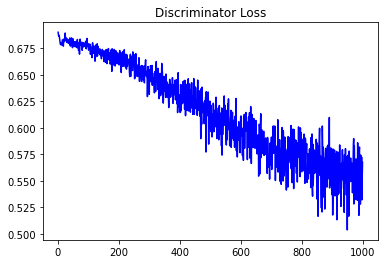

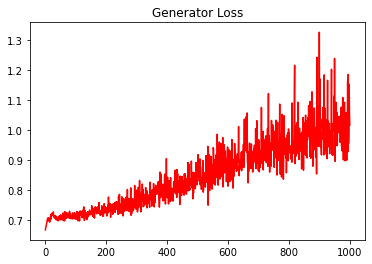

In [8]:
performanceMetrics.plotTrainingLoss2(discLossG1,genLossG1,np.linspace(1,n_epochs,n_epochs).astype(int))

In [9]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)
sb.glue("GAN_1 Metrics",GAN1_metrics)

tensor([[ 0.7317],
        [-2.1113],
        [ 0.5663],
        [ 0.2948],
        [-2.4135],
        [ 0.8632],
        [ 0.1027],
        [ 0.5474],
        [-0.6543],
        [ 0.7068],
        [-1.1098],
        [ 0.0044],
        [ 0.5005],
        [-0.0202],
        [ 0.7026],
        [ 0.1115],
        [ 0.3885],
        [-0.0623],
        [ 0.5803],
        [ 0.6464]], grad_fn=<MmBackward>)
tensor([[ 0.7733],
        [-2.5565],
        [ 0.5764],
        [ 0.1840],
        [-2.1987],
        [ 0.9571],
        [ 0.1057],
        [ 0.2369],
        [-0.7572],
        [ 0.6841],
        [-0.4047],
        [-0.0972],
        [ 0.5276],
        [ 0.0812],
        [ 0.7271],
        [ 0.1361],
        [ 0.5117],
        [ 0.0071],
        [ 0.5916],
        [ 0.5832]], grad_fn=<MmBackward>)
tensor([[ 0.7283],
        [-2.1611],
        [ 0.5658],
        [ 0.2520],
        [-2.4791],
        [ 0.8493],
        [ 0.1001],
        [ 0.2581],
        [-0.6526],
        [ 0.6775],
    

tensor([[ 0.8264],
        [-2.5085],
        [ 0.6761],
        [ 0.3398],
        [-2.0439],
        [ 1.0149],
        [ 0.1665],
        [ 0.4413],
        [-0.7557],
        [ 0.7926],
        [-0.6240],
        [ 0.1851],
        [ 0.5409],
        [-0.0603],
        [ 0.7376],
        [ 0.1617],
        [ 0.3318],
        [-0.2420],
        [ 0.5645],
        [ 0.8544]], grad_fn=<MmBackward>)
tensor([[ 0.7332],
        [-2.3549],
        [ 0.6004],
        [ 0.1929],
        [-2.3522],
        [ 0.8925],
        [ 0.1659],
        [ 0.4983],
        [-0.7665],
        [ 0.6946],
        [-0.7888],
        [-0.0941],
        [ 0.4849],
        [ 0.0716],
        [ 0.6729],
        [ 0.1529],
        [ 0.6078],
        [ 0.0107],
        [ 0.5454],
        [ 0.5888]], grad_fn=<MmBackward>)
tensor([[ 0.7602],
        [-2.1618],
        [ 0.5721],
        [ 0.2670],
        [-2.5645],
        [ 0.8990],
        [ 0.1142],
        [ 0.5107],
        [-0.6801],
        [ 0.7242],
    

tensor([[ 0.6915],
        [-2.0267],
        [ 0.5320],
        [ 0.2562],
        [-2.4598],
        [ 0.7742],
        [ 0.1370],
        [ 0.1967],
        [-0.6217],
        [ 0.6652],
        [-0.9537],
        [ 0.0181],
        [ 0.5227],
        [ 0.2282],
        [ 0.7215],
        [ 0.0796],
        [ 0.5311],
        [-0.1229],
        [ 0.5174],
        [ 0.5740]], grad_fn=<MmBackward>)
tensor([[ 0.7192],
        [-2.4983],
        [ 0.5291],
        [ 0.1708],
        [-2.1805],
        [ 0.8704],
        [ 0.1573],
        [ 0.2242],
        [-0.7746],
        [ 0.6614],
        [-0.3103],
        [-0.1664],
        [ 0.4695],
        [ 0.2831],
        [ 0.6613],
        [ 0.1177],
        [ 0.5806],
        [-0.0433],
        [ 0.5288],
        [ 0.4926]], grad_fn=<MmBackward>)
tensor([[ 0.7343],
        [-2.2311],
        [ 0.5147],
        [ 0.2124],
        [-2.3277],
        [ 0.9188],
        [ 0.1608],
        [ 0.4032],
        [-0.6772],
        [ 0.6846],
    

tensor([[ 0.7735],
        [-2.1845],
        [ 0.6025],
        [ 0.2598],
        [-2.3953],
        [ 0.8383],
        [ 0.1609],
        [ 0.2554],
        [-0.6153],
        [ 0.7073],
        [-1.0646],
        [ 0.0122],
        [ 0.4526],
        [ 0.2388],
        [ 0.6933],
        [ 0.1541],
        [ 0.4297],
        [-0.0200],
        [ 0.5547],
        [ 0.5709]], grad_fn=<MmBackward>)
tensor([[ 0.7914],
        [-2.3837],
        [ 0.5366],
        [ 0.2242],
        [-2.3119],
        [ 0.8998],
        [ 0.1769],
        [ 0.4291],
        [-0.7329],
        [ 0.7073],
        [-0.8154],
        [-0.0514],
        [ 0.4741],
        [ 0.2470],
        [ 0.7524],
        [ 0.1019],
        [ 0.5471],
        [-0.0427],
        [ 0.5887],
        [ 0.5438]], grad_fn=<MmBackward>)
tensor([[ 0.7698],
        [-2.1382],
        [ 0.6398],
        [ 0.2995],
        [-2.5122],
        [ 0.8857],
        [ 0.1369],
        [ 0.3037],
        [-0.6184],
        [ 0.7157],
    

tensor([[ 0.7163],
        [-2.3838],
        [ 0.5691],
        [ 0.2037],
        [-2.3382],
        [ 0.8731],
        [ 0.1460],
        [ 0.3518],
        [-0.7342],
        [ 0.6795],
        [-0.7415],
        [ 0.1219],
        [ 0.4759],
        [ 0.0198],
        [ 0.6947],
        [ 0.0916],
        [ 0.6023],
        [ 0.0203],
        [ 0.5607],
        [ 0.6316]], grad_fn=<MmBackward>)
tensor([[ 0.7498],
        [-2.2883],
        [ 0.5553],
        [ 0.2456],
        [-2.4544],
        [ 0.9127],
        [ 0.1227],
        [ 0.3936],
        [-0.6874],
        [ 0.7224],
        [-1.0880],
        [ 0.1582],
        [ 0.5072],
        [ 0.1123],
        [ 0.6943],
        [ 0.1742],
        [ 0.5056],
        [ 0.0088],
        [ 0.6190],
        [ 0.6277]], grad_fn=<MmBackward>)
tensor([[ 0.7394],
        [-2.4375],
        [ 0.5371],
        [ 0.2248],
        [-2.4045],
        [ 0.9576],
        [ 0.1645],
        [ 0.5113],
        [-0.7449],
        [ 0.7577],
    

tensor([[ 0.7678],
        [-2.1604],
        [ 0.6257],
        [ 0.2775],
        [-2.5214],
        [ 0.8721],
        [ 0.1002],
        [ 0.3422],
        [-0.6160],
        [ 0.6865],
        [-1.1780],
        [-0.0360],
        [ 0.5325],
        [ 0.0359],
        [ 0.6879],
        [ 0.1198],
        [ 0.4891],
        [-0.0509],
        [ 0.5314],
        [ 0.6128]], grad_fn=<MmBackward>)
tensor([[ 0.6902],
        [-1.7827],
        [ 0.5502],
        [ 0.2424],
        [-2.8002],
        [ 0.9446],
        [ 0.1045],
        [ 0.2603],
        [-0.7348],
        [ 0.6879],
        [-0.7293],
        [ 0.0201],
        [ 0.5431],
        [ 0.0905],
        [ 0.6649],
        [ 0.0579],
        [ 0.6443],
        [-0.1001],
        [ 0.5286],
        [ 0.6029]], grad_fn=<MmBackward>)
tensor([[ 0.7249],
        [-2.0754],
        [ 0.5305],
        [ 0.2201],
        [-2.4739],
        [ 0.9673],
        [ 0.1462],
        [ 0.4249],
        [-0.7958],
        [ 0.7188],
    

tensor([[ 0.7558],
        [-2.5538],
        [ 0.5645],
        [ 0.2289],
        [-2.2266],
        [ 1.0010],
        [ 0.1558],
        [ 0.2929],
        [-0.6351],
        [ 0.7319],
        [-0.9500],
        [ 0.1900],
        [ 0.4952],
        [ 0.0830],
        [ 0.7190],
        [ 0.1586],
        [ 0.4917],
        [ 0.0109],
        [ 0.5905],
        [ 0.6311]], grad_fn=<MmBackward>)
tensor([[ 0.7386],
        [-2.4041],
        [ 0.5133],
        [ 0.1796],
        [-2.3514],
        [ 1.0016],
        [ 0.1151],
        [ 0.4123],
        [-0.8940],
        [ 0.7271],
        [-0.3352],
        [-0.0347],
        [ 0.4427],
        [ 0.1281],
        [ 0.7125],
        [ 0.1140],
        [ 0.6773],
        [-0.0037],
        [ 0.5932],
        [ 0.6084]], grad_fn=<MmBackward>)
tensor([[ 0.7407],
        [-2.3266],
        [ 0.5471],
        [ 0.1753],
        [-2.3072],
        [ 0.9149],
        [ 0.1387],
        [ 0.2264],
        [-0.7686],
        [ 0.6639],
    

tensor([[ 0.7451],
        [-2.3748],
        [ 0.5535],
        [ 0.1932],
        [-2.3498],
        [ 0.9454],
        [ 0.1842],
        [ 0.3726],
        [-0.8703],
        [ 0.7070],
        [-0.6183],
        [ 0.1604],
        [ 0.5176],
        [ 0.1636],
        [ 0.6669],
        [ 0.1559],
        [ 0.6335],
        [-0.0124],
        [ 0.5707],
        [ 0.5942]], grad_fn=<MmBackward>)
tensor([[ 0.7376],
        [-2.2541],
        [ 0.5446],
        [ 0.2361],
        [-2.3355],
        [ 0.8781],
        [ 0.0744],
        [ 0.2327],
        [-0.6996],
        [ 0.6845],
        [-0.6783],
        [-0.0082],
        [ 0.4188],
        [ 0.1831],
        [ 0.6806],
        [ 0.1331],
        [ 0.4857],
        [-0.0106],
        [ 0.5356],
        [ 0.5829]], grad_fn=<MmBackward>)
tensor([[ 0.7298],
        [-2.1968],
        [ 0.6056],
        [ 0.2709],
        [-2.4492],
        [ 0.8833],
        [ 0.1167],
        [ 0.4398],
        [-0.6722],
        [ 0.6904],
    

tensor([[ 0.6915],
        [-2.0321],
        [ 0.5393],
        [ 0.2111],
        [-2.4158],
        [ 0.9602],
        [ 0.0611],
        [ 0.4676],
        [-0.7825],
        [ 0.7059],
        [-0.4918],
        [-0.1498],
        [ 0.4919],
        [ 0.1539],
        [ 0.7086],
        [ 0.1371],
        [ 0.4488],
        [-0.0111],
        [ 0.5868],
        [ 0.5644]], grad_fn=<MmBackward>)
tensor([[ 0.6670],
        [-1.8614],
        [ 0.5460],
        [ 0.2586],
        [-2.6698],
        [ 0.7473],
        [ 0.1205],
        [ 0.1728],
        [-0.6002],
        [ 0.6586],
        [-0.8666],
        [-0.3428],
        [ 0.4603],
        [ 0.1892],
        [ 0.6715],
        [ 0.0773],
        [ 0.5840],
        [-0.0628],
        [ 0.5141],
        [ 0.5511]], grad_fn=<MmBackward>)
tensor([[ 0.7096],
        [-2.3782],
        [ 0.5458],
        [ 0.2367],
        [-2.1801],
        [ 0.8715],
        [ 0.0968],
        [ 0.5852],
        [-0.7561],
        [ 0.6954],
    

tensor([[ 0.7192],
        [-2.1547],
        [ 0.5681],
        [ 0.2448],
        [-2.4135],
        [ 0.8140],
        [ 0.1262],
        [ 0.4081],
        [-0.6069],
        [ 0.6555],
        [-1.2293],
        [ 0.0139],
        [ 0.5055],
        [ 0.0170],
        [ 0.7174],
        [ 0.1199],
        [ 0.5249],
        [-0.0871],
        [ 0.5401],
        [ 0.5822]], grad_fn=<MmBackward>)
tensor([[ 0.8086],
        [-2.3065],
        [ 0.5493],
        [ 0.2217],
        [-2.4205],
        [ 0.9428],
        [ 0.1912],
        [ 0.5228],
        [-0.7737],
        [ 0.7181],
        [-1.0799],
        [ 0.1711],
        [ 0.5058],
        [ 0.1546],
        [ 0.7605],
        [ 0.1082],
        [ 0.6427],
        [-0.0338],
        [ 0.5789],
        [ 0.5790]], grad_fn=<MmBackward>)
tensor([[ 0.7542],
        [-2.4681],
        [ 0.5662],
        [ 0.2218],
        [-2.3223],
        [ 0.9258],
        [ 0.0903],
        [ 0.5049],
        [-0.7657],
        [ 0.7028],
    

tensor([[ 0.7519],
        [-2.3399],
        [ 0.5605],
        [ 0.2306],
        [-2.3903],
        [ 0.9591],
        [ 0.1451],
        [ 0.5955],
        [-0.6965],
        [ 0.7220],
        [-1.2700],
        [ 0.1983],
        [ 0.5360],
        [-0.1583],
        [ 0.7362],
        [ 0.1100],
        [ 0.6273],
        [-0.0332],
        [ 0.6071],
        [ 0.7165]], grad_fn=<MmBackward>)
tensor([[ 0.7130],
        [-2.0786],
        [ 0.5410],
        [ 0.2141],
        [-2.6155],
        [ 0.9195],
        [ 0.0959],
        [ 0.5617],
        [-0.7410],
        [ 0.6691],
        [-0.9882],
        [ 0.0167],
        [ 0.5496],
        [-0.3879],
        [ 0.7158],
        [ 0.0861],
        [ 0.6463],
        [-0.0720],
        [ 0.5749],
        [ 0.6747]], grad_fn=<MmBackward>)
tensor([[ 0.7061],
        [-2.1840],
        [ 0.5678],
        [ 0.2059],
        [-2.4179],
        [ 0.7966],
        [ 0.0977],
        [ 0.1491],
        [-0.6858],
        [ 0.6541],
    


tensor([[ 0.7793],
        [-2.3779],
        [ 0.5624],
        [ 0.2493],
        [-2.1937],
        [ 0.8890],
        [ 0.1046],
        [ 0.5262],
        [-0.6597],
        [ 0.6979],
        [-0.9342],
        [ 0.0520],
        [ 0.5039],
        [-0.1274],
        [ 0.7193],
        [ 0.1596],
        [ 0.4711],
        [-0.0314],
        [ 0.6079],
        [ 0.6623]], grad_fn=<MmBackward>)
tensor([[ 0.7414],
        [-2.3432],
        [ 0.5582],
        [ 0.2363],
        [-2.3269],
        [ 0.8365],
        [ 0.1174],
        [ 0.4940],
        [-0.6300],
        [ 0.6631],
        [-1.2784],
        [ 0.1305],
        [ 0.4852],
        [-0.3366],
        [ 0.7599],
        [ 0.1213],
        [ 0.6166],
        [-0.1142],
        [ 0.5570],
        [ 0.6666]], grad_fn=<MmBackward>)
tensor([[ 0.7296],
        [-2.5920],
        [ 0.5459],
        [ 0.2325],
        [-2.0524],
        [ 0.8305],
        [ 0.1170],
        [ 0.4926],
        [-0.6535],
        [ 0.6676],
   

tensor([[ 0.7029],
        [-2.5125],
        [ 0.5463],
        [ 0.2072],
        [-2.1185],
        [ 0.8704],
        [ 0.1509],
        [ 0.4206],
        [-0.6337],
        [ 0.6547],
        [-1.1091],
        [ 0.2251],
        [ 0.4958],
        [-0.2744],
        [ 0.7190],
        [ 0.1514],
        [ 0.5146],
        [-0.0404],
        [ 0.5597],
        [ 0.7033]], grad_fn=<MmBackward>)
tensor([[ 0.7397],
        [-1.8751],
        [ 0.6050],
        [ 0.2393],
        [-2.6276],
        [ 0.9028],
        [ 0.1008],
        [ 0.4757],
        [-0.7734],
        [ 0.6986],
        [-0.8416],
        [-0.1061],
        [ 0.5406],
        [ 0.0658],
        [ 0.7085],
        [ 0.1133],
        [ 0.4426],
        [-0.0343],
        [ 0.5564],
        [ 0.6235]], grad_fn=<MmBackward>)
tensor([[ 0.6729],
        [-2.2360],
        [ 0.5244],
        [ 0.1795],
        [-2.2920],
        [ 0.8617],
        [ 0.1024],
        [ 0.4180],
        [-0.8541],
        [ 0.6929],
    

tensor([[ 7.6578e-01],
        [-2.2890e+00],
        [ 5.9803e-01],
        [ 2.4582e-01],
        [-2.4919e+00],
        [ 9.9417e-01],
        [ 1.4084e-01],
        [ 5.2473e-01],
        [-8.2593e-01],
        [ 7.4106e-01],
        [-6.3109e-01],
        [-3.5839e-02],
        [ 5.0290e-01],
        [ 9.5689e-02],
        [ 6.9407e-01],
        [ 1.5057e-01],
        [ 4.6127e-01],
        [-1.0222e-05],
        [ 6.0828e-01],
        [ 6.2691e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7605],
        [-2.3652],
        [ 0.5301],
        [ 0.2037],
        [-2.2637],
        [ 0.9251],
        [ 0.1581],
        [ 0.5318],
        [-0.6968],
        [ 0.6590],
        [-0.9765],
        [ 0.0584],
        [ 0.5003],
        [-0.3585],
        [ 0.6892],
        [ 0.1340],
        [ 0.5670],
        [-0.0860],
        [ 0.5755],
        [ 0.6828]], grad_fn=<MmBackward>)
tensor([[ 0.7298],
        [-2.2415],
        [ 0.5572],
        [ 0.2314],
        [-2.3326],
        [ 0.8870],


tensor([[ 0.7085],
        [-2.4049],
        [ 0.5508],
        [ 0.2125],
        [-2.2769],
        [ 0.8850],
        [ 0.0809],
        [ 0.2305],
        [-0.6993],
        [ 0.6871],
        [-0.5151],
        [-0.0412],
        [ 0.4348],
        [ 0.1404],
        [ 0.6859],
        [ 0.1219],
        [ 0.5145],
        [-0.0280],
        [ 0.5976],
        [ 0.5455]], grad_fn=<MmBackward>)
tensor([[ 0.7157],
        [-2.1736],
        [ 0.5353],
        [ 0.1408],
        [-2.5413],
        [ 1.0442],
        [ 0.0675],
        [ 0.2831],
        [-0.9440],
        [ 0.7209],
        [-0.1747],
        [-0.1185],
        [ 0.4899],
        [ 0.1779],
        [ 0.7406],
        [ 0.1340],
        [ 0.6659],
        [-0.0441],
        [ 0.5750],
        [ 0.5451]], grad_fn=<MmBackward>)
tensor([[ 0.7912],
        [-2.3331],
        [ 0.5833],
        [ 0.2226],
        [-2.3314],
        [ 0.9254],
        [ 0.1597],
        [ 0.3215],
        [-0.6616],
        [ 0.6933],
    

tensor([[ 0.6966],
        [-1.9983],
        [ 0.5312],
        [ 0.2336],
        [-2.4875],
        [ 0.7919],
        [ 0.0959],
        [ 0.1726],
        [-0.6448],
        [ 0.6803],
        [-0.8257],
        [-0.0143],
        [ 0.4787],
        [ 0.2078],
        [ 0.6831],
        [ 0.1388],
        [ 0.5631],
        [-0.0585],
        [ 0.5630],
        [ 0.4723]], grad_fn=<MmBackward>)
tensor([[ 0.7135],
        [-1.8067],
        [ 0.5344],
        [ 0.2256],
        [-2.6852],
        [ 0.8171],
        [ 0.1108],
        [ 0.3818],
        [-0.7212],
        [ 0.6698],
        [-0.9944],
        [-0.1463],
        [ 0.4834],
        [ 0.1257],
        [ 0.6906],
        [ 0.0841],
        [ 0.6170],
        [-0.0262],
        [ 0.5267],
        [ 0.5567]], grad_fn=<MmBackward>)
tensor([[ 0.7826],
        [-2.4017],
        [ 0.5786],
        [ 0.2332],
        [-2.3362],
        [ 0.9604],
        [ 0.1324],
        [ 0.4662],
        [-0.8310],
        [ 0.7364],
    

tensor([[ 7.1134e-01],
        [-2.2653e+00],
        [ 5.6353e-01],
        [ 2.3749e-01],
        [-2.4020e+00],
        [ 9.0662e-01],
        [ 9.6588e-02],
        [ 2.8391e-01],
        [-6.8622e-01],
        [ 6.9325e-01],
        [-8.1616e-01],
        [-1.2036e-01],
        [ 5.7331e-01],
        [ 1.4128e-01],
        [ 7.1168e-01],
        [ 9.7155e-02],
        [ 5.2855e-01],
        [ 1.4394e-03],
        [ 5.8694e-01],
        [ 6.0229e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6967],
        [-1.9088],
        [ 0.6126],
        [ 0.2462],
        [-2.6575],
        [ 0.7950],
        [ 0.1039],
        [ 0.2446],
        [-0.6628],
        [ 0.6889],
        [-0.5649],
        [-0.5813],
        [ 0.4445],
        [ 0.1116],
        [ 0.6587],
        [ 0.0919],
        [ 0.5465],
        [-0.0201],
        [ 0.5794],
        [ 0.5276]], grad_fn=<MmBackward>)
tensor([[ 0.7252],
        [-2.2264],
        [ 0.5368],
        [ 0.1861],
        [-2.4282],
        [ 0.9334],


tensor([[ 0.6998],
        [-2.2691],
        [ 0.5274],
        [ 0.2576],
        [-2.3181],
        [ 0.8391],
        [ 0.0798],
        [ 0.4270],
        [-0.6156],
        [ 0.6662],
        [-1.1668],
        [ 0.0618],
        [ 0.5310],
        [-0.3148],
        [ 0.7141],
        [ 0.1128],
        [ 0.5733],
        [-0.1003],
        [ 0.5621],
        [ 0.6794]], grad_fn=<MmBackward>)
tensor([[ 0.7538],
        [-2.3450],
        [ 0.5810],
        [ 0.2825],
        [-2.2303],
        [ 0.9043],
        [ 0.0943],
        [ 0.4565],
        [-0.6178],
        [ 0.7189],
        [-1.1490],
        [-0.0190],
        [ 0.4758],
        [ 0.0988],
        [ 0.6959],
        [ 0.1272],
        [ 0.4912],
        [-0.0316],
        [ 0.5940],
        [ 0.6510]], grad_fn=<MmBackward>)
tensor([[ 0.6859],
        [-1.9943],
        [ 0.5234],
        [ 0.2248],
        [-2.5276],
        [ 0.7917],
        [ 0.0600],
        [ 0.1732],
        [-0.7519],
        [ 0.6549],
    

tensor([[ 0.7851],
        [-2.2543],
        [ 0.5838],
        [ 0.2428],
        [-2.3901],
        [ 0.9620],
        [ 0.1175],
        [ 0.3834],
        [-0.7634],
        [ 0.7265],
        [-0.4940],
        [-0.0818],
        [ 0.5081],
        [ 0.1651],
        [ 0.7087],
        [ 0.1263],
        [ 0.4003],
        [-0.0652],
        [ 0.5705],
        [ 0.6375]], grad_fn=<MmBackward>)
tensor([[ 0.7679],
        [-2.2516],
        [ 0.5955],
        [ 0.2677],
        [-2.2593],
        [ 0.9548],
        [ 0.1592],
        [ 0.6190],
        [-0.7247],
        [ 0.7292],
        [-1.1165],
        [ 0.0148],
        [ 0.5094],
        [ 0.0173],
        [ 0.7411],
        [ 0.1083],
        [ 0.3942],
        [-0.0465],
        [ 0.6000],
        [ 0.6769]], grad_fn=<MmBackward>)
tensor([[ 0.6970],
        [-2.2344],
        [ 0.5652],
        [ 0.2315],
        [-2.4607],
        [ 0.8733],
        [ 0.1034],
        [ 0.2619],
        [-0.7377],
        [ 0.7179],
    


tensor([[ 0.8227],
        [-2.2523],
        [ 0.6649],
        [ 0.3032],
        [-2.0326],
        [ 0.9725],
        [ 0.1430],
        [ 0.3351],
        [-0.9331],
        [ 0.7851],
        [-0.1917],
        [ 0.2216],
        [ 0.5484],
        [-0.0193],
        [ 0.7851],
        [ 0.1737],
        [ 0.3720],
        [-0.2793],
        [ 0.4859],
        [ 0.8223]], grad_fn=<MmBackward>)
tensor([[ 0.7630],
        [-2.2309],
        [ 0.5671],
        [ 0.1588],
        [-2.3424],
        [ 0.9115],
        [ 0.0815],
        [ 0.2488],
        [-0.9046],
        [ 0.6874],
        [-0.1080],
        [-0.2330],
        [ 0.5052],
        [ 0.1477],
        [ 0.7083],
        [ 0.1472],
        [ 0.4265],
        [-0.0363],
        [ 0.5435],
        [ 0.5732]], grad_fn=<MmBackward>)
tensor([[ 0.7375],
        [-2.2100],
        [ 0.5733],
        [ 0.2535],
        [-2.3291],
        [ 0.9200],
        [ 0.1013],
        [ 0.4921],
        [-0.7834],
        [ 0.7188],
   

tensor([[ 0.7667],
        [-2.3187],
        [ 0.5873],
        [ 0.2690],
        [-2.2815],
        [ 0.9897],
        [ 0.1763],
        [ 0.6153],
        [-0.7225],
        [ 0.7488],
        [-1.1683],
        [ 0.1739],
        [ 0.4983],
        [-0.0602],
        [ 0.7448],
        [ 0.1461],
        [ 0.4367],
        [-0.0648],
        [ 0.6050],
        [ 0.7189]], grad_fn=<MmBackward>)
tensor([[ 0.8243],
        [-2.4059],
        [ 0.6464],
        [ 0.3786],
        [-1.7937],
        [ 0.9303],
        [ 0.1753],
        [ 0.4864],
        [-0.5611],
        [ 0.7934],
        [-0.8067],
        [ 0.2481],
        [ 0.5835],
        [-0.0234],
        [ 0.7692],
        [ 0.1570],
        [ 0.7156],
        [-0.3339],
        [ 0.5062],
        [ 0.7974]], grad_fn=<MmBackward>)
tensor([[ 0.7406],
        [-2.0984],
        [ 0.5707],
        [ 0.2764],
        [-2.6558],
        [ 0.8852],
        [ 0.1295],
        [ 0.5324],
        [-0.7447],
        [ 0.7087],
    

tensor([[ 0.7624],
        [-2.3465],
        [ 0.5343],
        [ 0.2256],
        [-2.2856],
        [ 0.9763],
        [ 0.1570],
        [ 0.2664],
        [-0.7997],
        [ 0.7341],
        [-0.7438],
        [ 0.1259],
        [ 0.4985],
        [ 0.2642],
        [ 0.6963],
        [ 0.1327],
        [ 0.6563],
        [-0.0649],
        [ 0.5675],
        [ 0.6049]], grad_fn=<MmBackward>)
tensor([[ 0.7263],
        [-1.9824],
        [ 0.6115],
        [ 0.2320],
        [-2.6329],
        [ 0.9156],
        [ 0.1096],
        [ 0.4553],
        [-0.7153],
        [ 0.7375],
        [-0.8303],
        [-0.1583],
        [ 0.4898],
        [ 0.1351],
        [ 0.6963],
        [ 0.1083],
        [ 0.5399],
        [ 0.0309],
        [ 0.5662],
        [ 0.5846]], grad_fn=<MmBackward>)
tensor([[ 0.7395],
        [-1.7374],
        [ 0.5792],
        [ 0.2846],
        [-2.8271],
        [ 0.9543],
        [ 0.1075],
        [ 0.2586],
        [-0.7966],
        [ 0.7479],
    

tensor([[ 0.7562],
        [-2.3344],
        [ 0.5816],
        [ 0.2124],
        [-2.3925],
        [ 0.8805],
        [ 0.1520],
        [ 0.2471],
        [-0.6380],
        [ 0.6633],
        [-1.1688],
        [ 0.1177],
        [ 0.4898],
        [-0.0752],
        [ 0.7884],
        [ 0.0782],
        [ 0.5458],
        [-0.0104],
        [ 0.5601],
        [ 0.6414]], grad_fn=<MmBackward>)
tensor([[ 0.7329],
        [-2.1676],
        [ 0.5995],
        [ 0.2771],
        [-2.5384],
        [ 0.8739],
        [ 0.1120],
        [ 0.2438],
        [-0.6070],
        [ 0.6799],
        [-1.2973],
        [-0.0428],
        [ 0.5409],
        [ 0.0183],
        [ 0.7172],
        [ 0.0951],
        [ 0.6359],
        [-0.0555],
        [ 0.5665],
        [ 0.5924]], grad_fn=<MmBackward>)
tensor([[ 0.7185],
        [-2.1010],
        [ 0.5346],
        [ 0.1795],
        [-2.3842],
        [ 0.9506],
        [ 0.1317],
        [ 0.3508],
        [-0.8209],
        [ 0.6893],
    

tensor([[ 0.7230],
        [-2.1548],
        [ 0.5328],
        [ 0.2547],
        [-2.4168],
        [ 0.8324],
        [ 0.1038],
        [ 0.2311],
        [-0.6361],
        [ 0.7294],
        [-0.8852],
        [-0.0518],
        [ 0.3815],
        [ 0.1556],
        [ 0.6934],
        [ 0.1597],
        [ 0.4531],
        [-0.0369],
        [ 0.5772],
        [ 0.4836]], grad_fn=<MmBackward>)
tensor([[ 0.7347],
        [-2.3978],
        [ 0.5335],
        [ 0.1867],
        [-2.2610],
        [ 0.8835],
        [ 0.1482],
        [ 0.4612],
        [-0.7800],
        [ 0.6813],
        [-0.6476],
        [-0.0452],
        [ 0.4915],
        [ 0.0932],
        [ 0.7394],
        [ 0.1520],
        [ 0.5171],
        [-0.0046],
        [ 0.5551],
        [ 0.5835]], grad_fn=<MmBackward>)
tensor([[ 0.7361],
        [-2.1753],
        [ 0.5511],
        [ 0.1922],
        [-2.4719],
        [ 0.9057],
        [ 0.0519],
        [ 0.1981],
        [-0.8075],
        [ 0.6897],
    

tensor([[ 0.7101],
        [-1.9171],
        [ 0.5605],
        [ 0.2091],
        [-2.5779],
        [ 0.8402],
        [ 0.0673],
        [ 0.3867],
        [-0.7766],
        [ 0.6801],
        [-0.4046],
        [-0.1503],
        [ 0.4745],
        [ 0.1482],
        [ 0.6861],
        [ 0.0609],
        [ 0.5463],
        [-0.0123],
        [ 0.5444],
        [ 0.5453]], grad_fn=<MmBackward>)
tensor([[ 0.7352],
        [-2.0948],
        [ 0.5524],
        [ 0.1775],
        [-2.4057],
        [ 0.9169],
        [ 0.0894],
        [ 0.2553],
        [-0.7645],
        [ 0.6494],
        [-0.6061],
        [-0.1394],
        [ 0.4896],
        [ 0.0944],
        [ 0.6900],
        [ 0.1308],
        [ 0.5019],
        [-0.0323],
        [ 0.5240],
        [ 0.5567]], grad_fn=<MmBackward>)
tensor([[ 0.7359],
        [-2.3391],
        [ 0.5724],
        [ 0.2267],
        [-2.3748],
        [ 0.8282],
        [ 0.0799],
        [ 0.3750],
        [-0.6542],
        [ 0.7126],
    

tensor([[ 0.7846],
        [-2.3269],
        [ 0.5833],
        [ 0.2830],
        [-2.3555],
        [ 0.8763],
        [ 0.1320],
        [ 0.2277],
        [-0.6005],
        [ 0.7307],
        [-1.1963],
        [-0.0287],
        [ 0.4986],
        [ 0.1023],
        [ 0.7336],
        [ 0.1275],
        [ 0.5850],
        [-0.0360],
        [ 0.5719],
        [ 0.5782]], grad_fn=<MmBackward>)
tensor([[ 0.7306],
        [-2.1727],
        [ 0.5636],
        [ 0.1909],
        [-2.5249],
        [ 0.8267],
        [ 0.1119],
        [ 0.3586],
        [-0.7777],
        [ 0.6765],
        [-0.2050],
        [-0.3587],
        [ 0.4814],
        [ 0.0174],
        [ 0.6938],
        [ 0.1253],
        [ 0.5493],
        [-0.0197],
        [ 0.5366],
        [ 0.6127]], grad_fn=<MmBackward>)
tensor([[ 0.7725],
        [-2.4660],
        [ 0.5913],
        [ 0.2345],
        [-2.3624],
        [ 0.9151],
        [ 0.1755],
        [ 0.4728],
        [-0.6895],
        [ 0.7330],
    

tensor([[ 0.7473],
        [-2.0264],
        [ 0.5551],
        [ 0.2279],
        [-2.5848],
        [ 0.8818],
        [ 0.1125],
        [ 0.3108],
        [-0.7773],
        [ 0.7112],
        [-1.0936],
        [ 0.1681],
        [ 0.5069],
        [ 0.1085],
        [ 0.6841],
        [ 0.1056],
        [ 0.5454],
        [-0.0098],
        [ 0.5738],
        [ 0.6401]], grad_fn=<MmBackward>)
tensor([[ 0.7464],
        [-2.1210],
        [ 0.6280],
        [ 0.1772],
        [-2.5774],
        [ 0.8775],
        [ 0.0886],
        [ 0.3585],
        [-0.8473],
        [ 0.6824],
        [-0.4667],
        [-0.1893],
        [ 0.4086],
        [-0.0066],
        [ 0.6933],
        [ 0.1219],
        [ 0.6018],
        [-0.0079],
        [ 0.5794],
        [ 0.6107]], grad_fn=<MmBackward>)
tensor([[ 0.7424],
        [-2.4399],
        [ 0.5705],
        [ 0.2182],
        [-2.2535],
        [ 0.8807],
        [ 0.1288],
        [ 0.4004],
        [-0.6353],
        [ 0.6635],
    

tensor([[ 0.7926],
        [-2.5894],
        [ 0.5758],
        [ 0.2794],
        [-1.9963],
        [ 0.8809],
        [ 0.0759],
        [ 0.4826],
        [-0.6364],
        [ 0.7370],
        [-0.8831],
        [-0.2964],
        [ 0.4863],
        [-0.0497],
        [ 0.7029],
        [ 0.1720],
        [ 0.4843],
        [-0.0761],
        [ 0.5834],
        [ 0.6990]], grad_fn=<MmBackward>)
tensor([[ 0.7343],
        [-2.0514],
        [ 0.5727],
        [ 0.1717],
        [-2.4833],
        [ 0.9412],
        [ 0.0662],
        [ 0.4566],
        [-0.8699],
        [ 0.7025],
        [-0.2962],
        [-0.2315],
        [ 0.5362],
        [ 0.0432],
        [ 0.7169],
        [ 0.1608],
        [ 0.4698],
        [-0.0163],
        [ 0.5832],
        [ 0.6008]], grad_fn=<MmBackward>)
tensor([[ 0.7503],
        [-2.1752],
        [ 0.5489],
        [ 0.2537],
        [-2.4603],
        [ 0.9203],
        [ 0.1271],
        [ 0.4056],
        [-0.7420],
        [ 0.7273],
    

tensor([[ 0.7440],
        [-2.4554],
        [ 0.5771],
        [ 0.2837],
        [-2.1830],
        [ 0.8629],
        [ 0.1244],
        [ 0.5808],
        [-0.6105],
        [ 0.7357],
        [-1.2229],
        [ 0.1218],
        [ 0.4356],
        [-0.0626],
        [ 0.6962],
        [ 0.1457],
        [ 0.4858],
        [-0.0362],
        [ 0.6023],
        [ 0.6619]], grad_fn=<MmBackward>)
tensor([[ 0.7452],
        [-2.1106],
        [ 0.5345],
        [ 0.2144],
        [-2.4532],
        [ 0.8413],
        [ 0.0528],
        [ 0.1855],
        [-0.7090],
        [ 0.6496],
        [-0.6244],
        [-0.0871],
        [ 0.5304],
        [ 0.0816],
        [ 0.7116],
        [ 0.1063],
        [ 0.4520],
        [-0.0249],
        [ 0.5222],
        [ 0.5628]], grad_fn=<MmBackward>)
tensor([[ 0.7233],
        [-2.3930],
        [ 0.5559],
        [ 0.2103],
        [-2.1333],
        [ 0.8760],
        [ 0.1239],
        [ 0.5269],
        [-0.7057],
        [ 0.6786],
    

tensor([[ 0.7105],
        [-1.8169],
        [ 0.5887],
        [ 0.2421],
        [-2.7567],
        [ 0.7811],
        [ 0.1078],
        [ 0.3547],
        [-0.6465],
        [ 0.6808],
        [-0.9019],
        [-0.0964],
        [ 0.4613],
        [ 0.1303],
        [ 0.6716],
        [ 0.1104],
        [ 0.5699],
        [-0.0212],
        [ 0.5455],
        [ 0.5259]], grad_fn=<MmBackward>)
tensor([[ 0.8136],
        [-2.3197],
        [ 0.5863],
        [ 0.3275],
        [-2.0246],
        [ 0.8813],
        [ 0.1955],
        [ 0.3759],
        [-0.5036],
        [ 0.7523],
        [-0.7784],
        [-0.0716],
        [ 0.6304],
        [-0.1354],
        [ 0.7395],
        [ 0.1801],
        [ 0.7171],
        [-0.2545],
        [ 0.5441],
        [ 0.8453]], grad_fn=<MmBackward>)
tensor([[ 0.7288],
        [-2.1574],
        [ 0.5387],
        [ 0.2258],
        [-2.4889],
        [ 0.8769],
        [ 0.0913],
        [ 0.1905],
        [-0.7100],
        [ 0.7178],
    

tensor([[ 0.7530],
        [-2.5747],
        [ 0.5819],
        [ 0.1882],
        [-2.1905],
        [ 0.9167],
        [ 0.1428],
        [ 0.3331],
        [-0.7383],
        [ 0.7146],
        [-0.5584],
        [ 0.1519],
        [ 0.5059],
        [ 0.0741],
        [ 0.6861],
        [ 0.1109],
        [ 0.5690],
        [ 0.0171],
        [ 0.5309],
        [ 0.6274]], grad_fn=<MmBackward>)
tensor([[ 0.7751],
        [-2.3298],
        [ 0.5724],
        [ 0.2672],
        [-2.3083],
        [ 0.8934],
        [ 0.1483],
        [ 0.5161],
        [-0.6351],
        [ 0.7310],
        [-1.2826],
        [-0.1266],
        [ 0.4612],
        [ 0.1289],
        [ 0.7448],
        [ 0.0974],
        [ 0.6028],
        [-0.0349],
        [ 0.6205],
        [ 0.5384]], grad_fn=<MmBackward>)
tensor([[ 0.7447],
        [-2.5815],
        [ 0.5354],
        [ 0.1887],
        [-2.1792],
        [ 1.0102],
        [ 0.0875],
        [ 0.5797],
        [-0.8687],
        [ 0.7294],
    

tensor([[ 0.7451],
        [-2.2855],
        [ 0.5840],
        [ 0.2136],
        [-2.4015],
        [ 0.8922],
        [ 0.0853],
        [ 0.2488],
        [-0.7631],
        [ 0.6767],
        [-0.6073],
        [-0.0854],
        [ 0.5097],
        [-0.0353],
        [ 0.6962],
        [ 0.1178],
        [ 0.4828],
        [-0.0217],
        [ 0.5552],
        [ 0.6401]], grad_fn=<MmBackward>)
tensor([[ 0.7019],
        [-2.1989],
        [ 0.5499],
        [ 0.2206],
        [-2.4065],
        [ 0.9263],
        [ 0.1265],
        [ 0.3754],
        [-0.6278],
        [ 0.7000],
        [-1.1531],
        [-0.0248],
        [ 0.5194],
        [-0.0547],
        [ 0.6856],
        [ 0.1123],
        [ 0.5784],
        [-0.0477],
        [ 0.5909],
        [ 0.5971]], grad_fn=<MmBackward>)
tensor([[ 0.7751],
        [-2.3354],
        [ 0.6037],
        [ 0.2617],
        [-2.3597],
        [ 0.8509],
        [ 0.1694],
        [ 0.4712],
        [-0.6018],
        [ 0.6976],
    

tensor([[ 0.7169],
        [-2.3764],
        [ 0.5153],
        [ 0.1904],
        [-2.3457],
        [ 0.9096],
        [ 0.1706],
        [ 0.4603],
        [-0.7375],
        [ 0.6873],
        [-0.6470],
        [-0.2069],
        [ 0.4771],
        [ 0.2029],
        [ 0.7682],
        [ 0.1290],
        [ 0.5994],
        [-0.0214],
        [ 0.5529],
        [ 0.5359]], grad_fn=<MmBackward>)
tensor([[ 7.2885e-01],
        [-1.9914e+00],
        [ 5.5678e-01],
        [ 2.8181e-01],
        [-2.5731e+00],
        [ 8.4788e-01],
        [ 1.2418e-01],
        [ 4.2193e-01],
        [-6.6552e-01],
        [ 7.3805e-01],
        [-9.6250e-01],
        [-3.2699e-02],
        [ 4.8740e-01],
        [ 1.5217e-01],
        [ 6.9996e-01],
        [ 1.3929e-01],
        [ 4.1416e-01],
        [-5.2929e-05],
        [ 5.6535e-01],
        [ 5.8761e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7256],
        [-2.1851],
        [ 0.5808],
        [ 0.2625],
        [-2.5240],
        [ 0.8468],


tensor([[ 0.7862],
        [-2.2172],
        [ 0.5371],
        [ 0.1997],
        [-2.3676],
        [ 0.9300],
        [ 0.1018],
        [ 0.3801],
        [-0.8057],
        [ 0.7189],
        [-0.6669],
        [-0.0913],
        [ 0.4889],
        [ 0.1833],
        [ 0.6992],
        [ 0.1391],
        [ 0.6278],
        [-0.0247],
        [ 0.5555],
        [ 0.5736]], grad_fn=<MmBackward>)
tensor([[ 0.7521],
        [-2.3098],
        [ 0.5857],
        [ 0.2322],
        [-2.3850],
        [ 0.9561],
        [ 0.1673],
        [ 0.5826],
        [-0.6903],
        [ 0.7234],
        [-1.4140],
        [ 0.1906],
        [ 0.5119],
        [-0.0789],
        [ 0.7399],
        [ 0.1697],
        [ 0.5641],
        [-0.0580],
        [ 0.6213],
        [ 0.6796]], grad_fn=<MmBackward>)
tensor([[ 0.7402],
        [-2.1861],
        [ 0.5477],
        [ 0.2208],
        [-2.3842],
        [ 0.9106],
        [ 0.1110],
        [ 0.2246],
        [-0.7164],
        [ 0.6812],
    


tensor([[ 0.7210],
        [-2.0269],
        [ 0.5349],
        [ 0.2082],
        [-2.4847],
        [ 0.8627],
        [ 0.1031],
        [ 0.2994],
        [-0.7965],
        [ 0.6980],
        [-0.6183],
        [-0.2291],
        [ 0.4842],
        [ 0.1898],
        [ 0.7279],
        [ 0.1164],
        [ 0.5793],
        [-0.0754],
        [ 0.5508],
        [ 0.5776]], grad_fn=<MmBackward>)
tensor([[ 0.7393],
        [-2.1940],
        [ 0.5839],
        [ 0.2315],
        [-2.4369],
        [ 0.9065],
        [ 0.0883],
        [ 0.4432],
        [-0.7370],
        [ 0.7015],
        [-0.7665],
        [-0.1090],
        [ 0.4724],
        [ 0.1190],
        [ 0.6939],
        [ 0.1012],
        [ 0.5268],
        [-0.0359],
        [ 0.5578],
        [ 0.5869]], grad_fn=<MmBackward>)
tensor([[ 0.7486],
        [-2.5953],
        [ 0.5558],
        [ 0.1661],
        [-2.1998],
        [ 0.9441],
        [ 0.1270],
        [ 0.4015],
        [-0.7455],
        [ 0.7342],
   

tensor([[ 0.7105],
        [-2.5751],
        [ 0.4998],
        [ 0.1976],
        [-2.1613],
        [ 0.9221],
        [ 0.1438],
        [ 0.2972],
        [-0.8022],
        [ 0.6947],
        [-0.2267],
        [-0.2011],
        [ 0.4952],
        [ 0.2278],
        [ 0.7299],
        [ 0.1195],
        [ 0.5520],
        [-0.0222],
        [ 0.5587],
        [ 0.5183]], grad_fn=<MmBackward>)
tensor([[ 0.7542],
        [-2.5418],
        [ 0.5696],
        [ 0.2613],
        [-2.0407],
        [ 0.9587],
        [ 0.1318],
        [ 0.5609],
        [-0.6947],
        [ 0.7157],
        [-0.5690],
        [-0.1058],
        [ 0.4632],
        [ 0.0356],
        [ 0.6882],
        [ 0.1416],
        [ 0.3320],
        [-0.0274],
        [ 0.5874],
        [ 0.6410]], grad_fn=<MmBackward>)
tensor([[ 0.7431],
        [-2.0650],
        [ 0.5704],
        [ 0.2531],
        [-2.4708],
        [ 0.9063],
        [ 0.1294],
        [ 0.5420],
        [-0.7486],
        [ 0.7350],
    

tensor([[ 7.1947e-01],
        [-1.8933e+00],
        [ 6.1197e-01],
        [ 2.4532e-01],
        [-2.7575e+00],
        [ 9.7554e-01],
        [ 1.4335e-01],
        [ 4.7428e-01],
        [-7.5637e-01],
        [ 7.1460e-01],
        [-1.1082e+00],
        [-1.1076e-01],
        [ 5.0731e-01],
        [ 3.6691e-02],
        [ 7.1769e-01],
        [ 9.1638e-02],
        [ 6.8186e-01],
        [-2.5148e-03],
        [ 6.1377e-01],
        [ 6.1794e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7193],
        [-2.2834],
        [ 0.5507],
        [ 0.1675],
        [-2.3903],
        [ 1.0185],
        [ 0.0687],
        [ 0.4985],
        [-0.8980],
        [ 0.7362],
        [-0.2483],
        [-0.0906],
        [ 0.4710],
        [ 0.0819],
        [ 0.6867],
        [ 0.1609],
        [ 0.6096],
        [-0.0304],
        [ 0.6048],
        [ 0.5773]], grad_fn=<MmBackward>)
tensor([[ 0.7514],
        [-2.3619],
        [ 0.4997],
        [ 0.1828],
        [-2.2599],
        [ 0.8869],


tensor([[ 7.1276e-01],
        [-2.4878e+00],
        [ 5.7217e-01],
        [ 2.0277e-01],
        [-2.1929e+00],
        [ 9.1894e-01],
        [ 1.4776e-01],
        [ 5.4550e-01],
        [-7.7691e-01],
        [ 6.8223e-01],
        [-4.3022e-01],
        [-1.3681e-01],
        [ 4.9068e-01],
        [ 5.7133e-02],
        [ 7.0063e-01],
        [ 1.1962e-01],
        [ 5.3002e-01],
        [ 5.3030e-04],
        [ 5.7008e-01],
        [ 5.7922e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7405],
        [-2.1622],
        [ 0.5209],
        [ 0.1896],
        [-2.5146],
        [ 0.9460],
        [ 0.0557],
        [ 0.3846],
        [-0.8196],
        [ 0.6929],
        [-0.3951],
        [-0.2325],
        [ 0.4793],
        [ 0.1704],
        [ 0.6853],
        [ 0.1226],
        [ 0.6913],
        [-0.0216],
        [ 0.5445],
        [ 0.5588]], grad_fn=<MmBackward>)
tensor([[ 0.6998],
        [-2.1606],
        [ 0.5431],
        [ 0.2009],
        [-2.3874],
        [ 0.9222],


tensor([[ 0.6805],
        [-1.9742],
        [ 0.5523],
        [ 0.2508],
        [-2.5312],
        [ 0.8047],
        [ 0.0812],
        [ 0.1878],
        [-0.5905],
        [ 0.6680],
        [-1.0338],
        [-0.0093],
        [ 0.5009],
        [ 0.1767],
        [ 0.7099],
        [ 0.1223],
        [ 0.5739],
        [-0.0512],
        [ 0.5255],
        [ 0.5357]], grad_fn=<MmBackward>)
tensor([[ 0.7403],
        [-2.4859],
        [ 0.5849],
        [ 0.2757],
        [-2.1062],
        [ 0.8864],
        [ 0.1390],
        [ 0.5990],
        [-0.6572],
        [ 0.7205],
        [-0.9430],
        [ 0.0258],
        [ 0.4356],
        [-0.0943],
        [ 0.6917],
        [ 0.1337],
        [ 0.4364],
        [-0.0488],
        [ 0.5898],
        [ 0.6690]], grad_fn=<MmBackward>)
tensor([[ 0.7492],
        [-2.1318],
        [ 0.6083],
        [ 0.2220],
        [-2.4923],
        [ 0.9481],
        [ 0.0929],
        [ 0.4230],
        [-0.8236],
        [ 0.7129],
    

tensor([[ 0.7333],
        [-2.2585],
        [ 0.5650],
        [ 0.2752],
        [-2.3684],
        [ 0.8238],
        [ 0.1149],
        [ 0.2400],
        [-0.6122],
        [ 0.6970],
        [-0.9886],
        [-0.0522],
        [ 0.4551],
        [ 0.1735],
        [ 0.6889],
        [ 0.1259],
        [ 0.4765],
        [-0.0253],
        [ 0.5599],
        [ 0.5902]], grad_fn=<MmBackward>)
tensor([[ 0.7576],
        [-2.1181],
        [ 0.5519],
        [ 0.2607],
        [-2.5042],
        [ 0.8665],
        [ 0.0949],
        [ 0.3741],
        [-0.6453],
        [ 0.6858],
        [-1.1895],
        [-0.0954],
        [ 0.4872],
        [ 0.0371],
        [ 0.6938],
        [ 0.1093],
        [ 0.4964],
        [-0.0525],
        [ 0.5581],
        [ 0.6415]], grad_fn=<MmBackward>)
tensor([[ 0.7250],
        [-1.9638],
        [ 0.6428],
        [ 0.2966],
        [-2.5963],
        [ 0.8271],
        [ 0.1268],
        [ 0.3217],
        [-0.6117],
        [ 0.6897],
    

tensor([[ 0.7514],
        [-2.6506],
        [ 0.5447],
        [ 0.2351],
        [-2.1612],
        [ 0.9858],
        [ 0.2156],
        [ 0.6095],
        [-0.7160],
        [ 0.7276],
        [-0.9628],
        [ 0.1987],
        [ 0.5187],
        [ 0.1129],
        [ 0.7441],
        [ 0.0783],
        [ 0.6647],
        [-0.0084],
        [ 0.6048],
        [ 0.6101]], grad_fn=<MmBackward>)
tensor([[ 0.7291],
        [-2.5220],
        [ 0.5496],
        [ 0.2466],
        [-2.2484],
        [ 0.9415],
        [ 0.1534],
        [ 0.5030],
        [-0.6326],
        [ 0.6955],
        [-1.0958],
        [ 0.0549],
        [ 0.5017],
        [-0.0699],
        [ 0.7129],
        [ 0.1077],
        [ 0.6421],
        [ 0.0091],
        [ 0.6617],
        [ 0.6114]], grad_fn=<MmBackward>)
tensor([[ 0.7385],
        [-2.1359],
        [ 0.5788],
        [ 0.2101],
        [-2.5123],
        [ 0.8377],
        [ 0.0730],
        [ 0.1426],
        [-0.7052],
        [ 0.6776],
    

tensor([[ 0.7780],
        [-2.4681],
        [ 0.5910],
        [ 0.2630],
        [-2.2280],
        [ 0.9233],
        [ 0.1398],
        [ 0.4988],
        [-0.5739],
        [ 0.7088],
        [-1.4704],
        [-0.0159],
        [ 0.4481],
        [-0.1273],
        [ 0.7624],
        [ 0.1253],
        [ 0.5401],
        [-0.0761],
        [ 0.5997],
        [ 0.6747]], grad_fn=<MmBackward>)
tensor([[ 0.6682],
        [-2.2547],
        [ 0.5381],
        [ 0.2413],
        [-2.3906],
        [ 0.7995],
        [ 0.1138],
        [ 0.2681],
        [-0.6503],
        [ 0.7404],
        [-0.4850],
        [-0.5535],
        [ 0.4709],
        [ 0.2049],
        [ 0.7068],
        [ 0.1549],
        [ 0.5580],
        [-0.0495],
        [ 0.5857],
        [ 0.5060]], grad_fn=<MmBackward>)
tensor([[ 0.7090],
        [-1.9885],
        [ 0.5631],
        [ 0.2680],
        [-2.5567],
        [ 0.8372],
        [ 0.1082],
        [ 0.2714],
        [-0.6364],
        [ 0.6774],
    

tensor([[ 0.7485],
        [-2.3856],
        [ 0.5066],
        [ 0.1468],
        [-2.3746],
        [ 0.9986],
        [ 0.1616],
        [ 0.4007],
        [-0.8996],
        [ 0.6932],
        [-0.4650],
        [-0.0219],
        [ 0.5287],
        [ 0.0913],
        [ 0.7175],
        [ 0.1533],
        [ 0.5916],
        [-0.0143],
        [ 0.5674],
        [ 0.5957]], grad_fn=<MmBackward>)
tensor([[ 0.7568],
        [-2.1607],
        [ 0.6010],
        [ 0.2585],
        [-2.5377],
        [ 0.9423],
        [ 0.1221],
        [ 0.2805],
        [-0.6699],
        [ 0.7236],
        [-1.4040],
        [ 0.1657],
        [ 0.5142],
        [ 0.0901],
        [ 0.7077],
        [ 0.1457],
        [ 0.6605],
        [-0.0338],
        [ 0.5705],
        [ 0.6483]], grad_fn=<MmBackward>)
tensor([[ 0.7072],
        [-2.2769],
        [ 0.5297],
        [ 0.2378],
        [-2.3569],
        [ 0.8670],
        [ 0.0536],
        [ 0.2574],
        [-0.6573],
        [ 0.6518],
    

tensor([[ 0.7669],
        [-2.3971],
        [ 0.6071],
        [ 0.2748],
        [-2.2366],
        [ 0.8592],
        [ 0.1411],
        [ 0.5885],
        [-0.6479],
        [ 0.7108],
        [-1.2371],
        [ 0.0715],
        [ 0.4787],
        [-0.0395],
        [ 0.6974],
        [ 0.1372],
        [ 0.4811],
        [-0.0234],
        [ 0.5890],
        [ 0.6558]], grad_fn=<MmBackward>)
tensor([[ 0.7796],
        [-2.0743],
        [ 0.5557],
        [ 0.2260],
        [-2.5893],
        [ 0.9269],
        [ 0.1224],
        [ 0.4824],
        [-0.7078],
        [ 0.7350],
        [-1.1150],
        [-0.1094],
        [ 0.4845],
        [ 0.1474],
        [ 0.7156],
        [ 0.1435],
        [ 0.6231],
        [-0.0309],
        [ 0.5796],
        [ 0.5668]], grad_fn=<MmBackward>)
tensor([[ 0.7602],
        [-1.9843],
        [ 0.6170],
        [ 0.2369],
        [-2.5931],
        [ 0.8634],
        [ 0.0957],
        [ 0.2964],
        [-0.6902],
        [ 0.6847],
    

tensor([[ 0.6941],
        [-2.2646],
        [ 0.5451],
        [ 0.1911],
        [-2.3820],
        [ 0.8288],
        [ 0.1291],
        [ 0.4062],
        [-0.8317],
        [ 0.6816],
        [-0.5081],
        [-0.0235],
        [ 0.4571],
        [ 0.1367],
        [ 0.7578],
        [ 0.1097],
        [ 0.5713],
        [-0.0691],
        [ 0.5545],
        [ 0.5678]], grad_fn=<MmBackward>)
tensor([[ 0.7055],
        [-2.5299],
        [ 0.5249],
        [ 0.2597],
        [-2.0947],
        [ 0.8663],
        [ 0.1220],
        [ 0.4825],
        [-0.5806],
        [ 0.7295],
        [-1.0750],
        [ 0.0810],
        [ 0.4761],
        [-0.0757],
        [ 0.7144],
        [ 0.1243],
        [ 0.5747],
        [-0.0742],
        [ 0.5990],
        [ 0.6208]], grad_fn=<MmBackward>)
tensor([[ 0.7493],
        [-2.0551],
        [ 0.5442],
        [ 0.1686],
        [-2.5707],
        [ 0.9390],
        [ 0.0684],
        [ 0.2393],
        [-0.8228],
        [ 0.7149],
    

tensor([[ 0.8073],
        [-2.4340],
        [ 0.5569],
        [ 0.2547],
        [-2.3413],
        [ 0.9404],
        [ 0.1462],
        [ 0.5640],
        [-0.6630],
        [ 0.7649],
        [-1.0077],
        [ 0.2134],
        [ 0.4377],
        [-0.1104],
        [ 0.7343],
        [ 0.1780],
        [ 0.4909],
        [ 0.0144],
        [ 0.5845],
        [ 0.6923]], grad_fn=<MmBackward>)
tensor([[ 0.6772],
        [-2.4683],
        [ 0.5562],
        [ 0.2218],
        [-2.1289],
        [ 0.8431],
        [ 0.1344],
        [ 0.4010],
        [-0.6734],
        [ 0.6827],
        [-0.6022],
        [-0.1095],
        [ 0.4640],
        [ 0.0706],
        [ 0.7092],
        [ 0.1427],
        [ 0.4385],
        [-0.0179],
        [ 0.5845],
        [ 0.5660]], grad_fn=<MmBackward>)
tensor([[ 7.3331e-01],
        [-2.2951e+00],
        [ 5.5695e-01],
        [ 1.5437e-01],
        [-2.3332e+00],
        [ 8.7785e-01],
        [ 1.2777e-01],
        [ 3.8096e-01],
        [-

tensor([[ 0.6822],
        [-1.9719],
        [ 0.5323],
        [ 0.2079],
        [-2.5770],
        [ 0.8786],
        [ 0.0850],
        [ 0.2686],
        [-0.8031],
        [ 0.7229],
        [-0.5364],
        [-0.2237],
        [ 0.4838],
        [ 0.1556],
        [ 0.6823],
        [ 0.1271],
        [ 0.6049],
        [ 0.0236],
        [ 0.5958],
        [ 0.5223]], grad_fn=<MmBackward>)
tensor([[ 0.7733],
        [-2.5777],
        [ 0.5707],
        [ 0.2328],
        [-2.1961],
        [ 1.0120],
        [ 0.1760],
        [ 0.5244],
        [-0.6853],
        [ 0.7296],
        [-0.9182],
        [ 0.1547],
        [ 0.4719],
        [-0.0537],
        [ 0.7296],
        [ 0.1759],
        [ 0.5795],
        [ 0.0095],
        [ 0.6338],
        [ 0.6473]], grad_fn=<MmBackward>)
tensor([[ 0.7176],
        [-2.4693],
        [ 0.5170],
        [ 0.2240],
        [-2.1995],
        [ 0.9242],
        [ 0.1080],
        [ 0.2345],
        [-0.6848],
        [ 0.7107],
    

tensor([[ 0.6912],
        [-2.3626],
        [ 0.5611],
        [ 0.2272],
        [-2.2913],
        [ 0.8602],
        [ 0.1498],
        [ 0.3301],
        [-0.6602],
        [ 0.6727],
        [-1.1150],
        [-0.0792],
        [ 0.5042],
        [ 0.1157],
        [ 0.7521],
        [ 0.1390],
        [ 0.6024],
        [-0.0568],
        [ 0.5524],
        [ 0.5861]], grad_fn=<MmBackward>)
tensor([[ 0.7870],
        [-2.3149],
        [ 0.5948],
        [ 0.2687],
        [-2.3939],
        [ 0.9661],
        [ 0.1685],
        [ 0.6294],
        [-0.8298],
        [ 0.7722],
        [-0.7309],
        [ 0.1832],
        [ 0.4974],
        [ 0.0632],
        [ 0.7350],
        [ 0.1363],
        [ 0.4748],
        [-0.0881],
        [ 0.6031],
        [ 0.7134]], grad_fn=<MmBackward>)
tensor([[ 0.7072],
        [-2.2033],
        [ 0.5331],
        [ 0.2343],
        [-2.3479],
        [ 0.8736],
        [ 0.0678],
        [ 0.3994],
        [-0.6855],
        [ 0.6992],
    

tensor([[ 0.6925],
        [-2.5005],
        [ 0.6249],
        [ 0.2336],
        [-2.1616],
        [ 0.8325],
        [ 0.1042],
        [ 0.2371],
        [-0.6468],
        [ 0.6701],
        [-0.4985],
        [-0.0632],
        [ 0.4641],
        [ 0.1318],
        [ 0.6879],
        [ 0.1354],
        [ 0.4150],
        [-0.0240],
        [ 0.5678],
        [ 0.5316]], grad_fn=<MmBackward>)
tensor([[ 0.7191],
        [-2.1857],
        [ 0.5440],
        [ 0.2520],
        [-2.4337],
        [ 0.8390],
        [ 0.1177],
        [ 0.2755],
        [-0.6096],
        [ 0.7292],
        [-1.0095],
        [ 0.0218],
        [ 0.4301],
        [ 0.1499],
        [ 0.6907],
        [ 0.1439],
        [ 0.5576],
        [-0.0428],
        [ 0.5797],
        [ 0.5285]], grad_fn=<MmBackward>)
tensor([[ 0.7465],
        [-2.0804],
        [ 0.5694],
        [ 0.2398],
        [-2.5103],
        [ 0.8504],
        [ 0.1074],
        [ 0.2430],
        [-0.6796],
        [ 0.7289],
    

tensor([[ 0.7060],
        [-2.3044],
        [ 0.5503],
        [ 0.1791],
        [-2.2892],
        [ 0.9419],
        [ 0.1008],
        [ 0.4932],
        [-0.8602],
        [ 0.6941],
        [-0.3581],
        [-0.1781],
        [ 0.5841],
        [ 0.0117],
        [ 0.7183],
        [ 0.1681],
        [ 0.4564],
        [-0.0269],
        [ 0.5734],
        [ 0.6161]], grad_fn=<MmBackward>)
tensor([[ 0.7977],
        [-2.4783],
        [ 0.5842],
        [ 0.2480],
        [-2.3087],
        [ 0.9353],
        [ 0.1148],
        [ 0.4144],
        [-0.7266],
        [ 0.6948],
        [-0.6456],
        [ 0.0399],
        [ 0.4842],
        [-0.0899],
        [ 0.7297],
        [ 0.1095],
        [ 0.4955],
        [-0.0569],
        [ 0.5852],
        [ 0.6742]], grad_fn=<MmBackward>)
tensor([[ 0.7139],
        [-1.7366],
        [ 0.5338],
        [ 0.2457],
        [-2.8249],
        [ 0.9016],
        [ 0.1217],
        [ 0.2783],
        [-0.7324],
        [ 0.7221],
    

tensor([[ 0.7052],
        [-2.3374],
        [ 0.5451],
        [ 0.1823],
        [-2.3431],
        [ 0.8836],
        [ 0.1430],
        [ 0.4293],
        [-0.7302],
        [ 0.6700],
        [-0.8956],
        [ 0.1944],
        [ 0.5567],
        [-0.3218],
        [ 0.7149],
        [ 0.1566],
        [ 0.5896],
        [-0.0330],
        [ 0.5674],
        [ 0.7085]], grad_fn=<MmBackward>)
tensor([[ 0.7572],
        [-2.3429],
        [ 0.5964],
        [ 0.2649],
        [-2.3225],
        [ 0.9167],
        [ 0.1467],
        [ 0.4786],
        [-0.6260],
        [ 0.6980],
        [-1.1986],
        [-0.0484],
        [ 0.4755],
        [ 0.0394],
        [ 0.7211],
        [ 0.1631],
        [ 0.4947],
        [-0.0342],
        [ 0.6071],
        [ 0.6493]], grad_fn=<MmBackward>)
tensor([[ 0.7471],
        [-2.2442],
        [ 0.5491],
        [ 0.1885],
        [-2.4280],
        [ 0.8890],
        [ 0.1572],
        [ 0.4218],
        [-0.7800],
        [ 0.7351],
    

tensor([[ 0.7500],
        [-2.0522],
        [ 0.5762],
        [ 0.2046],
        [-2.5022],
        [ 0.8735],
        [ 0.0747],
        [ 0.1715],
        [-0.7359],
        [ 0.6867],
        [-0.5213],
        [-0.1020],
        [ 0.4804],
        [ 0.1179],
        [ 0.6950],
        [ 0.0898],
        [ 0.4318],
        [-0.0224],
        [ 0.5473],
        [ 0.5258]], grad_fn=<MmBackward>)
tensor([[ 0.7902],
        [-2.5760],
        [ 0.5535],
        [ 0.1946],
        [-2.1839],
        [ 0.9053],
        [ 0.1486],
        [ 0.4967],
        [-0.7186],
        [ 0.6900],
        [-0.5739],
        [-0.0134],
        [ 0.4370],
        [ 0.0831],
        [ 0.7416],
        [ 0.1070],
        [ 0.5990],
        [ 0.0063],
        [ 0.5615],
        [ 0.5614]], grad_fn=<MmBackward>)
tensor([[ 0.7461],
        [-2.2933],
        [ 0.5689],
        [ 0.1900],
        [-2.3270],
        [ 0.8664],
        [ 0.1085],
        [ 0.3042],
        [-0.7646],
        [ 0.6771],
    

tensor([[ 0.6954],
        [-2.0027],
        [ 0.5349],
        [ 0.2175],
        [-2.4618],
        [ 0.8797],
        [ 0.0715],
        [ 0.3828],
        [-0.7889],
        [ 0.6972],
        [-0.6797],
        [-0.2048],
        [ 0.5218],
        [ 0.1394],
        [ 0.7026],
        [ 0.0763],
        [ 0.5288],
        [-0.0353],
        [ 0.5609],
        [ 0.5894]], grad_fn=<MmBackward>)
tensor([[ 0.7352],
        [-1.9222],
        [ 0.5629],
        [ 0.2417],
        [-2.7557],
        [ 0.9744],
        [ 0.1245],
        [ 0.4669],
        [-0.8022],
        [ 0.7226],
        [-0.8910],
        [-0.0704],
        [ 0.5623],
        [ 0.1221],
        [ 0.7123],
        [ 0.1170],
        [ 0.6926],
        [-0.0746],
        [ 0.5931],
        [ 0.5965]], grad_fn=<MmBackward>)
tensor([[ 0.7456],
        [-2.3815],
        [ 0.5615],
        [ 0.2213],
        [-2.2814],
        [ 0.9388],
        [ 0.1379],
        [ 0.3116],
        [-0.7387],
        [ 0.7297],
    

tensor([[ 0.7481],
        [-2.2771],
        [ 0.5033],
        [ 0.2101],
        [-2.3231],
        [ 0.8551],
        [ 0.1071],
        [ 0.2473],
        [-0.7496],
        [ 0.7101],
        [-0.5591],
        [-0.1222],
        [ 0.4143],
        [ 0.1019],
        [ 0.6644],
        [ 0.1633],
        [ 0.4487],
        [ 0.0217],
        [ 0.5787],
        [ 0.5472]], grad_fn=<MmBackward>)
tensor([[ 0.7464],
        [-2.3771],
        [ 0.5691],
        [ 0.2313],
        [-2.1793],
        [ 0.8605],
        [ 0.1456],
        [ 0.4969],
        [-0.6780],
        [ 0.6927],
        [-0.6423],
        [-0.0508],
        [ 0.3876],
        [ 0.1267],
        [ 0.6841],
        [ 0.1475],
        [ 0.3985],
        [-0.0196],
        [ 0.5496],
        [ 0.5709]], grad_fn=<MmBackward>)
tensor([[ 0.7484],
        [-2.1586],
        [ 0.5629],
        [ 0.1798],
        [-2.5536],
        [ 0.9887],
        [ 0.0943],
        [ 0.2524],
        [-0.7994],
        [ 0.7046],
    

tensor([[ 0.7223],
        [-2.6189],
        [ 0.5792],
        [ 0.2537],
        [-2.1611],
        [ 0.8685],
        [ 0.1057],
        [ 0.1927],
        [-0.5761],
        [ 0.7113],
        [-0.9552],
        [ 0.0593],
        [ 0.5073],
        [-0.0628],
        [ 0.6629],
        [ 0.1363],
        [ 0.5560],
        [-0.0124],
        [ 0.5744],
        [ 0.6118]], grad_fn=<MmBackward>)
tensor([[ 0.7661],
        [-2.2700],
        [ 0.5430],
        [ 0.1705],
        [-2.4364],
        [ 0.9195],
        [ 0.0720],
        [ 0.4305],
        [-0.8674],
        [ 0.7028],
        [-0.2110],
        [-0.2638],
        [ 0.4800],
        [ 0.0725],
        [ 0.7263],
        [ 0.1413],
        [ 0.6112],
        [ 0.0142],
        [ 0.5704],
        [ 0.5768]], grad_fn=<MmBackward>)
tensor([[ 0.7332],
        [-2.3865],
        [ 0.5555],
        [ 0.2646],
        [-2.2500],
        [ 0.9338],
        [ 0.1524],
        [ 0.2702],
        [-0.5841],
        [ 0.7182],
    

tensor([[ 0.7751],
        [-2.4160],
        [ 0.5918],
        [ 0.2751],
        [-2.2347],
        [ 0.8971],
        [ 0.1180],
        [ 0.2982],
        [-0.6986],
        [ 0.7513],
        [-1.0774],
        [ 0.2573],
        [ 0.5032],
        [ 0.0705],
        [ 0.7400],
        [ 0.1973],
        [ 0.3973],
        [-0.0984],
        [ 0.5760],
        [ 0.6767]], grad_fn=<MmBackward>)
tensor([[ 0.7880],
        [-1.8050],
        [ 0.6095],
        [ 0.2706],
        [-2.8166],
        [ 0.8602],
        [ 0.1400],
        [ 0.3136],
        [-0.7134],
        [ 0.7225],
        [-1.0614],
        [-0.0122],
        [ 0.4266],
        [ 0.1664],
        [ 0.6811],
        [ 0.1087],
        [ 0.6535],
        [-0.0540],
        [ 0.5569],
        [ 0.6275]], grad_fn=<MmBackward>)
tensor([[ 0.7604],
        [-2.4505],
        [ 0.5747],
        [ 0.2240],
        [-2.2675],
        [ 1.0231],
        [ 0.1529],
        [ 0.5665],
        [-0.8168],
        [ 0.7401],
    

tensor([[ 0.7655],
        [-2.3797],
        [ 0.5435],
        [ 0.2058],
        [-2.3067],
        [ 0.9749],
        [ 0.1540],
        [ 0.5222],
        [-0.7306],
        [ 0.7070],
        [-0.7046],
        [ 0.0098],
        [ 0.4708],
        [-0.0310],
        [ 0.7404],
        [ 0.1599],
        [ 0.5268],
        [-0.0150],
        [ 0.5964],
        [ 0.5654]], grad_fn=<MmBackward>)
tensor([[ 0.7249],
        [-2.4315],
        [ 0.5164],
        [ 0.2329],
        [-2.2130],
        [ 0.8339],
        [ 0.0739],
        [ 0.1964],
        [-0.6252],
        [ 0.6730],
        [-0.7352],
        [-0.0049],
        [ 0.4531],
        [ 0.1488],
        [ 0.6907],
        [ 0.1336],
        [ 0.5440],
        [-0.0362],
        [ 0.5692],
        [ 0.5694]], grad_fn=<MmBackward>)
tensor([[ 0.7073],
        [-2.4813],
        [ 0.5190],
        [ 0.1585],
        [-2.2467],
        [ 0.9016],
        [ 0.1667],
        [ 0.3136],
        [-0.7751],
        [ 0.6625],
    

tensor([[ 0.6941],
        [-2.0000],
        [ 0.5666],
        [ 0.2226],
        [-2.5899],
        [ 0.8696],
        [ 0.1190],
        [ 0.4655],
        [-0.7346],
        [ 0.6928],
        [-1.0227],
        [-0.0333],
        [ 0.5219],
        [-0.0355],
        [ 0.7099],
        [ 0.1492],
        [ 0.5748],
        [-0.0332],
        [ 0.5651],
        [ 0.6196]], grad_fn=<MmBackward>)
tensor([[ 0.6971],
        [-2.2833],
        [ 0.5562],
        [ 0.2075],
        [-2.2910],
        [ 0.8726],
        [ 0.1596],
        [ 0.5019],
        [-0.7671],
        [ 0.6815],
        [-0.9523],
        [ 0.1091],
        [ 0.5230],
        [-0.0104],
        [ 0.7509],
        [ 0.1253],
        [ 0.4875],
        [-0.0255],
        [ 0.5634],
        [ 0.6284]], grad_fn=<MmBackward>)
tensor([[ 0.7414],
        [-2.3730],
        [ 0.5659],
        [ 0.2044],
        [-2.2655],
        [ 0.9332],
        [ 0.1110],
        [ 0.3182],
        [-0.8304],
        [ 0.7124],
    

tensor([[ 0.7470],
        [-2.3676],
        [ 0.5313],
        [ 0.2116],
        [-2.2579],
        [ 0.8659],
        [ 0.1477],
        [ 0.4699],
        [-0.6830],
        [ 0.6711],
        [-0.8550],
        [-0.0502],
        [ 0.4878],
        [-0.1248],
        [ 0.7524],
        [ 0.1622],
        [ 0.4551],
        [-0.0295],
        [ 0.5763],
        [ 0.6358]], grad_fn=<MmBackward>)
tensor([[ 0.7183],
        [-1.8797],
        [ 0.5416],
        [ 0.2458],
        [-2.6286],
        [ 0.8200],
        [ 0.1209],
        [ 0.1878],
        [-0.6975],
        [ 0.6938],
        [-0.9911],
        [-0.1089],
        [ 0.4607],
        [ 0.1998],
        [ 0.6736],
        [ 0.1214],
        [ 0.5872],
        [-0.0838],
        [ 0.5371],
        [ 0.5990]], grad_fn=<MmBackward>)
tensor([[ 0.7378],
        [-1.9477],
        [ 0.5508],
        [ 0.2772],
        [-2.4772],
        [ 0.8072],
        [ 0.0600],
        [ 0.1640],
        [-0.5761],
        [ 0.6907],
    

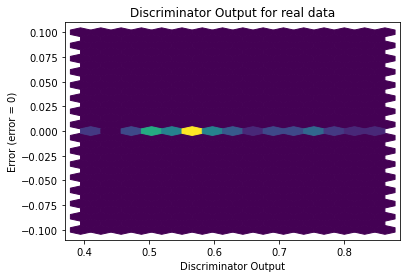

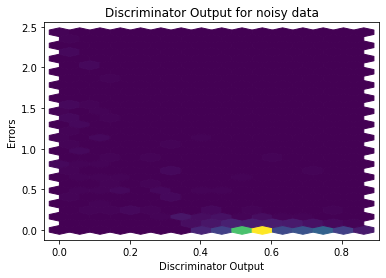

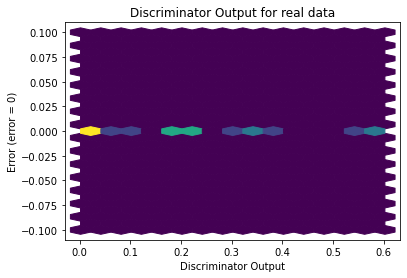

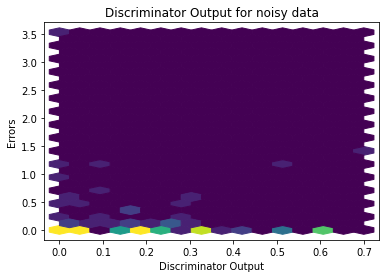

In [10]:
sanityChecks.discProbVsError(train_data,discriminator,device)
sanityChecks.discProbVsError(test_data,discriminator,device)